# 1. Different Types of MLP

# 1.1.  MLP of 3 hidden layers(without Dropout and BatchNormalization) 

# 1.1.1. MLP(3 hidden layer)+ReLU+Adam

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [4]:
#spliting the mnist data into train and test
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
#we have to make the input dimensions as 784(i.e. 28*28)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#normalizing both the train and test data
X_train=X_train/255
X_test=X_test/255

In [9]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 1.1.1 Plotting of the random train and test images

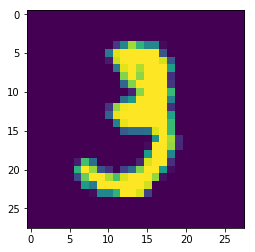

In [10]:
#plotting of some of the random images of the train and test dataset
%matplotlib inline
plt.imshow(X_train[10].reshape(28,28))


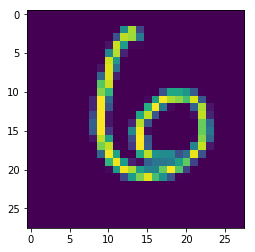

In [11]:
%matplotlib inline
plt.imshow(X_test[100].reshape(28,28))


In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras import regularizers

In [14]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128
nb_epoch = 30

In [15]:
import warnings
warnings.filterwarnings("ignore")

##  1.1.2. MLP with 3 hidden layer and relu activation +adam optimizer

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
#creating the model of 3 hidden layer
model_relu=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons`
#second with 128 neurons
#3rd with 32 neurons
#layer 1
model_relu.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
#layer 2
model_relu.add(Dense(128,activation="relu"))
#layer 3
model_relu.add(Dense(32,activation="relu"))
#output layer
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
history= model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.2298 - acc: 0.9317 - val_loss: 0.1097 - val_acc: 0.9664
Epoch 2/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.0810 - acc: 0.9745 - val_loss: 0.0749 - val_acc: 0.9758
Epoch 3/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.0519 - acc: 0.9833 - val_loss: 0.0748 - val_acc: 0.9781
Epoch 4/30
60000/60000 [==============================] - 4s 74us/step - loss: 0.0375 - acc: 0.9877 - val_loss: 0.0765 - val_acc: 0.9767
Epoch 5/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0267 - acc: 0.9911 - val_loss: 0.0719 - val_acc: 0.9797
Epoch 6/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0743 - val_acc: 0.9801
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.0205 - acc: 0.9932 - val_loss: 0.0781 - val_acc

In [16]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.08502194754725488
Test accuracy: 0.9848


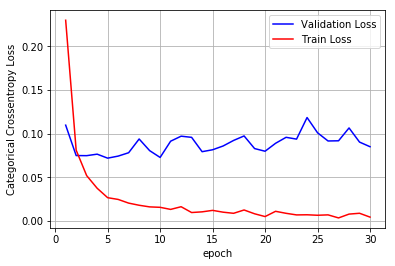

In [69]:
%matplotlib inline
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Here we can see after 4 epochs the validation loss is not decreasing where as the training loss is decreasing drastically.
- We are overfitting the model.

In [70]:
#getting the weights of the model
w_after=model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

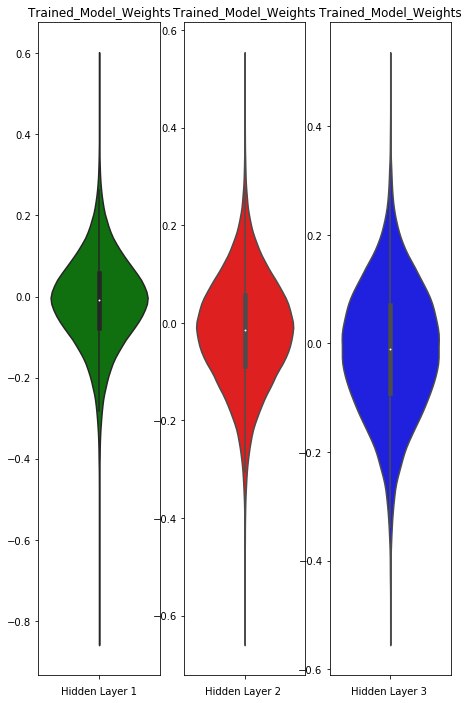

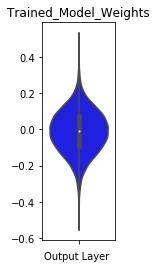

In [71]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()




- Here we can see the hiddenlayer2 and hiddenlayer3 weights distributions are little fat.
- Lets apply only BatchNormalization and see what coming in the result.

# 1.1.3. MLP(3 hidden layer)+ReLU+Adam+BatchNormalization

In [17]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [101]:
model_relu_batch=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization
model_relu_batch.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch.add(BatchNormalization())
#layer 2 with batch normalization
model_relu_batch.add(Dense(128,activation="relu"))
model_relu_batch.add(BatchNormalization())
#layer 3 with batch normalization
model_relu_batch.add(Dense(32,activation="relu"))
model_relu_batch.add(BatchNormalization())
#output layer
model_relu_batch.add(Dense(output_dim, activation='softmax'))


model_relu_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_38 (Batc (None, 512)               2048      
_________________________________________________________________
dense_66 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_39 (Batc (None, 128)               512       
_________________________________________________________________
dense_67 (Dense)             (None, 32)                4128      
_________________________________________________________________
batch_normalization_40 (Batc (None, 32)                128       
_________________________________________________________________
dense_68 (Dense)             (None, 10)                330       
Total para

In [102]:
model_relu_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.2302 - acc: 0.9369 - val_loss: 0.1026 - val_acc: 0.9694
Epoch 2/30
60000/60000 [==============================] - 6s 103us/step - loss: 0.0804 - acc: 0.9761 - val_loss: 0.0821 - val_acc: 0.9752
Epoch 3/30
60000/60000 [==============================] - 6s 103us/step - loss: 0.0525 - acc: 0.9843 - val_loss: 0.0830 - val_acc: 0.9749
Epoch 4/30
60000/60000 [==============================] - 6s 104us/step - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0877 - val_acc: 0.9738
Epoch 5/30
60000/60000 [==============================] - 6s 104us/step - loss: 0.0296 - acc: 0.9903 - val_loss: 0.0781 - val_acc: 0.9784
Epoch 6/30
60000/60000 [==============================] - 6s 104us/step - loss: 0.0250 - acc: 0.9922 - val_loss: 0.0795 - val_acc: 0.9758
Epoch 7/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0650 - 

Test score: 0.07978648655732322
Test accuracy: 0.9818


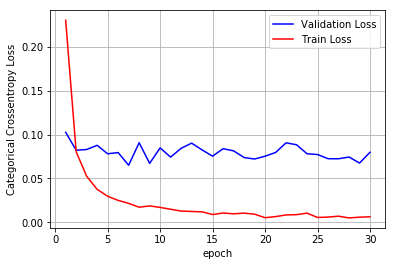

In [103]:
%matplotlib inline
score = model_relu_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Here we are getting a test accuracy of 98.18%.
- After 3rd epoch the validation loss is not decreasing where as the training loss is decreasing drastically.

In [104]:
#getting the weights of the model
w_after=model_relu_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

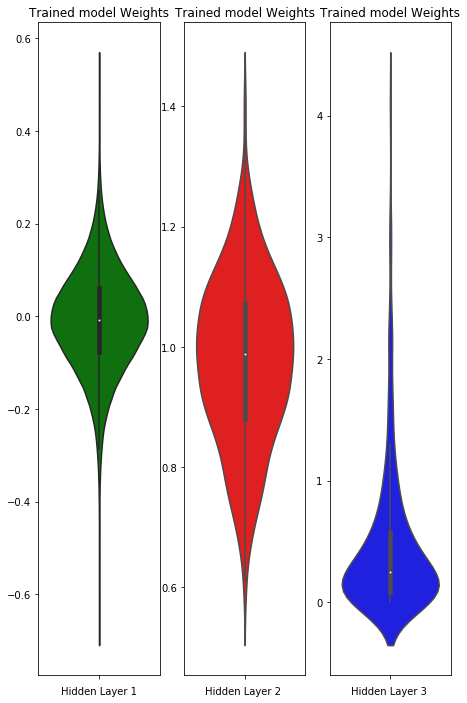

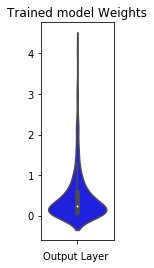

In [105]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()



- The hiddenlayer3 and output layer weights are right skewed.
- Lets apply the dropout rate to check how the model is performing.

# 1.1.4. MLP(3 hidden layer)+ReLU+Adam+Dropout

In [117]:
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_relu_batch.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#output layer with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

In [118]:
model_relu_batch_dp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.7950 - acc: 0.7604 - val_loss: 0.2486 - val_acc: 0.9304
Epoch 2/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.4062 - acc: 0.8836 - val_loss: 0.1806 - val_acc: 0.9473
Epoch 3/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.3250 - acc: 0.9060 - val_loss: 0.1467 - val_acc: 0.9573
Epoch 4/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2865 - acc: 0.9168 - val_loss: 0.1313 - val_acc: 0.9635
Epoch 5/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.2604 - acc: 0.9253 - val_loss: 0.1232 - val_acc: 0.9647
Epoch 6/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2459 - acc: 0.9288 - val_loss: 0.1108 - val_acc: 0.9691
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2330 - acc: 0.9319 - val_loss: 0.1135 - val_ac

Test score: 0.08508275787557941
Test accuracy: 0.9772


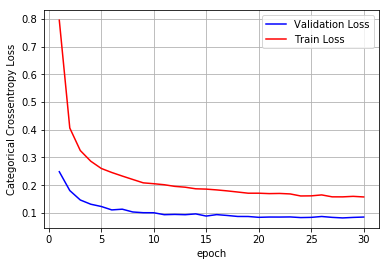

In [119]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [120]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

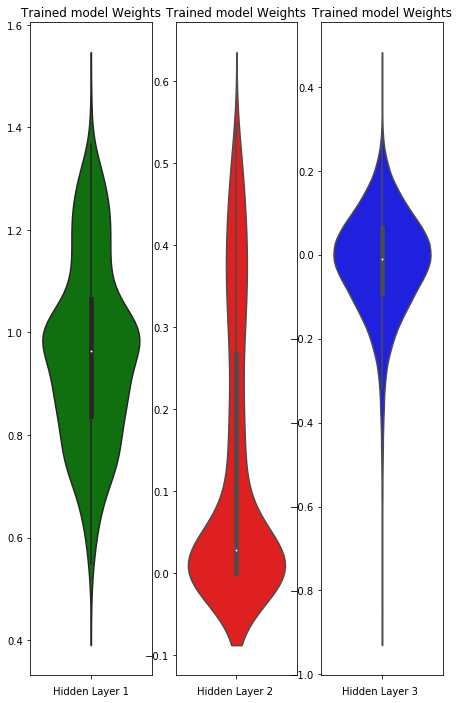

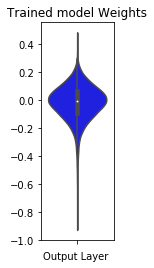

In [121]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()



- As we can see now the weights are coming from different distribution after applying dropout and BatchNormalization.

# 1.2. MLP(5 hidden layer)+ReLU+Adam (without dropout and BatchNormalization)

In [40]:
#creating the model of 5 hidden layer
model_relu=Sequential()
#here we are creating 5 hidden layers
#first with 512 neurons
#second with 256 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 32 neurons
#layer 1
model_relu.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
#layer 2
model_relu.add(Dense(256,activation="relu"))
#layer 3
model_relu.add(Dense(128,activation="relu"))
#layer 4
model_relu.add(Dense(64,activation="relu",))
#layer 5
model_relu.add(Dense(32,activation="relu",))
#output layer with softmax
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                170       
Total params: 244,890
Trainable params: 244,890
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history= model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.4533 - acc: 0.8591 - val_loss: 0.1676 - val_acc: 0.9540
Epoch 2/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.1172 - acc: 0.9661 - val_loss: 0.1204 - val_acc: 0.9630
Epoch 3/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.0782 - acc: 0.9759 - val_loss: 0.0972 - val_acc: 0.9707
Epoch 4/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0601 - acc: 0.9813 - val_loss: 0.0893 - val_acc: 0.9726
Epoch 5/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0454 - acc: 0.9855 - val_loss: 0.0886 - val_acc: 0.9745
Epoch 6/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0377 - acc: 0.9881 - val_loss: 0.1088 - val_acc: 0.9679
Epoch 7/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.0311 - acc: 0.9899 - val_loss: 0.0809 - 

Test score: 0.11061985703826467
Test accuracy: 0.9784


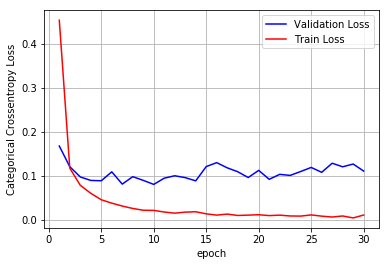

In [43]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [44]:
w_after=model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

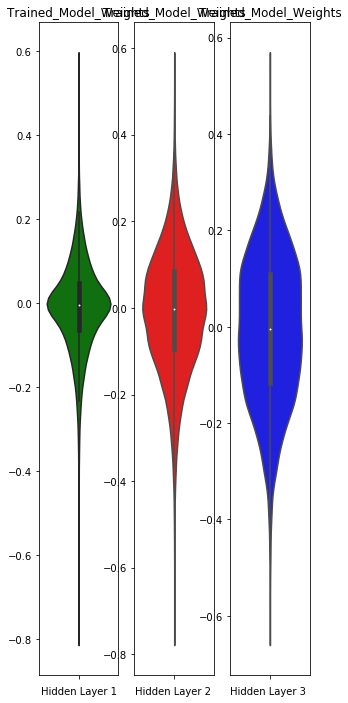

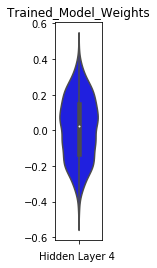

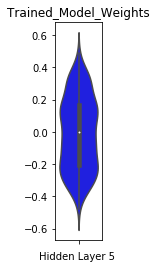

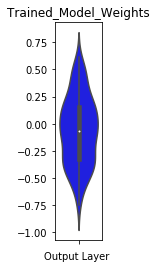

In [45]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer ')
plt.show()




### 1.2.1. MLP(5 hidden layer)+ReLU+Adam + BatchNormalization

In [46]:
#creating the model of 5 hidden layer
model_relu_batch=Sequential()
#first with 512 neurons
#second with 256 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 32 neurons
#layer 1
model_relu_batch.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch.add(BatchNormalization())
#layer 2
model_relu.add(Dense(256,activation="relu"))
model_relu_batch.add(BatchNormalization())
#layer 3
model_relu_batch.add(Dense(128,activation="relu"))
model_relu_batch.add(BatchNormalization())
#layer 4
model_relu_batch.add(Dense(64,activation="relu"))
model_relu_batch.add(BatchNormalization())
#laeyr 5
model_relu_batch.add(Dense(32,activation="relu"))
model_relu_batch.add(BatchNormalization())
#output with softmax
model_relu_batch.add(Dense(output_dim, activation='softmax'))

model_relu_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32)                128       
__________

In [47]:
model_relu_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history= model_relu_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 13s 219us/step - loss: 0.3503 - acc: 0.9135 - val_loss: 0.1387 - val_acc: 0.9599
Epoch 2/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.1121 - acc: 0.9692 - val_loss: 0.0985 - val_acc: 0.9735
Epoch 3/30
60000/60000 [==============================] - 10s 169us/step - loss: 0.0758 - acc: 0.9778 - val_loss: 0.0923 - val_acc: 0.9732
Epoch 4/30
60000/60000 [==============================] - 10s 171us/step - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0911 - val_acc: 0.9728
Epoch 5/30
60000/60000 [==============================] - 10s 171us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0798 - val_acc: 0.9768
Epoch 6/30
60000/60000 [==============================] - 10s 173us/step - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0864 - val_acc: 0.9746
Epoch 7/30
60000/60000 [==============================] - 11s 176us/step - loss: 0.0361 - acc: 0.9885 - val_loss: 0.

Test score: 0.08432404342863083
Test accuracy: 0.981


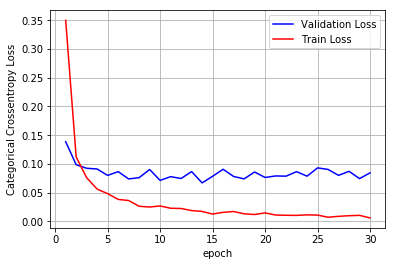

In [49]:
%matplotlib inline
score = model_relu_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- As we can see aftter 5th epoch the validation loss is not decreasing where as the train loss is deccreasing drastically.
- We can apply dropout and BactchNormalization to get rid of this problem. Lets see....

In [50]:
w_after=model_relu_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

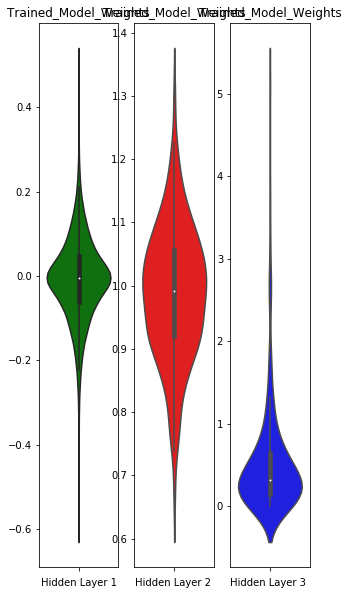

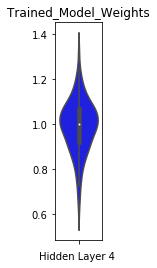

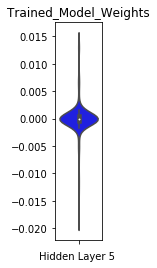

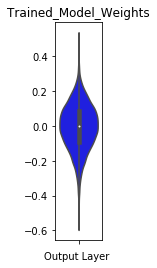

In [51]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained_Model_Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

In [95]:
#creating the model of 5 hidden layer
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2
model_relu.add(Dense(256,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 4
model_relu_batch_dp.add(Dense(64,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 5
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#output with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

model_relu_batch_dp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 512)               2048      
_________________________________________________________________
dense_61 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
__________

In [96]:
model_relu_batch_dp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 192us/step - loss: 0.8732 - acc: 0.7385 - val_loss: 0.1861 - val_acc: 0.9469
Epoch 2/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.3584 - acc: 0.9058 - val_loss: 0.1359 - val_acc: 0.9615
Epoch 3/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.2763 - acc: 0.9296 - val_loss: 0.1079 - val_acc: 0.9680
Epoch 4/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.2401 - acc: 0.9388 - val_loss: 0.1063 - val_acc: 0.9716
Epoch 5/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.2145 - acc: 0.9458 - val_loss: 0.0935 - val_acc: 0.9747
Epoch 6/30
60000/60000 [==============================] - 8s 141us/step - loss: 0.1932 - acc: 0.9518 - val_loss: 0.0931 - val_acc: 0.9750
Epoch 7/30
60000/60000 [==============================] - 9s 151us/step - loss: 0.1809 - acc: 0.9543 - val_loss: 0.0850 -

Test score: 0.07166911339550279
Test accuracy: 0.9811


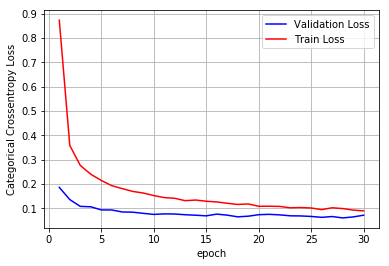

In [98]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Here we can see after applying dropout and BacthNormalization the validation and train loss comes in control.
- We are not overfitting the model anymore.

In [99]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

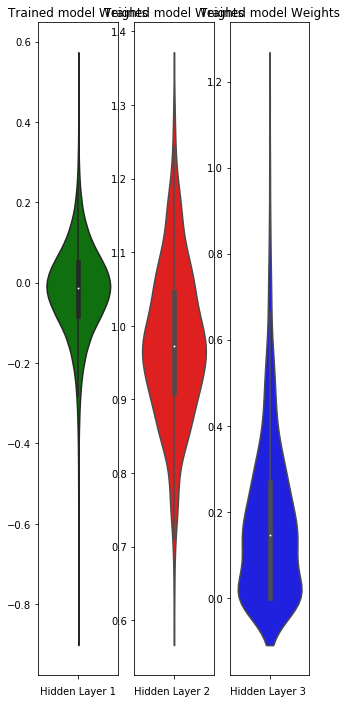

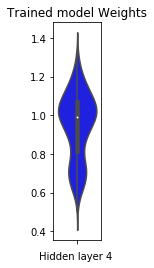

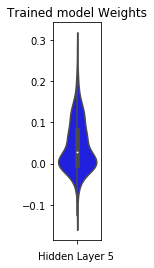

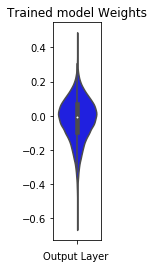

In [100]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

# MLP 3 layer with sigmoid+adam(without dropout and BatchNormalization)

In [20]:
#creating the model of 3 hidden layer
model_sig=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons`
#second with 128 neurons
#3rd with 32 neurons
#layer 1
model_sig.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
#layer 2
model_sig.add(Dense(128,activation="sigmoid"))
#layer 3
model_sig.add(Dense(32,activation="sigmoid"))
#output layer
model_sig.add(Dense(output_dim, activation='softmax'))

model_sig.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_sig.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0911 19:10:26.720927 22672 deprecation_wrapper.py:119] From C:\Users\Swastik Nayak\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0911 19:10:26.755931 22672 deprecation_wrapper.py:119] From C:\Users\Swastik Nayak\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [22]:
history= model_sig.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0911 19:16:42.771289 22672 deprecation.py:323] From C:\Users\Swastik Nayak\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.8271 - acc: 0.8023 - val_loss: 0.3290 - val_acc: 0.9186
Epoch 2/30
60000/60000 [==============================] - 9s 149us/step - loss: 0.2610 - acc: 0.9318 - val_loss: 0.2021 - val_acc: 0.9447
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.1717 - acc: 0.9539 - val_loss: 0.1512 - val_acc: 0.9593
Epoch 4/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.1268 - acc: 0.9651 - val_loss: 0.1211 - val_acc: 0.9669
Epoch 5/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.0964 - acc: 0.9739 - val_loss: 0.1065 - val_acc: 0.9702
Epoch 6/30
60000/60000 [==============================] - 8s 142us/step - loss: 0.0761 - acc: 0.9788 - val_loss: 0.0809 - val_acc: 0.9760
Epoch 7/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.0594 - acc: 0.9839 - val_loss: 0.0907 -

Test score: 0.07572742149301338
Test accuracy: 0.9829


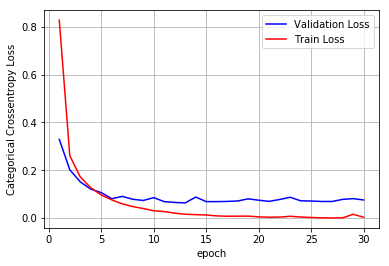

In [24]:
%matplotlib inline
score = model_sig.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [25]:
w_after=model_sig.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

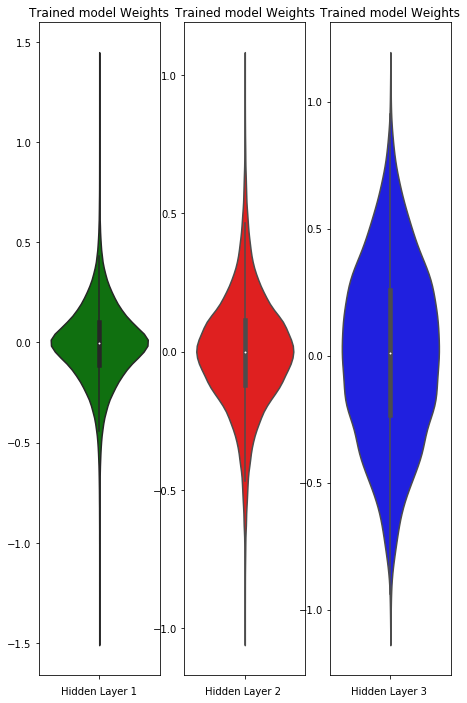

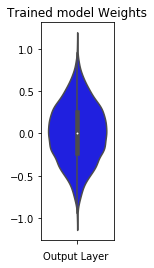

In [26]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 3 layer +sigmoid+ BatchNormalization+adam

In [30]:
#creating the model of 3 hidden layer
model_sig_bn=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons`
#second with 128 neurons
#3rd with 32 neurons
#layer 1
model_sig_bn.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_sig_bn.add(BatchNormalization())
#layer 2
model_sig_bn.add(Dense(128,activation="sigmoid"))
model_sig_bn.add(BatchNormalization())
#layer 3
model_sig_bn.add(Dense(32,activation="sigmoid"))
model_sig_bn.add(BatchNormalization())
#output layer
model_sig_bn.add(Dense(output_dim, activation='softmax'))

model_sig_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total para

In [31]:
model_sig_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history= model_sig_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.2877 - acc: 0.9194 - val_loss: 0.1687 - val_acc: 0.9504
Epoch 2/30
60000/60000 [==============================] - 13s 216us/step - loss: 0.1253 - acc: 0.9626 - val_loss: 0.1205 - val_acc: 0.9619
Epoch 3/30
60000/60000 [==============================] - 13s 222us/step - loss: 0.0824 - acc: 0.9747 - val_loss: 0.0949 - val_acc: 0.9718
Epoch 4/30
60000/60000 [==============================] - 12s 208us/step - loss: 0.0603 - acc: 0.9815 - val_loss: 0.0836 - val_acc: 0.9743
Epoch 5/30
60000/60000 [==============================] - 13s 222us/step - loss: 0.0474 - acc: 0.9850 - val_loss: 0.0802 - val_acc: 0.9754
Epoch 6/30
60000/60000 [==============================] - 13s 219us/step - loss: 0.0370 - acc: 0.9880 - val_loss: 0.0887 - val_acc: 0.9716
Epoch 7/30
60000/60000 [==============================] - 14s 226us/step - loss: 0.0302 - acc: 0.9900 - val_loss: 0.

Test score: 0.10401528387427225
Test accuracy: 0.9768


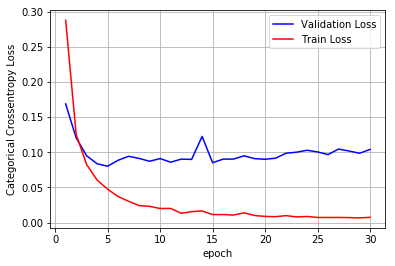

In [34]:
%matplotlib inline
score = model_sig_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [35]:
w_after=model_sig_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

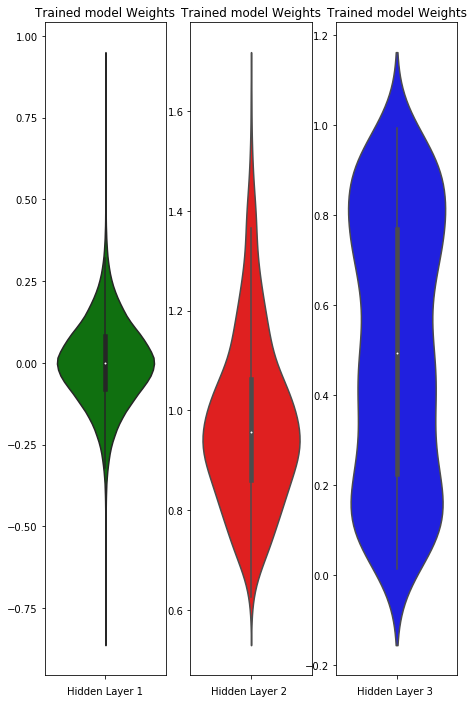

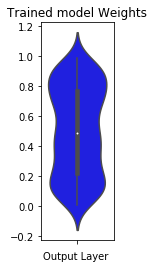

In [36]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 3 layer+sigmoid +BN+Dropout+dam

In [37]:
model_sig_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_sig_batch_dp.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_sig_batch_dp.add(Dropout(0.3))
model_sig_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_sig_batch_dp.add(Dense(128,activation="sigmoid"))
model_sig_batch_dp.add(Dropout(0.3))
model_sig_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_sig_batch_dp.add(Dense(32,activation="sigmoid"))
model_sig_batch_dp.add(Dropout(0.3))
model_sig_batch_dp.add(BatchNormalization())
#output layer with softmax
model_sig_batch_dp.add(Dense(output_dim, activation='softmax'))

W0911 19:36:07.461226 22672 deprecation.py:506] From C:\Users\Swastik Nayak\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model_sig_batch_dp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history= model_sig_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.7850 - acc: 0.7593 - val_loss: 0.2409 - val_acc: 0.9266
Epoch 2/30
60000/60000 [==============================] - 16s 261us/step - loss: 0.3305 - acc: 0.9096 - val_loss: 0.1533 - val_acc: 0.9528
Epoch 3/30
60000/60000 [==============================] - 16s 264us/step - loss: 0.2332 - acc: 0.9372 - val_loss: 0.1194 - val_acc: 0.9660
Epoch 4/30
60000/60000 [==============================] - 15s 244us/step - loss: 0.1918 - acc: 0.9473 - val_loss: 0.1020 - val_acc: 0.9685
Epoch 5/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.1633 - acc: 0.9552 - val_loss: 0.0901 - val_acc: 0.9736
Epoch 6/30
60000/60000 [==============================] - 14s 229us/step - loss: 0.1406 - acc: 0.9610 - val_loss: 0.0827 - val_acc: 0.9764
Epoch 7/30
60000/60000 [==============================] - 14s 238us/step - loss: 0.1266 - acc: 0.9660 - val_loss: 0.

Test score: 0.07081021289538476
Test accuracy: 0.9844


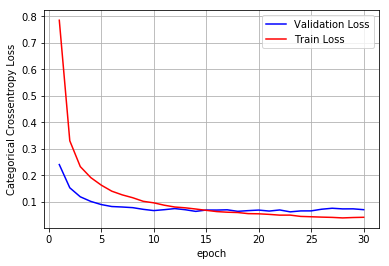

In [40]:
%matplotlib inline
score = model_sig_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [41]:
w_after=model_sig_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

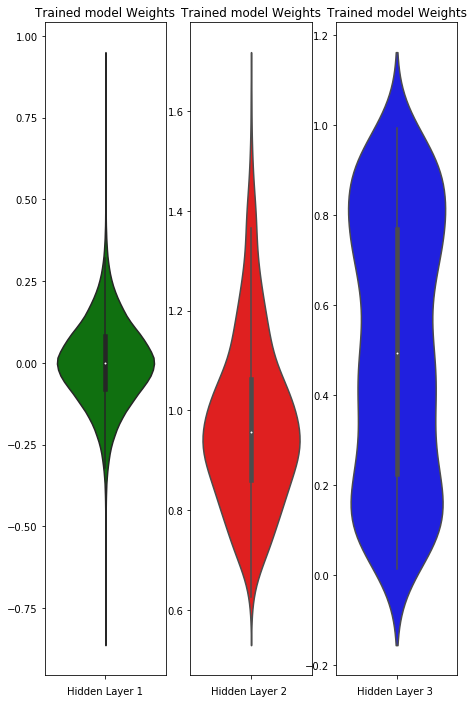

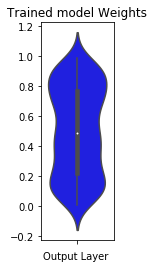

In [42]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## 3 layer MLP +sigmoid+adam+batchnormalization+different Dropoutrate

In [43]:
from tqdm import tqdm

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - ETA: 19:41 - loss: 2.8379 - acc: 0.10 - ETA: 5:00 - loss: 2.7249 - acc: 0.1328 - ETA: 2:53 - loss: 2.6338 - acc: 0.139 - ETA: 2:03 - loss: 2.5475 - acc: 0.156 - ETA: 1:36 - loss: 2.4514 - acc: 0.178 - ETA: 1:19 - loss: 2.3916 - acc: 0.195 - ETA: 1:07 - loss: 2.3312 - acc: 0.213 - ETA: 59s - loss: 2.2671 - acc: 0.234 - ETA: 52s - loss: 2.2017 - acc: 0.25 - ETA: 47s - loss: 2.1584 - acc: 0.26 - ETA: 43s - loss: 2.1090 - acc: 0.28 - ETA: 40s - loss: 2.0598 - acc: 0.29 - ETA: 37s - loss: 2.0204 - acc: 0.31 - ETA: 34s - loss: 1.9800 - acc: 0.32 - ETA: 32s - loss: 1.9423 - acc: 0.33 - ETA: 30s - loss: 1.9017 - acc: 0.35 - ETA: 29s - loss: 1.8727 - acc: 0.36 - ETA: 27s - loss: 1.8417 - acc: 0.37 - ETA: 26s - loss: 1.8133 - acc: 0.38 - ETA: 25s - loss: 1.7858 - acc: 0.39 - ETA: 24s - loss: 1.7606 - acc: 0.40 - ETA: 23s - loss: 1.7293 - acc: 0.41 - ETA: 22s - loss: 1.7038 - acc: 0.42 - ET

60000/60000 [==============================] - ETA: 8s - loss: 0.2846 - acc: 0.906 - ETA: 8s - loss: 0.2556 - acc: 0.927 - ETA: 8s - loss: 0.2472 - acc: 0.931 - ETA: 8s - loss: 0.2511 - acc: 0.930 - ETA: 8s - loss: 0.2354 - acc: 0.936 - ETA: 8s - loss: 0.2356 - acc: 0.935 - ETA: 8s - loss: 0.2380 - acc: 0.934 - ETA: 8s - loss: 0.2370 - acc: 0.936 - ETA: 8s - loss: 0.2315 - acc: 0.935 - ETA: 7s - loss: 0.2318 - acc: 0.934 - ETA: 7s - loss: 0.2420 - acc: 0.932 - ETA: 7s - loss: 0.2406 - acc: 0.932 - ETA: 7s - loss: 0.2446 - acc: 0.931 - ETA: 7s - loss: 0.2432 - acc: 0.932 - ETA: 7s - loss: 0.2444 - acc: 0.931 - ETA: 7s - loss: 0.2461 - acc: 0.931 - ETA: 7s - loss: 0.2457 - acc: 0.931 - ETA: 7s - loss: 0.2444 - acc: 0.931 - ETA: 7s - loss: 0.2466 - acc: 0.930 - ETA: 7s - loss: 0.2477 - acc: 0.930 - ETA: 7s - loss: 0.2511 - acc: 0.929 - ETA: 7s - loss: 0.2490 - acc: 0.929 - ETA: 7s - loss: 0.2499 - acc: 0.929 - ETA: 7s - loss: 0.2497 - acc: 0.929 - ETA: 7s - loss: 0.2489 - acc: 0.928 - ETA

60000/60000 [==============================] - ETA: 8s - loss: 0.1862 - acc: 0.953 - ETA: 8s - loss: 0.1948 - acc: 0.953 - ETA: 8s - loss: 0.1612 - acc: 0.957 - ETA: 8s - loss: 0.1521 - acc: 0.961 - ETA: 8s - loss: 0.1437 - acc: 0.962 - ETA: 8s - loss: 0.1511 - acc: 0.961 - ETA: 8s - loss: 0.1498 - acc: 0.959 - ETA: 8s - loss: 0.1404 - acc: 0.961 - ETA: 8s - loss: 0.1381 - acc: 0.963 - ETA: 7s - loss: 0.1374 - acc: 0.962 - ETA: 7s - loss: 0.1439 - acc: 0.961 - ETA: 7s - loss: 0.1461 - acc: 0.960 - ETA: 7s - loss: 0.1464 - acc: 0.959 - ETA: 7s - loss: 0.1465 - acc: 0.960 - ETA: 7s - loss: 0.1506 - acc: 0.959 - ETA: 7s - loss: 0.1500 - acc: 0.958 - ETA: 7s - loss: 0.1499 - acc: 0.958 - ETA: 7s - loss: 0.1475 - acc: 0.958 - ETA: 7s - loss: 0.1463 - acc: 0.959 - ETA: 7s - loss: 0.1473 - acc: 0.959 - ETA: 6s - loss: 0.1486 - acc: 0.959 - ETA: 6s - loss: 0.1473 - acc: 0.959 - ETA: 6s - loss: 0.1457 - acc: 0.960 - ETA: 6s - loss: 0.1449 - acc: 0.960 - ETA: 6s - loss: 0.1466 - acc: 0.960 - ETA

60000/60000 [==============================] - ETA: 8s - loss: 0.0909 - acc: 0.960 - ETA: 7s - loss: 0.1406 - acc: 0.953 - ETA: 7s - loss: 0.1329 - acc: 0.956 - ETA: 7s - loss: 0.1252 - acc: 0.959 - ETA: 7s - loss: 0.1204 - acc: 0.962 - ETA: 7s - loss: 0.1084 - acc: 0.969 - ETA: 7s - loss: 0.1051 - acc: 0.971 - ETA: 7s - loss: 0.1125 - acc: 0.969 - ETA: 7s - loss: 0.1118 - acc: 0.969 - ETA: 7s - loss: 0.1160 - acc: 0.967 - ETA: 7s - loss: 0.1120 - acc: 0.967 - ETA: 7s - loss: 0.1120 - acc: 0.967 - ETA: 7s - loss: 0.1147 - acc: 0.965 - ETA: 6s - loss: 0.1156 - acc: 0.965 - ETA: 6s - loss: 0.1165 - acc: 0.965 - ETA: 6s - loss: 0.1189 - acc: 0.965 - ETA: 6s - loss: 0.1189 - acc: 0.966 - ETA: 6s - loss: 0.1186 - acc: 0.966 - ETA: 6s - loss: 0.1216 - acc: 0.965 - ETA: 6s - loss: 0.1211 - acc: 0.965 - ETA: 6s - loss: 0.1224 - acc: 0.965 - ETA: 6s - loss: 0.1206 - acc: 0.965 - ETA: 6s - loss: 0.1241 - acc: 0.964 - ETA: 6s - loss: 0.1228 - acc: 0.965 - ETA: 6s - loss: 0.1237 - acc: 0.964 - ETA

60000/60000 [==============================] - ETA: 8s - loss: 0.0658 - acc: 0.992 - ETA: 7s - loss: 0.1019 - acc: 0.976 - ETA: 7s - loss: 0.1031 - acc: 0.972 - ETA: 7s - loss: 0.0994 - acc: 0.973 - ETA: 7s - loss: 0.0958 - acc: 0.973 - ETA: 7s - loss: 0.0975 - acc: 0.972 - ETA: 7s - loss: 0.0960 - acc: 0.973 - ETA: 7s - loss: 0.0959 - acc: 0.973 - ETA: 7s - loss: 0.0933 - acc: 0.973 - ETA: 7s - loss: 0.0966 - acc: 0.972 - ETA: 7s - loss: 0.0950 - acc: 0.973 - ETA: 7s - loss: 0.0969 - acc: 0.971 - ETA: 6s - loss: 0.1000 - acc: 0.971 - ETA: 6s - loss: 0.1007 - acc: 0.971 - ETA: 6s - loss: 0.1016 - acc: 0.971 - ETA: 6s - loss: 0.1040 - acc: 0.971 - ETA: 6s - loss: 0.1027 - acc: 0.971 - ETA: 6s - loss: 0.1039 - acc: 0.971 - ETA: 6s - loss: 0.1045 - acc: 0.971 - ETA: 6s - loss: 0.1016 - acc: 0.971 - ETA: 6s - loss: 0.1003 - acc: 0.972 - ETA: 6s - loss: 0.0999 - acc: 0.972 - ETA: 6s - loss: 0.1009 - acc: 0.972 - ETA: 6s - loss: 0.1039 - acc: 0.971 - ETA: 6s - loss: 0.1027 - acc: 0.972 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.0918 - acc: 0.976 - ETA: 7s - loss: 0.0821 - acc: 0.979 - ETA: 7s - loss: 0.0921 - acc: 0.973 - ETA: 7s - loss: 0.0903 - acc: 0.974 - ETA: 7s - loss: 0.0789 - acc: 0.977 - ETA: 7s - loss: 0.0756 - acc: 0.977 - ETA: 7s - loss: 0.0739 - acc: 0.978 - ETA: 7s - loss: 0.0705 - acc: 0.979 - ETA: 7s - loss: 0.0700 - acc: 0.979 - ETA: 7s - loss: 0.0688 - acc: 0.980 - ETA: 7s - loss: 0.0674 - acc: 0.980 - ETA: 7s - loss: 0.0703 - acc: 0.979 - ETA: 7s - loss: 0.0707 - acc: 0.979 - ETA: 7s - loss: 0.0717 - acc: 0.979 - ETA: 6s - loss: 0.0722 - acc: 0.979 - ETA: 6s - loss: 0.0727 - acc: 0.978 - ETA: 6s - loss: 0.0759 - acc: 0.977 - ETA: 6s - loss: 0.0785 - acc: 0.977 - ETA: 6s - loss: 0.0793 - acc: 0.976 - ETA: 6s - loss: 0.0793 - acc: 0.977 - ETA: 6s - loss: 0.0789 - acc: 0.977 - ETA: 6s - loss: 0.0803 - acc: 0.976 - ETA: 6s - loss: 0.0806 - acc: 0.976 - ETA: 6s - loss: 0.0808 - acc: 0.976 - ETA: 6s - loss: 0.0814 - acc: 0.976 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.1872 - acc: 0.968 - ETA: 7s - loss: 0.0786 - acc: 0.979 - ETA: 7s - loss: 0.0641 - acc: 0.984 - ETA: 7s - loss: 0.0708 - acc: 0.980 - ETA: 7s - loss: 0.0834 - acc: 0.978 - ETA: 7s - loss: 0.0774 - acc: 0.979 - ETA: 7s - loss: 0.0717 - acc: 0.980 - ETA: 7s - loss: 0.0689 - acc: 0.980 - ETA: 7s - loss: 0.0686 - acc: 0.980 - ETA: 7s - loss: 0.0739 - acc: 0.978 - ETA: 7s - loss: 0.0719 - acc: 0.979 - ETA: 7s - loss: 0.0707 - acc: 0.979 - ETA: 7s - loss: 0.0699 - acc: 0.979 - ETA: 6s - loss: 0.0695 - acc: 0.979 - ETA: 6s - loss: 0.0726 - acc: 0.978 - ETA: 6s - loss: 0.0729 - acc: 0.978 - ETA: 6s - loss: 0.0720 - acc: 0.978 - ETA: 6s - loss: 0.0726 - acc: 0.978 - ETA: 6s - loss: 0.0745 - acc: 0.978 - ETA: 6s - loss: 0.0734 - acc: 0.978 - ETA: 6s - loss: 0.0735 - acc: 0.978 - ETA: 6s - loss: 0.0735 - acc: 0.978 - ETA: 6s - loss: 0.0728 - acc: 0.979 - ETA: 6s - loss: 0.0725 - acc: 0.979 - ETA: 6s - loss: 0.0732 - acc: 0.979 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.0168 - acc: 1.000 - ETA: 7s - loss: 0.0687 - acc: 0.984 - ETA: 7s - loss: 0.0653 - acc: 0.986 - ETA: 7s - loss: 0.0580 - acc: 0.987 - ETA: 7s - loss: 0.0629 - acc: 0.985 - ETA: 7s - loss: 0.0614 - acc: 0.983 - ETA: 7s - loss: 0.0592 - acc: 0.984 - ETA: 7s - loss: 0.0627 - acc: 0.983 - ETA: 7s - loss: 0.0650 - acc: 0.983 - ETA: 7s - loss: 0.0636 - acc: 0.983 - ETA: 7s - loss: 0.0650 - acc: 0.983 - ETA: 7s - loss: 0.0653 - acc: 0.982 - ETA: 7s - loss: 0.0675 - acc: 0.982 - ETA: 7s - loss: 0.0667 - acc: 0.982 - ETA: 7s - loss: 0.0666 - acc: 0.982 - ETA: 6s - loss: 0.0681 - acc: 0.982 - ETA: 6s - loss: 0.0673 - acc: 0.982 - ETA: 6s - loss: 0.0675 - acc: 0.981 - ETA: 6s - loss: 0.0699 - acc: 0.981 - ETA: 6s - loss: 0.0697 - acc: 0.981 - ETA: 6s - loss: 0.0711 - acc: 0.980 - ETA: 6s - loss: 0.0713 - acc: 0.980 - ETA: 6s - loss: 0.0731 - acc: 0.980 - ETA: 6s - loss: 0.0717 - acc: 0.980 - ETA: 6s - loss: 0.0703 - acc: 0.981 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.0162 - acc: 1.000 - ETA: 7s - loss: 0.0340 - acc: 0.990 - ETA: 7s - loss: 0.0552 - acc: 0.985 - ETA: 7s - loss: 0.0547 - acc: 0.983 - ETA: 7s - loss: 0.0500 - acc: 0.985 - ETA: 7s - loss: 0.0516 - acc: 0.984 - ETA: 7s - loss: 0.0535 - acc: 0.984 - ETA: 7s - loss: 0.0502 - acc: 0.985 - ETA: 7s - loss: 0.0519 - acc: 0.984 - ETA: 7s - loss: 0.0549 - acc: 0.983 - ETA: 7s - loss: 0.0553 - acc: 0.983 - ETA: 7s - loss: 0.0574 - acc: 0.982 - ETA: 7s - loss: 0.0578 - acc: 0.982 - ETA: 7s - loss: 0.0561 - acc: 0.982 - ETA: 7s - loss: 0.0556 - acc: 0.982 - ETA: 7s - loss: 0.0554 - acc: 0.982 - ETA: 6s - loss: 0.0559 - acc: 0.982 - ETA: 6s - loss: 0.0557 - acc: 0.983 - ETA: 6s - loss: 0.0550 - acc: 0.983 - ETA: 6s - loss: 0.0566 - acc: 0.982 - ETA: 6s - loss: 0.0560 - acc: 0.983 - ETA: 6s - loss: 0.0554 - acc: 0.983 - ETA: 6s - loss: 0.0556 - acc: 0.983 - ETA: 6s - loss: 0.0549 - acc: 0.983 - ETA: 6s - loss: 0.0539 - acc: 0.983 - ETA

60000/60000 [==============================] - ETA: 8s - loss: 0.0240 - acc: 1.000 - ETA: 7s - loss: 0.0303 - acc: 0.994 - ETA: 7s - loss: 0.0385 - acc: 0.994 - ETA: 7s - loss: 0.0391 - acc: 0.992 - ETA: 7s - loss: 0.0421 - acc: 0.991 - ETA: 7s - loss: 0.0469 - acc: 0.990 - ETA: 7s - loss: 0.0443 - acc: 0.990 - ETA: 7s - loss: 0.0454 - acc: 0.988 - ETA: 7s - loss: 0.0445 - acc: 0.988 - ETA: 7s - loss: 0.0487 - acc: 0.986 - ETA: 7s - loss: 0.0479 - acc: 0.987 - ETA: 7s - loss: 0.0469 - acc: 0.987 - ETA: 7s - loss: 0.0463 - acc: 0.987 - ETA: 7s - loss: 0.0529 - acc: 0.986 - ETA: 7s - loss: 0.0522 - acc: 0.986 - ETA: 7s - loss: 0.0531 - acc: 0.985 - ETA: 7s - loss: 0.0533 - acc: 0.985 - ETA: 7s - loss: 0.0546 - acc: 0.984 - ETA: 7s - loss: 0.0539 - acc: 0.984 - ETA: 7s - loss: 0.0549 - acc: 0.984 - ETA: 7s - loss: 0.0546 - acc: 0.984 - ETA: 7s - loss: 0.0542 - acc: 0.984 - ETA: 7s - loss: 0.0536 - acc: 0.984 - ETA: 7s - loss: 0.0530 - acc: 0.985 - ETA: 6s - loss: 0.0539 - acc: 0.984 - ETA

60000/60000 [==============================] - ETA: 8s - loss: 0.0528 - acc: 0.984 - ETA: 8s - loss: 0.0424 - acc: 0.986 - ETA: 8s - loss: 0.0397 - acc: 0.988 - ETA: 8s - loss: 0.0443 - acc: 0.988 - ETA: 7s - loss: 0.0424 - acc: 0.987 - ETA: 7s - loss: 0.0419 - acc: 0.987 - ETA: 7s - loss: 0.0404 - acc: 0.988 - ETA: 7s - loss: 0.0439 - acc: 0.986 - ETA: 7s - loss: 0.0496 - acc: 0.985 - ETA: 7s - loss: 0.0490 - acc: 0.985 - ETA: 7s - loss: 0.0480 - acc: 0.985 - ETA: 7s - loss: 0.0470 - acc: 0.985 - ETA: 7s - loss: 0.0496 - acc: 0.984 - ETA: 7s - loss: 0.0485 - acc: 0.985 - ETA: 7s - loss: 0.0479 - acc: 0.985 - ETA: 7s - loss: 0.0457 - acc: 0.986 - ETA: 7s - loss: 0.0442 - acc: 0.987 - ETA: 7s - loss: 0.0438 - acc: 0.987 - ETA: 7s - loss: 0.0439 - acc: 0.987 - ETA: 6s - loss: 0.0447 - acc: 0.987 - ETA: 6s - loss: 0.0444 - acc: 0.987 - ETA: 6s - loss: 0.0453 - acc: 0.987 - ETA: 6s - loss: 0.0465 - acc: 0.987 - ETA: 6s - loss: 0.0461 - acc: 0.987 - ETA: 6s - loss: 0.0467 - acc: 0.987 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.0954 - acc: 0.984 - ETA: 7s - loss: 0.0768 - acc: 0.981 - ETA: 7s - loss: 0.0788 - acc: 0.977 - ETA: 7s - loss: 0.0666 - acc: 0.980 - ETA: 7s - loss: 0.0667 - acc: 0.980 - ETA: 7s - loss: 0.0655 - acc: 0.980 - ETA: 7s - loss: 0.0631 - acc: 0.980 - ETA: 7s - loss: 0.0591 - acc: 0.981 - ETA: 7s - loss: 0.0579 - acc: 0.982 - ETA: 7s - loss: 0.0540 - acc: 0.983 - ETA: 7s - loss: 0.0531 - acc: 0.984 - ETA: 7s - loss: 0.0497 - acc: 0.985 - ETA: 7s - loss: 0.0483 - acc: 0.985 - ETA: 6s - loss: 0.0487 - acc: 0.985 - ETA: 6s - loss: 0.0483 - acc: 0.985 - ETA: 6s - loss: 0.0458 - acc: 0.986 - ETA: 6s - loss: 0.0452 - acc: 0.986 - ETA: 6s - loss: 0.0448 - acc: 0.986 - ETA: 6s - loss: 0.0440 - acc: 0.986 - ETA: 6s - loss: 0.0436 - acc: 0.986 - ETA: 6s - loss: 0.0426 - acc: 0.986 - ETA: 6s - loss: 0.0423 - acc: 0.987 - ETA: 6s - loss: 0.0423 - acc: 0.986 - ETA: 6s - loss: 0.0418 - acc: 0.986 - ETA: 6s - loss: 0.0409 - acc: 0.987 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.0605 - acc: 0.984 - ETA: 7s - loss: 0.0377 - acc: 0.992 - ETA: 7s - loss: 0.0334 - acc: 0.992 - ETA: 7s - loss: 0.0324 - acc: 0.991 - ETA: 7s - loss: 0.0330 - acc: 0.990 - ETA: 7s - loss: 0.0323 - acc: 0.990 - ETA: 7s - loss: 0.0306 - acc: 0.990 - ETA: 7s - loss: 0.0311 - acc: 0.990 - ETA: 7s - loss: 0.0304 - acc: 0.990 - ETA: 7s - loss: 0.0299 - acc: 0.990 - ETA: 7s - loss: 0.0289 - acc: 0.990 - ETA: 7s - loss: 0.0290 - acc: 0.990 - ETA: 7s - loss: 0.0325 - acc: 0.989 - ETA: 7s - loss: 0.0326 - acc: 0.988 - ETA: 6s - loss: 0.0333 - acc: 0.988 - ETA: 6s - loss: 0.0327 - acc: 0.989 - ETA: 6s - loss: 0.0320 - acc: 0.989 - ETA: 6s - loss: 0.0331 - acc: 0.989 - ETA: 6s - loss: 0.0331 - acc: 0.989 - ETA: 6s - loss: 0.0323 - acc: 0.989 - ETA: 6s - loss: 0.0343 - acc: 0.989 - ETA: 6s - loss: 0.0341 - acc: 0.989 - ETA: 6s - loss: 0.0338 - acc: 0.989 - ETA: 6s - loss: 0.0336 - acc: 0.989 - ETA: 6s - loss: 0.0357 - acc: 0.989 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.0158 - acc: 0.992 - ETA: 7s - loss: 0.0364 - acc: 0.990 - ETA: 7s - loss: 0.0322 - acc: 0.992 - ETA: 7s - loss: 0.0327 - acc: 0.990 - ETA: 7s - loss: 0.0329 - acc: 0.989 - ETA: 7s - loss: 0.0321 - acc: 0.990 - ETA: 7s - loss: 0.0358 - acc: 0.988 - ETA: 7s - loss: 0.0352 - acc: 0.988 - ETA: 7s - loss: 0.0347 - acc: 0.989 - ETA: 7s - loss: 0.0336 - acc: 0.989 - ETA: 7s - loss: 0.0364 - acc: 0.989 - ETA: 7s - loss: 0.0361 - acc: 0.989 - ETA: 7s - loss: 0.0364 - acc: 0.988 - ETA: 7s - loss: 0.0372 - acc: 0.988 - ETA: 7s - loss: 0.0358 - acc: 0.989 - ETA: 7s - loss: 0.0352 - acc: 0.989 - ETA: 7s - loss: 0.0354 - acc: 0.989 - ETA: 6s - loss: 0.0349 - acc: 0.989 - ETA: 6s - loss: 0.0349 - acc: 0.989 - ETA: 6s - loss: 0.0352 - acc: 0.988 - ETA: 6s - loss: 0.0362 - acc: 0.988 - ETA: 6s - loss: 0.0377 - acc: 0.988 - ETA: 6s - loss: 0.0369 - acc: 0.989 - ETA: 6s - loss: 0.0376 - acc: 0.988 - ETA: 6s - loss: 0.0369 - acc: 0.989 - ETA

60000/60000 [==============================] - ETA: 8s - loss: 0.0125 - acc: 1.000 - ETA: 8s - loss: 0.0265 - acc: 0.992 - ETA: 8s - loss: 0.0317 - acc: 0.992 - ETA: 7s - loss: 0.0432 - acc: 0.988 - ETA: 7s - loss: 0.0418 - acc: 0.990 - ETA: 7s - loss: 0.0391 - acc: 0.990 - ETA: 7s - loss: 0.0384 - acc: 0.990 - ETA: 7s - loss: 0.0357 - acc: 0.990 - ETA: 7s - loss: 0.0391 - acc: 0.989 - ETA: 7s - loss: 0.0372 - acc: 0.990 - ETA: 7s - loss: 0.0380 - acc: 0.989 - ETA: 7s - loss: 0.0363 - acc: 0.990 - ETA: 7s - loss: 0.0358 - acc: 0.990 - ETA: 6s - loss: 0.0352 - acc: 0.990 - ETA: 6s - loss: 0.0358 - acc: 0.989 - ETA: 6s - loss: 0.0361 - acc: 0.989 - ETA: 6s - loss: 0.0357 - acc: 0.989 - ETA: 6s - loss: 0.0365 - acc: 0.988 - ETA: 6s - loss: 0.0352 - acc: 0.989 - ETA: 6s - loss: 0.0343 - acc: 0.989 - ETA: 6s - loss: 0.0341 - acc: 0.989 - ETA: 6s - loss: 0.0358 - acc: 0.989 - ETA: 6s - loss: 0.0362 - acc: 0.988 - ETA: 6s - loss: 0.0359 - acc: 0.988 - ETA: 6s - loss: 0.0368 - acc: 0.988 - ETA

60000/60000 [==============================] - ETA: 24:58 - loss: 3.0043 - acc: 0.08 - ETA: 8:26 - loss: 2.9458 - acc: 0.1068 - ETA: 5:07 - loss: 2.9885 - acc: 0.101 - ETA: 3:42 - loss: 2.9256 - acc: 0.104 - ETA: 2:55 - loss: 2.9259 - acc: 0.100 - ETA: 2:24 - loss: 2.9179 - acc: 0.098 - ETA: 2:03 - loss: 2.9058 - acc: 0.100 - ETA: 1:48 - loss: 2.9017 - acc: 0.099 - ETA: 1:36 - loss: 2.8937 - acc: 0.101 - ETA: 1:27 - loss: 2.8727 - acc: 0.104 - ETA: 1:19 - loss: 2.8703 - acc: 0.104 - ETA: 1:13 - loss: 2.8579 - acc: 0.105 - ETA: 1:08 - loss: 2.8441 - acc: 0.107 - ETA: 1:04 - loss: 2.8359 - acc: 0.107 - ETA: 1:00 - loss: 2.8243 - acc: 0.108 - ETA: 56s - loss: 2.8197 - acc: 0.108 - ETA: 53s - loss: 2.8143 - acc: 0.11 - ETA: 49s - loss: 2.8041 - acc: 0.11 - ETA: 47s - loss: 2.7949 - acc: 0.11 - ETA: 45s - loss: 2.7864 - acc: 0.11 - ETA: 43s - loss: 2.7754 - acc: 0.11 - ETA: 42s - loss: 2.7725 - acc: 0.11 - ETA: 40s - loss: 2.7678 - acc: 0.11 - ETA: 39s - loss: 2.7599 - acc: 0.11 - ETA: 37s 

60000/60000 [==============================] - ETA: 12s - loss: 0.2821 - acc: 0.96 - ETA: 11s - loss: 0.2015 - acc: 0.97 - ETA: 11s - loss: 0.1782 - acc: 0.97 - ETA: 11s - loss: 0.1798 - acc: 0.97 - ETA: 11s - loss: 0.1667 - acc: 0.97 - ETA: 11s - loss: 0.1766 - acc: 0.97 - ETA: 11s - loss: 0.1812 - acc: 0.97 - ETA: 11s - loss: 0.1866 - acc: 0.97 - ETA: 11s - loss: 0.1784 - acc: 0.97 - ETA: 11s - loss: 0.1749 - acc: 0.97 - ETA: 10s - loss: 0.1794 - acc: 0.97 - ETA: 10s - loss: 0.1786 - acc: 0.97 - ETA: 10s - loss: 0.1794 - acc: 0.97 - ETA: 10s - loss: 0.1772 - acc: 0.97 - ETA: 10s - loss: 0.1779 - acc: 0.97 - ETA: 10s - loss: 0.1795 - acc: 0.97 - ETA: 10s - loss: 0.1805 - acc: 0.97 - ETA: 10s - loss: 0.1845 - acc: 0.97 - ETA: 10s - loss: 0.1864 - acc: 0.97 - ETA: 10s - loss: 0.1860 - acc: 0.97 - ETA: 10s - loss: 0.1883 - acc: 0.97 - ETA: 10s - loss: 0.1905 - acc: 0.97 - ETA: 10s - loss: 0.1891 - acc: 0.97 - ETA: 10s - loss: 0.1911 - acc: 0.97 - ETA: 10s - loss: 0.1906 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 12s - loss: 0.1406 - acc: 0.97 - ETA: 12s - loss: 0.1360 - acc: 0.97 - ETA: 12s - loss: 0.1801 - acc: 0.97 - ETA: 11s - loss: 0.1923 - acc: 0.97 - ETA: 11s - loss: 0.1777 - acc: 0.97 - ETA: 11s - loss: 0.1630 - acc: 0.97 - ETA: 11s - loss: 0.1604 - acc: 0.97 - ETA: 11s - loss: 0.1619 - acc: 0.97 - ETA: 11s - loss: 0.1614 - acc: 0.97 - ETA: 11s - loss: 0.1577 - acc: 0.97 - ETA: 11s - loss: 0.1494 - acc: 0.97 - ETA: 11s - loss: 0.1534 - acc: 0.97 - ETA: 11s - loss: 0.1523 - acc: 0.97 - ETA: 10s - loss: 0.1474 - acc: 0.97 - ETA: 10s - loss: 0.1431 - acc: 0.97 - ETA: 10s - loss: 0.1436 - acc: 0.97 - ETA: 10s - loss: 0.1377 - acc: 0.97 - ETA: 10s - loss: 0.1389 - acc: 0.97 - ETA: 10s - loss: 0.1394 - acc: 0.97 - ETA: 10s - loss: 0.1396 - acc: 0.97 - ETA: 10s - loss: 0.1402 - acc: 0.97 - ETA: 10s - loss: 0.1370 - acc: 0.97 - ETA: 10s - loss: 0.1377 - acc: 0.97 - ETA: 10s - loss: 0.1390 - acc: 0.97 - ETA: 10s - loss: 0.1416 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 11s - loss: 0.2329 - acc: 0.96 - ETA: 11s - loss: 0.1596 - acc: 0.97 - ETA: 11s - loss: 0.1428 - acc: 0.97 - ETA: 11s - loss: 0.1295 - acc: 0.97 - ETA: 11s - loss: 0.1265 - acc: 0.97 - ETA: 11s - loss: 0.1187 - acc: 0.97 - ETA: 11s - loss: 0.1244 - acc: 0.97 - ETA: 11s - loss: 0.1200 - acc: 0.97 - ETA: 11s - loss: 0.1331 - acc: 0.97 - ETA: 11s - loss: 0.1302 - acc: 0.97 - ETA: 11s - loss: 0.1323 - acc: 0.97 - ETA: 11s - loss: 0.1301 - acc: 0.98 - ETA: 11s - loss: 0.1270 - acc: 0.98 - ETA: 11s - loss: 0.1322 - acc: 0.98 - ETA: 11s - loss: 0.1332 - acc: 0.98 - ETA: 10s - loss: 0.1309 - acc: 0.98 - ETA: 10s - loss: 0.1336 - acc: 0.98 - ETA: 10s - loss: 0.1347 - acc: 0.98 - ETA: 10s - loss: 0.1422 - acc: 0.97 - ETA: 10s - loss: 0.1366 - acc: 0.98 - ETA: 10s - loss: 0.1335 - acc: 0.98 - ETA: 10s - loss: 0.1365 - acc: 0.98 - ETA: 10s - loss: 0.1329 - acc: 0.98 - ETA: 10s - loss: 0.1356 - acc: 0.98 - ETA: 10s - loss: 0.1343 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 11s - loss: 0.1871 - acc: 0.98 - ETA: 11s - loss: 0.1078 - acc: 0.98 - ETA: 11s - loss: 0.0990 - acc: 0.98 - ETA: 11s - loss: 0.0951 - acc: 0.98 - ETA: 11s - loss: 0.1098 - acc: 0.98 - ETA: 11s - loss: 0.1052 - acc: 0.98 - ETA: 11s - loss: 0.1073 - acc: 0.98 - ETA: 11s - loss: 0.1065 - acc: 0.98 - ETA: 11s - loss: 0.1015 - acc: 0.98 - ETA: 11s - loss: 0.1135 - acc: 0.98 - ETA: 11s - loss: 0.1159 - acc: 0.98 - ETA: 11s - loss: 0.1186 - acc: 0.98 - ETA: 11s - loss: 0.1164 - acc: 0.98 - ETA: 11s - loss: 0.1183 - acc: 0.98 - ETA: 10s - loss: 0.1169 - acc: 0.98 - ETA: 10s - loss: 0.1151 - acc: 0.98 - ETA: 10s - loss: 0.1204 - acc: 0.98 - ETA: 10s - loss: 0.1186 - acc: 0.98 - ETA: 10s - loss: 0.1167 - acc: 0.98 - ETA: 10s - loss: 0.1185 - acc: 0.98 - ETA: 10s - loss: 0.1184 - acc: 0.98 - ETA: 10s - loss: 0.1214 - acc: 0.98 - ETA: 10s - loss: 0.1207 - acc: 0.98 - ETA: 10s - loss: 0.1206 - acc: 0.98 - ETA: 10s - loss: 0.1183 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 12s - loss: 0.0607 - acc: 0.98 - ETA: 11s - loss: 0.1307 - acc: 0.98 - ETA: 11s - loss: 0.1036 - acc: 0.98 - ETA: 11s - loss: 0.0936 - acc: 0.98 - ETA: 11s - loss: 0.1125 - acc: 0.98 - ETA: 11s - loss: 0.1228 - acc: 0.97 - ETA: 11s - loss: 0.1178 - acc: 0.97 - ETA: 11s - loss: 0.1118 - acc: 0.98 - ETA: 11s - loss: 0.1048 - acc: 0.98 - ETA: 11s - loss: 0.0986 - acc: 0.98 - ETA: 11s - loss: 0.0984 - acc: 0.98 - ETA: 11s - loss: 0.1098 - acc: 0.98 - ETA: 11s - loss: 0.1063 - acc: 0.98 - ETA: 10s - loss: 0.1072 - acc: 0.98 - ETA: 10s - loss: 0.1050 - acc: 0.98 - ETA: 10s - loss: 0.1096 - acc: 0.98 - ETA: 10s - loss: 0.1132 - acc: 0.98 - ETA: 10s - loss: 0.1114 - acc: 0.98 - ETA: 10s - loss: 0.1118 - acc: 0.98 - ETA: 10s - loss: 0.1132 - acc: 0.98 - ETA: 10s - loss: 0.1137 - acc: 0.98 - ETA: 10s - loss: 0.1109 - acc: 0.98 - ETA: 10s - loss: 0.1082 - acc: 0.98 - ETA: 10s - loss: 0.1101 - acc: 0.98 - ETA: 10s - loss: 0.1111 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 11s - loss: 0.2107 - acc: 0.96 - ETA: 12s - loss: 0.1287 - acc: 0.97 - ETA: 11s - loss: 0.0991 - acc: 0.98 - ETA: 11s - loss: 0.0902 - acc: 0.98 - ETA: 11s - loss: 0.1030 - acc: 0.98 - ETA: 11s - loss: 0.1003 - acc: 0.98 - ETA: 11s - loss: 0.0967 - acc: 0.98 - ETA: 10s - loss: 0.1033 - acc: 0.98 - ETA: 10s - loss: 0.1103 - acc: 0.98 - ETA: 10s - loss: 0.1014 - acc: 0.98 - ETA: 10s - loss: 0.0996 - acc: 0.98 - ETA: 10s - loss: 0.1032 - acc: 0.98 - ETA: 10s - loss: 0.0996 - acc: 0.98 - ETA: 10s - loss: 0.1015 - acc: 0.98 - ETA: 10s - loss: 0.1006 - acc: 0.98 - ETA: 10s - loss: 0.0985 - acc: 0.98 - ETA: 10s - loss: 0.1019 - acc: 0.98 - ETA: 10s - loss: 0.1035 - acc: 0.98 - ETA: 10s - loss: 0.1020 - acc: 0.98 - ETA: 10s - loss: 0.1013 - acc: 0.98 - ETA: 10s - loss: 0.1006 - acc: 0.98 - ETA: 10s - loss: 0.1031 - acc: 0.98 - ETA: 10s - loss: 0.1024 - acc: 0.98 - ETA: 10s - loss: 0.1001 - acc: 0.98 - ETA: 10s - loss: 0.0989 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 11s - loss: 0.0407 - acc: 0.98 - ETA: 11s - loss: 0.0415 - acc: 0.98 - ETA: 11s - loss: 0.0587 - acc: 0.98 - ETA: 11s - loss: 0.0780 - acc: 0.98 - ETA: 11s - loss: 0.0755 - acc: 0.98 - ETA: 11s - loss: 0.0789 - acc: 0.98 - ETA: 11s - loss: 0.0902 - acc: 0.98 - ETA: 11s - loss: 0.0911 - acc: 0.98 - ETA: 10s - loss: 0.0911 - acc: 0.98 - ETA: 10s - loss: 0.0957 - acc: 0.98 - ETA: 10s - loss: 0.0901 - acc: 0.98 - ETA: 10s - loss: 0.0937 - acc: 0.98 - ETA: 10s - loss: 0.0940 - acc: 0.98 - ETA: 10s - loss: 0.0906 - acc: 0.98 - ETA: 10s - loss: 0.0942 - acc: 0.98 - ETA: 10s - loss: 0.0983 - acc: 0.98 - ETA: 10s - loss: 0.0978 - acc: 0.98 - ETA: 10s - loss: 0.0973 - acc: 0.98 - ETA: 10s - loss: 0.0953 - acc: 0.98 - ETA: 10s - loss: 0.0956 - acc: 0.98 - ETA: 10s - loss: 0.0958 - acc: 0.98 - ETA: 10s - loss: 0.0931 - acc: 0.98 - ETA: 10s - loss: 0.0950 - acc: 0.98 - ETA: 10s - loss: 0.0939 - acc: 0.98 - ETA: 10s - loss: 0.0944 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 12s - loss: 0.0410 - acc: 0.99 - ETA: 11s - loss: 0.0508 - acc: 0.99 - ETA: 12s - loss: 0.0701 - acc: 0.98 - ETA: 11s - loss: 0.0623 - acc: 0.99 - ETA: 12s - loss: 0.0571 - acc: 0.99 - ETA: 11s - loss: 0.0597 - acc: 0.99 - ETA: 11s - loss: 0.0751 - acc: 0.99 - ETA: 11s - loss: 0.0712 - acc: 0.98 - ETA: 11s - loss: 0.0759 - acc: 0.98 - ETA: 11s - loss: 0.0804 - acc: 0.98 - ETA: 11s - loss: 0.0808 - acc: 0.98 - ETA: 10s - loss: 0.0817 - acc: 0.98 - ETA: 10s - loss: 0.0850 - acc: 0.98 - ETA: 10s - loss: 0.0822 - acc: 0.98 - ETA: 10s - loss: 0.0874 - acc: 0.98 - ETA: 10s - loss: 0.0850 - acc: 0.98 - ETA: 10s - loss: 0.0855 - acc: 0.98 - ETA: 10s - loss: 0.0894 - acc: 0.98 - ETA: 10s - loss: 0.0865 - acc: 0.98 - ETA: 10s - loss: 0.0849 - acc: 0.98 - ETA: 10s - loss: 0.0865 - acc: 0.98 - ETA: 10s - loss: 0.0876 - acc: 0.98 - ETA: 10s - loss: 0.0887 - acc: 0.98 - ETA: 10s - loss: 0.0877 - acc: 0.98 - ETA: 10s - loss: 0.0917 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 11s - loss: 0.0363 - acc: 1.00 - ETA: 11s - loss: 0.0500 - acc: 0.99 - ETA: 11s - loss: 0.0565 - acc: 0.99 - ETA: 11s - loss: 0.0542 - acc: 0.99 - ETA: 11s - loss: 0.0505 - acc: 0.98 - ETA: 11s - loss: 0.0496 - acc: 0.98 - ETA: 11s - loss: 0.0591 - acc: 0.98 - ETA: 11s - loss: 0.0613 - acc: 0.98 - ETA: 10s - loss: 0.0700 - acc: 0.98 - ETA: 10s - loss: 0.0724 - acc: 0.98 - ETA: 10s - loss: 0.0706 - acc: 0.98 - ETA: 10s - loss: 0.0753 - acc: 0.98 - ETA: 10s - loss: 0.0751 - acc: 0.98 - ETA: 10s - loss: 0.0741 - acc: 0.98 - ETA: 10s - loss: 0.0737 - acc: 0.98 - ETA: 10s - loss: 0.0746 - acc: 0.98 - ETA: 10s - loss: 0.0724 - acc: 0.98 - ETA: 10s - loss: 0.0765 - acc: 0.98 - ETA: 10s - loss: 0.0751 - acc: 0.98 - ETA: 10s - loss: 0.0751 - acc: 0.98 - ETA: 10s - loss: 0.0777 - acc: 0.98 - ETA: 10s - loss: 0.0776 - acc: 0.98 - ETA: 10s - loss: 0.0798 - acc: 0.98 - ETA: 10s - loss: 0.0813 - acc: 0.98 - ETA: 10s - loss: 0.0811 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 11s - loss: 0.0203 - acc: 1.00 - ETA: 11s - loss: 0.0511 - acc: 0.98 - ETA: 11s - loss: 0.0945 - acc: 0.98 - ETA: 11s - loss: 0.1019 - acc: 0.98 - ETA: 11s - loss: 0.0919 - acc: 0.98 - ETA: 11s - loss: 0.1066 - acc: 0.98 - ETA: 11s - loss: 0.1013 - acc: 0.98 - ETA: 11s - loss: 0.0987 - acc: 0.98 - ETA: 11s - loss: 0.0970 - acc: 0.98 - ETA: 11s - loss: 0.1148 - acc: 0.97 - ETA: 11s - loss: 0.1118 - acc: 0.97 - ETA: 11s - loss: 0.1145 - acc: 0.97 - ETA: 11s - loss: 0.1160 - acc: 0.97 - ETA: 11s - loss: 0.1195 - acc: 0.97 - ETA: 11s - loss: 0.1170 - acc: 0.97 - ETA: 11s - loss: 0.1154 - acc: 0.97 - ETA: 11s - loss: 0.1153 - acc: 0.97 - ETA: 11s - loss: 0.1148 - acc: 0.98 - ETA: 10s - loss: 0.1113 - acc: 0.98 - ETA: 10s - loss: 0.1089 - acc: 0.98 - ETA: 10s - loss: 0.1070 - acc: 0.98 - ETA: 10s - loss: 0.1075 - acc: 0.98 - ETA: 10s - loss: 0.1146 - acc: 0.98 - ETA: 10s - loss: 0.1115 - acc: 0.98 - ETA: 10s - loss: 0.1087 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 12s - loss: 0.1177 - acc: 0.95 - ETA: 11s - loss: 0.0789 - acc: 0.97 - ETA: 11s - loss: 0.0862 - acc: 0.98 - ETA: 11s - loss: 0.0702 - acc: 0.98 - ETA: 11s - loss: 0.0758 - acc: 0.98 - ETA: 11s - loss: 0.0679 - acc: 0.98 - ETA: 11s - loss: 0.0746 - acc: 0.98 - ETA: 11s - loss: 0.0806 - acc: 0.98 - ETA: 11s - loss: 0.0815 - acc: 0.98 - ETA: 11s - loss: 0.0826 - acc: 0.98 - ETA: 10s - loss: 0.0825 - acc: 0.98 - ETA: 10s - loss: 0.0778 - acc: 0.98 - ETA: 10s - loss: 0.0787 - acc: 0.98 - ETA: 10s - loss: 0.0804 - acc: 0.98 - ETA: 10s - loss: 0.0808 - acc: 0.98 - ETA: 10s - loss: 0.0841 - acc: 0.98 - ETA: 10s - loss: 0.0888 - acc: 0.98 - ETA: 10s - loss: 0.0905 - acc: 0.98 - ETA: 10s - loss: 0.0910 - acc: 0.98 - ETA: 10s - loss: 0.0933 - acc: 0.98 - ETA: 10s - loss: 0.0916 - acc: 0.98 - ETA: 10s - loss: 0.0906 - acc: 0.98 - ETA: 10s - loss: 0.0913 - acc: 0.98 - ETA: 10s - loss: 0.0919 - acc: 0.98 - ETA: 9s - loss: 0.0902 - acc: 0.9841 - ET

60000/60000 [==============================] - ETA: 11s - loss: 0.0396 - acc: 0.99 - ETA: 11s - loss: 0.0624 - acc: 0.98 - ETA: 11s - loss: 0.0646 - acc: 0.98 - ETA: 11s - loss: 0.0565 - acc: 0.98 - ETA: 11s - loss: 0.0542 - acc: 0.98 - ETA: 11s - loss: 0.0524 - acc: 0.98 - ETA: 11s - loss: 0.0557 - acc: 0.98 - ETA: 11s - loss: 0.0619 - acc: 0.98 - ETA: 11s - loss: 0.0662 - acc: 0.98 - ETA: 11s - loss: 0.0606 - acc: 0.98 - ETA: 11s - loss: 0.0750 - acc: 0.98 - ETA: 10s - loss: 0.0752 - acc: 0.98 - ETA: 10s - loss: 0.0756 - acc: 0.98 - ETA: 10s - loss: 0.0827 - acc: 0.98 - ETA: 10s - loss: 0.0846 - acc: 0.98 - ETA: 10s - loss: 0.0836 - acc: 0.98 - ETA: 10s - loss: 0.0846 - acc: 0.98 - ETA: 10s - loss: 0.0822 - acc: 0.98 - ETA: 10s - loss: 0.0813 - acc: 0.98 - ETA: 10s - loss: 0.0788 - acc: 0.98 - ETA: 10s - loss: 0.0797 - acc: 0.98 - ETA: 10s - loss: 0.0793 - acc: 0.98 - ETA: 10s - loss: 0.0773 - acc: 0.98 - ETA: 10s - loss: 0.0756 - acc: 0.98 - ETA: 10s - loss: 0.0768 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 12s - loss: 0.0330 - acc: 0.99 - ETA: 12s - loss: 0.0464 - acc: 0.98 - ETA: 11s - loss: 0.0542 - acc: 0.98 - ETA: 11s - loss: 0.0540 - acc: 0.98 - ETA: 11s - loss: 0.0793 - acc: 0.98 - ETA: 11s - loss: 0.0764 - acc: 0.98 - ETA: 10s - loss: 0.0793 - acc: 0.98 - ETA: 10s - loss: 0.0834 - acc: 0.98 - ETA: 10s - loss: 0.0869 - acc: 0.98 - ETA: 10s - loss: 0.0914 - acc: 0.98 - ETA: 10s - loss: 0.0970 - acc: 0.98 - ETA: 10s - loss: 0.0936 - acc: 0.98 - ETA: 10s - loss: 0.0918 - acc: 0.98 - ETA: 10s - loss: 0.0893 - acc: 0.98 - ETA: 10s - loss: 0.0880 - acc: 0.98 - ETA: 10s - loss: 0.0882 - acc: 0.98 - ETA: 10s - loss: 0.0900 - acc: 0.98 - ETA: 10s - loss: 0.0893 - acc: 0.98 - ETA: 10s - loss: 0.0870 - acc: 0.98 - ETA: 10s - loss: 0.0863 - acc: 0.98 - ETA: 10s - loss: 0.0930 - acc: 0.98 - ETA: 10s - loss: 0.0924 - acc: 0.98 - ETA: 9s - loss: 0.0902 - acc: 0.9836 - ETA: 9s - loss: 0.0916 - acc: 0.983 - ETA: 9s - loss: 0.0911 - acc: 0.983 - ET

54656/60000 [==========================>...] - ETA: 30:31 - loss: 2.9711 - acc: 0.10 - ETA: 10:19 - loss: 2.8837 - acc: 0.10 - ETA: 6:16 - loss: 2.9008 - acc: 0.1187 - ETA: 4:33 - loss: 2.8980 - acc: 0.117 - ETA: 3:34 - loss: 2.9050 - acc: 0.116 - ETA: 2:57 - loss: 2.9168 - acc: 0.114 - ETA: 2:32 - loss: 2.8998 - acc: 0.110 - ETA: 2:13 - loss: 2.8854 - acc: 0.110 - ETA: 1:59 - loss: 2.8769 - acc: 0.108 - ETA: 1:47 - loss: 2.8691 - acc: 0.109 - ETA: 1:38 - loss: 2.8577 - acc: 0.112 - ETA: 1:30 - loss: 2.8516 - acc: 0.114 - ETA: 1:24 - loss: 2.8480 - acc: 0.115 - ETA: 1:18 - loss: 2.8440 - acc: 0.114 - ETA: 1:14 - loss: 2.8454 - acc: 0.112 - ETA: 1:10 - loss: 2.8354 - acc: 0.113 - ETA: 1:06 - loss: 2.8306 - acc: 0.113 - ETA: 1:03 - loss: 2.8241 - acc: 0.113 - ETA: 1:00 - loss: 2.8189 - acc: 0.113 - ETA: 57s - loss: 2.8140 - acc: 0.113 - ETA: 55s - loss: 2.8102 - acc: 0.11 - ETA: 53s - loss: 2.8000 - acc: 0.11 - ETA: 51s - loss: 2.7956 - acc: 0.11 - ETA: 49s - loss: 2.7923 - acc: 0.11 - E

60000/60000 [==============================] - ETA: 1s - loss: 2.0623 - acc: 0.299 - ETA: 1s - loss: 2.0575 - acc: 0.300 - ETA: 1s - loss: 2.0530 - acc: 0.302 - ETA: 1s - loss: 2.0483 - acc: 0.304 - ETA: 1s - loss: 2.0435 - acc: 0.306 - ETA: 1s - loss: 2.0389 - acc: 0.308 - ETA: 1s - loss: 2.0344 - acc: 0.310 - ETA: 1s - loss: 2.0297 - acc: 0.312 - ETA: 1s - loss: 2.0249 - acc: 0.314 - ETA: 0s - loss: 2.0204 - acc: 0.316 - ETA: 0s - loss: 2.0156 - acc: 0.318 - ETA: 0s - loss: 2.0106 - acc: 0.320 - ETA: 0s - loss: 2.0061 - acc: 0.322 - ETA: 0s - loss: 2.0014 - acc: 0.323 - ETA: 0s - loss: 1.9970 - acc: 0.325 - ETA: 0s - loss: 1.9924 - acc: 0.327 - ETA: 0s - loss: 1.9875 - acc: 0.329 - ETA: 0s - loss: 1.9832 - acc: 0.331 - ETA: 0s - loss: 1.9785 - acc: 0.332 - ETA: 0s - loss: 1.9742 - acc: 0.334 - 21s 352us/step - loss: 1.9704 - acc: 0.3362 - val_loss: 0.3864 - val_acc: 0.9810
Epoch 2/30
54912/60000 [==========================>...] - ETA: 15s - loss: 0.9043 - acc: 0.75 - ETA: 14s - loss:

54912/60000 [==========================>...] - ETA: 15s - loss: 0.4273 - acc: 0.91 - ETA: 15s - loss: 0.3124 - acc: 0.94 - ETA: 14s - loss: 0.3211 - acc: 0.94 - ETA: 14s - loss: 0.3287 - acc: 0.93 - ETA: 14s - loss: 0.3364 - acc: 0.93 - ETA: 14s - loss: 0.3368 - acc: 0.93 - ETA: 14s - loss: 0.3302 - acc: 0.93 - ETA: 14s - loss: 0.3382 - acc: 0.93 - ETA: 14s - loss: 0.3386 - acc: 0.93 - ETA: 14s - loss: 0.3431 - acc: 0.93 - ETA: 14s - loss: 0.3426 - acc: 0.93 - ETA: 13s - loss: 0.3498 - acc: 0.93 - ETA: 13s - loss: 0.3550 - acc: 0.93 - ETA: 13s - loss: 0.3506 - acc: 0.93 - ETA: 13s - loss: 0.3519 - acc: 0.93 - ETA: 13s - loss: 0.3613 - acc: 0.93 - ETA: 13s - loss: 0.3614 - acc: 0.93 - ETA: 13s - loss: 0.3610 - acc: 0.93 - ETA: 13s - loss: 0.3557 - acc: 0.93 - ETA: 13s - loss: 0.3497 - acc: 0.93 - ETA: 13s - loss: 0.3518 - acc: 0.93 - ETA: 13s - loss: 0.3502 - acc: 0.93 - ETA: 13s - loss: 0.3492 - acc: 0.93 - ETA: 13s - loss: 0.3493 - acc: 0.93 - ETA: 13s - loss: 0.3500 - acc: 0.93 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3601 - acc: 0.939 - ETA: 1s - loss: 0.3601 - acc: 0.939 - ETA: 1s - loss: 0.3603 - acc: 0.939 - ETA: 1s - loss: 0.3601 - acc: 0.938 - ETA: 0s - loss: 0.3603 - acc: 0.938 - ETA: 0s - loss: 0.3608 - acc: 0.938 - ETA: 0s - loss: 0.3611 - acc: 0.938 - ETA: 0s - loss: 0.3610 - acc: 0.938 - ETA: 0s - loss: 0.3609 - acc: 0.938 - ETA: 0s - loss: 0.3612 - acc: 0.938 - ETA: 0s - loss: 0.3616 - acc: 0.938 - ETA: 0s - loss: 0.3611 - acc: 0.938 - ETA: 0s - loss: 0.3612 - acc: 0.938 - ETA: 0s - loss: 0.3614 - acc: 0.938 - ETA: 0s - loss: 0.3618 - acc: 0.938 - ETA: 0s - loss: 0.3615 - acc: 0.938 - ETA: 0s - loss: 0.3618 - acc: 0.938 - ETA: 0s - loss: 0.3613 - acc: 0.938 - ETA: 0s - loss: 0.3612 - acc: 0.938 - 16s 274us/step - loss: 0.3613 - acc: 0.9386 - val_loss: 0.1856 - val_acc: 0.9756
Epoch 4/30
54912/60000 [==========================>...] - ETA: 15s - loss: 0.3828 - acc: 0.93 - ETA: 15s - loss: 0.3631 - acc: 0.93 - ETA: 14s - loss:

54912/60000 [==========================>...] - ETA: 14s - loss: 0.2755 - acc: 0.95 - ETA: 14s - loss: 0.3657 - acc: 0.94 - ETA: 14s - loss: 0.3351 - acc: 0.94 - ETA: 14s - loss: 0.3531 - acc: 0.94 - ETA: 14s - loss: 0.3775 - acc: 0.94 - ETA: 14s - loss: 0.3921 - acc: 0.94 - ETA: 14s - loss: 0.3762 - acc: 0.94 - ETA: 14s - loss: 0.3517 - acc: 0.94 - ETA: 14s - loss: 0.3444 - acc: 0.94 - ETA: 14s - loss: 0.3263 - acc: 0.94 - ETA: 14s - loss: 0.3159 - acc: 0.95 - ETA: 14s - loss: 0.3224 - acc: 0.94 - ETA: 14s - loss: 0.3325 - acc: 0.94 - ETA: 14s - loss: 0.3259 - acc: 0.94 - ETA: 13s - loss: 0.3301 - acc: 0.94 - ETA: 13s - loss: 0.3293 - acc: 0.94 - ETA: 13s - loss: 0.3330 - acc: 0.94 - ETA: 13s - loss: 0.3377 - acc: 0.94 - ETA: 13s - loss: 0.3366 - acc: 0.94 - ETA: 13s - loss: 0.3340 - acc: 0.94 - ETA: 13s - loss: 0.3312 - acc: 0.94 - ETA: 13s - loss: 0.3261 - acc: 0.94 - ETA: 13s - loss: 0.3272 - acc: 0.94 - ETA: 13s - loss: 0.3312 - acc: 0.94 - ETA: 13s - loss: 0.3280 - acc: 0.94 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3274 - acc: 0.950 - ETA: 1s - loss: 0.3268 - acc: 0.950 - ETA: 1s - loss: 0.3274 - acc: 0.950 - ETA: 0s - loss: 0.3267 - acc: 0.950 - ETA: 0s - loss: 0.3270 - acc: 0.950 - ETA: 0s - loss: 0.3265 - acc: 0.950 - ETA: 0s - loss: 0.3265 - acc: 0.950 - ETA: 0s - loss: 0.3265 - acc: 0.950 - ETA: 0s - loss: 0.3271 - acc: 0.950 - ETA: 0s - loss: 0.3276 - acc: 0.950 - ETA: 0s - loss: 0.3278 - acc: 0.950 - ETA: 0s - loss: 0.3276 - acc: 0.950 - ETA: 0s - loss: 0.3275 - acc: 0.950 - ETA: 0s - loss: 0.3272 - acc: 0.950 - ETA: 0s - loss: 0.3272 - acc: 0.950 - ETA: 0s - loss: 0.3271 - acc: 0.950 - ETA: 0s - loss: 0.3272 - acc: 0.950 - ETA: 0s - loss: 0.3274 - acc: 0.950 - ETA: 0s - loss: 0.3274 - acc: 0.950 - 16s 259us/step - loss: 0.3273 - acc: 0.9502 - val_loss: 0.1819 - val_acc: 0.9745
Epoch 6/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.4544 - acc: 0.94 - ETA: 14s - loss: 0.4204 - acc: 0.94 - ETA: 14s - loss:

56320/60000 [===========================>..] - ETA: 16s - loss: 0.3150 - acc: 0.96 - ETA: 15s - loss: 0.4447 - acc: 0.93 - ETA: 15s - loss: 0.3785 - acc: 0.93 - ETA: 15s - loss: 0.3347 - acc: 0.94 - ETA: 14s - loss: 0.3367 - acc: 0.94 - ETA: 14s - loss: 0.3387 - acc: 0.94 - ETA: 14s - loss: 0.3447 - acc: 0.94 - ETA: 14s - loss: 0.3208 - acc: 0.94 - ETA: 14s - loss: 0.3054 - acc: 0.94 - ETA: 14s - loss: 0.3046 - acc: 0.95 - ETA: 14s - loss: 0.3132 - acc: 0.94 - ETA: 14s - loss: 0.3185 - acc: 0.94 - ETA: 14s - loss: 0.3262 - acc: 0.94 - ETA: 14s - loss: 0.3260 - acc: 0.94 - ETA: 14s - loss: 0.3186 - acc: 0.95 - ETA: 13s - loss: 0.3157 - acc: 0.95 - ETA: 13s - loss: 0.3088 - acc: 0.95 - ETA: 13s - loss: 0.3082 - acc: 0.95 - ETA: 13s - loss: 0.3147 - acc: 0.95 - ETA: 13s - loss: 0.3121 - acc: 0.95 - ETA: 13s - loss: 0.3089 - acc: 0.95 - ETA: 13s - loss: 0.3143 - acc: 0.95 - ETA: 13s - loss: 0.3114 - acc: 0.95 - ETA: 13s - loss: 0.3130 - acc: 0.95 - ETA: 13s - loss: 0.3130 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 0s - loss: 0.3009 - acc: 0.955 - ETA: 0s - loss: 0.3012 - acc: 0.955 - ETA: 0s - loss: 0.3013 - acc: 0.955 - ETA: 0s - loss: 0.3012 - acc: 0.955 - ETA: 0s - loss: 0.3021 - acc: 0.954 - ETA: 0s - loss: 0.3019 - acc: 0.955 - ETA: 0s - loss: 0.3013 - acc: 0.955 - ETA: 0s - loss: 0.3015 - acc: 0.954 - ETA: 0s - loss: 0.3020 - acc: 0.954 - ETA: 0s - loss: 0.3020 - acc: 0.954 - ETA: 0s - loss: 0.3019 - acc: 0.954 - ETA: 0s - loss: 0.3023 - acc: 0.954 - ETA: 0s - loss: 0.3023 - acc: 0.954 - 16s 263us/step - loss: 0.3023 - acc: 0.9548 - val_loss: 0.1782 - val_acc: 0.9755
Epoch 8/30
56832/60000 [===========================>..] - ETA: 14s - loss: 0.4607 - acc: 0.94 - ETA: 14s - loss: 0.2967 - acc: 0.95 - ETA: 14s - loss: 0.3096 - acc: 0.95 - ETA: 15s - loss: 0.2869 - acc: 0.95 - ETA: 14s - loss: 0.2752 - acc: 0.96 - ETA: 14s - loss: 0.2645 - acc: 0.96 - ETA: 14s - loss: 0.2793 - acc: 0.95 - ETA: 14s - loss: 0.2799 - acc: 0.95 - ETA: 14s - loss:

58496/60000 [============================>.] - ETA: 14s - loss: 0.2573 - acc: 0.97 - ETA: 13s - loss: 0.2589 - acc: 0.96 - ETA: 13s - loss: 0.2479 - acc: 0.96 - ETA: 13s - loss: 0.2326 - acc: 0.96 - ETA: 13s - loss: 0.2745 - acc: 0.95 - ETA: 13s - loss: 0.2896 - acc: 0.95 - ETA: 13s - loss: 0.2938 - acc: 0.95 - ETA: 13s - loss: 0.2912 - acc: 0.95 - ETA: 13s - loss: 0.2993 - acc: 0.95 - ETA: 13s - loss: 0.3076 - acc: 0.95 - ETA: 13s - loss: 0.2865 - acc: 0.95 - ETA: 13s - loss: 0.2806 - acc: 0.95 - ETA: 12s - loss: 0.2823 - acc: 0.95 - ETA: 12s - loss: 0.2939 - acc: 0.95 - ETA: 12s - loss: 0.2993 - acc: 0.95 - ETA: 12s - loss: 0.2980 - acc: 0.95 - ETA: 12s - loss: 0.3000 - acc: 0.95 - ETA: 12s - loss: 0.2956 - acc: 0.95 - ETA: 12s - loss: 0.2958 - acc: 0.95 - ETA: 12s - loss: 0.2962 - acc: 0.95 - ETA: 12s - loss: 0.2935 - acc: 0.95 - ETA: 12s - loss: 0.2939 - acc: 0.95 - ETA: 12s - loss: 0.2901 - acc: 0.95 - ETA: 12s - loss: 0.2899 - acc: 0.95 - ETA: 12s - loss: 0.2862 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 0s - loss: 0.2863 - acc: 0.958 - ETA: 0s - loss: 0.2867 - acc: 0.958 - ETA: 0s - loss: 0.2873 - acc: 0.958 - ETA: 0s - loss: 0.2871 - acc: 0.958 - ETA: 0s - loss: 0.2874 - acc: 0.958 - 15s 253us/step - loss: 0.2873 - acc: 0.9581 - val_loss: 0.1866 - val_acc: 0.9738
Epoch 10/30
54656/60000 [==========================>...] - ETA: 14s - loss: 0.2424 - acc: 0.96 - ETA: 14s - loss: 0.3725 - acc: 0.95 - ETA: 14s - loss: 0.3880 - acc: 0.95 - ETA: 14s - loss: 0.3743 - acc: 0.95 - ETA: 14s - loss: 0.3639 - acc: 0.95 - ETA: 13s - loss: 0.3614 - acc: 0.95 - ETA: 13s - loss: 0.3561 - acc: 0.95 - ETA: 13s - loss: 0.3309 - acc: 0.95 - ETA: 13s - loss: 0.3327 - acc: 0.95 - ETA: 13s - loss: 0.3321 - acc: 0.95 - ETA: 13s - loss: 0.3453 - acc: 0.95 - ETA: 13s - loss: 0.3490 - acc: 0.95 - ETA: 13s - loss: 0.3724 - acc: 0.94 - ETA: 13s - loss: 0.3691 - acc: 0.94 - ETA: 13s - loss: 0.3585 - acc: 0.94 - ETA: 13s - loss: 0.3661 - acc: 0.94 - ETA: 13s - loss

54912/60000 [==========================>...] - ETA: 15s - loss: 0.2421 - acc: 0.96 - ETA: 15s - loss: 0.2313 - acc: 0.96 - ETA: 15s - loss: 0.2537 - acc: 0.95 - ETA: 15s - loss: 0.2432 - acc: 0.96 - ETA: 15s - loss: 0.2699 - acc: 0.95 - ETA: 15s - loss: 0.2644 - acc: 0.95 - ETA: 15s - loss: 0.2713 - acc: 0.95 - ETA: 14s - loss: 0.2939 - acc: 0.95 - ETA: 14s - loss: 0.3048 - acc: 0.95 - ETA: 14s - loss: 0.2906 - acc: 0.95 - ETA: 14s - loss: 0.3006 - acc: 0.95 - ETA: 14s - loss: 0.2950 - acc: 0.95 - ETA: 14s - loss: 0.3014 - acc: 0.95 - ETA: 14s - loss: 0.3024 - acc: 0.95 - ETA: 14s - loss: 0.3003 - acc: 0.95 - ETA: 14s - loss: 0.2958 - acc: 0.95 - ETA: 14s - loss: 0.2932 - acc: 0.95 - ETA: 13s - loss: 0.2978 - acc: 0.95 - ETA: 13s - loss: 0.2958 - acc: 0.95 - ETA: 13s - loss: 0.3003 - acc: 0.95 - ETA: 13s - loss: 0.2987 - acc: 0.95 - ETA: 13s - loss: 0.2979 - acc: 0.95 - ETA: 13s - loss: 0.2933 - acc: 0.95 - ETA: 13s - loss: 0.3006 - acc: 0.95 - ETA: 13s - loss: 0.3013 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3050 - acc: 0.953 - ETA: 1s - loss: 0.3045 - acc: 0.953 - ETA: 1s - loss: 0.3048 - acc: 0.953 - ETA: 1s - loss: 0.3047 - acc: 0.953 - ETA: 0s - loss: 0.3048 - acc: 0.953 - ETA: 0s - loss: 0.3051 - acc: 0.953 - ETA: 0s - loss: 0.3043 - acc: 0.953 - ETA: 0s - loss: 0.3043 - acc: 0.953 - ETA: 0s - loss: 0.3045 - acc: 0.953 - ETA: 0s - loss: 0.3042 - acc: 0.953 - ETA: 0s - loss: 0.3039 - acc: 0.954 - ETA: 0s - loss: 0.3043 - acc: 0.953 - ETA: 0s - loss: 0.3040 - acc: 0.953 - ETA: 0s - loss: 0.3038 - acc: 0.954 - ETA: 0s - loss: 0.3038 - acc: 0.954 - ETA: 0s - loss: 0.3037 - acc: 0.954 - ETA: 0s - loss: 0.3033 - acc: 0.954 - ETA: 0s - loss: 0.3035 - acc: 0.954 - ETA: 0s - loss: 0.3034 - acc: 0.954 - 16s 263us/step - loss: 0.3035 - acc: 0.9541 - val_loss: 0.1760 - val_acc: 0.9753
Epoch 12/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.2131 - acc: 0.96 - ETA: 14s - loss: 0.3929 - acc: 0.94 - ETA: 14s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.3413 - acc: 0.93 - ETA: 14s - loss: 0.3005 - acc: 0.93 - ETA: 14s - loss: 0.2992 - acc: 0.94 - ETA: 14s - loss: 0.2927 - acc: 0.94 - ETA: 14s - loss: 0.2967 - acc: 0.94 - ETA: 14s - loss: 0.2957 - acc: 0.94 - ETA: 13s - loss: 0.3031 - acc: 0.94 - ETA: 13s - loss: 0.2878 - acc: 0.95 - ETA: 13s - loss: 0.2734 - acc: 0.95 - ETA: 13s - loss: 0.2717 - acc: 0.95 - ETA: 13s - loss: 0.2775 - acc: 0.95 - ETA: 13s - loss: 0.2833 - acc: 0.95 - ETA: 13s - loss: 0.2835 - acc: 0.95 - ETA: 13s - loss: 0.2891 - acc: 0.95 - ETA: 13s - loss: 0.2847 - acc: 0.95 - ETA: 13s - loss: 0.2888 - acc: 0.95 - ETA: 13s - loss: 0.2864 - acc: 0.95 - ETA: 13s - loss: 0.2902 - acc: 0.95 - ETA: 13s - loss: 0.2838 - acc: 0.95 - ETA: 13s - loss: 0.2870 - acc: 0.95 - ETA: 13s - loss: 0.2884 - acc: 0.95 - ETA: 13s - loss: 0.2920 - acc: 0.95 - ETA: 13s - loss: 0.2902 - acc: 0.95 - ETA: 12s - loss: 0.2861 - acc: 0.95 - ETA: 12s - loss: 0.2892 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.2908 - acc: 0.957 - ETA: 1s - loss: 0.2900 - acc: 0.957 - ETA: 1s - loss: 0.2899 - acc: 0.957 - ETA: 1s - loss: 0.2899 - acc: 0.957 - ETA: 0s - loss: 0.2898 - acc: 0.957 - ETA: 0s - loss: 0.2898 - acc: 0.957 - ETA: 0s - loss: 0.2895 - acc: 0.957 - ETA: 0s - loss: 0.2890 - acc: 0.957 - ETA: 0s - loss: 0.2890 - acc: 0.957 - ETA: 0s - loss: 0.2887 - acc: 0.957 - ETA: 0s - loss: 0.2884 - acc: 0.957 - ETA: 0s - loss: 0.2891 - acc: 0.957 - ETA: 0s - loss: 0.2889 - acc: 0.957 - ETA: 0s - loss: 0.2889 - acc: 0.957 - ETA: 0s - loss: 0.2886 - acc: 0.957 - ETA: 0s - loss: 0.2891 - acc: 0.957 - ETA: 0s - loss: 0.2898 - acc: 0.957 - ETA: 0s - loss: 0.2901 - acc: 0.957 - ETA: 0s - loss: 0.2902 - acc: 0.957 - 16s 263us/step - loss: 0.2902 - acc: 0.9576 - val_loss: 0.1739 - val_acc: 0.9756
Epoch 14/30
55168/60000 [==========================>...] - ETA: 14s - loss: 0.1906 - acc: 0.96 - ETA: 14s - loss: 0.2322 - acc: 0.95 - ETA: 14s - loss

56576/60000 [===========================>..] - ETA: 15s - loss: 0.2896 - acc: 0.96 - ETA: 14s - loss: 0.2458 - acc: 0.96 - ETA: 14s - loss: 0.2842 - acc: 0.96 - ETA: 14s - loss: 0.3049 - acc: 0.95 - ETA: 14s - loss: 0.3132 - acc: 0.95 - ETA: 14s - loss: 0.3110 - acc: 0.95 - ETA: 13s - loss: 0.2958 - acc: 0.95 - ETA: 13s - loss: 0.3205 - acc: 0.95 - ETA: 13s - loss: 0.2939 - acc: 0.95 - ETA: 13s - loss: 0.2814 - acc: 0.95 - ETA: 13s - loss: 0.2764 - acc: 0.95 - ETA: 13s - loss: 0.2746 - acc: 0.96 - ETA: 13s - loss: 0.2700 - acc: 0.96 - ETA: 13s - loss: 0.2800 - acc: 0.95 - ETA: 13s - loss: 0.2834 - acc: 0.95 - ETA: 13s - loss: 0.2891 - acc: 0.95 - ETA: 13s - loss: 0.2880 - acc: 0.95 - ETA: 13s - loss: 0.2841 - acc: 0.95 - ETA: 13s - loss: 0.2857 - acc: 0.95 - ETA: 13s - loss: 0.2753 - acc: 0.95 - ETA: 13s - loss: 0.2786 - acc: 0.95 - ETA: 13s - loss: 0.2846 - acc: 0.95 - ETA: 13s - loss: 0.2852 - acc: 0.95 - ETA: 13s - loss: 0.2826 - acc: 0.95 - ETA: 12s - loss: 0.2844 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 0s - loss: 0.2952 - acc: 0.956 - ETA: 0s - loss: 0.2953 - acc: 0.956 - ETA: 0s - loss: 0.2957 - acc: 0.956 - ETA: 0s - loss: 0.2957 - acc: 0.956 - ETA: 0s - loss: 0.2968 - acc: 0.956 - ETA: 0s - loss: 0.2970 - acc: 0.956 - ETA: 0s - loss: 0.2969 - acc: 0.956 - ETA: 0s - loss: 0.2966 - acc: 0.956 - ETA: 0s - loss: 0.2965 - acc: 0.956 - ETA: 0s - loss: 0.2962 - acc: 0.956 - ETA: 0s - loss: 0.2961 - acc: 0.956 - ETA: 0s - loss: 0.2959 - acc: 0.956 - ETA: 0s - loss: 0.2959 - acc: 0.956 - 16s 265us/step - loss: 0.2959 - acc: 0.9563 - val_loss: 0.1793 - val_acc: 0.9742
Epoch 16/30
55040/60000 [==========================>...] - ETA: 15s - loss: 0.3187 - acc: 0.95 - ETA: 15s - loss: 0.3765 - acc: 0.94 - ETA: 14s - loss: 0.3315 - acc: 0.94 - ETA: 14s - loss: 0.3201 - acc: 0.95 - ETA: 14s - loss: 0.3135 - acc: 0.95 - ETA: 14s - loss: 0.3034 - acc: 0.95 - ETA: 14s - loss: 0.2892 - acc: 0.95 - ETA: 14s - loss: 0.2779 - acc: 0.95 - ETA: 14s - loss

55168/60000 [==========================>...] - ETA: 13s - loss: 0.4620 - acc: 0.94 - ETA: 13s - loss: 0.3726 - acc: 0.95 - ETA: 14s - loss: 0.3408 - acc: 0.95 - ETA: 14s - loss: 0.3134 - acc: 0.95 - ETA: 14s - loss: 0.3100 - acc: 0.96 - ETA: 14s - loss: 0.3261 - acc: 0.95 - ETA: 14s - loss: 0.3441 - acc: 0.95 - ETA: 14s - loss: 0.3479 - acc: 0.95 - ETA: 14s - loss: 0.3300 - acc: 0.95 - ETA: 14s - loss: 0.3337 - acc: 0.95 - ETA: 14s - loss: 0.3278 - acc: 0.95 - ETA: 14s - loss: 0.3286 - acc: 0.95 - ETA: 14s - loss: 0.3220 - acc: 0.95 - ETA: 14s - loss: 0.3153 - acc: 0.95 - ETA: 14s - loss: 0.3147 - acc: 0.95 - ETA: 13s - loss: 0.3097 - acc: 0.95 - ETA: 13s - loss: 0.3141 - acc: 0.95 - ETA: 13s - loss: 0.3166 - acc: 0.95 - ETA: 13s - loss: 0.3236 - acc: 0.95 - ETA: 13s - loss: 0.3226 - acc: 0.95 - ETA: 13s - loss: 0.3184 - acc: 0.95 - ETA: 13s - loss: 0.3180 - acc: 0.95 - ETA: 13s - loss: 0.3205 - acc: 0.95 - ETA: 13s - loss: 0.3208 - acc: 0.95 - ETA: 13s - loss: 0.3206 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3186 - acc: 0.952 - ETA: 1s - loss: 0.3187 - acc: 0.952 - ETA: 0s - loss: 0.3185 - acc: 0.952 - ETA: 0s - loss: 0.3183 - acc: 0.952 - ETA: 0s - loss: 0.3179 - acc: 0.952 - ETA: 0s - loss: 0.3188 - acc: 0.952 - ETA: 0s - loss: 0.3185 - acc: 0.952 - ETA: 0s - loss: 0.3190 - acc: 0.952 - ETA: 0s - loss: 0.3193 - acc: 0.952 - ETA: 0s - loss: 0.3190 - acc: 0.952 - ETA: 0s - loss: 0.3185 - acc: 0.952 - ETA: 0s - loss: 0.3193 - acc: 0.952 - ETA: 0s - loss: 0.3201 - acc: 0.951 - ETA: 0s - loss: 0.3198 - acc: 0.952 - ETA: 0s - loss: 0.3208 - acc: 0.951 - ETA: 0s - loss: 0.3212 - acc: 0.951 - ETA: 0s - loss: 0.3210 - acc: 0.952 - ETA: 0s - loss: 0.3205 - acc: 0.952 - 15s 254us/step - loss: 0.3207 - acc: 0.9520 - val_loss: 0.1761 - val_acc: 0.9739
Epoch 18/30
55296/60000 [==========================>...] - ETA: 14s - loss: 0.2627 - acc: 0.96 - ETA: 13s - loss: 0.1943 - acc: 0.97 - ETA: 13s - loss: 0.2536 - acc: 0.96 - ETA: 13s - loss

57984/60000 [===========================>..] - ETA: 14s - loss: 0.1761 - acc: 0.97 - ETA: 13s - loss: 0.1616 - acc: 0.98 - ETA: 13s - loss: 0.2055 - acc: 0.97 - ETA: 13s - loss: 0.2528 - acc: 0.96 - ETA: 13s - loss: 0.2680 - acc: 0.95 - ETA: 13s - loss: 0.2882 - acc: 0.95 - ETA: 13s - loss: 0.3016 - acc: 0.95 - ETA: 13s - loss: 0.3083 - acc: 0.95 - ETA: 13s - loss: 0.3235 - acc: 0.95 - ETA: 13s - loss: 0.3212 - acc: 0.95 - ETA: 13s - loss: 0.3195 - acc: 0.95 - ETA: 13s - loss: 0.3191 - acc: 0.95 - ETA: 13s - loss: 0.3157 - acc: 0.95 - ETA: 13s - loss: 0.3140 - acc: 0.95 - ETA: 13s - loss: 0.3156 - acc: 0.95 - ETA: 12s - loss: 0.3205 - acc: 0.95 - ETA: 12s - loss: 0.3158 - acc: 0.95 - ETA: 12s - loss: 0.3174 - acc: 0.95 - ETA: 12s - loss: 0.3123 - acc: 0.95 - ETA: 13s - loss: 0.3116 - acc: 0.95 - ETA: 13s - loss: 0.3119 - acc: 0.95 - ETA: 13s - loss: 0.3150 - acc: 0.95 - ETA: 12s - loss: 0.3162 - acc: 0.95 - ETA: 12s - loss: 0.3214 - acc: 0.95 - ETA: 12s - loss: 0.3204 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 0s - loss: 0.3025 - acc: 0.954 - ETA: 0s - loss: 0.3026 - acc: 0.954 - ETA: 0s - loss: 0.3024 - acc: 0.954 - ETA: 0s - loss: 0.3028 - acc: 0.954 - ETA: 0s - loss: 0.3025 - acc: 0.954 - ETA: 0s - loss: 0.3026 - acc: 0.954 - ETA: 0s - loss: 0.3028 - acc: 0.954 - 16s 260us/step - loss: 0.3028 - acc: 0.9546 - val_loss: 0.1754 - val_acc: 0.9752
Epoch 20/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.2046 - acc: 0.96 - ETA: 14s - loss: 0.3363 - acc: 0.95 - ETA: 13s - loss: 0.3025 - acc: 0.95 - ETA: 13s - loss: 0.3276 - acc: 0.95 - ETA: 13s - loss: 0.2975 - acc: 0.95 - ETA: 13s - loss: 0.2947 - acc: 0.96 - ETA: 13s - loss: 0.2924 - acc: 0.95 - ETA: 13s - loss: 0.2909 - acc: 0.95 - ETA: 13s - loss: 0.3264 - acc: 0.95 - ETA: 13s - loss: 0.3115 - acc: 0.95 - ETA: 13s - loss: 0.3152 - acc: 0.95 - ETA: 13s - loss: 0.3123 - acc: 0.95 - ETA: 13s - loss: 0.3090 - acc: 0.95 - ETA: 13s - loss: 0.3128 - acc: 0.95 - ETA: 13s - loss

55168/60000 [==========================>...] - ETA: 17s - loss: 0.1550 - acc: 0.99 - ETA: 16s - loss: 0.1948 - acc: 0.97 - ETA: 15s - loss: 0.2668 - acc: 0.96 - ETA: 14s - loss: 0.2671 - acc: 0.96 - ETA: 14s - loss: 0.2693 - acc: 0.96 - ETA: 14s - loss: 0.2914 - acc: 0.96 - ETA: 14s - loss: 0.2888 - acc: 0.96 - ETA: 14s - loss: 0.2728 - acc: 0.96 - ETA: 13s - loss: 0.2705 - acc: 0.96 - ETA: 13s - loss: 0.2718 - acc: 0.96 - ETA: 13s - loss: 0.2896 - acc: 0.96 - ETA: 13s - loss: 0.2951 - acc: 0.95 - ETA: 13s - loss: 0.2957 - acc: 0.95 - ETA: 13s - loss: 0.2867 - acc: 0.96 - ETA: 13s - loss: 0.2839 - acc: 0.96 - ETA: 13s - loss: 0.2905 - acc: 0.95 - ETA: 13s - loss: 0.2840 - acc: 0.96 - ETA: 13s - loss: 0.2777 - acc: 0.96 - ETA: 13s - loss: 0.2879 - acc: 0.95 - ETA: 13s - loss: 0.2887 - acc: 0.95 - ETA: 13s - loss: 0.2951 - acc: 0.95 - ETA: 13s - loss: 0.2940 - acc: 0.95 - ETA: 12s - loss: 0.2951 - acc: 0.95 - ETA: 12s - loss: 0.2956 - acc: 0.95 - ETA: 12s - loss: 0.2919 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3218 - acc: 0.950 - ETA: 1s - loss: 0.3216 - acc: 0.950 - ETA: 0s - loss: 0.3220 - acc: 0.950 - ETA: 0s - loss: 0.3220 - acc: 0.950 - ETA: 0s - loss: 0.3216 - acc: 0.950 - ETA: 0s - loss: 0.3222 - acc: 0.950 - ETA: 0s - loss: 0.3219 - acc: 0.950 - ETA: 0s - loss: 0.3220 - acc: 0.950 - ETA: 0s - loss: 0.3224 - acc: 0.950 - ETA: 0s - loss: 0.3229 - acc: 0.950 - ETA: 0s - loss: 0.3228 - acc: 0.950 - ETA: 0s - loss: 0.3229 - acc: 0.950 - ETA: 0s - loss: 0.3229 - acc: 0.950 - ETA: 0s - loss: 0.3227 - acc: 0.950 - ETA: 0s - loss: 0.3224 - acc: 0.950 - ETA: 0s - loss: 0.3222 - acc: 0.950 - ETA: 0s - loss: 0.3225 - acc: 0.950 - ETA: 0s - loss: 0.3220 - acc: 0.951 - 15s 258us/step - loss: 0.3219 - acc: 0.9509 - val_loss: 0.1810 - val_acc: 0.9728
Epoch 22/30
55808/60000 [==========================>...] - ETA: 15s - loss: 0.1571 - acc: 0.98 - ETA: 14s - loss: 0.2989 - acc: 0.94 - ETA: 14s - loss: 0.3430 - acc: 0.94 - ETA: 14s - loss

55040/60000 [==========================>...] - ETA: 14s - loss: 0.3556 - acc: 0.93 - ETA: 14s - loss: 0.2751 - acc: 0.95 - ETA: 14s - loss: 0.3269 - acc: 0.95 - ETA: 14s - loss: 0.3022 - acc: 0.95 - ETA: 14s - loss: 0.3298 - acc: 0.94 - ETA: 14s - loss: 0.3315 - acc: 0.95 - ETA: 14s - loss: 0.3383 - acc: 0.94 - ETA: 14s - loss: 0.3447 - acc: 0.94 - ETA: 14s - loss: 0.3422 - acc: 0.95 - ETA: 14s - loss: 0.3289 - acc: 0.95 - ETA: 14s - loss: 0.3240 - acc: 0.95 - ETA: 14s - loss: 0.3248 - acc: 0.95 - ETA: 14s - loss: 0.3172 - acc: 0.95 - ETA: 14s - loss: 0.3142 - acc: 0.95 - ETA: 14s - loss: 0.3122 - acc: 0.95 - ETA: 14s - loss: 0.3046 - acc: 0.95 - ETA: 14s - loss: 0.3145 - acc: 0.95 - ETA: 14s - loss: 0.3148 - acc: 0.95 - ETA: 13s - loss: 0.3211 - acc: 0.95 - ETA: 13s - loss: 0.3225 - acc: 0.95 - ETA: 13s - loss: 0.3179 - acc: 0.95 - ETA: 13s - loss: 0.3184 - acc: 0.95 - ETA: 13s - loss: 0.3224 - acc: 0.95 - ETA: 13s - loss: 0.3268 - acc: 0.95 - ETA: 13s - loss: 0.3223 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3154 - acc: 0.954 - ETA: 1s - loss: 0.3150 - acc: 0.954 - ETA: 1s - loss: 0.3152 - acc: 0.954 - ETA: 0s - loss: 0.3148 - acc: 0.954 - ETA: 0s - loss: 0.3151 - acc: 0.954 - ETA: 0s - loss: 0.3151 - acc: 0.954 - ETA: 0s - loss: 0.3147 - acc: 0.954 - ETA: 0s - loss: 0.3142 - acc: 0.954 - ETA: 0s - loss: 0.3139 - acc: 0.954 - ETA: 0s - loss: 0.3140 - acc: 0.954 - ETA: 0s - loss: 0.3143 - acc: 0.954 - ETA: 0s - loss: 0.3139 - acc: 0.954 - ETA: 0s - loss: 0.3139 - acc: 0.954 - ETA: 0s - loss: 0.3135 - acc: 0.954 - ETA: 0s - loss: 0.3128 - acc: 0.954 - ETA: 0s - loss: 0.3127 - acc: 0.954 - ETA: 0s - loss: 0.3125 - acc: 0.954 - ETA: 0s - loss: 0.3122 - acc: 0.955 - ETA: 0s - loss: 0.3128 - acc: 0.954 - 16s 267us/step - loss: 0.3130 - acc: 0.9548 - val_loss: 0.1712 - val_acc: 0.9760
Epoch 24/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.3564 - acc: 0.96 - ETA: 14s - loss: 0.4177 - acc: 0.93 - ETA: 14s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.3616 - acc: 0.95 - ETA: 14s - loss: 0.3693 - acc: 0.93 - ETA: 14s - loss: 0.3600 - acc: 0.94 - ETA: 14s - loss: 0.3485 - acc: 0.94 - ETA: 14s - loss: 0.3235 - acc: 0.94 - ETA: 14s - loss: 0.3244 - acc: 0.95 - ETA: 14s - loss: 0.3267 - acc: 0.95 - ETA: 14s - loss: 0.3470 - acc: 0.94 - ETA: 14s - loss: 0.3450 - acc: 0.94 - ETA: 14s - loss: 0.3374 - acc: 0.94 - ETA: 14s - loss: 0.3362 - acc: 0.94 - ETA: 13s - loss: 0.3377 - acc: 0.94 - ETA: 13s - loss: 0.3391 - acc: 0.94 - ETA: 13s - loss: 0.3402 - acc: 0.94 - ETA: 13s - loss: 0.3367 - acc: 0.94 - ETA: 13s - loss: 0.3260 - acc: 0.94 - ETA: 13s - loss: 0.3309 - acc: 0.94 - ETA: 13s - loss: 0.3302 - acc: 0.94 - ETA: 13s - loss: 0.3328 - acc: 0.94 - ETA: 13s - loss: 0.3327 - acc: 0.94 - ETA: 13s - loss: 0.3326 - acc: 0.94 - ETA: 13s - loss: 0.3297 - acc: 0.94 - ETA: 13s - loss: 0.3273 - acc: 0.94 - ETA: 13s - loss: 0.3244 - acc: 0.94 - ETA: 13s - loss: 0.3243 - acc: 0.94 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3166 - acc: 0.953 - ETA: 1s - loss: 0.3170 - acc: 0.953 - ETA: 1s - loss: 0.3172 - acc: 0.953 - ETA: 0s - loss: 0.3166 - acc: 0.953 - ETA: 0s - loss: 0.3162 - acc: 0.953 - ETA: 0s - loss: 0.3163 - acc: 0.953 - ETA: 0s - loss: 0.3159 - acc: 0.953 - ETA: 0s - loss: 0.3158 - acc: 0.953 - ETA: 0s - loss: 0.3157 - acc: 0.953 - ETA: 0s - loss: 0.3160 - acc: 0.953 - ETA: 0s - loss: 0.3168 - acc: 0.953 - ETA: 0s - loss: 0.3170 - acc: 0.953 - ETA: 0s - loss: 0.3171 - acc: 0.953 - ETA: 0s - loss: 0.3168 - acc: 0.953 - ETA: 0s - loss: 0.3168 - acc: 0.953 - ETA: 0s - loss: 0.3170 - acc: 0.953 - ETA: 0s - loss: 0.3168 - acc: 0.953 - ETA: 0s - loss: 0.3169 - acc: 0.953 - ETA: 0s - loss: 0.3169 - acc: 0.953 - 16s 258us/step - loss: 0.3164 - acc: 0.9533 - val_loss: 0.1803 - val_acc: 0.9740
Epoch 26/30
54912/60000 [==========================>...] - ETA: 15s - loss: 0.3808 - acc: 0.93 - ETA: 14s - loss: 0.3156 - acc: 0.95 - ETA: 14s - loss

44160/60000 [=====================>........] - ETA: 14s - loss: 0.4691 - acc: 0.95 - ETA: 14s - loss: 0.3187 - acc: 0.96 - ETA: 14s - loss: 0.2624 - acc: 0.96 - ETA: 14s - loss: 0.2900 - acc: 0.96 - ETA: 14s - loss: 0.3135 - acc: 0.96 - ETA: 14s - loss: 0.3101 - acc: 0.95 - ETA: 14s - loss: 0.3422 - acc: 0.95 - ETA: 14s - loss: 0.3398 - acc: 0.95 - ETA: 14s - loss: 0.3325 - acc: 0.95 - ETA: 14s - loss: 0.3237 - acc: 0.95 - ETA: 14s - loss: 0.3190 - acc: 0.95 - ETA: 13s - loss: 0.3046 - acc: 0.95 - ETA: 14s - loss: 0.3005 - acc: 0.95 - ETA: 13s - loss: 0.3002 - acc: 0.95 - ETA: 13s - loss: 0.3008 - acc: 0.95 - ETA: 13s - loss: 0.2957 - acc: 0.95 - ETA: 13s - loss: 0.2967 - acc: 0.95 - ETA: 13s - loss: 0.3005 - acc: 0.95 - ETA: 13s - loss: 0.3041 - acc: 0.95 - ETA: 13s - loss: 0.2990 - acc: 0.95 - ETA: 13s - loss: 0.3006 - acc: 0.95 - ETA: 13s - loss: 0.2991 - acc: 0.95 - ETA: 13s - loss: 0.2965 - acc: 0.95 - ETA: 13s - loss: 0.2881 - acc: 0.95 - ETA: 13s - loss: 0.2912 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 7s - loss: 0.3044 - acc: 0.955 - ETA: 6s - loss: 0.3041 - acc: 0.955 - ETA: 6s - loss: 0.3045 - acc: 0.955 - ETA: 6s - loss: 0.3046 - acc: 0.955 - ETA: 6s - loss: 0.3046 - acc: 0.955 - ETA: 6s - loss: 0.3044 - acc: 0.955 - ETA: 6s - loss: 0.3040 - acc: 0.955 - ETA: 6s - loss: 0.3040 - acc: 0.955 - ETA: 6s - loss: 0.3037 - acc: 0.955 - ETA: 6s - loss: 0.3032 - acc: 0.955 - ETA: 6s - loss: 0.3028 - acc: 0.955 - ETA: 6s - loss: 0.3027 - acc: 0.955 - ETA: 6s - loss: 0.3028 - acc: 0.955 - ETA: 6s - loss: 0.3029 - acc: 0.955 - ETA: 6s - loss: 0.3029 - acc: 0.955 - ETA: 6s - loss: 0.3029 - acc: 0.955 - ETA: 6s - loss: 0.3028 - acc: 0.955 - ETA: 6s - loss: 0.3026 - acc: 0.955 - ETA: 6s - loss: 0.3028 - acc: 0.955 - ETA: 6s - loss: 0.3025 - acc: 0.955 - ETA: 6s - loss: 0.3020 - acc: 0.956 - ETA: 6s - loss: 0.3024 - acc: 0.956 - ETA: 6s - loss: 0.3021 - acc: 0.956 - ETA: 6s - loss: 0.3020 - acc: 0.956 - ETA: 6s - loss: 0.3019 - acc: 0.956 - ETA

27520/60000 [============>.................] - ETA: 47s - loss: 0.3003 - acc: 0.94 - ETA: 50s - loss: 0.3247 - acc: 0.94 - ETA: 50s - loss: 0.2944 - acc: 0.95 - ETA: 50s - loss: 0.3286 - acc: 0.95 - ETA: 51s - loss: 0.3289 - acc: 0.95 - ETA: 51s - loss: 0.3348 - acc: 0.95 - ETA: 51s - loss: 0.3403 - acc: 0.95 - ETA: 51s - loss: 0.3307 - acc: 0.95 - ETA: 50s - loss: 0.3188 - acc: 0.95 - ETA: 51s - loss: 0.2981 - acc: 0.95 - ETA: 51s - loss: 0.3064 - acc: 0.95 - ETA: 51s - loss: 0.2974 - acc: 0.96 - ETA: 50s - loss: 0.2904 - acc: 0.96 - ETA: 50s - loss: 0.2801 - acc: 0.96 - ETA: 50s - loss: 0.2865 - acc: 0.96 - ETA: 50s - loss: 0.2904 - acc: 0.96 - ETA: 50s - loss: 0.2991 - acc: 0.96 - ETA: 50s - loss: 0.2904 - acc: 0.96 - ETA: 50s - loss: 0.2887 - acc: 0.96 - ETA: 50s - loss: 0.2849 - acc: 0.96 - ETA: 49s - loss: 0.2931 - acc: 0.96 - ETA: 49s - loss: 0.2961 - acc: 0.95 - ETA: 49s - loss: 0.2922 - acc: 0.95 - ETA: 49s - loss: 0.2864 - acc: 0.95 - ETA: 49s - loss: 0.2814 - acc: 0.96 - ETA

27520/60000 [============>.................] - ETA: 47s - loss: 0.2089 - acc: 0.98 - ETA: 49s - loss: 0.3080 - acc: 0.96 - ETA: 50s - loss: 0.3584 - acc: 0.95 - ETA: 49s - loss: 0.3188 - acc: 0.95 - ETA: 51s - loss: 0.3524 - acc: 0.94 - ETA: 50s - loss: 0.3297 - acc: 0.95 - ETA: 50s - loss: 0.3392 - acc: 0.94 - ETA: 49s - loss: 0.3311 - acc: 0.95 - ETA: 50s - loss: 0.3241 - acc: 0.95 - ETA: 50s - loss: 0.3034 - acc: 0.95 - ETA: 49s - loss: 0.3102 - acc: 0.95 - ETA: 50s - loss: 0.3100 - acc: 0.95 - ETA: 49s - loss: 0.3132 - acc: 0.95 - ETA: 50s - loss: 0.3127 - acc: 0.95 - ETA: 50s - loss: 0.3137 - acc: 0.95 - ETA: 50s - loss: 0.3085 - acc: 0.95 - ETA: 51s - loss: 0.3080 - acc: 0.95 - ETA: 50s - loss: 0.3102 - acc: 0.95 - ETA: 50s - loss: 0.3150 - acc: 0.95 - ETA: 50s - loss: 0.3149 - acc: 0.95 - ETA: 50s - loss: 0.3182 - acc: 0.95 - ETA: 50s - loss: 0.3157 - acc: 0.95 - ETA: 50s - loss: 0.3213 - acc: 0.95 - ETA: 50s - loss: 0.3177 - acc: 0.95 - ETA: 49s - loss: 0.3171 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 4s - loss: 0.3022 - acc: 0.956 - ETA: 4s - loss: 0.3021 - acc: 0.956 - ETA: 4s - loss: 0.3026 - acc: 0.956 - ETA: 4s - loss: 0.3023 - acc: 0.956 - ETA: 4s - loss: 0.3022 - acc: 0.956 - ETA: 3s - loss: 0.3022 - acc: 0.956 - ETA: 3s - loss: 0.3025 - acc: 0.956 - ETA: 3s - loss: 0.3021 - acc: 0.956 - ETA: 3s - loss: 0.3021 - acc: 0.956 - ETA: 3s - loss: 0.3020 - acc: 0.956 - ETA: 3s - loss: 0.3019 - acc: 0.956 - ETA: 3s - loss: 0.3016 - acc: 0.956 - ETA: 3s - loss: 0.3017 - acc: 0.956 - ETA: 2s - loss: 0.3017 - acc: 0.956 - ETA: 2s - loss: 0.3016 - acc: 0.956 - ETA: 2s - loss: 0.3016 - acc: 0.956 - ETA: 2s - loss: 0.3018 - acc: 0.956 - ETA: 2s - loss: 0.3013 - acc: 0.956 - ETA: 2s - loss: 0.3017 - acc: 0.956 - ETA: 2s - loss: 0.3019 - acc: 0.956 - ETA: 2s - loss: 0.3017 - acc: 0.956 - ETA: 2s - loss: 0.3017 - acc: 0.956 - ETA: 1s - loss: 0.3017 - acc: 0.956 - ETA: 1s - loss: 0.3018 - acc: 0.956 - ETA: 1s - loss: 0.3021 - acc: 0.956 - ETA

27392/60000 [============>.................] - ETA: 1:01 - loss: 0.5228 - acc: 0.921 - ETA: 1:02 - loss: 0.5034 - acc: 0.933 - ETA: 1:03 - loss: 0.4945 - acc: 0.934 - ETA: 1:02 - loss: 0.4344 - acc: 0.941 - ETA: 1:02 - loss: 0.4236 - acc: 0.940 - ETA: 1:02 - loss: 0.4241 - acc: 0.937 - ETA: 1:01 - loss: 0.4266 - acc: 0.938 - ETA: 1:01 - loss: 0.4012 - acc: 0.942 - ETA: 1:01 - loss: 0.3817 - acc: 0.946 - ETA: 1:01 - loss: 0.3695 - acc: 0.948 - ETA: 1:01 - loss: 0.3499 - acc: 0.951 - ETA: 1:01 - loss: 0.3516 - acc: 0.951 - ETA: 1:00 - loss: 0.3764 - acc: 0.947 - ETA: 1:00 - loss: 0.3708 - acc: 0.947 - ETA: 59s - loss: 0.3581 - acc: 0.950 - ETA: 59s - loss: 0.3574 - acc: 0.94 - ETA: 59s - loss: 0.3534 - acc: 0.94 - ETA: 59s - loss: 0.3673 - acc: 0.94 - ETA: 59s - loss: 0.3686 - acc: 0.94 - ETA: 59s - loss: 0.3645 - acc: 0.94 - ETA: 59s - loss: 0.3602 - acc: 0.94 - ETA: 59s - loss: 0.3591 - acc: 0.94 - ETA: 59s - loss: 0.3570 - acc: 0.94 - ETA: 58s - loss: 0.3475 - acc: 0.95 - ETA: 58s - l

W0911 21:12:30.775579 22672 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0911 21:12:31.033839 22672 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30


25984/60000 [===========>..................] - ETA: 1:38:10 - loss: 2.9248 - acc: 0.14 - ETA: 49:39 - loss: 3.0388 - acc: 0.1250 - ETA: 33:29 - loss: 3.0952 - acc: 0.11 - ETA: 25:22 - loss: 3.0349 - acc: 0.11 - ETA: 20:31 - loss: 3.0487 - acc: 0.10 - ETA: 17:16 - loss: 3.0526 - acc: 0.10 - ETA: 14:56 - loss: 3.0365 - acc: 0.10 - ETA: 13:10 - loss: 3.0158 - acc: 0.10 - ETA: 11:50 - loss: 3.0044 - acc: 0.10 - ETA: 10:46 - loss: 2.9760 - acc: 0.10 - ETA: 9:53 - loss: 2.9609 - acc: 0.1136 - ETA: 9:09 - loss: 2.9547 - acc: 0.113 - ETA: 8:31 - loss: 2.9605 - acc: 0.113 - ETA: 7:59 - loss: 2.9594 - acc: 0.111 - ETA: 7:31 - loss: 2.9580 - acc: 0.108 - ETA: 7:07 - loss: 2.9588 - acc: 0.106 - ETA: 6:45 - loss: 2.9599 - acc: 0.103 - ETA: 6:26 - loss: 2.9529 - acc: 0.103 - ETA: 6:09 - loss: 2.9419 - acc: 0.104 - ETA: 5:54 - loss: 2.9346 - acc: 0.103 - ETA: 5:39 - loss: 2.9245 - acc: 0.105 - ETA: 5:27 - loss: 2.9191 - acc: 0.106 - ETA: 5:15 - loss: 2.9192 - acc: 0.105 - ETA: 5:04 - loss: 2.9150 - a

26752/60000 [============>.................] - ETA: 1:13 - loss: 1.7988 - acc: 0.335 - ETA: 1:13 - loss: 1.8223 - acc: 0.339 - ETA: 1:15 - loss: 1.7982 - acc: 0.369 - ETA: 1:15 - loss: 1.7880 - acc: 0.382 - ETA: 1:16 - loss: 1.7677 - acc: 0.385 - ETA: 1:17 - loss: 1.7786 - acc: 0.372 - ETA: 1:17 - loss: 1.7758 - acc: 0.372 - ETA: 1:17 - loss: 1.7893 - acc: 0.370 - ETA: 1:17 - loss: 1.7797 - acc: 0.378 - ETA: 1:16 - loss: 1.7837 - acc: 0.377 - ETA: 1:16 - loss: 1.7842 - acc: 0.382 - ETA: 1:16 - loss: 1.7793 - acc: 0.388 - ETA: 1:16 - loss: 1.7827 - acc: 0.385 - ETA: 1:16 - loss: 1.7732 - acc: 0.392 - ETA: 1:17 - loss: 1.7753 - acc: 0.392 - ETA: 1:16 - loss: 1.7742 - acc: 0.392 - ETA: 1:16 - loss: 1.7674 - acc: 0.395 - ETA: 1:16 - loss: 1.7614 - acc: 0.397 - ETA: 1:16 - loss: 1.7545 - acc: 0.402 - ETA: 1:15 - loss: 1.7515 - acc: 0.404 - ETA: 1:15 - loss: 1.7472 - acc: 0.404 - ETA: 1:15 - loss: 1.7472 - acc: 0.405 - ETA: 1:15 - loss: 1.7460 - acc: 0.406 - ETA: 1:15 - loss: 1.7509 - acc: 0

52864/60000 [=========================>....] - ETA: 18s - loss: 0.7130 - acc: 0.85 - ETA: 17s - loss: 0.8882 - acc: 0.81 - ETA: 17s - loss: 0.8546 - acc: 0.82 - ETA: 17s - loss: 0.8367 - acc: 0.81 - ETA: 16s - loss: 0.8340 - acc: 0.81 - ETA: 17s - loss: 0.8414 - acc: 0.81 - ETA: 17s - loss: 0.8285 - acc: 0.81 - ETA: 17s - loss: 0.8260 - acc: 0.81 - ETA: 17s - loss: 0.8282 - acc: 0.81 - ETA: 16s - loss: 0.8246 - acc: 0.81 - ETA: 17s - loss: 0.8246 - acc: 0.81 - ETA: 17s - loss: 0.8285 - acc: 0.81 - ETA: 16s - loss: 0.8373 - acc: 0.80 - ETA: 17s - loss: 0.8399 - acc: 0.80 - ETA: 17s - loss: 0.8390 - acc: 0.80 - ETA: 17s - loss: 0.8355 - acc: 0.81 - ETA: 16s - loss: 0.8333 - acc: 0.81 - ETA: 17s - loss: 0.8312 - acc: 0.81 - ETA: 16s - loss: 0.8340 - acc: 0.80 - ETA: 16s - loss: 0.8381 - acc: 0.80 - ETA: 16s - loss: 0.8347 - acc: 0.80 - ETA: 16s - loss: 0.8326 - acc: 0.80 - ETA: 16s - loss: 0.8299 - acc: 0.80 - ETA: 16s - loss: 0.8281 - acc: 0.81 - ETA: 16s - loss: 0.8259 - acc: 0.81 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.8043 - acc: 0.821 - ETA: 2s - loss: 0.8043 - acc: 0.821 - ETA: 1s - loss: 0.8042 - acc: 0.821 - ETA: 1s - loss: 0.8049 - acc: 0.821 - ETA: 1s - loss: 0.8049 - acc: 0.821 - ETA: 1s - loss: 0.8046 - acc: 0.821 - ETA: 1s - loss: 0.8046 - acc: 0.821 - ETA: 1s - loss: 0.8045 - acc: 0.821 - ETA: 1s - loss: 0.8050 - acc: 0.821 - ETA: 1s - loss: 0.8050 - acc: 0.821 - ETA: 1s - loss: 0.8063 - acc: 0.821 - ETA: 1s - loss: 0.8060 - acc: 0.821 - ETA: 1s - loss: 0.8065 - acc: 0.821 - ETA: 1s - loss: 0.8065 - acc: 0.821 - ETA: 1s - loss: 0.8063 - acc: 0.821 - ETA: 0s - loss: 0.8064 - acc: 0.821 - ETA: 0s - loss: 0.8078 - acc: 0.821 - ETA: 0s - loss: 0.8080 - acc: 0.821 - ETA: 0s - loss: 0.8088 - acc: 0.821 - ETA: 0s - loss: 0.8088 - acc: 0.821 - ETA: 0s - loss: 0.8089 - acc: 0.821 - ETA: 0s - loss: 0.8092 - acc: 0.821 - ETA: 0s - loss: 0.8091 - acc: 0.821 - ETA: 0s - loss: 0.8096 - acc: 0.821 - ETA: 0s - loss: 0.8101 - acc: 0.821 - ETA

54400/60000 [==========================>...] - ETA: 17s - loss: 0.9151 - acc: 0.81 - ETA: 17s - loss: 0.8955 - acc: 0.80 - ETA: 17s - loss: 0.9034 - acc: 0.80 - ETA: 17s - loss: 0.8791 - acc: 0.80 - ETA: 17s - loss: 0.8841 - acc: 0.80 - ETA: 17s - loss: 0.8884 - acc: 0.80 - ETA: 17s - loss: 0.8918 - acc: 0.80 - ETA: 17s - loss: 0.8946 - acc: 0.80 - ETA: 17s - loss: 0.8882 - acc: 0.81 - ETA: 17s - loss: 0.8868 - acc: 0.81 - ETA: 17s - loss: 0.8811 - acc: 0.81 - ETA: 17s - loss: 0.8702 - acc: 0.81 - ETA: 17s - loss: 0.8748 - acc: 0.81 - ETA: 17s - loss: 0.8859 - acc: 0.81 - ETA: 17s - loss: 0.8890 - acc: 0.81 - ETA: 17s - loss: 0.8858 - acc: 0.80 - ETA: 17s - loss: 0.8880 - acc: 0.80 - ETA: 17s - loss: 0.8824 - acc: 0.80 - ETA: 17s - loss: 0.8842 - acc: 0.80 - ETA: 17s - loss: 0.8878 - acc: 0.80 - ETA: 17s - loss: 0.8783 - acc: 0.80 - ETA: 17s - loss: 0.8816 - acc: 0.80 - ETA: 17s - loss: 0.8718 - acc: 0.80 - ETA: 16s - loss: 0.8765 - acc: 0.80 - ETA: 16s - loss: 0.8841 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8268 - acc: 0.815 - ETA: 1s - loss: 0.8268 - acc: 0.815 - ETA: 1s - loss: 0.8274 - acc: 0.815 - ETA: 1s - loss: 0.8275 - acc: 0.815 - ETA: 1s - loss: 0.8278 - acc: 0.815 - ETA: 1s - loss: 0.8277 - acc: 0.815 - ETA: 1s - loss: 0.8274 - acc: 0.815 - ETA: 1s - loss: 0.8276 - acc: 0.815 - ETA: 1s - loss: 0.8276 - acc: 0.815 - ETA: 0s - loss: 0.8274 - acc: 0.814 - ETA: 0s - loss: 0.8274 - acc: 0.815 - ETA: 0s - loss: 0.8273 - acc: 0.814 - ETA: 0s - loss: 0.8275 - acc: 0.814 - ETA: 0s - loss: 0.8278 - acc: 0.814 - ETA: 0s - loss: 0.8277 - acc: 0.814 - ETA: 0s - loss: 0.8267 - acc: 0.814 - ETA: 0s - loss: 0.8269 - acc: 0.814 - ETA: 0s - loss: 0.8274 - acc: 0.814 - ETA: 0s - loss: 0.8271 - acc: 0.814 - ETA: 0s - loss: 0.8281 - acc: 0.813 - ETA: 0s - loss: 0.8292 - acc: 0.813 - 20s 329us/step - loss: 0.8292 - acc: 0.8136 - val_loss: 0.3896 - val_acc: 0.8941
Epoch 6/30
54400/60000 [==========================>...] - ETA: 18s - loss:

54784/60000 [==========================>...] - ETA: 19s - loss: 0.6346 - acc: 0.85 - ETA: 18s - loss: 0.7499 - acc: 0.80 - ETA: 18s - loss: 0.7962 - acc: 0.80 - ETA: 18s - loss: 0.7932 - acc: 0.81 - ETA: 18s - loss: 0.7709 - acc: 0.81 - ETA: 17s - loss: 0.7679 - acc: 0.81 - ETA: 17s - loss: 0.7843 - acc: 0.81 - ETA: 17s - loss: 0.7889 - acc: 0.81 - ETA: 17s - loss: 0.7947 - acc: 0.81 - ETA: 17s - loss: 0.8102 - acc: 0.80 - ETA: 17s - loss: 0.8239 - acc: 0.80 - ETA: 17s - loss: 0.8379 - acc: 0.80 - ETA: 16s - loss: 0.8379 - acc: 0.80 - ETA: 16s - loss: 0.8405 - acc: 0.80 - ETA: 16s - loss: 0.8331 - acc: 0.80 - ETA: 16s - loss: 0.8403 - acc: 0.80 - ETA: 16s - loss: 0.8412 - acc: 0.80 - ETA: 16s - loss: 0.8472 - acc: 0.80 - ETA: 16s - loss: 0.8380 - acc: 0.80 - ETA: 16s - loss: 0.8464 - acc: 0.79 - ETA: 16s - loss: 0.8496 - acc: 0.79 - ETA: 16s - loss: 0.8429 - acc: 0.80 - ETA: 16s - loss: 0.8437 - acc: 0.80 - ETA: 16s - loss: 0.8424 - acc: 0.79 - ETA: 16s - loss: 0.8357 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8297 - acc: 0.800 - ETA: 1s - loss: 0.8293 - acc: 0.800 - ETA: 1s - loss: 0.8288 - acc: 0.800 - ETA: 1s - loss: 0.8293 - acc: 0.800 - ETA: 1s - loss: 0.8289 - acc: 0.800 - ETA: 1s - loss: 0.8298 - acc: 0.799 - ETA: 1s - loss: 0.8294 - acc: 0.799 - ETA: 0s - loss: 0.8298 - acc: 0.799 - ETA: 0s - loss: 0.8299 - acc: 0.799 - ETA: 0s - loss: 0.8300 - acc: 0.799 - ETA: 0s - loss: 0.8299 - acc: 0.800 - ETA: 0s - loss: 0.8305 - acc: 0.799 - ETA: 0s - loss: 0.8301 - acc: 0.800 - ETA: 0s - loss: 0.8294 - acc: 0.800 - ETA: 0s - loss: 0.8296 - acc: 0.800 - ETA: 0s - loss: 0.8296 - acc: 0.800 - ETA: 0s - loss: 0.8296 - acc: 0.800 - ETA: 0s - loss: 0.8302 - acc: 0.800 - ETA: 0s - loss: 0.8305 - acc: 0.799 - ETA: 0s - loss: 0.8302 - acc: 0.800 - 19s 321us/step - loss: 0.8299 - acc: 0.8000 - val_loss: 0.3904 - val_acc: 0.8880
Epoch 8/30
54912/60000 [==========================>...] - ETA: 20s - loss: 0.7622 - acc: 0.78 - ETA: 18s - loss:

54912/60000 [==========================>...] - ETA: 18s - loss: 0.9094 - acc: 0.81 - ETA: 17s - loss: 0.8623 - acc: 0.79 - ETA: 17s - loss: 0.8420 - acc: 0.79 - ETA: 17s - loss: 0.8517 - acc: 0.79 - ETA: 17s - loss: 0.8775 - acc: 0.79 - ETA: 17s - loss: 0.8869 - acc: 0.79 - ETA: 17s - loss: 0.8666 - acc: 0.79 - ETA: 17s - loss: 0.8637 - acc: 0.79 - ETA: 17s - loss: 0.8593 - acc: 0.79 - ETA: 17s - loss: 0.8444 - acc: 0.79 - ETA: 17s - loss: 0.8354 - acc: 0.79 - ETA: 17s - loss: 0.8254 - acc: 0.79 - ETA: 17s - loss: 0.8223 - acc: 0.79 - ETA: 16s - loss: 0.8347 - acc: 0.79 - ETA: 16s - loss: 0.8246 - acc: 0.80 - ETA: 16s - loss: 0.8300 - acc: 0.79 - ETA: 16s - loss: 0.8452 - acc: 0.79 - ETA: 16s - loss: 0.8502 - acc: 0.79 - ETA: 16s - loss: 0.8445 - acc: 0.79 - ETA: 16s - loss: 0.8382 - acc: 0.79 - ETA: 16s - loss: 0.8292 - acc: 0.79 - ETA: 16s - loss: 0.8308 - acc: 0.79 - ETA: 16s - loss: 0.8226 - acc: 0.79 - ETA: 16s - loss: 0.8212 - acc: 0.79 - ETA: 16s - loss: 0.8200 - acc: 0.79 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.7985 - acc: 0.810 - ETA: 1s - loss: 0.7979 - acc: 0.810 - ETA: 1s - loss: 0.7977 - acc: 0.810 - ETA: 1s - loss: 0.7976 - acc: 0.810 - ETA: 1s - loss: 0.7972 - acc: 0.810 - ETA: 1s - loss: 0.7975 - acc: 0.810 - ETA: 0s - loss: 0.7979 - acc: 0.810 - ETA: 0s - loss: 0.7977 - acc: 0.810 - ETA: 0s - loss: 0.7984 - acc: 0.810 - ETA: 0s - loss: 0.7985 - acc: 0.810 - ETA: 0s - loss: 0.7979 - acc: 0.810 - ETA: 0s - loss: 0.7986 - acc: 0.810 - ETA: 0s - loss: 0.7985 - acc: 0.810 - ETA: 0s - loss: 0.7994 - acc: 0.809 - ETA: 0s - loss: 0.7995 - acc: 0.809 - ETA: 0s - loss: 0.7999 - acc: 0.809 - ETA: 0s - loss: 0.8002 - acc: 0.809 - ETA: 0s - loss: 0.8004 - acc: 0.809 - ETA: 0s - loss: 0.8005 - acc: 0.809 - 19s 319us/step - loss: 0.8006 - acc: 0.8095 - val_loss: 0.3992 - val_acc: 0.8807
Epoch 10/30
54912/60000 [==========================>...] - ETA: 18s - loss: 0.7038 - acc: 0.78 - ETA: 18s - loss: 0.6932 - acc: 0.81 - ETA: 17s - loss

54912/60000 [==========================>...] - ETA: 18s - loss: 0.9875 - acc: 0.75 - ETA: 17s - loss: 0.9756 - acc: 0.78 - ETA: 17s - loss: 0.8903 - acc: 0.78 - ETA: 17s - loss: 0.8719 - acc: 0.79 - ETA: 17s - loss: 0.8823 - acc: 0.79 - ETA: 17s - loss: 0.8656 - acc: 0.79 - ETA: 17s - loss: 0.8483 - acc: 0.80 - ETA: 17s - loss: 0.8610 - acc: 0.80 - ETA: 17s - loss: 0.8715 - acc: 0.80 - ETA: 17s - loss: 0.8721 - acc: 0.80 - ETA: 17s - loss: 0.8602 - acc: 0.80 - ETA: 17s - loss: 0.8679 - acc: 0.80 - ETA: 17s - loss: 0.8553 - acc: 0.80 - ETA: 17s - loss: 0.8553 - acc: 0.80 - ETA: 17s - loss: 0.8531 - acc: 0.80 - ETA: 17s - loss: 0.8633 - acc: 0.80 - ETA: 17s - loss: 0.8749 - acc: 0.80 - ETA: 17s - loss: 0.8671 - acc: 0.80 - ETA: 17s - loss: 0.8665 - acc: 0.80 - ETA: 17s - loss: 0.8609 - acc: 0.80 - ETA: 16s - loss: 0.8646 - acc: 0.80 - ETA: 16s - loss: 0.8636 - acc: 0.80 - ETA: 16s - loss: 0.8651 - acc: 0.80 - ETA: 16s - loss: 0.8578 - acc: 0.80 - ETA: 16s - loss: 0.8550 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8514 - acc: 0.804 - ETA: 1s - loss: 0.8502 - acc: 0.804 - ETA: 1s - loss: 0.8507 - acc: 0.804 - ETA: 1s - loss: 0.8500 - acc: 0.804 - ETA: 1s - loss: 0.8496 - acc: 0.804 - ETA: 1s - loss: 0.8496 - acc: 0.804 - ETA: 1s - loss: 0.8489 - acc: 0.804 - ETA: 0s - loss: 0.8493 - acc: 0.804 - ETA: 0s - loss: 0.8488 - acc: 0.804 - ETA: 0s - loss: 0.8488 - acc: 0.804 - ETA: 0s - loss: 0.8490 - acc: 0.804 - ETA: 0s - loss: 0.8488 - acc: 0.804 - ETA: 0s - loss: 0.8482 - acc: 0.804 - ETA: 0s - loss: 0.8485 - acc: 0.804 - ETA: 0s - loss: 0.8483 - acc: 0.805 - ETA: 0s - loss: 0.8485 - acc: 0.805 - ETA: 0s - loss: 0.8496 - acc: 0.805 - ETA: 0s - loss: 0.8495 - acc: 0.805 - ETA: 0s - loss: 0.8492 - acc: 0.805 - 19s 323us/step - loss: 0.8499 - acc: 0.8049 - val_loss: 0.3918 - val_acc: 0.8941
Epoch 12/30
54912/60000 [==========================>...] - ETA: 18s - loss: 0.7413 - acc: 0.78 - ETA: 18s - loss: 0.9049 - acc: 0.77 - ETA: 18s - loss

54912/60000 [==========================>...] - ETA: 17s - loss: 0.7242 - acc: 0.82 - ETA: 17s - loss: 0.7799 - acc: 0.83 - ETA: 17s - loss: 0.8136 - acc: 0.83 - ETA: 17s - loss: 0.7949 - acc: 0.83 - ETA: 17s - loss: 0.7784 - acc: 0.83 - ETA: 17s - loss: 0.7706 - acc: 0.83 - ETA: 17s - loss: 0.7813 - acc: 0.83 - ETA: 17s - loss: 0.7591 - acc: 0.83 - ETA: 17s - loss: 0.7543 - acc: 0.83 - ETA: 17s - loss: 0.7509 - acc: 0.83 - ETA: 17s - loss: 0.7538 - acc: 0.83 - ETA: 17s - loss: 0.7597 - acc: 0.83 - ETA: 17s - loss: 0.7661 - acc: 0.83 - ETA: 17s - loss: 0.7816 - acc: 0.83 - ETA: 16s - loss: 0.7809 - acc: 0.83 - ETA: 16s - loss: 0.7783 - acc: 0.83 - ETA: 16s - loss: 0.7765 - acc: 0.83 - ETA: 16s - loss: 0.7808 - acc: 0.83 - ETA: 16s - loss: 0.7847 - acc: 0.83 - ETA: 16s - loss: 0.7848 - acc: 0.83 - ETA: 16s - loss: 0.7870 - acc: 0.83 - ETA: 16s - loss: 0.7877 - acc: 0.83 - ETA: 16s - loss: 0.7938 - acc: 0.83 - ETA: 16s - loss: 0.7949 - acc: 0.83 - ETA: 16s - loss: 0.7927 - acc: 0.83 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.7851 - acc: 0.837 - ETA: 1s - loss: 0.7852 - acc: 0.837 - ETA: 1s - loss: 0.7853 - acc: 0.837 - ETA: 1s - loss: 0.7857 - acc: 0.837 - ETA: 1s - loss: 0.7862 - acc: 0.836 - ETA: 1s - loss: 0.7867 - acc: 0.836 - ETA: 0s - loss: 0.7868 - acc: 0.836 - ETA: 0s - loss: 0.7865 - acc: 0.836 - ETA: 0s - loss: 0.7867 - acc: 0.836 - ETA: 0s - loss: 0.7872 - acc: 0.836 - ETA: 0s - loss: 0.7877 - acc: 0.836 - ETA: 0s - loss: 0.7876 - acc: 0.836 - ETA: 0s - loss: 0.7882 - acc: 0.836 - ETA: 0s - loss: 0.7884 - acc: 0.836 - ETA: 0s - loss: 0.7883 - acc: 0.836 - ETA: 0s - loss: 0.7880 - acc: 0.836 - ETA: 0s - loss: 0.7882 - acc: 0.836 - ETA: 0s - loss: 0.7889 - acc: 0.836 - ETA: 0s - loss: 0.7879 - acc: 0.836 - 19s 319us/step - loss: 0.7886 - acc: 0.8366 - val_loss: 0.3135 - val_acc: 0.9477
Epoch 14/30
54912/60000 [==========================>...] - ETA: 17s - loss: 0.8401 - acc: 0.81 - ETA: 17s - loss: 0.8191 - acc: 0.80 - ETA: 17s - loss

54912/60000 [==========================>...] - ETA: 19s - loss: 0.6809 - acc: 0.85 - ETA: 18s - loss: 0.7318 - acc: 0.83 - ETA: 18s - loss: 0.7583 - acc: 0.82 - ETA: 17s - loss: 0.7694 - acc: 0.82 - ETA: 17s - loss: 0.7583 - acc: 0.82 - ETA: 17s - loss: 0.7494 - acc: 0.83 - ETA: 17s - loss: 0.7722 - acc: 0.83 - ETA: 17s - loss: 0.7824 - acc: 0.82 - ETA: 17s - loss: 0.7937 - acc: 0.82 - ETA: 17s - loss: 0.7792 - acc: 0.83 - ETA: 17s - loss: 0.7856 - acc: 0.83 - ETA: 16s - loss: 0.7978 - acc: 0.83 - ETA: 16s - loss: 0.7945 - acc: 0.83 - ETA: 16s - loss: 0.7854 - acc: 0.83 - ETA: 16s - loss: 0.7800 - acc: 0.83 - ETA: 16s - loss: 0.7788 - acc: 0.83 - ETA: 16s - loss: 0.7839 - acc: 0.83 - ETA: 16s - loss: 0.7826 - acc: 0.83 - ETA: 16s - loss: 0.7889 - acc: 0.83 - ETA: 16s - loss: 0.7788 - acc: 0.83 - ETA: 16s - loss: 0.7831 - acc: 0.83 - ETA: 16s - loss: 0.7969 - acc: 0.83 - ETA: 16s - loss: 0.7986 - acc: 0.83 - ETA: 16s - loss: 0.7986 - acc: 0.83 - ETA: 16s - loss: 0.8033 - acc: 0.83 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8517 - acc: 0.813 - ETA: 1s - loss: 0.8518 - acc: 0.813 - ETA: 1s - loss: 0.8520 - acc: 0.813 - ETA: 1s - loss: 0.8530 - acc: 0.813 - ETA: 1s - loss: 0.8531 - acc: 0.813 - ETA: 1s - loss: 0.8528 - acc: 0.813 - ETA: 0s - loss: 0.8527 - acc: 0.813 - ETA: 0s - loss: 0.8521 - acc: 0.813 - ETA: 0s - loss: 0.8525 - acc: 0.813 - ETA: 0s - loss: 0.8528 - acc: 0.813 - ETA: 0s - loss: 0.8529 - acc: 0.813 - ETA: 0s - loss: 0.8529 - acc: 0.813 - ETA: 0s - loss: 0.8525 - acc: 0.813 - ETA: 0s - loss: 0.8518 - acc: 0.813 - ETA: 0s - loss: 0.8521 - acc: 0.813 - ETA: 0s - loss: 0.8527 - acc: 0.813 - ETA: 0s - loss: 0.8530 - acc: 0.813 - ETA: 0s - loss: 0.8530 - acc: 0.813 - ETA: 0s - loss: 0.8523 - acc: 0.813 - 19s 319us/step - loss: 0.8521 - acc: 0.8136 - val_loss: 0.3922 - val_acc: 0.9187
Epoch 16/30
54912/60000 [==========================>...] - ETA: 18s - loss: 0.8570 - acc: 0.83 - ETA: 17s - loss: 0.7839 - acc: 0.84 - ETA: 17s - loss

54912/60000 [==========================>...] - ETA: 18s - loss: 0.5879 - acc: 0.88 - ETA: 17s - loss: 0.7877 - acc: 0.82 - ETA: 17s - loss: 0.7938 - acc: 0.82 - ETA: 17s - loss: 0.8423 - acc: 0.81 - ETA: 17s - loss: 0.8688 - acc: 0.81 - ETA: 17s - loss: 0.8739 - acc: 0.80 - ETA: 17s - loss: 0.8720 - acc: 0.80 - ETA: 17s - loss: 0.8902 - acc: 0.80 - ETA: 17s - loss: 0.8951 - acc: 0.80 - ETA: 17s - loss: 0.9044 - acc: 0.80 - ETA: 17s - loss: 0.8941 - acc: 0.80 - ETA: 17s - loss: 0.8872 - acc: 0.80 - ETA: 17s - loss: 0.8843 - acc: 0.80 - ETA: 17s - loss: 0.8799 - acc: 0.80 - ETA: 16s - loss: 0.8722 - acc: 0.80 - ETA: 16s - loss: 0.8765 - acc: 0.80 - ETA: 16s - loss: 0.8685 - acc: 0.81 - ETA: 16s - loss: 0.8702 - acc: 0.81 - ETA: 16s - loss: 0.8746 - acc: 0.80 - ETA: 16s - loss: 0.8704 - acc: 0.81 - ETA: 16s - loss: 0.8711 - acc: 0.81 - ETA: 16s - loss: 0.8720 - acc: 0.81 - ETA: 16s - loss: 0.8719 - acc: 0.81 - ETA: 16s - loss: 0.8681 - acc: 0.81 - ETA: 16s - loss: 0.8771 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.9020 - acc: 0.801 - ETA: 1s - loss: 0.9021 - acc: 0.801 - ETA: 1s - loss: 0.9021 - acc: 0.801 - ETA: 1s - loss: 0.9025 - acc: 0.801 - ETA: 1s - loss: 0.9023 - acc: 0.801 - ETA: 1s - loss: 0.9021 - acc: 0.801 - ETA: 0s - loss: 0.9025 - acc: 0.801 - ETA: 0s - loss: 0.9033 - acc: 0.800 - ETA: 0s - loss: 0.9029 - acc: 0.801 - ETA: 0s - loss: 0.9031 - acc: 0.801 - ETA: 0s - loss: 0.9022 - acc: 0.801 - ETA: 0s - loss: 0.9030 - acc: 0.801 - ETA: 0s - loss: 0.9029 - acc: 0.801 - ETA: 0s - loss: 0.9032 - acc: 0.801 - ETA: 0s - loss: 0.9030 - acc: 0.801 - ETA: 0s - loss: 0.9026 - acc: 0.801 - ETA: 0s - loss: 0.9032 - acc: 0.801 - ETA: 0s - loss: 0.9037 - acc: 0.801 - ETA: 0s - loss: 0.9036 - acc: 0.801 - 19s 320us/step - loss: 0.9034 - acc: 0.8013 - val_loss: 0.3914 - val_acc: 0.9230
Epoch 18/30
54912/60000 [==========================>...] - ETA: 20s - loss: 0.9967 - acc: 0.77 - ETA: 18s - loss: 0.9344 - acc: 0.79 - ETA: 18s - loss

54912/60000 [==========================>...] - ETA: 18s - loss: 0.9700 - acc: 0.76 - ETA: 17s - loss: 0.8199 - acc: 0.79 - ETA: 17s - loss: 0.8793 - acc: 0.79 - ETA: 17s - loss: 0.9068 - acc: 0.79 - ETA: 17s - loss: 0.8889 - acc: 0.79 - ETA: 17s - loss: 0.9176 - acc: 0.79 - ETA: 17s - loss: 0.9109 - acc: 0.79 - ETA: 17s - loss: 0.9193 - acc: 0.79 - ETA: 17s - loss: 0.9081 - acc: 0.79 - ETA: 17s - loss: 0.9079 - acc: 0.79 - ETA: 17s - loss: 0.9017 - acc: 0.79 - ETA: 17s - loss: 0.9020 - acc: 0.79 - ETA: 17s - loss: 0.8945 - acc: 0.80 - ETA: 17s - loss: 0.9051 - acc: 0.79 - ETA: 16s - loss: 0.9228 - acc: 0.79 - ETA: 16s - loss: 0.9123 - acc: 0.79 - ETA: 16s - loss: 0.8948 - acc: 0.80 - ETA: 16s - loss: 0.8947 - acc: 0.80 - ETA: 16s - loss: 0.8968 - acc: 0.80 - ETA: 16s - loss: 0.8966 - acc: 0.80 - ETA: 16s - loss: 0.8890 - acc: 0.80 - ETA: 16s - loss: 0.8923 - acc: 0.80 - ETA: 16s - loss: 0.8912 - acc: 0.80 - ETA: 16s - loss: 0.8925 - acc: 0.80 - ETA: 16s - loss: 0.8914 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8347 - acc: 0.824 - ETA: 1s - loss: 0.8342 - acc: 0.824 - ETA: 1s - loss: 0.8338 - acc: 0.825 - ETA: 1s - loss: 0.8336 - acc: 0.825 - ETA: 1s - loss: 0.8336 - acc: 0.824 - ETA: 1s - loss: 0.8337 - acc: 0.824 - ETA: 1s - loss: 0.8330 - acc: 0.825 - ETA: 0s - loss: 0.8320 - acc: 0.825 - ETA: 0s - loss: 0.8312 - acc: 0.825 - ETA: 0s - loss: 0.8312 - acc: 0.825 - ETA: 0s - loss: 0.8309 - acc: 0.825 - ETA: 0s - loss: 0.8309 - acc: 0.825 - ETA: 0s - loss: 0.8309 - acc: 0.825 - ETA: 0s - loss: 0.8303 - acc: 0.825 - ETA: 0s - loss: 0.8303 - acc: 0.825 - ETA: 0s - loss: 0.8304 - acc: 0.825 - ETA: 0s - loss: 0.8300 - acc: 0.825 - ETA: 0s - loss: 0.8302 - acc: 0.826 - ETA: 0s - loss: 0.8302 - acc: 0.826 - 20s 329us/step - loss: 0.8299 - acc: 0.8261 - val_loss: 0.3559 - val_acc: 0.9360
Epoch 20/30
54912/60000 [==========================>...] - ETA: 19s - loss: 0.9707 - acc: 0.78 - ETA: 18s - loss: 0.8931 - acc: 0.81 - ETA: 18s - loss

54912/60000 [==========================>...] - ETA: 19s - loss: 0.8933 - acc: 0.83 - ETA: 18s - loss: 0.8989 - acc: 0.83 - ETA: 18s - loss: 0.8331 - acc: 0.84 - ETA: 18s - loss: 0.8197 - acc: 0.83 - ETA: 18s - loss: 0.8356 - acc: 0.83 - ETA: 17s - loss: 0.8215 - acc: 0.83 - ETA: 17s - loss: 0.8367 - acc: 0.83 - ETA: 17s - loss: 0.8365 - acc: 0.83 - ETA: 17s - loss: 0.8367 - acc: 0.83 - ETA: 17s - loss: 0.8415 - acc: 0.82 - ETA: 17s - loss: 0.8375 - acc: 0.82 - ETA: 17s - loss: 0.8368 - acc: 0.82 - ETA: 17s - loss: 0.8432 - acc: 0.82 - ETA: 17s - loss: 0.8488 - acc: 0.82 - ETA: 16s - loss: 0.8540 - acc: 0.82 - ETA: 16s - loss: 0.8622 - acc: 0.82 - ETA: 16s - loss: 0.8670 - acc: 0.82 - ETA: 16s - loss: 0.8643 - acc: 0.82 - ETA: 16s - loss: 0.8561 - acc: 0.82 - ETA: 16s - loss: 0.8519 - acc: 0.82 - ETA: 16s - loss: 0.8489 - acc: 0.82 - ETA: 16s - loss: 0.8502 - acc: 0.82 - ETA: 16s - loss: 0.8440 - acc: 0.82 - ETA: 16s - loss: 0.8419 - acc: 0.82 - ETA: 16s - loss: 0.8454 - acc: 0.82 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8507 - acc: 0.822 - ETA: 1s - loss: 0.8503 - acc: 0.822 - ETA: 1s - loss: 0.8498 - acc: 0.822 - ETA: 1s - loss: 0.8493 - acc: 0.822 - ETA: 1s - loss: 0.8494 - acc: 0.822 - ETA: 1s - loss: 0.8500 - acc: 0.822 - ETA: 0s - loss: 0.8495 - acc: 0.822 - ETA: 0s - loss: 0.8493 - acc: 0.822 - ETA: 0s - loss: 0.8488 - acc: 0.822 - ETA: 0s - loss: 0.8486 - acc: 0.822 - ETA: 0s - loss: 0.8487 - acc: 0.822 - ETA: 0s - loss: 0.8483 - acc: 0.823 - ETA: 0s - loss: 0.8480 - acc: 0.823 - ETA: 0s - loss: 0.8477 - acc: 0.823 - ETA: 0s - loss: 0.8478 - acc: 0.823 - ETA: 0s - loss: 0.8476 - acc: 0.823 - ETA: 0s - loss: 0.8474 - acc: 0.823 - ETA: 0s - loss: 0.8470 - acc: 0.823 - ETA: 0s - loss: 0.8469 - acc: 0.823 - 19s 320us/step - loss: 0.8466 - acc: 0.8233 - val_loss: 0.3829 - val_acc: 0.9270
Epoch 22/30
54912/60000 [==========================>...] - ETA: 18s - loss: 0.8374 - acc: 0.79 - ETA: 17s - loss: 0.8200 - acc: 0.80 - ETA: 17s - loss

54912/60000 [==========================>...] - ETA: 18s - loss: 0.8574 - acc: 0.81 - ETA: 17s - loss: 0.9721 - acc: 0.79 - ETA: 17s - loss: 0.9108 - acc: 0.80 - ETA: 17s - loss: 0.9103 - acc: 0.80 - ETA: 17s - loss: 0.8997 - acc: 0.80 - ETA: 17s - loss: 0.8856 - acc: 0.80 - ETA: 17s - loss: 0.8788 - acc: 0.81 - ETA: 17s - loss: 0.8647 - acc: 0.81 - ETA: 17s - loss: 0.8520 - acc: 0.82 - ETA: 17s - loss: 0.8505 - acc: 0.82 - ETA: 17s - loss: 0.8610 - acc: 0.81 - ETA: 17s - loss: 0.8470 - acc: 0.82 - ETA: 17s - loss: 0.8509 - acc: 0.82 - ETA: 17s - loss: 0.8489 - acc: 0.82 - ETA: 16s - loss: 0.8510 - acc: 0.82 - ETA: 16s - loss: 0.8442 - acc: 0.82 - ETA: 16s - loss: 0.8458 - acc: 0.82 - ETA: 16s - loss: 0.8569 - acc: 0.82 - ETA: 16s - loss: 0.8582 - acc: 0.82 - ETA: 16s - loss: 0.8629 - acc: 0.81 - ETA: 16s - loss: 0.8615 - acc: 0.81 - ETA: 16s - loss: 0.8551 - acc: 0.82 - ETA: 16s - loss: 0.8547 - acc: 0.82 - ETA: 16s - loss: 0.8515 - acc: 0.82 - ETA: 16s - loss: 0.8569 - acc: 0.82 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8536 - acc: 0.818 - ETA: 1s - loss: 0.8529 - acc: 0.818 - ETA: 1s - loss: 0.8534 - acc: 0.818 - ETA: 1s - loss: 0.8527 - acc: 0.818 - ETA: 1s - loss: 0.8525 - acc: 0.818 - ETA: 1s - loss: 0.8520 - acc: 0.818 - ETA: 0s - loss: 0.8519 - acc: 0.818 - ETA: 0s - loss: 0.8511 - acc: 0.818 - ETA: 0s - loss: 0.8505 - acc: 0.819 - ETA: 0s - loss: 0.8512 - acc: 0.819 - ETA: 0s - loss: 0.8521 - acc: 0.818 - ETA: 0s - loss: 0.8520 - acc: 0.819 - ETA: 0s - loss: 0.8521 - acc: 0.819 - ETA: 0s - loss: 0.8517 - acc: 0.819 - ETA: 0s - loss: 0.8518 - acc: 0.819 - ETA: 0s - loss: 0.8514 - acc: 0.819 - ETA: 0s - loss: 0.8516 - acc: 0.819 - ETA: 0s - loss: 0.8521 - acc: 0.819 - ETA: 0s - loss: 0.8517 - acc: 0.819 - 19s 319us/step - loss: 0.8511 - acc: 0.8194 - val_loss: 0.3677 - val_acc: 0.9349
Epoch 24/30
54912/60000 [==========================>...] - ETA: 18s - loss: 0.7338 - acc: 0.84 - ETA: 18s - loss: 0.8209 - acc: 0.84 - ETA: 18s - loss

54912/60000 [==========================>...] - ETA: 17s - loss: 0.7481 - acc: 0.85 - ETA: 17s - loss: 0.7632 - acc: 0.85 - ETA: 17s - loss: 0.7718 - acc: 0.85 - ETA: 18s - loss: 0.7590 - acc: 0.84 - ETA: 17s - loss: 0.7987 - acc: 0.83 - ETA: 17s - loss: 0.7931 - acc: 0.84 - ETA: 17s - loss: 0.8393 - acc: 0.83 - ETA: 17s - loss: 0.8182 - acc: 0.83 - ETA: 17s - loss: 0.8191 - acc: 0.83 - ETA: 17s - loss: 0.8119 - acc: 0.83 - ETA: 17s - loss: 0.8250 - acc: 0.83 - ETA: 17s - loss: 0.8337 - acc: 0.83 - ETA: 17s - loss: 0.8289 - acc: 0.83 - ETA: 17s - loss: 0.8235 - acc: 0.83 - ETA: 16s - loss: 0.8278 - acc: 0.83 - ETA: 16s - loss: 0.8220 - acc: 0.83 - ETA: 16s - loss: 0.8194 - acc: 0.84 - ETA: 16s - loss: 0.8296 - acc: 0.83 - ETA: 16s - loss: 0.8269 - acc: 0.83 - ETA: 16s - loss: 0.8395 - acc: 0.83 - ETA: 16s - loss: 0.8370 - acc: 0.83 - ETA: 16s - loss: 0.8342 - acc: 0.83 - ETA: 16s - loss: 0.8349 - acc: 0.83 - ETA: 16s - loss: 0.8353 - acc: 0.83 - ETA: 16s - loss: 0.8429 - acc: 0.83 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8527 - acc: 0.832 - ETA: 1s - loss: 0.8523 - acc: 0.832 - ETA: 1s - loss: 0.8520 - acc: 0.832 - ETA: 1s - loss: 0.8517 - acc: 0.832 - ETA: 1s - loss: 0.8523 - acc: 0.832 - ETA: 1s - loss: 0.8517 - acc: 0.832 - ETA: 0s - loss: 0.8515 - acc: 0.832 - ETA: 0s - loss: 0.8516 - acc: 0.832 - ETA: 0s - loss: 0.8513 - acc: 0.832 - ETA: 0s - loss: 0.8511 - acc: 0.832 - ETA: 0s - loss: 0.8507 - acc: 0.832 - ETA: 0s - loss: 0.8509 - acc: 0.832 - ETA: 0s - loss: 0.8510 - acc: 0.832 - ETA: 0s - loss: 0.8504 - acc: 0.833 - ETA: 0s - loss: 0.8504 - acc: 0.832 - ETA: 0s - loss: 0.8504 - acc: 0.832 - ETA: 0s - loss: 0.8498 - acc: 0.833 - ETA: 0s - loss: 0.8500 - acc: 0.832 - ETA: 0s - loss: 0.8500 - acc: 0.833 - 19s 320us/step - loss: 0.8502 - acc: 0.8329 - val_loss: 0.3449 - val_acc: 0.9440
Epoch 26/30
54912/60000 [==========================>...] - ETA: 17s - loss: 0.7667 - acc: 0.85 - ETA: 17s - loss: 0.8237 - acc: 0.84 - ETA: 17s - loss

54784/60000 [==========================>...] - ETA: 18s - loss: 0.8852 - acc: 0.80 - ETA: 17s - loss: 0.7757 - acc: 0.84 - ETA: 17s - loss: 0.8340 - acc: 0.83 - ETA: 17s - loss: 0.8468 - acc: 0.82 - ETA: 17s - loss: 0.8587 - acc: 0.82 - ETA: 17s - loss: 0.8682 - acc: 0.82 - ETA: 17s - loss: 0.8630 - acc: 0.82 - ETA: 17s - loss: 0.8825 - acc: 0.82 - ETA: 17s - loss: 0.8753 - acc: 0.82 - ETA: 17s - loss: 0.8722 - acc: 0.81 - ETA: 17s - loss: 0.8890 - acc: 0.81 - ETA: 17s - loss: 0.8792 - acc: 0.81 - ETA: 17s - loss: 0.8730 - acc: 0.82 - ETA: 17s - loss: 0.8660 - acc: 0.82 - ETA: 17s - loss: 0.8660 - acc: 0.82 - ETA: 17s - loss: 0.8645 - acc: 0.82 - ETA: 16s - loss: 0.8573 - acc: 0.82 - ETA: 16s - loss: 0.8608 - acc: 0.82 - ETA: 16s - loss: 0.8548 - acc: 0.82 - ETA: 16s - loss: 0.8565 - acc: 0.82 - ETA: 16s - loss: 0.8569 - acc: 0.82 - ETA: 16s - loss: 0.8561 - acc: 0.82 - ETA: 16s - loss: 0.8593 - acc: 0.82 - ETA: 16s - loss: 0.8629 - acc: 0.82 - ETA: 16s - loss: 0.8642 - acc: 0.82 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.8578 - acc: 0.829 - ETA: 1s - loss: 0.8577 - acc: 0.829 - ETA: 1s - loss: 0.8580 - acc: 0.828 - ETA: 1s - loss: 0.8583 - acc: 0.828 - ETA: 1s - loss: 0.8587 - acc: 0.828 - ETA: 1s - loss: 0.8591 - acc: 0.828 - ETA: 1s - loss: 0.8597 - acc: 0.828 - ETA: 0s - loss: 0.8601 - acc: 0.828 - ETA: 0s - loss: 0.8604 - acc: 0.828 - ETA: 0s - loss: 0.8608 - acc: 0.828 - ETA: 0s - loss: 0.8618 - acc: 0.828 - ETA: 0s - loss: 0.8620 - acc: 0.828 - ETA: 0s - loss: 0.8621 - acc: 0.828 - ETA: 0s - loss: 0.8620 - acc: 0.828 - ETA: 0s - loss: 0.8618 - acc: 0.828 - ETA: 0s - loss: 0.8614 - acc: 0.828 - ETA: 0s - loss: 0.8618 - acc: 0.828 - ETA: 0s - loss: 0.8624 - acc: 0.827 - ETA: 0s - loss: 0.8629 - acc: 0.827 - ETA: 0s - loss: 0.8633 - acc: 0.827 - 20s 326us/step - loss: 0.8630 - acc: 0.8276 - val_loss: 0.4011 - val_acc: 0.9299
Epoch 28/30
54912/60000 [==========================>...] - ETA: 17s - loss: 0.8204 - acc: 0.83 - ETA: 17s - loss

54912/60000 [==========================>...] - ETA: 18s - loss: 0.9432 - acc: 0.82 - ETA: 17s - loss: 0.9723 - acc: 0.80 - ETA: 17s - loss: 0.9034 - acc: 0.80 - ETA: 17s - loss: 0.8962 - acc: 0.80 - ETA: 17s - loss: 0.8858 - acc: 0.80 - ETA: 17s - loss: 0.8772 - acc: 0.80 - ETA: 17s - loss: 0.8888 - acc: 0.80 - ETA: 17s - loss: 0.8925 - acc: 0.80 - ETA: 17s - loss: 0.8840 - acc: 0.81 - ETA: 17s - loss: 0.8964 - acc: 0.80 - ETA: 17s - loss: 0.8936 - acc: 0.81 - ETA: 17s - loss: 0.8860 - acc: 0.81 - ETA: 17s - loss: 0.8840 - acc: 0.81 - ETA: 16s - loss: 0.8880 - acc: 0.81 - ETA: 16s - loss: 0.8955 - acc: 0.81 - ETA: 16s - loss: 0.8916 - acc: 0.81 - ETA: 16s - loss: 0.8931 - acc: 0.81 - ETA: 16s - loss: 0.8939 - acc: 0.81 - ETA: 16s - loss: 0.8957 - acc: 0.81 - ETA: 16s - loss: 0.9018 - acc: 0.81 - ETA: 16s - loss: 0.9027 - acc: 0.80 - ETA: 16s - loss: 0.8991 - acc: 0.81 - ETA: 16s - loss: 0.9032 - acc: 0.80 - ETA: 16s - loss: 0.9034 - acc: 0.80 - ETA: 16s - loss: 0.9047 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.9296 - acc: 0.806 - ETA: 1s - loss: 0.9302 - acc: 0.805 - ETA: 1s - loss: 0.9304 - acc: 0.805 - ETA: 1s - loss: 0.9307 - acc: 0.805 - ETA: 1s - loss: 0.9306 - acc: 0.805 - ETA: 1s - loss: 0.9306 - acc: 0.805 - ETA: 0s - loss: 0.9313 - acc: 0.805 - ETA: 0s - loss: 0.9302 - acc: 0.805 - ETA: 0s - loss: 0.9300 - acc: 0.806 - ETA: 0s - loss: 0.9297 - acc: 0.806 - ETA: 0s - loss: 0.9301 - acc: 0.806 - ETA: 0s - loss: 0.9300 - acc: 0.806 - ETA: 0s - loss: 0.9292 - acc: 0.806 - ETA: 0s - loss: 0.9290 - acc: 0.806 - ETA: 0s - loss: 0.9288 - acc: 0.806 - ETA: 0s - loss: 0.9292 - acc: 0.806 - ETA: 0s - loss: 0.9290 - acc: 0.806 - ETA: 0s - loss: 0.9291 - acc: 0.806 - ETA: 0s - loss: 0.9290 - acc: 0.806 - 19s 319us/step - loss: 0.9286 - acc: 0.8064 - val_loss: 0.3940 - val_acc: 0.9330
Epoch 30/30
54912/60000 [==========================>...] - ETA: 18s - loss: 0.8704 - acc: 0.79 - ETA: 17s - loss: 0.8970 - acc: 0.80 - ETA: 17s - loss

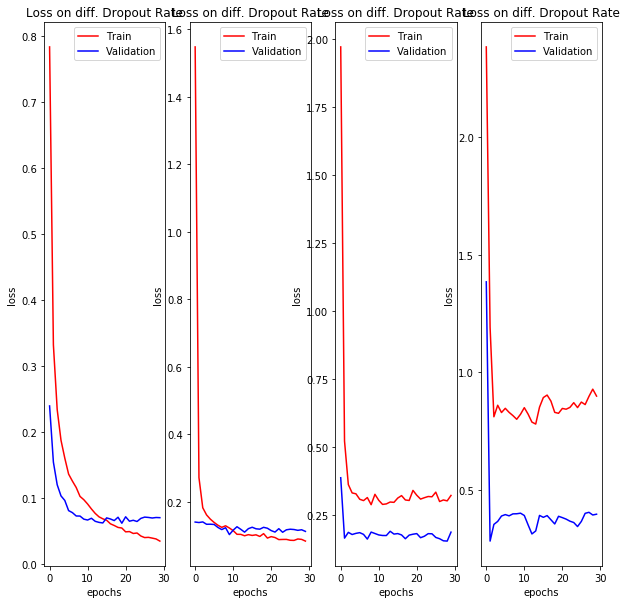

In [50]:
dp_rt=[0.3,0.4,0.5,0.6]
model_dp_rt=Sequential()
pt=1
plt.figure(figsize=(10,10))
for i in dp_rt:
    model_dp_rt.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
    model_dp_rt.add(Dropout(rate=i))
    model_dp_rt.add(BatchNormalization())

    #layer 2 with batch normalization and dropout
    model_dp_rt.add(Dense(128,activation="sigmoid"))
    model_dp_rt.add(Dropout(rate=i))
    model_dp_rt.add(BatchNormalization())
    #layer 3 with batch normalization and dropout
    model_dp_rt.add(Dense(32,activation="sigmoid"))
    model_dp_rt.add(Dropout(rate=i))
    model_dp_rt.add(BatchNormalization())
    #output layer with softmax
    model_dp_rt.add(Dense(output_dim, activation='softmax'))
    #compilation of the model
    model_dp_rt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history= model_dp_rt.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    #evaluating the model
    score = model_dp_rt.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])
    #plotting the of the graph
    plt.subplot(1,4,pt)
    plt.plot(list(range(0,30)),history.history['loss'],color='red')
    plt.plot(list(range(0,30)),history.history['val_loss'],color='blue')
    plt.legend(['Train',"Validation"])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Loss on diff. Dropout Rate")
    pt=pt+1
    

    

## 3 layer MLP +sigmoid+sgd(without Batchnormalization and Dropout)

In [51]:
#creating the model of 3 hidden layer
model_sig=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons`
#second with 128 neurons
#3rd with 32 neurons
#layer 1
model_sig.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
#layer 2
model_sig.add(Dense(128,activation="sigmoid"))
#layer 3
model_sig.add(Dense(32,activation="sigmoid"))
#output layer
model_sig.add(Dense(output_dim, activation='softmax'))

model_sig.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_71 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_72 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_sig.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
history= model_sig.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - ETA: 22:11 - loss: 2.3944 - acc: 0.08 - ETA: 3:43 - loss: 2.3378 - acc: 0.1224 - ETA: 1:52 - loss: 2.3549 - acc: 0.102 - ETA: 1:15 - loss: 2.3496 - acc: 0.102 - ETA: 56s - loss: 2.3438 - acc: 0.106 - ETA: 45s - loss: 2.3442 - acc: 0.10 - ETA: 39s - loss: 2.3418 - acc: 0.10 - ETA: 34s - loss: 2.3391 - acc: 0.10 - ETA: 30s - loss: 2.3380 - acc: 0.10 - ETA: 26s - loss: 2.3378 - acc: 0.10 - ETA: 24s - loss: 2.3345 - acc: 0.10 - ETA: 21s - loss: 2.3329 - acc: 0.09 - ETA: 20s - loss: 2.3321 - acc: 0.09 - ETA: 18s - loss: 2.3315 - acc: 0.09 - ETA: 17s - loss: 2.3302 - acc: 0.09 - ETA: 16s - loss: 2.3289 - acc: 0.09 - ETA: 15s - loss: 2.3274 - acc: 0.09 - ETA: 14s - loss: 2.3257 - acc: 0.09 - ETA: 13s - loss: 2.3242 - acc: 0.09 - ETA: 12s - loss: 2.3230 - acc: 0.09 - ETA: 12s - loss: 2.3216 - acc: 0.10 - ETA: 11s - loss: 2.3208 - acc: 0.10 - ETA: 10s - loss: 2.3201 - acc: 0.10 - ETA: 10s

60000/60000 [==============================] - ETA: 5s - loss: 2.2639 - acc: 0.218 - ETA: 4s - loss: 2.2639 - acc: 0.198 - ETA: 4s - loss: 2.2645 - acc: 0.210 - ETA: 4s - loss: 2.2639 - acc: 0.228 - ETA: 4s - loss: 2.2637 - acc: 0.236 - ETA: 4s - loss: 2.2641 - acc: 0.241 - ETA: 4s - loss: 2.2645 - acc: 0.244 - ETA: 4s - loss: 2.2646 - acc: 0.248 - ETA: 3s - loss: 2.2647 - acc: 0.248 - ETA: 3s - loss: 2.2644 - acc: 0.251 - ETA: 3s - loss: 2.2642 - acc: 0.251 - ETA: 3s - loss: 2.2639 - acc: 0.248 - ETA: 3s - loss: 2.2638 - acc: 0.245 - ETA: 3s - loss: 2.2638 - acc: 0.242 - ETA: 3s - loss: 2.2635 - acc: 0.241 - ETA: 3s - loss: 2.2633 - acc: 0.238 - ETA: 3s - loss: 2.2629 - acc: 0.234 - ETA: 3s - loss: 2.2626 - acc: 0.231 - ETA: 3s - loss: 2.2626 - acc: 0.227 - ETA: 3s - loss: 2.2624 - acc: 0.225 - ETA: 3s - loss: 2.2625 - acc: 0.223 - ETA: 3s - loss: 2.2623 - acc: 0.223 - ETA: 3s - loss: 2.2624 - acc: 0.222 - ETA: 3s - loss: 2.2625 - acc: 0.221 - ETA: 3s - loss: 2.2621 - acc: 0.221 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 2.1786 - acc: 0.375 - ETA: 4s - loss: 2.1698 - acc: 0.432 - ETA: 4s - loss: 2.1709 - acc: 0.429 - ETA: 4s - loss: 2.1727 - acc: 0.410 - ETA: 4s - loss: 2.1718 - acc: 0.403 - ETA: 4s - loss: 2.1709 - acc: 0.403 - ETA: 4s - loss: 2.1710 - acc: 0.403 - ETA: 4s - loss: 2.1710 - acc: 0.402 - ETA: 4s - loss: 2.1700 - acc: 0.404 - ETA: 4s - loss: 2.1698 - acc: 0.404 - ETA: 4s - loss: 2.1697 - acc: 0.405 - ETA: 3s - loss: 2.1697 - acc: 0.404 - ETA: 3s - loss: 2.1696 - acc: 0.406 - ETA: 3s - loss: 2.1690 - acc: 0.410 - ETA: 3s - loss: 2.1688 - acc: 0.411 - ETA: 3s - loss: 2.1678 - acc: 0.414 - ETA: 3s - loss: 2.1678 - acc: 0.414 - ETA: 3s - loss: 2.1673 - acc: 0.415 - ETA: 3s - loss: 2.1667 - acc: 0.413 - ETA: 3s - loss: 2.1663 - acc: 0.413 - ETA: 3s - loss: 2.1659 - acc: 0.411 - ETA: 3s - loss: 2.1658 - acc: 0.409 - ETA: 3s - loss: 2.1649 - acc: 0.409 - ETA: 3s - loss: 2.1650 - acc: 0.404 - ETA: 3s - loss: 2.1648 - acc: 0.403 - ETA

60000/60000 [==============================] - ETA: 4s - loss: 1.7966 - acc: 0.539 - ETA: 4s - loss: 1.8248 - acc: 0.515 - ETA: 4s - loss: 1.8227 - acc: 0.523 - ETA: 4s - loss: 1.8191 - acc: 0.526 - ETA: 3s - loss: 1.8209 - acc: 0.523 - ETA: 3s - loss: 1.8250 - acc: 0.518 - ETA: 3s - loss: 1.8198 - acc: 0.520 - ETA: 3s - loss: 1.8155 - acc: 0.524 - ETA: 3s - loss: 1.8134 - acc: 0.525 - ETA: 3s - loss: 1.8140 - acc: 0.523 - ETA: 3s - loss: 1.8139 - acc: 0.523 - ETA: 3s - loss: 1.8127 - acc: 0.525 - ETA: 3s - loss: 1.8118 - acc: 0.525 - ETA: 3s - loss: 1.8124 - acc: 0.524 - ETA: 3s - loss: 1.8117 - acc: 0.525 - ETA: 3s - loss: 1.8108 - acc: 0.525 - ETA: 3s - loss: 1.8092 - acc: 0.525 - ETA: 3s - loss: 1.8081 - acc: 0.528 - ETA: 3s - loss: 1.8073 - acc: 0.529 - ETA: 3s - loss: 1.8075 - acc: 0.527 - ETA: 3s - loss: 1.8069 - acc: 0.527 - ETA: 3s - loss: 1.8063 - acc: 0.528 - ETA: 3s - loss: 1.8056 - acc: 0.528 - ETA: 3s - loss: 1.8053 - acc: 0.528 - ETA: 3s - loss: 1.8033 - acc: 0.530 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 1.3899 - acc: 0.609 - ETA: 4s - loss: 1.3261 - acc: 0.638 - ETA: 4s - loss: 1.3300 - acc: 0.618 - ETA: 3s - loss: 1.3294 - acc: 0.614 - ETA: 3s - loss: 1.3290 - acc: 0.612 - ETA: 3s - loss: 1.3291 - acc: 0.611 - ETA: 3s - loss: 1.3294 - acc: 0.606 - ETA: 3s - loss: 1.3319 - acc: 0.605 - ETA: 3s - loss: 1.3312 - acc: 0.608 - ETA: 3s - loss: 1.3335 - acc: 0.608 - ETA: 3s - loss: 1.3311 - acc: 0.610 - ETA: 3s - loss: 1.3301 - acc: 0.610 - ETA: 3s - loss: 1.3281 - acc: 0.612 - ETA: 3s - loss: 1.3285 - acc: 0.612 - ETA: 3s - loss: 1.3295 - acc: 0.611 - ETA: 3s - loss: 1.3319 - acc: 0.608 - ETA: 3s - loss: 1.3315 - acc: 0.608 - ETA: 3s - loss: 1.3301 - acc: 0.607 - ETA: 3s - loss: 1.3305 - acc: 0.607 - ETA: 3s - loss: 1.3307 - acc: 0.607 - ETA: 3s - loss: 1.3287 - acc: 0.608 - ETA: 3s - loss: 1.3294 - acc: 0.608 - ETA: 2s - loss: 1.3287 - acc: 0.607 - ETA: 2s - loss: 1.3276 - acc: 0.607 - ETA: 2s - loss: 1.3256 - acc: 0.608 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 1.0872 - acc: 0.703 - ETA: 4s - loss: 1.0579 - acc: 0.700 - ETA: 4s - loss: 1.0476 - acc: 0.701 - ETA: 4s - loss: 1.0484 - acc: 0.699 - ETA: 3s - loss: 1.0406 - acc: 0.702 - ETA: 3s - loss: 1.0353 - acc: 0.703 - ETA: 3s - loss: 1.0373 - acc: 0.700 - ETA: 3s - loss: 1.0408 - acc: 0.697 - ETA: 3s - loss: 1.0413 - acc: 0.697 - ETA: 3s - loss: 1.0401 - acc: 0.697 - ETA: 3s - loss: 1.0378 - acc: 0.698 - ETA: 3s - loss: 1.0407 - acc: 0.695 - ETA: 3s - loss: 1.0420 - acc: 0.693 - ETA: 3s - loss: 1.0416 - acc: 0.695 - ETA: 3s - loss: 1.0412 - acc: 0.695 - ETA: 3s - loss: 1.0400 - acc: 0.695 - ETA: 3s - loss: 1.0411 - acc: 0.696 - ETA: 3s - loss: 1.0401 - acc: 0.696 - ETA: 3s - loss: 1.0402 - acc: 0.697 - ETA: 3s - loss: 1.0411 - acc: 0.695 - ETA: 3s - loss: 1.0407 - acc: 0.694 - ETA: 3s - loss: 1.0402 - acc: 0.695 - ETA: 2s - loss: 1.0399 - acc: 0.695 - ETA: 2s - loss: 1.0394 - acc: 0.695 - ETA: 2s - loss: 1.0379 - acc: 0.695 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.8995 - acc: 0.726 - ETA: 4s - loss: 0.8803 - acc: 0.744 - ETA: 3s - loss: 0.8684 - acc: 0.751 - ETA: 3s - loss: 0.8665 - acc: 0.752 - ETA: 3s - loss: 0.8772 - acc: 0.746 - ETA: 3s - loss: 0.8746 - acc: 0.745 - ETA: 3s - loss: 0.8727 - acc: 0.748 - ETA: 3s - loss: 0.8714 - acc: 0.748 - ETA: 3s - loss: 0.8679 - acc: 0.751 - ETA: 3s - loss: 0.8713 - acc: 0.751 - ETA: 3s - loss: 0.8773 - acc: 0.748 - ETA: 3s - loss: 0.8722 - acc: 0.749 - ETA: 3s - loss: 0.8736 - acc: 0.748 - ETA: 3s - loss: 0.8719 - acc: 0.748 - ETA: 3s - loss: 0.8704 - acc: 0.747 - ETA: 3s - loss: 0.8698 - acc: 0.747 - ETA: 3s - loss: 0.8716 - acc: 0.746 - ETA: 3s - loss: 0.8726 - acc: 0.745 - ETA: 3s - loss: 0.8750 - acc: 0.745 - ETA: 3s - loss: 0.8760 - acc: 0.744 - ETA: 3s - loss: 0.8754 - acc: 0.744 - ETA: 3s - loss: 0.8742 - acc: 0.745 - ETA: 2s - loss: 0.8710 - acc: 0.747 - ETA: 2s - loss: 0.8689 - acc: 0.749 - ETA: 2s - loss: 0.8673 - acc: 0.749 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.7592 - acc: 0.757 - ETA: 4s - loss: 0.7598 - acc: 0.789 - ETA: 4s - loss: 0.7792 - acc: 0.773 - ETA: 4s - loss: 0.7834 - acc: 0.772 - ETA: 4s - loss: 0.7929 - acc: 0.770 - ETA: 4s - loss: 0.7798 - acc: 0.775 - ETA: 4s - loss: 0.7782 - acc: 0.771 - ETA: 3s - loss: 0.7751 - acc: 0.773 - ETA: 3s - loss: 0.7738 - acc: 0.777 - ETA: 3s - loss: 0.7760 - acc: 0.775 - ETA: 3s - loss: 0.7707 - acc: 0.778 - ETA: 3s - loss: 0.7701 - acc: 0.780 - ETA: 3s - loss: 0.7682 - acc: 0.781 - ETA: 3s - loss: 0.7653 - acc: 0.782 - ETA: 3s - loss: 0.7622 - acc: 0.782 - ETA: 3s - loss: 0.7628 - acc: 0.782 - ETA: 3s - loss: 0.7611 - acc: 0.784 - ETA: 3s - loss: 0.7602 - acc: 0.784 - ETA: 3s - loss: 0.7592 - acc: 0.784 - ETA: 3s - loss: 0.7603 - acc: 0.784 - ETA: 3s - loss: 0.7601 - acc: 0.785 - ETA: 3s - loss: 0.7594 - acc: 0.785 - ETA: 3s - loss: 0.7604 - acc: 0.784 - ETA: 3s - loss: 0.7596 - acc: 0.785 - ETA: 3s - loss: 0.7597 - acc: 0.784 - ETA

Test score: 0.7015644532203674
Test accuracy: 0.8068


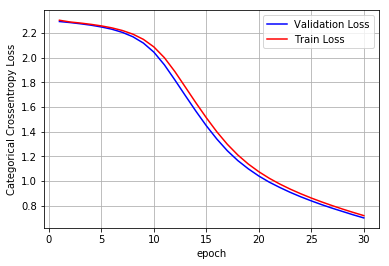

In [54]:
%matplotlib inline
score = model_sig.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##  MLP 3 layer with relu+sgd+weight INitialization

In [ ]:
#creating the model of 3 hidden layer
model_sig=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons`
#second with 128 neurons
#3rd with 32 neurons
#layer 1
model_sig.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
#layer 2
model_sig.add(Dense(128,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.0155,seed=None)))
#layer 3
model_sig.add(Dense(32,activation="relu"))
#output layer
model_sig.add(Dense(output_dim, activation='softmax'))

model_sig.summary()

In [61]:
model_sig.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history= model_sig.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - ETA: 22:53 - loss: 0.1694 - acc: 0.96 - ETA: 3:50 - loss: 0.1474 - acc: 0.9596 - ETA: 2:06 - loss: 0.1559 - acc: 0.957 - ETA: 1:27 - loss: 0.1470 - acc: 0.961 - ETA: 1:07 - loss: 0.1510 - acc: 0.959 - ETA: 54s - loss: 0.1508 - acc: 0.959 - ETA: 44s - loss: 0.1528 - acc: 0.95 - ETA: 38s - loss: 0.1573 - acc: 0.95 - ETA: 34s - loss: 0.1554 - acc: 0.95 - ETA: 30s - loss: 0.1580 - acc: 0.95 - ETA: 27s - loss: 0.1599 - acc: 0.95 - ETA: 24s - loss: 0.1580 - acc: 0.95 - ETA: 23s - loss: 0.1565 - acc: 0.95 - ETA: 21s - loss: 0.1571 - acc: 0.95 - ETA: 19s - loss: 0.1574 - acc: 0.95 - ETA: 18s - loss: 0.1588 - acc: 0.95 - ETA: 17s - loss: 0.1583 - acc: 0.95 - ETA: 16s - loss: 0.1586 - acc: 0.95 - ETA: 15s - loss: 0.1601 - acc: 0.95 - ETA: 14s - loss: 0.1593 - acc: 0.95 - ETA: 14s - loss: 0.1596 - acc: 0.95 - ETA: 13s - loss: 0.1575 - acc: 0.95 - ETA: 12s - loss: 0.1567 - acc: 0.95 - ETA: 1

60000/60000 [==============================] - ETA: 5s - loss: 0.1364 - acc: 0.968 - ETA: 4s - loss: 0.1314 - acc: 0.957 - ETA: 4s - loss: 0.1185 - acc: 0.963 - ETA: 4s - loss: 0.1261 - acc: 0.963 - ETA: 4s - loss: 0.1195 - acc: 0.965 - ETA: 4s - loss: 0.1223 - acc: 0.963 - ETA: 4s - loss: 0.1236 - acc: 0.962 - ETA: 3s - loss: 0.1268 - acc: 0.961 - ETA: 3s - loss: 0.1268 - acc: 0.961 - ETA: 3s - loss: 0.1267 - acc: 0.961 - ETA: 3s - loss: 0.1262 - acc: 0.961 - ETA: 3s - loss: 0.1259 - acc: 0.961 - ETA: 3s - loss: 0.1263 - acc: 0.961 - ETA: 3s - loss: 0.1287 - acc: 0.961 - ETA: 3s - loss: 0.1276 - acc: 0.962 - ETA: 3s - loss: 0.1259 - acc: 0.962 - ETA: 3s - loss: 0.1272 - acc: 0.962 - ETA: 3s - loss: 0.1266 - acc: 0.962 - ETA: 3s - loss: 0.1279 - acc: 0.962 - ETA: 3s - loss: 0.1264 - acc: 0.962 - ETA: 3s - loss: 0.1261 - acc: 0.963 - ETA: 3s - loss: 0.1254 - acc: 0.963 - ETA: 3s - loss: 0.1243 - acc: 0.963 - ETA: 3s - loss: 0.1242 - acc: 0.964 - ETA: 3s - loss: 0.1242 - acc: 0.964 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.1016 - acc: 0.968 - ETA: 4s - loss: 0.1116 - acc: 0.962 - ETA: 4s - loss: 0.1059 - acc: 0.966 - ETA: 4s - loss: 0.0942 - acc: 0.972 - ETA: 4s - loss: 0.0957 - acc: 0.970 - ETA: 4s - loss: 0.0945 - acc: 0.970 - ETA: 4s - loss: 0.0983 - acc: 0.969 - ETA: 4s - loss: 0.1042 - acc: 0.969 - ETA: 4s - loss: 0.1030 - acc: 0.969 - ETA: 3s - loss: 0.1050 - acc: 0.969 - ETA: 3s - loss: 0.1040 - acc: 0.969 - ETA: 3s - loss: 0.1054 - acc: 0.969 - ETA: 3s - loss: 0.1072 - acc: 0.969 - ETA: 3s - loss: 0.1065 - acc: 0.969 - ETA: 3s - loss: 0.1057 - acc: 0.968 - ETA: 3s - loss: 0.1046 - acc: 0.969 - ETA: 3s - loss: 0.1045 - acc: 0.969 - ETA: 3s - loss: 0.1049 - acc: 0.969 - ETA: 3s - loss: 0.1046 - acc: 0.969 - ETA: 3s - loss: 0.1055 - acc: 0.969 - ETA: 3s - loss: 0.1054 - acc: 0.969 - ETA: 3s - loss: 0.1048 - acc: 0.969 - ETA: 3s - loss: 0.1052 - acc: 0.969 - ETA: 3s - loss: 0.1041 - acc: 0.970 - ETA: 3s - loss: 0.1032 - acc: 0.970 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.1766 - acc: 0.960 - ETA: 4s - loss: 0.0893 - acc: 0.974 - ETA: 4s - loss: 0.0867 - acc: 0.977 - ETA: 4s - loss: 0.0804 - acc: 0.979 - ETA: 4s - loss: 0.0849 - acc: 0.978 - ETA: 4s - loss: 0.0904 - acc: 0.976 - ETA: 4s - loss: 0.0893 - acc: 0.976 - ETA: 3s - loss: 0.0901 - acc: 0.975 - ETA: 3s - loss: 0.0889 - acc: 0.975 - ETA: 3s - loss: 0.0872 - acc: 0.976 - ETA: 3s - loss: 0.0863 - acc: 0.976 - ETA: 3s - loss: 0.0883 - acc: 0.975 - ETA: 3s - loss: 0.0891 - acc: 0.974 - ETA: 3s - loss: 0.0883 - acc: 0.975 - ETA: 3s - loss: 0.0869 - acc: 0.975 - ETA: 3s - loss: 0.0870 - acc: 0.975 - ETA: 3s - loss: 0.0862 - acc: 0.976 - ETA: 3s - loss: 0.0866 - acc: 0.976 - ETA: 3s - loss: 0.0869 - acc: 0.976 - ETA: 3s - loss: 0.0870 - acc: 0.975 - ETA: 3s - loss: 0.0871 - acc: 0.975 - ETA: 3s - loss: 0.0866 - acc: 0.975 - ETA: 3s - loss: 0.0864 - acc: 0.975 - ETA: 3s - loss: 0.0866 - acc: 0.975 - ETA: 3s - loss: 0.0870 - acc: 0.974 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.0341 - acc: 1.000 - ETA: 4s - loss: 0.0600 - acc: 0.984 - ETA: 4s - loss: 0.0643 - acc: 0.982 - ETA: 4s - loss: 0.0653 - acc: 0.983 - ETA: 4s - loss: 0.0697 - acc: 0.981 - ETA: 4s - loss: 0.0724 - acc: 0.980 - ETA: 4s - loss: 0.0713 - acc: 0.981 - ETA: 4s - loss: 0.0717 - acc: 0.981 - ETA: 4s - loss: 0.0735 - acc: 0.980 - ETA: 4s - loss: 0.0717 - acc: 0.980 - ETA: 4s - loss: 0.0702 - acc: 0.981 - ETA: 4s - loss: 0.0706 - acc: 0.981 - ETA: 4s - loss: 0.0696 - acc: 0.981 - ETA: 4s - loss: 0.0704 - acc: 0.981 - ETA: 3s - loss: 0.0714 - acc: 0.980 - ETA: 3s - loss: 0.0710 - acc: 0.980 - ETA: 3s - loss: 0.0707 - acc: 0.980 - ETA: 3s - loss: 0.0693 - acc: 0.981 - ETA: 3s - loss: 0.0696 - acc: 0.981 - ETA: 3s - loss: 0.0705 - acc: 0.981 - ETA: 3s - loss: 0.0705 - acc: 0.981 - ETA: 3s - loss: 0.0718 - acc: 0.980 - ETA: 3s - loss: 0.0708 - acc: 0.980 - ETA: 3s - loss: 0.0711 - acc: 0.980 - ETA: 3s - loss: 0.0713 - acc: 0.980 - ETA

60000/60000 [==============================] - ETA: 4s - loss: 0.0334 - acc: 0.992 - ETA: 4s - loss: 0.0513 - acc: 0.984 - ETA: 4s - loss: 0.0555 - acc: 0.983 - ETA: 4s - loss: 0.0531 - acc: 0.983 - ETA: 4s - loss: 0.0518 - acc: 0.983 - ETA: 4s - loss: 0.0584 - acc: 0.982 - ETA: 4s - loss: 0.0584 - acc: 0.982 - ETA: 4s - loss: 0.0581 - acc: 0.982 - ETA: 4s - loss: 0.0582 - acc: 0.982 - ETA: 4s - loss: 0.0602 - acc: 0.982 - ETA: 4s - loss: 0.0596 - acc: 0.983 - ETA: 4s - loss: 0.0599 - acc: 0.983 - ETA: 4s - loss: 0.0602 - acc: 0.982 - ETA: 4s - loss: 0.0611 - acc: 0.982 - ETA: 4s - loss: 0.0608 - acc: 0.982 - ETA: 4s - loss: 0.0617 - acc: 0.982 - ETA: 3s - loss: 0.0620 - acc: 0.982 - ETA: 3s - loss: 0.0616 - acc: 0.982 - ETA: 3s - loss: 0.0630 - acc: 0.982 - ETA: 3s - loss: 0.0635 - acc: 0.982 - ETA: 3s - loss: 0.0639 - acc: 0.982 - ETA: 3s - loss: 0.0648 - acc: 0.982 - ETA: 3s - loss: 0.0643 - acc: 0.982 - ETA: 3s - loss: 0.0639 - acc: 0.982 - ETA: 3s - loss: 0.0641 - acc: 0.982 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.0694 - acc: 0.976 - ETA: 4s - loss: 0.0606 - acc: 0.982 - ETA: 4s - loss: 0.0612 - acc: 0.983 - ETA: 4s - loss: 0.0614 - acc: 0.983 - ETA: 4s - loss: 0.0633 - acc: 0.982 - ETA: 4s - loss: 0.0616 - acc: 0.982 - ETA: 4s - loss: 0.0641 - acc: 0.983 - ETA: 4s - loss: 0.0617 - acc: 0.984 - ETA: 4s - loss: 0.0627 - acc: 0.983 - ETA: 4s - loss: 0.0637 - acc: 0.983 - ETA: 4s - loss: 0.0667 - acc: 0.982 - ETA: 4s - loss: 0.0662 - acc: 0.982 - ETA: 4s - loss: 0.0654 - acc: 0.982 - ETA: 3s - loss: 0.0644 - acc: 0.982 - ETA: 3s - loss: 0.0641 - acc: 0.982 - ETA: 3s - loss: 0.0656 - acc: 0.982 - ETA: 3s - loss: 0.0654 - acc: 0.982 - ETA: 3s - loss: 0.0641 - acc: 0.982 - ETA: 3s - loss: 0.0638 - acc: 0.982 - ETA: 3s - loss: 0.0636 - acc: 0.983 - ETA: 3s - loss: 0.0631 - acc: 0.983 - ETA: 3s - loss: 0.0626 - acc: 0.983 - ETA: 3s - loss: 0.0637 - acc: 0.982 - ETA: 3s - loss: 0.0629 - acc: 0.983 - ETA: 3s - loss: 0.0626 - acc: 0.983 - ETA

60000/60000 [==============================] - ETA: 4s - loss: 0.0433 - acc: 0.992 - ETA: 4s - loss: 0.0581 - acc: 0.983 - ETA: 4s - loss: 0.0611 - acc: 0.980 - ETA: 4s - loss: 0.0609 - acc: 0.980 - ETA: 4s - loss: 0.0682 - acc: 0.981 - ETA: 4s - loss: 0.0618 - acc: 0.982 - ETA: 4s - loss: 0.0568 - acc: 0.984 - ETA: 4s - loss: 0.0559 - acc: 0.985 - ETA: 4s - loss: 0.0536 - acc: 0.985 - ETA: 4s - loss: 0.0529 - acc: 0.986 - ETA: 3s - loss: 0.0533 - acc: 0.986 - ETA: 3s - loss: 0.0517 - acc: 0.986 - ETA: 3s - loss: 0.0516 - acc: 0.986 - ETA: 3s - loss: 0.0521 - acc: 0.986 - ETA: 3s - loss: 0.0519 - acc: 0.986 - ETA: 3s - loss: 0.0511 - acc: 0.987 - ETA: 3s - loss: 0.0510 - acc: 0.986 - ETA: 3s - loss: 0.0511 - acc: 0.986 - ETA: 3s - loss: 0.0513 - acc: 0.986 - ETA: 3s - loss: 0.0518 - acc: 0.986 - ETA: 3s - loss: 0.0520 - acc: 0.986 - ETA: 3s - loss: 0.0526 - acc: 0.986 - ETA: 3s - loss: 0.0521 - acc: 0.986 - ETA: 3s - loss: 0.0524 - acc: 0.986 - ETA: 3s - loss: 0.0523 - acc: 0.986 - ETA

Test score: 0.08881582766599022
Test accuracy: 0.9733


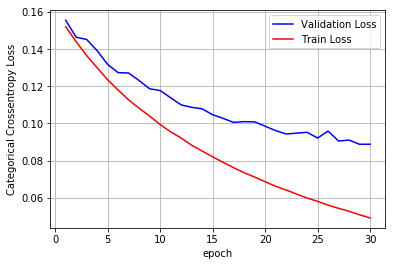

In [63]:
%matplotlib inline
score = model_sig.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

###  MLP 5 layers+relu+adam+BN+different Dropout rates


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
54144/60000 [==========================>...] - ETA: 31:46 - loss: 2.9550 - acc: 0.08 - ETA: 10:41 - loss: 2.8657 - acc: 0.11 - ETA: 6:28 - loss: 2.8284 - acc: 0.1156 - ETA: 4:40 - loss: 2.7815 - acc: 0.117 - ETA: 3:40 - loss: 2.7196 - acc: 0.132 - ETA: 3:01 - loss: 2.6416 - acc: 0.146 - ETA: 2:34 - loss: 2.5848 - acc: 0.153 - ETA: 2:15 - loss: 2.5221 - acc: 0.168 - ETA: 2:00 - loss: 2.4740 - acc: 0.176 - ETA: 1:48 - loss: 2.4238 - acc: 0.194 - ETA: 1:39 - loss: 2.3876 - acc: 0.204 - ETA: 1:31 - loss: 2.3477 - acc: 0.211 - ETA: 1:24 - loss: 2.3106 - acc: 0.222 - ETA: 1:19 - loss: 2.2814 - acc: 0.230 - ETA: 1:14 - loss: 2.2479 - acc: 0.243 - ETA: 1:10 - loss: 2.2202 - acc: 0.253 - ETA: 1:06 - loss: 2.1872 - acc: 0.264 - ETA: 1:03 - loss: 2.1594 - acc: 0.272 - ETA: 1:00 - loss: 2.1394 - acc: 0.277 - ETA: 57s - loss: 2.1174 - acc: 0.284 - ETA: 55s - loss: 2.0917 - acc: 0.29 - ETA: 52s - loss: 2.0675 - acc: 0.30 - ETA: 50s - loss:

54912/60000 [==========================>...] - ETA: 14s - loss: 0.2277 - acc: 0.96 - ETA: 14s - loss: 0.3579 - acc: 0.91 - ETA: 13s - loss: 0.3219 - acc: 0.92 - ETA: 13s - loss: 0.3102 - acc: 0.92 - ETA: 13s - loss: 0.3337 - acc: 0.91 - ETA: 13s - loss: 0.3313 - acc: 0.90 - ETA: 13s - loss: 0.3477 - acc: 0.90 - ETA: 13s - loss: 0.3446 - acc: 0.90 - ETA: 13s - loss: 0.3486 - acc: 0.90 - ETA: 13s - loss: 0.3518 - acc: 0.90 - ETA: 13s - loss: 0.3473 - acc: 0.90 - ETA: 13s - loss: 0.3450 - acc: 0.91 - ETA: 13s - loss: 0.3438 - acc: 0.91 - ETA: 13s - loss: 0.3477 - acc: 0.91 - ETA: 12s - loss: 0.3478 - acc: 0.91 - ETA: 12s - loss: 0.3424 - acc: 0.91 - ETA: 12s - loss: 0.3503 - acc: 0.90 - ETA: 12s - loss: 0.3503 - acc: 0.90 - ETA: 12s - loss: 0.3554 - acc: 0.90 - ETA: 12s - loss: 0.3546 - acc: 0.90 - ETA: 12s - loss: 0.3512 - acc: 0.90 - ETA: 12s - loss: 0.3466 - acc: 0.90 - ETA: 12s - loss: 0.3472 - acc: 0.90 - ETA: 12s - loss: 0.3439 - acc: 0.90 - ETA: 12s - loss: 0.3422 - acc: 0.91 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.3085 - acc: 0.923 - ETA: 1s - loss: 0.3085 - acc: 0.923 - ETA: 1s - loss: 0.3088 - acc: 0.923 - ETA: 0s - loss: 0.3086 - acc: 0.923 - ETA: 0s - loss: 0.3088 - acc: 0.923 - ETA: 0s - loss: 0.3083 - acc: 0.923 - ETA: 0s - loss: 0.3082 - acc: 0.923 - ETA: 0s - loss: 0.3079 - acc: 0.923 - ETA: 0s - loss: 0.3077 - acc: 0.924 - ETA: 0s - loss: 0.3074 - acc: 0.924 - ETA: 0s - loss: 0.3068 - acc: 0.924 - ETA: 0s - loss: 0.3068 - acc: 0.924 - ETA: 0s - loss: 0.3068 - acc: 0.924 - ETA: 0s - loss: 0.3065 - acc: 0.924 - ETA: 0s - loss: 0.3063 - acc: 0.924 - ETA: 0s - loss: 0.3060 - acc: 0.924 - ETA: 0s - loss: 0.3057 - acc: 0.924 - ETA: 0s - loss: 0.3054 - acc: 0.924 - ETA: 0s - loss: 0.3056 - acc: 0.924 - 15s 246us/step - loss: 0.3057 - acc: 0.9244 - val_loss: 0.1336 - val_acc: 0.9636
Epoch 3/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.2828 - acc: 0.93 - ETA: 13s - loss: 0.2164 - acc: 0.95 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 14s - loss: 0.1172 - acc: 0.98 - ETA: 13s - loss: 0.2151 - acc: 0.96 - ETA: 13s - loss: 0.2007 - acc: 0.95 - ETA: 13s - loss: 0.2142 - acc: 0.95 - ETA: 12s - loss: 0.1971 - acc: 0.96 - ETA: 12s - loss: 0.1889 - acc: 0.95 - ETA: 12s - loss: 0.1950 - acc: 0.95 - ETA: 12s - loss: 0.1848 - acc: 0.95 - ETA: 12s - loss: 0.1761 - acc: 0.96 - ETA: 12s - loss: 0.1781 - acc: 0.96 - ETA: 12s - loss: 0.1865 - acc: 0.95 - ETA: 12s - loss: 0.1813 - acc: 0.95 - ETA: 12s - loss: 0.1840 - acc: 0.95 - ETA: 12s - loss: 0.1814 - acc: 0.95 - ETA: 12s - loss: 0.1800 - acc: 0.95 - ETA: 12s - loss: 0.1828 - acc: 0.95 - ETA: 12s - loss: 0.1893 - acc: 0.95 - ETA: 12s - loss: 0.1840 - acc: 0.95 - ETA: 12s - loss: 0.1888 - acc: 0.95 - ETA: 12s - loss: 0.1844 - acc: 0.95 - ETA: 11s - loss: 0.1841 - acc: 0.95 - ETA: 11s - loss: 0.1818 - acc: 0.95 - ETA: 11s - loss: 0.1831 - acc: 0.95 - ETA: 11s - loss: 0.1841 - acc: 0.95 - ETA: 11s - loss: 0.1835 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.1965 - acc: 0.953 - ETA: 0s - loss: 0.1968 - acc: 0.953 - ETA: 0s - loss: 0.1967 - acc: 0.953 - ETA: 0s - loss: 0.1965 - acc: 0.953 - ETA: 0s - loss: 0.1961 - acc: 0.953 - ETA: 0s - loss: 0.1960 - acc: 0.953 - ETA: 0s - loss: 0.1960 - acc: 0.953 - ETA: 0s - loss: 0.1959 - acc: 0.953 - ETA: 0s - loss: 0.1955 - acc: 0.953 - ETA: 0s - loss: 0.1956 - acc: 0.953 - ETA: 0s - loss: 0.1955 - acc: 0.953 - ETA: 0s - loss: 0.1951 - acc: 0.953 - ETA: 0s - loss: 0.1948 - acc: 0.953 - ETA: 0s - loss: 0.1951 - acc: 0.953 - ETA: 0s - loss: 0.1950 - acc: 0.953 - ETA: 0s - loss: 0.1949 - acc: 0.953 - ETA: 0s - loss: 0.1948 - acc: 0.953 - ETA: 0s - loss: 0.1948 - acc: 0.953 - ETA: 0s - loss: 0.1950 - acc: 0.953 - 14s 230us/step - loss: 0.1950 - acc: 0.9535 - val_loss: 0.1034 - val_acc: 0.9724
Epoch 5/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.1379 - acc: 0.97 - ETA: 13s - loss: 0.1806 - acc: 0.95 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 14s - loss: 0.1650 - acc: 0.95 - ETA: 13s - loss: 0.1687 - acc: 0.96 - ETA: 13s - loss: 0.1468 - acc: 0.97 - ETA: 13s - loss: 0.1335 - acc: 0.97 - ETA: 13s - loss: 0.1357 - acc: 0.97 - ETA: 12s - loss: 0.1360 - acc: 0.97 - ETA: 12s - loss: 0.1284 - acc: 0.97 - ETA: 12s - loss: 0.1313 - acc: 0.97 - ETA: 12s - loss: 0.1306 - acc: 0.97 - ETA: 12s - loss: 0.1346 - acc: 0.97 - ETA: 12s - loss: 0.1353 - acc: 0.97 - ETA: 12s - loss: 0.1336 - acc: 0.97 - ETA: 12s - loss: 0.1326 - acc: 0.97 - ETA: 12s - loss: 0.1292 - acc: 0.97 - ETA: 12s - loss: 0.1363 - acc: 0.97 - ETA: 12s - loss: 0.1360 - acc: 0.97 - ETA: 12s - loss: 0.1367 - acc: 0.97 - ETA: 12s - loss: 0.1329 - acc: 0.97 - ETA: 12s - loss: 0.1346 - acc: 0.97 - ETA: 11s - loss: 0.1352 - acc: 0.96 - ETA: 11s - loss: 0.1360 - acc: 0.96 - ETA: 11s - loss: 0.1394 - acc: 0.96 - ETA: 11s - loss: 0.1442 - acc: 0.96 - ETA: 11s - loss: 0.1428 - acc: 0.96 - ETA: 11s - loss: 0.1411 - acc: 0.96 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.1536 - acc: 0.964 - ETA: 0s - loss: 0.1535 - acc: 0.964 - ETA: 0s - loss: 0.1538 - acc: 0.964 - ETA: 0s - loss: 0.1540 - acc: 0.964 - ETA: 0s - loss: 0.1539 - acc: 0.964 - ETA: 0s - loss: 0.1539 - acc: 0.964 - ETA: 0s - loss: 0.1536 - acc: 0.964 - ETA: 0s - loss: 0.1538 - acc: 0.964 - ETA: 0s - loss: 0.1536 - acc: 0.964 - ETA: 0s - loss: 0.1537 - acc: 0.964 - ETA: 0s - loss: 0.1537 - acc: 0.964 - ETA: 0s - loss: 0.1534 - acc: 0.964 - ETA: 0s - loss: 0.1538 - acc: 0.964 - ETA: 0s - loss: 0.1536 - acc: 0.964 - ETA: 0s - loss: 0.1536 - acc: 0.964 - ETA: 0s - loss: 0.1539 - acc: 0.964 - ETA: 0s - loss: 0.1539 - acc: 0.964 - ETA: 0s - loss: 0.1539 - acc: 0.964 - ETA: 0s - loss: 0.1541 - acc: 0.964 - 14s 231us/step - loss: 0.1541 - acc: 0.9640 - val_loss: 0.0942 - val_acc: 0.9762
Epoch 7/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.1438 - acc: 0.96 - ETA: 13s - loss: 0.1506 - acc: 0.96 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0794 - acc: 0.99 - ETA: 13s - loss: 0.1206 - acc: 0.97 - ETA: 13s - loss: 0.1028 - acc: 0.97 - ETA: 13s - loss: 0.1120 - acc: 0.97 - ETA: 13s - loss: 0.1389 - acc: 0.96 - ETA: 13s - loss: 0.1273 - acc: 0.97 - ETA: 13s - loss: 0.1303 - acc: 0.96 - ETA: 13s - loss: 0.1361 - acc: 0.96 - ETA: 13s - loss: 0.1404 - acc: 0.96 - ETA: 13s - loss: 0.1390 - acc: 0.96 - ETA: 12s - loss: 0.1351 - acc: 0.96 - ETA: 12s - loss: 0.1310 - acc: 0.96 - ETA: 12s - loss: 0.1268 - acc: 0.96 - ETA: 12s - loss: 0.1267 - acc: 0.96 - ETA: 12s - loss: 0.1283 - acc: 0.96 - ETA: 12s - loss: 0.1312 - acc: 0.96 - ETA: 12s - loss: 0.1354 - acc: 0.96 - ETA: 12s - loss: 0.1348 - acc: 0.96 - ETA: 12s - loss: 0.1333 - acc: 0.96 - ETA: 12s - loss: 0.1308 - acc: 0.96 - ETA: 12s - loss: 0.1329 - acc: 0.96 - ETA: 12s - loss: 0.1351 - acc: 0.96 - ETA: 12s - loss: 0.1355 - acc: 0.96 - ETA: 12s - loss: 0.1336 - acc: 0.96 - ETA: 11s - loss: 0.1334 - acc: 0.96 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1334 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1334 - acc: 0.968 - ETA: 0s - loss: 0.1334 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1335 - acc: 0.968 - ETA: 0s - loss: 0.1334 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1335 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1333 - acc: 0.968 - ETA: 0s - loss: 0.1337 - acc: 0.968 - ETA: 0s - loss: 0.1336 - acc: 0.968 - ETA: 0s - loss: 0.1338 - acc: 0.968 - ETA: 0s - loss: 0.1338 - acc: 0.968 - ETA: 0s - loss: 0.1339 - acc: 0.968 - 14s 232us/step - loss: 0.1340 - acc: 0.9687 - val_loss: 0.0780 - val_acc: 0.9795
Epoch 9/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.1098 - acc: 0.96 - ETA: 13s - loss: 0.1193 - acc: 0.97 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0464 - acc: 0.98 - ETA: 13s - loss: 0.1306 - acc: 0.97 - ETA: 13s - loss: 0.1167 - acc: 0.97 - ETA: 13s - loss: 0.1011 - acc: 0.97 - ETA: 13s - loss: 0.1140 - acc: 0.97 - ETA: 13s - loss: 0.1068 - acc: 0.97 - ETA: 13s - loss: 0.1090 - acc: 0.97 - ETA: 12s - loss: 0.1091 - acc: 0.97 - ETA: 12s - loss: 0.1148 - acc: 0.97 - ETA: 12s - loss: 0.1128 - acc: 0.97 - ETA: 12s - loss: 0.1076 - acc: 0.97 - ETA: 12s - loss: 0.1092 - acc: 0.97 - ETA: 12s - loss: 0.1085 - acc: 0.97 - ETA: 12s - loss: 0.1182 - acc: 0.97 - ETA: 12s - loss: 0.1122 - acc: 0.97 - ETA: 12s - loss: 0.1132 - acc: 0.97 - ETA: 12s - loss: 0.1204 - acc: 0.97 - ETA: 11s - loss: 0.1188 - acc: 0.97 - ETA: 11s - loss: 0.1179 - acc: 0.97 - ETA: 11s - loss: 0.1151 - acc: 0.97 - ETA: 11s - loss: 0.1159 - acc: 0.97 - ETA: 11s - loss: 0.1146 - acc: 0.97 - ETA: 11s - loss: 0.1158 - acc: 0.97 - ETA: 11s - loss: 0.1188 - acc: 0.97 - ETA: 11s - loss: 0.1180 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.1162 - acc: 0.973 - ETA: 0s - loss: 0.1162 - acc: 0.973 - ETA: 0s - loss: 0.1162 - acc: 0.973 - ETA: 0s - loss: 0.1166 - acc: 0.973 - ETA: 0s - loss: 0.1165 - acc: 0.973 - ETA: 0s - loss: 0.1163 - acc: 0.973 - ETA: 0s - loss: 0.1166 - acc: 0.973 - ETA: 0s - loss: 0.1167 - acc: 0.973 - ETA: 0s - loss: 0.1169 - acc: 0.973 - ETA: 0s - loss: 0.1169 - acc: 0.973 - ETA: 0s - loss: 0.1169 - acc: 0.973 - ETA: 0s - loss: 0.1170 - acc: 0.973 - ETA: 0s - loss: 0.1171 - acc: 0.973 - ETA: 0s - loss: 0.1172 - acc: 0.973 - ETA: 0s - loss: 0.1168 - acc: 0.973 - ETA: 0s - loss: 0.1168 - acc: 0.973 - ETA: 0s - loss: 0.1168 - acc: 0.973 - ETA: 0s - loss: 0.1168 - acc: 0.973 - ETA: 0s - loss: 0.1167 - acc: 0.973 - 14s 230us/step - loss: 0.1165 - acc: 0.9733 - val_loss: 0.0826 - val_acc: 0.9798
Epoch 11/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.1630 - acc: 0.96 - ETA: 13s - loss: 0.1410 - acc: 0.97 - ETA: 13s - loss

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0562 - acc: 0.97 - ETA: 13s - loss: 0.0914 - acc: 0.97 - ETA: 13s - loss: 0.0954 - acc: 0.97 - ETA: 13s - loss: 0.0879 - acc: 0.98 - ETA: 12s - loss: 0.0892 - acc: 0.98 - ETA: 12s - loss: 0.0994 - acc: 0.97 - ETA: 12s - loss: 0.0973 - acc: 0.97 - ETA: 12s - loss: 0.0997 - acc: 0.97 - ETA: 12s - loss: 0.0963 - acc: 0.97 - ETA: 12s - loss: 0.0938 - acc: 0.97 - ETA: 12s - loss: 0.0934 - acc: 0.97 - ETA: 12s - loss: 0.0908 - acc: 0.97 - ETA: 12s - loss: 0.0901 - acc: 0.97 - ETA: 12s - loss: 0.0945 - acc: 0.97 - ETA: 12s - loss: 0.0905 - acc: 0.97 - ETA: 11s - loss: 0.0960 - acc: 0.97 - ETA: 11s - loss: 0.0981 - acc: 0.97 - ETA: 11s - loss: 0.0987 - acc: 0.97 - ETA: 11s - loss: 0.0958 - acc: 0.97 - ETA: 11s - loss: 0.0982 - acc: 0.97 - ETA: 11s - loss: 0.1013 - acc: 0.97 - ETA: 11s - loss: 0.1011 - acc: 0.97 - ETA: 11s - loss: 0.1030 - acc: 0.97 - ETA: 11s - loss: 0.1050 - acc: 0.97 - ETA: 11s - loss: 0.1033 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.1077 - acc: 0.974 - ETA: 0s - loss: 0.1075 - acc: 0.974 - ETA: 0s - loss: 0.1074 - acc: 0.974 - ETA: 0s - loss: 0.1075 - acc: 0.974 - ETA: 0s - loss: 0.1073 - acc: 0.974 - ETA: 0s - loss: 0.1072 - acc: 0.974 - ETA: 0s - loss: 0.1072 - acc: 0.974 - ETA: 0s - loss: 0.1071 - acc: 0.974 - ETA: 0s - loss: 0.1072 - acc: 0.974 - ETA: 0s - loss: 0.1068 - acc: 0.974 - ETA: 0s - loss: 0.1069 - acc: 0.974 - ETA: 0s - loss: 0.1068 - acc: 0.974 - ETA: 0s - loss: 0.1071 - acc: 0.974 - ETA: 0s - loss: 0.1071 - acc: 0.974 - ETA: 0s - loss: 0.1073 - acc: 0.974 - ETA: 0s - loss: 0.1073 - acc: 0.974 - ETA: 0s - loss: 0.1070 - acc: 0.974 - ETA: 0s - loss: 0.1072 - acc: 0.974 - ETA: 0s - loss: 0.1073 - acc: 0.974 - 14s 230us/step - loss: 0.1075 - acc: 0.9748 - val_loss: 0.0771 - val_acc: 0.9815
Epoch 13/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0776 - acc: 0.96 - ETA: 13s - loss: 0.0759 - acc: 0.97 - ETA: 13s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0165 - acc: 1.00 - ETA: 12s - loss: 0.0580 - acc: 0.98 - ETA: 12s - loss: 0.0651 - acc: 0.98 - ETA: 12s - loss: 0.0590 - acc: 0.98 - ETA: 12s - loss: 0.0698 - acc: 0.98 - ETA: 12s - loss: 0.0740 - acc: 0.98 - ETA: 12s - loss: 0.0729 - acc: 0.98 - ETA: 12s - loss: 0.0798 - acc: 0.98 - ETA: 12s - loss: 0.0776 - acc: 0.98 - ETA: 12s - loss: 0.0849 - acc: 0.97 - ETA: 12s - loss: 0.0853 - acc: 0.97 - ETA: 12s - loss: 0.0872 - acc: 0.97 - ETA: 12s - loss: 0.0859 - acc: 0.98 - ETA: 11s - loss: 0.0835 - acc: 0.98 - ETA: 11s - loss: 0.0816 - acc: 0.98 - ETA: 11s - loss: 0.0845 - acc: 0.97 - ETA: 11s - loss: 0.0881 - acc: 0.97 - ETA: 11s - loss: 0.0865 - acc: 0.97 - ETA: 11s - loss: 0.0886 - acc: 0.97 - ETA: 11s - loss: 0.0889 - acc: 0.97 - ETA: 11s - loss: 0.0884 - acc: 0.97 - ETA: 11s - loss: 0.0877 - acc: 0.97 - ETA: 11s - loss: 0.0888 - acc: 0.97 - ETA: 11s - loss: 0.0895 - acc: 0.97 - ETA: 11s - loss: 0.0891 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0970 - acc: 0.976 - ETA: 0s - loss: 0.0970 - acc: 0.976 - ETA: 0s - loss: 0.0969 - acc: 0.976 - ETA: 0s - loss: 0.0969 - acc: 0.976 - ETA: 0s - loss: 0.0969 - acc: 0.976 - ETA: 0s - loss: 0.0969 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0972 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0971 - acc: 0.976 - ETA: 0s - loss: 0.0973 - acc: 0.976 - ETA: 0s - loss: 0.0972 - acc: 0.976 - ETA: 0s - loss: 0.0972 - acc: 0.976 - ETA: 0s - loss: 0.0972 - acc: 0.976 - ETA: 0s - loss: 0.0972 - acc: 0.976 - 14s 229us/step - loss: 0.0974 - acc: 0.9767 - val_loss: 0.0774 - val_acc: 0.9817
Epoch 15/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.1412 - acc: 0.98 - ETA: 13s - loss: 0.0949 - acc: 0.97 - ETA: 13s - loss

55168/60000 [==========================>...] - ETA: 13s - loss: 0.0629 - acc: 0.98 - ETA: 13s - loss: 0.0801 - acc: 0.97 - ETA: 12s - loss: 0.0746 - acc: 0.98 - ETA: 12s - loss: 0.0746 - acc: 0.98 - ETA: 12s - loss: 0.0807 - acc: 0.97 - ETA: 12s - loss: 0.0844 - acc: 0.97 - ETA: 12s - loss: 0.0797 - acc: 0.97 - ETA: 12s - loss: 0.0811 - acc: 0.97 - ETA: 12s - loss: 0.0801 - acc: 0.97 - ETA: 12s - loss: 0.0797 - acc: 0.97 - ETA: 12s - loss: 0.0797 - acc: 0.97 - ETA: 12s - loss: 0.0765 - acc: 0.98 - ETA: 11s - loss: 0.0793 - acc: 0.97 - ETA: 11s - loss: 0.0812 - acc: 0.97 - ETA: 11s - loss: 0.0820 - acc: 0.97 - ETA: 11s - loss: 0.0814 - acc: 0.97 - ETA: 11s - loss: 0.0795 - acc: 0.97 - ETA: 11s - loss: 0.0790 - acc: 0.98 - ETA: 11s - loss: 0.0803 - acc: 0.97 - ETA: 11s - loss: 0.0800 - acc: 0.97 - ETA: 11s - loss: 0.0792 - acc: 0.97 - ETA: 11s - loss: 0.0823 - acc: 0.97 - ETA: 11s - loss: 0.0799 - acc: 0.98 - ETA: 11s - loss: 0.0788 - acc: 0.98 - ETA: 11s - loss: 0.0772 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 0s - loss: 0.0858 - acc: 0.979 - ETA: 0s - loss: 0.0858 - acc: 0.979 - ETA: 0s - loss: 0.0857 - acc: 0.979 - ETA: 0s - loss: 0.0857 - acc: 0.979 - ETA: 0s - loss: 0.0856 - acc: 0.979 - ETA: 0s - loss: 0.0855 - acc: 0.979 - ETA: 0s - loss: 0.0853 - acc: 0.980 - ETA: 0s - loss: 0.0853 - acc: 0.980 - ETA: 0s - loss: 0.0853 - acc: 0.979 - ETA: 0s - loss: 0.0855 - acc: 0.979 - ETA: 0s - loss: 0.0857 - acc: 0.979 - ETA: 0s - loss: 0.0856 - acc: 0.979 - ETA: 0s - loss: 0.0858 - acc: 0.979 - ETA: 0s - loss: 0.0860 - acc: 0.979 - ETA: 0s - loss: 0.0859 - acc: 0.979 - ETA: 0s - loss: 0.0857 - acc: 0.979 - ETA: 0s - loss: 0.0856 - acc: 0.979 - ETA: 0s - loss: 0.0856 - acc: 0.979 - 14s 231us/step - loss: 0.0855 - acc: 0.9799 - val_loss: 0.0709 - val_acc: 0.9837
Epoch 17/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.1214 - acc: 0.98 - ETA: 12s - loss: 0.0963 - acc: 0.97 - ETA: 12s - loss: 0.1091 - acc: 0.97 - ETA: 12s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0563 - acc: 0.98 - ETA: 13s - loss: 0.0739 - acc: 0.98 - ETA: 13s - loss: 0.0722 - acc: 0.98 - ETA: 12s - loss: 0.0744 - acc: 0.98 - ETA: 12s - loss: 0.0695 - acc: 0.98 - ETA: 12s - loss: 0.0708 - acc: 0.98 - ETA: 12s - loss: 0.0687 - acc: 0.98 - ETA: 12s - loss: 0.0722 - acc: 0.98 - ETA: 12s - loss: 0.0725 - acc: 0.98 - ETA: 12s - loss: 0.0755 - acc: 0.98 - ETA: 12s - loss: 0.0767 - acc: 0.98 - ETA: 12s - loss: 0.0730 - acc: 0.98 - ETA: 12s - loss: 0.0716 - acc: 0.98 - ETA: 11s - loss: 0.0706 - acc: 0.98 - ETA: 11s - loss: 0.0710 - acc: 0.98 - ETA: 11s - loss: 0.0701 - acc: 0.98 - ETA: 11s - loss: 0.0700 - acc: 0.98 - ETA: 11s - loss: 0.0700 - acc: 0.98 - ETA: 11s - loss: 0.0675 - acc: 0.98 - ETA: 11s - loss: 0.0691 - acc: 0.98 - ETA: 11s - loss: 0.0675 - acc: 0.98 - ETA: 11s - loss: 0.0663 - acc: 0.98 - ETA: 11s - loss: 0.0681 - acc: 0.98 - ETA: 11s - loss: 0.0679 - acc: 0.98 - ETA: 11s - loss: 0.0709 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0798 - acc: 0.981 - ETA: 0s - loss: 0.0797 - acc: 0.981 - ETA: 0s - loss: 0.0804 - acc: 0.981 - ETA: 0s - loss: 0.0802 - acc: 0.981 - ETA: 0s - loss: 0.0802 - acc: 0.981 - ETA: 0s - loss: 0.0803 - acc: 0.981 - ETA: 0s - loss: 0.0802 - acc: 0.981 - ETA: 0s - loss: 0.0803 - acc: 0.981 - ETA: 0s - loss: 0.0802 - acc: 0.981 - ETA: 0s - loss: 0.0803 - acc: 0.981 - ETA: 0s - loss: 0.0802 - acc: 0.981 - ETA: 0s - loss: 0.0803 - acc: 0.981 - ETA: 0s - loss: 0.0805 - acc: 0.981 - ETA: 0s - loss: 0.0803 - acc: 0.981 - ETA: 0s - loss: 0.0801 - acc: 0.981 - ETA: 0s - loss: 0.0801 - acc: 0.981 - ETA: 0s - loss: 0.0800 - acc: 0.981 - ETA: 0s - loss: 0.0800 - acc: 0.981 - ETA: 0s - loss: 0.0799 - acc: 0.981 - 14s 229us/step - loss: 0.0798 - acc: 0.9815 - val_loss: 0.0762 - val_acc: 0.9831
Epoch 19/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.0967 - acc: 0.97 - ETA: 13s - loss: 0.0919 - acc: 0.97 - ETA: 13s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0675 - acc: 0.98 - ETA: 14s - loss: 0.1009 - acc: 0.97 - ETA: 13s - loss: 0.0881 - acc: 0.98 - ETA: 13s - loss: 0.0894 - acc: 0.97 - ETA: 13s - loss: 0.0836 - acc: 0.98 - ETA: 13s - loss: 0.0763 - acc: 0.98 - ETA: 12s - loss: 0.0716 - acc: 0.98 - ETA: 12s - loss: 0.0752 - acc: 0.98 - ETA: 12s - loss: 0.0770 - acc: 0.98 - ETA: 12s - loss: 0.0752 - acc: 0.98 - ETA: 12s - loss: 0.0715 - acc: 0.98 - ETA: 12s - loss: 0.0684 - acc: 0.98 - ETA: 12s - loss: 0.0652 - acc: 0.98 - ETA: 12s - loss: 0.0724 - acc: 0.98 - ETA: 12s - loss: 0.0713 - acc: 0.98 - ETA: 12s - loss: 0.0677 - acc: 0.98 - ETA: 11s - loss: 0.0681 - acc: 0.98 - ETA: 11s - loss: 0.0673 - acc: 0.98 - ETA: 11s - loss: 0.0672 - acc: 0.98 - ETA: 11s - loss: 0.0666 - acc: 0.98 - ETA: 11s - loss: 0.0654 - acc: 0.98 - ETA: 11s - loss: 0.0668 - acc: 0.98 - ETA: 11s - loss: 0.0646 - acc: 0.98 - ETA: 11s - loss: 0.0642 - acc: 0.98 - ETA: 11s - loss: 0.0637 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0730 - acc: 0.982 - ETA: 0s - loss: 0.0729 - acc: 0.982 - ETA: 0s - loss: 0.0730 - acc: 0.982 - ETA: 0s - loss: 0.0727 - acc: 0.982 - ETA: 0s - loss: 0.0728 - acc: 0.982 - ETA: 0s - loss: 0.0728 - acc: 0.982 - ETA: 0s - loss: 0.0728 - acc: 0.982 - ETA: 0s - loss: 0.0726 - acc: 0.982 - ETA: 0s - loss: 0.0727 - acc: 0.982 - ETA: 0s - loss: 0.0727 - acc: 0.982 - ETA: 0s - loss: 0.0728 - acc: 0.982 - ETA: 0s - loss: 0.0727 - acc: 0.982 - ETA: 0s - loss: 0.0725 - acc: 0.982 - ETA: 0s - loss: 0.0726 - acc: 0.982 - ETA: 0s - loss: 0.0730 - acc: 0.982 - ETA: 0s - loss: 0.0734 - acc: 0.982 - ETA: 0s - loss: 0.0737 - acc: 0.982 - ETA: 0s - loss: 0.0737 - acc: 0.982 - ETA: 0s - loss: 0.0736 - acc: 0.982 - 14s 230us/step - loss: 0.0736 - acc: 0.9826 - val_loss: 0.0702 - val_acc: 0.9847
Epoch 21/30
54912/60000 [==========================>...] - ETA: 14s - loss: 0.0346 - acc: 0.98 - ETA: 13s - loss: 0.0671 - acc: 0.98 - ETA: 13s - loss

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0218 - acc: 0.99 - ETA: 13s - loss: 0.0352 - acc: 0.99 - ETA: 12s - loss: 0.0588 - acc: 0.98 - ETA: 12s - loss: 0.0512 - acc: 0.98 - ETA: 12s - loss: 0.0516 - acc: 0.98 - ETA: 12s - loss: 0.0511 - acc: 0.98 - ETA: 12s - loss: 0.0529 - acc: 0.98 - ETA: 12s - loss: 0.0522 - acc: 0.98 - ETA: 12s - loss: 0.0538 - acc: 0.98 - ETA: 12s - loss: 0.0511 - acc: 0.98 - ETA: 12s - loss: 0.0521 - acc: 0.98 - ETA: 12s - loss: 0.0540 - acc: 0.98 - ETA: 11s - loss: 0.0538 - acc: 0.98 - ETA: 11s - loss: 0.0570 - acc: 0.98 - ETA: 11s - loss: 0.0572 - acc: 0.98 - ETA: 11s - loss: 0.0579 - acc: 0.98 - ETA: 11s - loss: 0.0574 - acc: 0.98 - ETA: 11s - loss: 0.0564 - acc: 0.98 - ETA: 11s - loss: 0.0572 - acc: 0.98 - ETA: 11s - loss: 0.0583 - acc: 0.98 - ETA: 11s - loss: 0.0576 - acc: 0.98 - ETA: 11s - loss: 0.0588 - acc: 0.98 - ETA: 11s - loss: 0.0605 - acc: 0.98 - ETA: 11s - loss: 0.0619 - acc: 0.98 - ETA: 11s - loss: 0.0619 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0678 - acc: 0.983 - ETA: 0s - loss: 0.0680 - acc: 0.983 - ETA: 0s - loss: 0.0682 - acc: 0.983 - ETA: 0s - loss: 0.0685 - acc: 0.983 - ETA: 0s - loss: 0.0684 - acc: 0.983 - ETA: 0s - loss: 0.0685 - acc: 0.983 - ETA: 0s - loss: 0.0685 - acc: 0.983 - ETA: 0s - loss: 0.0687 - acc: 0.983 - ETA: 0s - loss: 0.0686 - acc: 0.983 - ETA: 0s - loss: 0.0687 - acc: 0.983 - ETA: 0s - loss: 0.0688 - acc: 0.983 - ETA: 0s - loss: 0.0688 - acc: 0.983 - ETA: 0s - loss: 0.0691 - acc: 0.983 - ETA: 0s - loss: 0.0693 - acc: 0.983 - ETA: 0s - loss: 0.0693 - acc: 0.983 - ETA: 0s - loss: 0.0694 - acc: 0.983 - ETA: 0s - loss: 0.0692 - acc: 0.983 - ETA: 0s - loss: 0.0691 - acc: 0.983 - ETA: 0s - loss: 0.0691 - acc: 0.983 - 14s 230us/step - loss: 0.0690 - acc: 0.9832 - val_loss: 0.0635 - val_acc: 0.9840
Epoch 23/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0980 - acc: 0.97 - ETA: 12s - loss: 0.0630 - acc: 0.98 - ETA: 12s - loss

54912/60000 [==========================>...] - ETA: 12s - loss: 0.0699 - acc: 0.99 - ETA: 12s - loss: 0.0446 - acc: 0.99 - ETA: 12s - loss: 0.0915 - acc: 0.98 - ETA: 12s - loss: 0.0899 - acc: 0.98 - ETA: 12s - loss: 0.0766 - acc: 0.98 - ETA: 12s - loss: 0.0776 - acc: 0.98 - ETA: 12s - loss: 0.0757 - acc: 0.98 - ETA: 12s - loss: 0.0730 - acc: 0.98 - ETA: 12s - loss: 0.0750 - acc: 0.98 - ETA: 12s - loss: 0.0782 - acc: 0.98 - ETA: 12s - loss: 0.0748 - acc: 0.98 - ETA: 12s - loss: 0.0756 - acc: 0.98 - ETA: 11s - loss: 0.0778 - acc: 0.98 - ETA: 11s - loss: 0.0742 - acc: 0.98 - ETA: 11s - loss: 0.0753 - acc: 0.98 - ETA: 11s - loss: 0.0738 - acc: 0.98 - ETA: 11s - loss: 0.0706 - acc: 0.98 - ETA: 11s - loss: 0.0698 - acc: 0.98 - ETA: 11s - loss: 0.0741 - acc: 0.98 - ETA: 11s - loss: 0.0756 - acc: 0.98 - ETA: 11s - loss: 0.0744 - acc: 0.98 - ETA: 11s - loss: 0.0748 - acc: 0.98 - ETA: 11s - loss: 0.0743 - acc: 0.98 - ETA: 11s - loss: 0.0748 - acc: 0.98 - ETA: 11s - loss: 0.0745 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0668 - acc: 0.984 - ETA: 0s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0668 - acc: 0.984 - ETA: 0s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0670 - acc: 0.984 - ETA: 0s - loss: 0.0670 - acc: 0.984 - ETA: 0s - loss: 0.0670 - acc: 0.984 - ETA: 0s - loss: 0.0669 - acc: 0.984 - ETA: 0s - loss: 0.0667 - acc: 0.984 - ETA: 0s - loss: 0.0668 - acc: 0.984 - ETA: 0s - loss: 0.0670 - acc: 0.984 - ETA: 0s - loss: 0.0671 - acc: 0.984 - ETA: 0s - loss: 0.0671 - acc: 0.983 - ETA: 0s - loss: 0.0671 - acc: 0.984 - ETA: 0s - loss: 0.0670 - acc: 0.984 - 14s 230us/step - loss: 0.0668 - acc: 0.9840 - val_loss: 0.0665 - val_acc: 0.9851
Epoch 25/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0607 - acc: 0.97 - ETA: 12s - loss: 0.0475 - acc: 0.98 - ETA: 12s - loss

54912/60000 [==========================>...] - ETA: 13s - loss: 0.1008 - acc: 0.97 - ETA: 13s - loss: 0.0438 - acc: 0.98 - ETA: 12s - loss: 0.0399 - acc: 0.99 - ETA: 12s - loss: 0.0561 - acc: 0.98 - ETA: 12s - loss: 0.0597 - acc: 0.98 - ETA: 12s - loss: 0.0641 - acc: 0.98 - ETA: 12s - loss: 0.0639 - acc: 0.98 - ETA: 12s - loss: 0.0671 - acc: 0.98 - ETA: 12s - loss: 0.0677 - acc: 0.98 - ETA: 12s - loss: 0.0650 - acc: 0.98 - ETA: 12s - loss: 0.0630 - acc: 0.98 - ETA: 12s - loss: 0.0637 - acc: 0.98 - ETA: 11s - loss: 0.0661 - acc: 0.98 - ETA: 12s - loss: 0.0640 - acc: 0.98 - ETA: 12s - loss: 0.0607 - acc: 0.98 - ETA: 11s - loss: 0.0605 - acc: 0.98 - ETA: 11s - loss: 0.0614 - acc: 0.98 - ETA: 11s - loss: 0.0589 - acc: 0.98 - ETA: 11s - loss: 0.0625 - acc: 0.98 - ETA: 11s - loss: 0.0635 - acc: 0.98 - ETA: 11s - loss: 0.0631 - acc: 0.98 - ETA: 11s - loss: 0.0623 - acc: 0.98 - ETA: 11s - loss: 0.0642 - acc: 0.98 - ETA: 11s - loss: 0.0628 - acc: 0.98 - ETA: 11s - loss: 0.0637 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0601 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0602 - acc: 0.985 - ETA: 0s - loss: 0.0602 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0599 - acc: 0.985 - ETA: 0s - loss: 0.0599 - acc: 0.985 - ETA: 0s - loss: 0.0601 - acc: 0.985 - ETA: 0s - loss: 0.0602 - acc: 0.985 - ETA: 0s - loss: 0.0601 - acc: 0.985 - ETA: 0s - loss: 0.0604 - acc: 0.985 - ETA: 0s - loss: 0.0604 - acc: 0.985 - ETA: 0s - loss: 0.0603 - acc: 0.985 - ETA: 0s - loss: 0.0602 - acc: 0.985 - ETA: 0s - loss: 0.0605 - acc: 0.985 - ETA: 0s - loss: 0.0603 - acc: 0.985 - 14s 230us/step - loss: 0.0603 - acc: 0.9853 - val_loss: 0.0820 - val_acc: 0.9829
Epoch 27/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0443 - acc: 0.98 - ETA: 13s - loss: 0.0509 - acc: 0.98 - ETA: 13s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0462 - acc: 0.99 - ETA: 13s - loss: 0.0888 - acc: 0.98 - ETA: 12s - loss: 0.0799 - acc: 0.98 - ETA: 12s - loss: 0.0806 - acc: 0.98 - ETA: 12s - loss: 0.0831 - acc: 0.98 - ETA: 12s - loss: 0.0755 - acc: 0.98 - ETA: 12s - loss: 0.0694 - acc: 0.98 - ETA: 12s - loss: 0.0683 - acc: 0.98 - ETA: 12s - loss: 0.0652 - acc: 0.98 - ETA: 12s - loss: 0.0642 - acc: 0.98 - ETA: 12s - loss: 0.0608 - acc: 0.98 - ETA: 12s - loss: 0.0565 - acc: 0.98 - ETA: 12s - loss: 0.0566 - acc: 0.98 - ETA: 11s - loss: 0.0562 - acc: 0.98 - ETA: 11s - loss: 0.0570 - acc: 0.98 - ETA: 11s - loss: 0.0569 - acc: 0.98 - ETA: 11s - loss: 0.0555 - acc: 0.98 - ETA: 11s - loss: 0.0556 - acc: 0.98 - ETA: 11s - loss: 0.0537 - acc: 0.98 - ETA: 11s - loss: 0.0551 - acc: 0.98 - ETA: 11s - loss: 0.0556 - acc: 0.98 - ETA: 11s - loss: 0.0561 - acc: 0.98 - ETA: 11s - loss: 0.0558 - acc: 0.98 - ETA: 11s - loss: 0.0580 - acc: 0.98 - ETA: 11s - loss: 0.0590 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0593 - acc: 0.986 - ETA: 0s - loss: 0.0594 - acc: 0.986 - ETA: 0s - loss: 0.0596 - acc: 0.986 - ETA: 0s - loss: 0.0597 - acc: 0.986 - ETA: 0s - loss: 0.0597 - acc: 0.986 - ETA: 0s - loss: 0.0596 - acc: 0.986 - ETA: 0s - loss: 0.0595 - acc: 0.986 - ETA: 0s - loss: 0.0596 - acc: 0.986 - ETA: 0s - loss: 0.0596 - acc: 0.986 - ETA: 0s - loss: 0.0597 - acc: 0.986 - ETA: 0s - loss: 0.0599 - acc: 0.986 - ETA: 0s - loss: 0.0599 - acc: 0.986 - ETA: 0s - loss: 0.0601 - acc: 0.986 - ETA: 0s - loss: 0.0600 - acc: 0.986 - ETA: 0s - loss: 0.0602 - acc: 0.986 - ETA: 0s - loss: 0.0602 - acc: 0.986 - ETA: 0s - loss: 0.0603 - acc: 0.986 - ETA: 0s - loss: 0.0602 - acc: 0.986 - ETA: 0s - loss: 0.0603 - acc: 0.986 - 14s 231us/step - loss: 0.0603 - acc: 0.9861 - val_loss: 0.0788 - val_acc: 0.9830
Epoch 29/30
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0196 - acc: 0.99 - ETA: 13s - loss: 0.0359 - acc: 0.98 - ETA: 12s - loss

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0532 - acc: 0.98 - ETA: 13s - loss: 0.1470 - acc: 0.97 - ETA: 13s - loss: 0.1116 - acc: 0.97 - ETA: 13s - loss: 0.1245 - acc: 0.97 - ETA: 13s - loss: 0.1066 - acc: 0.98 - ETA: 13s - loss: 0.0987 - acc: 0.98 - ETA: 13s - loss: 0.0915 - acc: 0.98 - ETA: 13s - loss: 0.0874 - acc: 0.98 - ETA: 13s - loss: 0.0854 - acc: 0.98 - ETA: 13s - loss: 0.0836 - acc: 0.98 - ETA: 13s - loss: 0.0845 - acc: 0.98 - ETA: 13s - loss: 0.0878 - acc: 0.98 - ETA: 13s - loss: 0.0835 - acc: 0.98 - ETA: 13s - loss: 0.0825 - acc: 0.98 - ETA: 13s - loss: 0.0798 - acc: 0.98 - ETA: 13s - loss: 0.0809 - acc: 0.98 - ETA: 13s - loss: 0.0794 - acc: 0.98 - ETA: 13s - loss: 0.0797 - acc: 0.98 - ETA: 13s - loss: 0.0769 - acc: 0.98 - ETA: 13s - loss: 0.0745 - acc: 0.98 - ETA: 12s - loss: 0.0747 - acc: 0.98 - ETA: 12s - loss: 0.0735 - acc: 0.98 - ETA: 12s - loss: 0.0719 - acc: 0.98 - ETA: 12s - loss: 0.0713 - acc: 0.98 - ETA: 12s - loss: 0.0690 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0591 - acc: 0.986 - ETA: 1s - loss: 0.0592 - acc: 0.986 - ETA: 0s - loss: 0.0593 - acc: 0.986 - ETA: 0s - loss: 0.0592 - acc: 0.986 - ETA: 0s - loss: 0.0598 - acc: 0.985 - ETA: 0s - loss: 0.0598 - acc: 0.985 - ETA: 0s - loss: 0.0597 - acc: 0.985 - ETA: 0s - loss: 0.0597 - acc: 0.985 - ETA: 0s - loss: 0.0597 - acc: 0.985 - ETA: 0s - loss: 0.0597 - acc: 0.985 - ETA: 0s - loss: 0.0596 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0601 - acc: 0.985 - ETA: 0s - loss: 0.0601 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - ETA: 0s - loss: 0.0601 - acc: 0.985 - ETA: 0s - loss: 0.0600 - acc: 0.985 - 15s 246us/step - loss: 0.0601 - acc: 0.9858 - val_loss: 0.0827 - val_acc: 0.9831
Test score: 0.08266115747424192
Test accuracy: 0.9831



 25%|████████████████████▊                                                              | 1/4 [07:05<21:16, 425.35s/it]

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
35840/60000 [================>.............] - ETA: 39:27 - loss: 2.7222 - acc: 0.11 - ETA: 19:54 - loss: 2.6945 - acc: 0.13 - ETA: 13:22 - loss: 2.6580 - acc: 0.14 - ETA: 10:06 - loss: 2.6302 - acc: 0.14 - ETA: 6:49 - loss: 2.5079 - acc: 0.1602 - ETA: 5:54 - loss: 2.4477 - acc: 0.177 - ETA: 5:12 - loss: 2.4090 - acc: 0.185 - ETA: 4:39 - loss: 2.3584 - acc: 0.198 - ETA: 4:13 - loss: 2.3075 - acc: 0.216 - ETA: 3:51 - loss: 2.2745 - acc: 0.225 - ETA: 3:34 - loss: 2.2428 - acc: 0.233 - ETA: 3:05 - loss: 2.1581 - acc: 0.260 - ETA: 2:44 - loss: 2.0949 - acc: 0.278 - ETA: 2:27 - loss: 2.0421 - acc: 0.299 - ETA: 2:14 - loss: 1.9882 - acc: 0.318 - ETA: 2:03 - loss: 1.9444 - acc: 0.336 - ETA: 1:58 - loss: 1.9263 - acc: 0.341 - ETA: 1:54 - loss: 1.9035 - acc: 0.349 - ETA: 1:50 - loss: 1.8827 - acc: 0.356 - ETA: 1:47 - loss: 1.8597 - acc: 0.365 - ETA: 1:40 - loss: 1.8328 - acc: 0.377 - ETA: 1:37 - loss: 1.8153 - acc: 0.383 - ETA: 1:34 -

51328/60000 [========================>.....] - ETA: 19s - loss: 0.2197 - acc: 0.96 - ETA: 19s - loss: 0.2161 - acc: 0.96 - ETA: 20s - loss: 0.2566 - acc: 0.95 - ETA: 20s - loss: 0.2848 - acc: 0.94 - ETA: 21s - loss: 0.2683 - acc: 0.95 - ETA: 21s - loss: 0.2551 - acc: 0.95 - ETA: 21s - loss: 0.2474 - acc: 0.95 - ETA: 20s - loss: 0.2492 - acc: 0.95 - ETA: 20s - loss: 0.2387 - acc: 0.96 - ETA: 20s - loss: 0.2465 - acc: 0.96 - ETA: 20s - loss: 0.2408 - acc: 0.96 - ETA: 20s - loss: 0.2433 - acc: 0.96 - ETA: 20s - loss: 0.2410 - acc: 0.96 - ETA: 20s - loss: 0.2387 - acc: 0.96 - ETA: 20s - loss: 0.2415 - acc: 0.96 - ETA: 20s - loss: 0.2405 - acc: 0.96 - ETA: 19s - loss: 0.2407 - acc: 0.96 - ETA: 19s - loss: 0.2384 - acc: 0.96 - ETA: 19s - loss: 0.2384 - acc: 0.96 - ETA: 19s - loss: 0.2439 - acc: 0.96 - ETA: 19s - loss: 0.2407 - acc: 0.96 - ETA: 19s - loss: 0.2410 - acc: 0.96 - ETA: 19s - loss: 0.2407 - acc: 0.96 - ETA: 19s - loss: 0.2405 - acc: 0.96 - ETA: 19s - loss: 0.2413 - acc: 0.96 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.2332 - acc: 0.962 - ETA: 2s - loss: 0.2334 - acc: 0.962 - ETA: 2s - loss: 0.2337 - acc: 0.962 - ETA: 2s - loss: 0.2335 - acc: 0.962 - ETA: 2s - loss: 0.2329 - acc: 0.962 - ETA: 2s - loss: 0.2327 - acc: 0.962 - ETA: 2s - loss: 0.2326 - acc: 0.962 - ETA: 2s - loss: 0.2327 - acc: 0.962 - ETA: 2s - loss: 0.2324 - acc: 0.962 - ETA: 2s - loss: 0.2326 - acc: 0.962 - ETA: 2s - loss: 0.2327 - acc: 0.962 - ETA: 1s - loss: 0.2323 - acc: 0.962 - ETA: 1s - loss: 0.2322 - acc: 0.962 - ETA: 1s - loss: 0.2320 - acc: 0.962 - ETA: 1s - loss: 0.2320 - acc: 0.962 - ETA: 1s - loss: 0.2318 - acc: 0.962 - ETA: 1s - loss: 0.2314 - acc: 0.962 - ETA: 1s - loss: 0.2319 - acc: 0.962 - ETA: 1s - loss: 0.2320 - acc: 0.962 - ETA: 1s - loss: 0.2322 - acc: 0.962 - ETA: 1s - loss: 0.2319 - acc: 0.962 - ETA: 1s - loss: 0.2316 - acc: 0.962 - ETA: 0s - loss: 0.2314 - acc: 0.962 - ETA: 0s - loss: 0.2318 - acc: 0.962 - ETA: 0s - loss: 0.2318 - acc: 0.962 - ETA

50944/60000 [========================>.....] - ETA: 22s - loss: 0.3449 - acc: 0.94 - ETA: 21s - loss: 0.2553 - acc: 0.95 - ETA: 20s - loss: 0.2663 - acc: 0.95 - ETA: 20s - loss: 0.2230 - acc: 0.95 - ETA: 20s - loss: 0.2415 - acc: 0.95 - ETA: 20s - loss: 0.2254 - acc: 0.96 - ETA: 20s - loss: 0.2098 - acc: 0.96 - ETA: 20s - loss: 0.2007 - acc: 0.96 - ETA: 20s - loss: 0.1977 - acc: 0.96 - ETA: 20s - loss: 0.1971 - acc: 0.96 - ETA: 20s - loss: 0.1997 - acc: 0.96 - ETA: 19s - loss: 0.2062 - acc: 0.96 - ETA: 19s - loss: 0.2018 - acc: 0.96 - ETA: 19s - loss: 0.2085 - acc: 0.96 - ETA: 19s - loss: 0.2063 - acc: 0.96 - ETA: 19s - loss: 0.2028 - acc: 0.96 - ETA: 19s - loss: 0.2003 - acc: 0.96 - ETA: 19s - loss: 0.1990 - acc: 0.96 - ETA: 19s - loss: 0.1963 - acc: 0.96 - ETA: 19s - loss: 0.1967 - acc: 0.96 - ETA: 19s - loss: 0.1917 - acc: 0.96 - ETA: 19s - loss: 0.1946 - acc: 0.96 - ETA: 18s - loss: 0.1944 - acc: 0.96 - ETA: 18s - loss: 0.1941 - acc: 0.96 - ETA: 18s - loss: 0.1980 - acc: 0.96 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.1871 - acc: 0.969 - ETA: 3s - loss: 0.1865 - acc: 0.969 - ETA: 2s - loss: 0.1863 - acc: 0.969 - ETA: 2s - loss: 0.1867 - acc: 0.969 - ETA: 2s - loss: 0.1865 - acc: 0.969 - ETA: 2s - loss: 0.1864 - acc: 0.969 - ETA: 2s - loss: 0.1858 - acc: 0.969 - ETA: 2s - loss: 0.1855 - acc: 0.969 - ETA: 2s - loss: 0.1865 - acc: 0.969 - ETA: 2s - loss: 0.1868 - acc: 0.969 - ETA: 2s - loss: 0.1867 - acc: 0.969 - ETA: 2s - loss: 0.1865 - acc: 0.969 - ETA: 2s - loss: 0.1860 - acc: 0.969 - ETA: 2s - loss: 0.1858 - acc: 0.969 - ETA: 1s - loss: 0.1854 - acc: 0.969 - ETA: 1s - loss: 0.1852 - acc: 0.969 - ETA: 1s - loss: 0.1853 - acc: 0.969 - ETA: 1s - loss: 0.1850 - acc: 0.969 - ETA: 1s - loss: 0.1857 - acc: 0.969 - ETA: 1s - loss: 0.1854 - acc: 0.969 - ETA: 1s - loss: 0.1854 - acc: 0.969 - ETA: 1s - loss: 0.1852 - acc: 0.969 - ETA: 1s - loss: 0.1853 - acc: 0.969 - ETA: 1s - loss: 0.1853 - acc: 0.969 - ETA: 1s - loss: 0.1851 - acc: 0.969 - ETA

51712/60000 [========================>.....] - ETA: 23s - loss: 0.1141 - acc: 0.97 - ETA: 22s - loss: 0.1270 - acc: 0.97 - ETA: 21s - loss: 0.1395 - acc: 0.97 - ETA: 21s - loss: 0.1293 - acc: 0.98 - ETA: 20s - loss: 0.1271 - acc: 0.98 - ETA: 20s - loss: 0.1534 - acc: 0.97 - ETA: 20s - loss: 0.1544 - acc: 0.97 - ETA: 20s - loss: 0.1643 - acc: 0.97 - ETA: 20s - loss: 0.1534 - acc: 0.97 - ETA: 19s - loss: 0.1619 - acc: 0.97 - ETA: 19s - loss: 0.1683 - acc: 0.97 - ETA: 19s - loss: 0.1648 - acc: 0.97 - ETA: 19s - loss: 0.1665 - acc: 0.97 - ETA: 19s - loss: 0.1677 - acc: 0.97 - ETA: 19s - loss: 0.1648 - acc: 0.97 - ETA: 19s - loss: 0.1641 - acc: 0.97 - ETA: 19s - loss: 0.1563 - acc: 0.97 - ETA: 19s - loss: 0.1511 - acc: 0.97 - ETA: 19s - loss: 0.1542 - acc: 0.97 - ETA: 19s - loss: 0.1575 - acc: 0.97 - ETA: 19s - loss: 0.1539 - acc: 0.97 - ETA: 18s - loss: 0.1534 - acc: 0.97 - ETA: 18s - loss: 0.1577 - acc: 0.97 - ETA: 18s - loss: 0.1539 - acc: 0.97 - ETA: 18s - loss: 0.1531 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1595 - acc: 0.973 - ETA: 2s - loss: 0.1595 - acc: 0.973 - ETA: 2s - loss: 0.1597 - acc: 0.973 - ETA: 2s - loss: 0.1595 - acc: 0.973 - ETA: 2s - loss: 0.1593 - acc: 0.973 - ETA: 2s - loss: 0.1594 - acc: 0.973 - ETA: 2s - loss: 0.1595 - acc: 0.973 - ETA: 2s - loss: 0.1599 - acc: 0.973 - ETA: 2s - loss: 0.1600 - acc: 0.973 - ETA: 2s - loss: 0.1597 - acc: 0.973 - ETA: 1s - loss: 0.1604 - acc: 0.973 - ETA: 1s - loss: 0.1609 - acc: 0.973 - ETA: 1s - loss: 0.1610 - acc: 0.972 - ETA: 1s - loss: 0.1616 - acc: 0.972 - ETA: 1s - loss: 0.1617 - acc: 0.972 - ETA: 1s - loss: 0.1616 - acc: 0.972 - ETA: 1s - loss: 0.1616 - acc: 0.972 - ETA: 1s - loss: 0.1616 - acc: 0.972 - ETA: 1s - loss: 0.1616 - acc: 0.972 - ETA: 1s - loss: 0.1613 - acc: 0.972 - ETA: 1s - loss: 0.1611 - acc: 0.972 - ETA: 1s - loss: 0.1607 - acc: 0.972 - ETA: 0s - loss: 0.1611 - acc: 0.972 - ETA: 0s - loss: 0.1610 - acc: 0.972 - ETA: 0s - loss: 0.1613 - acc: 0.972 - ETA

51456/60000 [========================>.....] - ETA: 23s - loss: 0.2559 - acc: 0.96 - ETA: 21s - loss: 0.1893 - acc: 0.97 - ETA: 21s - loss: 0.1287 - acc: 0.98 - ETA: 21s - loss: 0.1278 - acc: 0.97 - ETA: 20s - loss: 0.1364 - acc: 0.97 - ETA: 20s - loss: 0.1535 - acc: 0.97 - ETA: 20s - loss: 0.1499 - acc: 0.97 - ETA: 20s - loss: 0.1618 - acc: 0.97 - ETA: 20s - loss: 0.1612 - acc: 0.97 - ETA: 19s - loss: 0.1645 - acc: 0.97 - ETA: 19s - loss: 0.1627 - acc: 0.97 - ETA: 19s - loss: 0.1608 - acc: 0.97 - ETA: 19s - loss: 0.1715 - acc: 0.97 - ETA: 19s - loss: 0.1683 - acc: 0.97 - ETA: 19s - loss: 0.1658 - acc: 0.97 - ETA: 19s - loss: 0.1636 - acc: 0.97 - ETA: 19s - loss: 0.1610 - acc: 0.97 - ETA: 19s - loss: 0.1673 - acc: 0.97 - ETA: 19s - loss: 0.1667 - acc: 0.97 - ETA: 19s - loss: 0.1659 - acc: 0.97 - ETA: 19s - loss: 0.1623 - acc: 0.97 - ETA: 18s - loss: 0.1642 - acc: 0.97 - ETA: 18s - loss: 0.1620 - acc: 0.97 - ETA: 18s - loss: 0.1619 - acc: 0.97 - ETA: 18s - loss: 0.1641 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1590 - acc: 0.974 - ETA: 2s - loss: 0.1588 - acc: 0.974 - ETA: 2s - loss: 0.1591 - acc: 0.974 - ETA: 2s - loss: 0.1588 - acc: 0.974 - ETA: 2s - loss: 0.1588 - acc: 0.974 - ETA: 2s - loss: 0.1592 - acc: 0.974 - ETA: 2s - loss: 0.1592 - acc: 0.974 - ETA: 2s - loss: 0.1592 - acc: 0.974 - ETA: 2s - loss: 0.1597 - acc: 0.974 - ETA: 2s - loss: 0.1595 - acc: 0.974 - ETA: 2s - loss: 0.1593 - acc: 0.974 - ETA: 1s - loss: 0.1589 - acc: 0.974 - ETA: 1s - loss: 0.1587 - acc: 0.974 - ETA: 1s - loss: 0.1587 - acc: 0.974 - ETA: 1s - loss: 0.1586 - acc: 0.974 - ETA: 1s - loss: 0.1584 - acc: 0.974 - ETA: 1s - loss: 0.1583 - acc: 0.974 - ETA: 1s - loss: 0.1590 - acc: 0.973 - ETA: 1s - loss: 0.1591 - acc: 0.973 - ETA: 1s - loss: 0.1592 - acc: 0.973 - ETA: 1s - loss: 0.1592 - acc: 0.973 - ETA: 1s - loss: 0.1594 - acc: 0.973 - ETA: 1s - loss: 0.1595 - acc: 0.973 - ETA: 0s - loss: 0.1597 - acc: 0.973 - ETA: 0s - loss: 0.1598 - acc: 0.973 - ETA

51328/60000 [========================>.....] - ETA: 22s - loss: 0.2226 - acc: 0.96 - ETA: 21s - loss: 0.1606 - acc: 0.97 - ETA: 21s - loss: 0.1562 - acc: 0.97 - ETA: 21s - loss: 0.1552 - acc: 0.97 - ETA: 21s - loss: 0.1342 - acc: 0.97 - ETA: 21s - loss: 0.1364 - acc: 0.98 - ETA: 21s - loss: 0.1456 - acc: 0.98 - ETA: 21s - loss: 0.1765 - acc: 0.97 - ETA: 20s - loss: 0.1678 - acc: 0.97 - ETA: 20s - loss: 0.1692 - acc: 0.97 - ETA: 20s - loss: 0.1784 - acc: 0.97 - ETA: 20s - loss: 0.1738 - acc: 0.97 - ETA: 20s - loss: 0.1692 - acc: 0.97 - ETA: 20s - loss: 0.1595 - acc: 0.97 - ETA: 20s - loss: 0.1633 - acc: 0.97 - ETA: 19s - loss: 0.1619 - acc: 0.97 - ETA: 19s - loss: 0.1589 - acc: 0.97 - ETA: 19s - loss: 0.1610 - acc: 0.97 - ETA: 19s - loss: 0.1638 - acc: 0.97 - ETA: 19s - loss: 0.1603 - acc: 0.97 - ETA: 19s - loss: 0.1576 - acc: 0.97 - ETA: 19s - loss: 0.1616 - acc: 0.97 - ETA: 19s - loss: 0.1653 - acc: 0.97 - ETA: 19s - loss: 0.1653 - acc: 0.97 - ETA: 19s - loss: 0.1630 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1490 - acc: 0.975 - ETA: 2s - loss: 0.1492 - acc: 0.975 - ETA: 2s - loss: 0.1495 - acc: 0.975 - ETA: 2s - loss: 0.1492 - acc: 0.975 - ETA: 2s - loss: 0.1490 - acc: 0.975 - ETA: 2s - loss: 0.1491 - acc: 0.975 - ETA: 2s - loss: 0.1491 - acc: 0.975 - ETA: 2s - loss: 0.1489 - acc: 0.975 - ETA: 2s - loss: 0.1492 - acc: 0.975 - ETA: 2s - loss: 0.1488 - acc: 0.975 - ETA: 2s - loss: 0.1490 - acc: 0.975 - ETA: 1s - loss: 0.1493 - acc: 0.975 - ETA: 1s - loss: 0.1494 - acc: 0.975 - ETA: 1s - loss: 0.1497 - acc: 0.975 - ETA: 1s - loss: 0.1502 - acc: 0.975 - ETA: 1s - loss: 0.1501 - acc: 0.975 - ETA: 1s - loss: 0.1502 - acc: 0.975 - ETA: 1s - loss: 0.1497 - acc: 0.975 - ETA: 1s - loss: 0.1496 - acc: 0.975 - ETA: 1s - loss: 0.1493 - acc: 0.975 - ETA: 1s - loss: 0.1493 - acc: 0.975 - ETA: 1s - loss: 0.1491 - acc: 0.975 - ETA: 1s - loss: 0.1489 - acc: 0.975 - ETA: 0s - loss: 0.1489 - acc: 0.975 - ETA: 0s - loss: 0.1488 - acc: 0.975 - ETA

50304/60000 [========================>.....] - ETA: 24s - loss: 0.0870 - acc: 0.99 - ETA: 21s - loss: 0.0977 - acc: 0.98 - ETA: 21s - loss: 0.0956 - acc: 0.98 - ETA: 21s - loss: 0.1023 - acc: 0.98 - ETA: 20s - loss: 0.1189 - acc: 0.98 - ETA: 20s - loss: 0.1256 - acc: 0.98 - ETA: 20s - loss: 0.1508 - acc: 0.97 - ETA: 20s - loss: 0.1354 - acc: 0.98 - ETA: 20s - loss: 0.1398 - acc: 0.97 - ETA: 20s - loss: 0.1417 - acc: 0.97 - ETA: 20s - loss: 0.1407 - acc: 0.97 - ETA: 19s - loss: 0.1501 - acc: 0.97 - ETA: 19s - loss: 0.1471 - acc: 0.97 - ETA: 19s - loss: 0.1579 - acc: 0.97 - ETA: 19s - loss: 0.1594 - acc: 0.97 - ETA: 19s - loss: 0.1585 - acc: 0.97 - ETA: 19s - loss: 0.1595 - acc: 0.97 - ETA: 19s - loss: 0.1584 - acc: 0.97 - ETA: 19s - loss: 0.1607 - acc: 0.97 - ETA: 19s - loss: 0.1608 - acc: 0.97 - ETA: 19s - loss: 0.1585 - acc: 0.97 - ETA: 19s - loss: 0.1535 - acc: 0.97 - ETA: 19s - loss: 0.1525 - acc: 0.97 - ETA: 19s - loss: 0.1510 - acc: 0.97 - ETA: 18s - loss: 0.1534 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.1446 - acc: 0.975 - ETA: 3s - loss: 0.1449 - acc: 0.975 - ETA: 3s - loss: 0.1452 - acc: 0.975 - ETA: 3s - loss: 0.1455 - acc: 0.975 - ETA: 2s - loss: 0.1450 - acc: 0.975 - ETA: 2s - loss: 0.1450 - acc: 0.975 - ETA: 2s - loss: 0.1450 - acc: 0.975 - ETA: 2s - loss: 0.1446 - acc: 0.975 - ETA: 2s - loss: 0.1447 - acc: 0.975 - ETA: 2s - loss: 0.1449 - acc: 0.975 - ETA: 2s - loss: 0.1448 - acc: 0.975 - ETA: 2s - loss: 0.1444 - acc: 0.975 - ETA: 2s - loss: 0.1446 - acc: 0.975 - ETA: 2s - loss: 0.1451 - acc: 0.975 - ETA: 2s - loss: 0.1447 - acc: 0.975 - ETA: 1s - loss: 0.1448 - acc: 0.975 - ETA: 1s - loss: 0.1452 - acc: 0.975 - ETA: 1s - loss: 0.1450 - acc: 0.975 - ETA: 1s - loss: 0.1447 - acc: 0.975 - ETA: 1s - loss: 0.1447 - acc: 0.975 - ETA: 1s - loss: 0.1445 - acc: 0.976 - ETA: 1s - loss: 0.1442 - acc: 0.976 - ETA: 1s - loss: 0.1441 - acc: 0.976 - ETA: 1s - loss: 0.1442 - acc: 0.976 - ETA: 1s - loss: 0.1443 - acc: 0.976 - ETA

51328/60000 [========================>.....] - ETA: 23s - loss: 0.1967 - acc: 0.95 - ETA: 21s - loss: 0.1616 - acc: 0.96 - ETA: 21s - loss: 0.1305 - acc: 0.97 - ETA: 21s - loss: 0.1418 - acc: 0.97 - ETA: 21s - loss: 0.1342 - acc: 0.97 - ETA: 21s - loss: 0.1483 - acc: 0.97 - ETA: 20s - loss: 0.1360 - acc: 0.97 - ETA: 20s - loss: 0.1469 - acc: 0.97 - ETA: 20s - loss: 0.1448 - acc: 0.97 - ETA: 20s - loss: 0.1437 - acc: 0.97 - ETA: 20s - loss: 0.1496 - acc: 0.97 - ETA: 20s - loss: 0.1530 - acc: 0.97 - ETA: 20s - loss: 0.1443 - acc: 0.97 - ETA: 19s - loss: 0.1456 - acc: 0.97 - ETA: 19s - loss: 0.1446 - acc: 0.97 - ETA: 19s - loss: 0.1433 - acc: 0.97 - ETA: 19s - loss: 0.1485 - acc: 0.97 - ETA: 19s - loss: 0.1472 - acc: 0.97 - ETA: 19s - loss: 0.1433 - acc: 0.97 - ETA: 19s - loss: 0.1478 - acc: 0.97 - ETA: 19s - loss: 0.1475 - acc: 0.97 - ETA: 19s - loss: 0.1463 - acc: 0.97 - ETA: 19s - loss: 0.1467 - acc: 0.97 - ETA: 19s - loss: 0.1449 - acc: 0.97 - ETA: 18s - loss: 0.1430 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1415 - acc: 0.976 - ETA: 2s - loss: 0.1415 - acc: 0.976 - ETA: 2s - loss: 0.1415 - acc: 0.976 - ETA: 2s - loss: 0.1422 - acc: 0.976 - ETA: 2s - loss: 0.1418 - acc: 0.976 - ETA: 2s - loss: 0.1422 - acc: 0.976 - ETA: 2s - loss: 0.1421 - acc: 0.976 - ETA: 2s - loss: 0.1427 - acc: 0.976 - ETA: 2s - loss: 0.1426 - acc: 0.976 - ETA: 2s - loss: 0.1430 - acc: 0.976 - ETA: 2s - loss: 0.1431 - acc: 0.976 - ETA: 2s - loss: 0.1432 - acc: 0.976 - ETA: 1s - loss: 0.1430 - acc: 0.976 - ETA: 1s - loss: 0.1430 - acc: 0.976 - ETA: 1s - loss: 0.1431 - acc: 0.976 - ETA: 1s - loss: 0.1434 - acc: 0.975 - ETA: 1s - loss: 0.1432 - acc: 0.975 - ETA: 1s - loss: 0.1436 - acc: 0.975 - ETA: 1s - loss: 0.1434 - acc: 0.975 - ETA: 1s - loss: 0.1433 - acc: 0.976 - ETA: 1s - loss: 0.1436 - acc: 0.976 - ETA: 1s - loss: 0.1435 - acc: 0.976 - ETA: 1s - loss: 0.1436 - acc: 0.975 - ETA: 1s - loss: 0.1435 - acc: 0.975 - ETA: 0s - loss: 0.1434 - acc: 0.975 - ETA

51840/60000 [========================>.....] - ETA: 23s - loss: 0.0370 - acc: 0.99 - ETA: 21s - loss: 0.1391 - acc: 0.97 - ETA: 21s - loss: 0.1652 - acc: 0.97 - ETA: 21s - loss: 0.1451 - acc: 0.97 - ETA: 20s - loss: 0.1556 - acc: 0.97 - ETA: 20s - loss: 0.1388 - acc: 0.97 - ETA: 20s - loss: 0.1409 - acc: 0.97 - ETA: 20s - loss: 0.1400 - acc: 0.98 - ETA: 20s - loss: 0.1357 - acc: 0.98 - ETA: 20s - loss: 0.1331 - acc: 0.98 - ETA: 20s - loss: 0.1354 - acc: 0.97 - ETA: 19s - loss: 0.1362 - acc: 0.97 - ETA: 19s - loss: 0.1321 - acc: 0.98 - ETA: 19s - loss: 0.1291 - acc: 0.98 - ETA: 19s - loss: 0.1302 - acc: 0.98 - ETA: 19s - loss: 0.1295 - acc: 0.98 - ETA: 19s - loss: 0.1237 - acc: 0.98 - ETA: 19s - loss: 0.1258 - acc: 0.98 - ETA: 19s - loss: 0.1246 - acc: 0.98 - ETA: 19s - loss: 0.1232 - acc: 0.97 - ETA: 19s - loss: 0.1194 - acc: 0.98 - ETA: 19s - loss: 0.1214 - acc: 0.98 - ETA: 19s - loss: 0.1235 - acc: 0.97 - ETA: 18s - loss: 0.1239 - acc: 0.97 - ETA: 18s - loss: 0.1254 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1361 - acc: 0.977 - ETA: 2s - loss: 0.1357 - acc: 0.978 - ETA: 2s - loss: 0.1353 - acc: 0.978 - ETA: 2s - loss: 0.1350 - acc: 0.978 - ETA: 2s - loss: 0.1350 - acc: 0.978 - ETA: 2s - loss: 0.1351 - acc: 0.978 - ETA: 2s - loss: 0.1349 - acc: 0.978 - ETA: 2s - loss: 0.1347 - acc: 0.978 - ETA: 2s - loss: 0.1343 - acc: 0.978 - ETA: 2s - loss: 0.1342 - acc: 0.978 - ETA: 1s - loss: 0.1343 - acc: 0.978 - ETA: 1s - loss: 0.1338 - acc: 0.978 - ETA: 1s - loss: 0.1341 - acc: 0.978 - ETA: 1s - loss: 0.1338 - acc: 0.978 - ETA: 1s - loss: 0.1337 - acc: 0.978 - ETA: 1s - loss: 0.1336 - acc: 0.978 - ETA: 1s - loss: 0.1334 - acc: 0.978 - ETA: 1s - loss: 0.1333 - acc: 0.978 - ETA: 1s - loss: 0.1336 - acc: 0.978 - ETA: 1s - loss: 0.1334 - acc: 0.978 - ETA: 1s - loss: 0.1335 - acc: 0.978 - ETA: 0s - loss: 0.1333 - acc: 0.978 - ETA: 0s - loss: 0.1331 - acc: 0.978 - ETA: 0s - loss: 0.1339 - acc: 0.978 - ETA: 0s - loss: 0.1340 - acc: 0.978 - ETA

44928/60000 [=====================>........] - ETA: 21s - loss: 0.1134 - acc: 0.97 - ETA: 22s - loss: 0.0665 - acc: 0.98 - ETA: 21s - loss: 0.0816 - acc: 0.98 - ETA: 21s - loss: 0.0850 - acc: 0.98 - ETA: 21s - loss: 0.1000 - acc: 0.98 - ETA: 20s - loss: 0.1193 - acc: 0.98 - ETA: 20s - loss: 0.1191 - acc: 0.98 - ETA: 20s - loss: 0.1241 - acc: 0.98 - ETA: 20s - loss: 0.1258 - acc: 0.98 - ETA: 20s - loss: 0.1243 - acc: 0.98 - ETA: 20s - loss: 0.1266 - acc: 0.98 - ETA: 20s - loss: 0.1267 - acc: 0.98 - ETA: 20s - loss: 0.1297 - acc: 0.98 - ETA: 20s - loss: 0.1306 - acc: 0.98 - ETA: 20s - loss: 0.1341 - acc: 0.97 - ETA: 20s - loss: 0.1308 - acc: 0.97 - ETA: 20s - loss: 0.1306 - acc: 0.97 - ETA: 20s - loss: 0.1271 - acc: 0.98 - ETA: 20s - loss: 0.1273 - acc: 0.98 - ETA: 20s - loss: 0.1264 - acc: 0.98 - ETA: 19s - loss: 0.1316 - acc: 0.97 - ETA: 19s - loss: 0.1306 - acc: 0.97 - ETA: 19s - loss: 0.1275 - acc: 0.97 - ETA: 19s - loss: 0.1290 - acc: 0.97 - ETA: 19s - loss: 0.1273 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.1359 - acc: 0.978 - ETA: 5s - loss: 0.1356 - acc: 0.978 - ETA: 5s - loss: 0.1354 - acc: 0.978 - ETA: 5s - loss: 0.1352 - acc: 0.978 - ETA: 5s - loss: 0.1347 - acc: 0.978 - ETA: 5s - loss: 0.1352 - acc: 0.978 - ETA: 4s - loss: 0.1350 - acc: 0.978 - ETA: 4s - loss: 0.1352 - acc: 0.978 - ETA: 4s - loss: 0.1352 - acc: 0.978 - ETA: 4s - loss: 0.1350 - acc: 0.978 - ETA: 4s - loss: 0.1349 - acc: 0.978 - ETA: 4s - loss: 0.1349 - acc: 0.978 - ETA: 4s - loss: 0.1348 - acc: 0.978 - ETA: 4s - loss: 0.1350 - acc: 0.978 - ETA: 4s - loss: 0.1348 - acc: 0.978 - ETA: 4s - loss: 0.1345 - acc: 0.978 - ETA: 4s - loss: 0.1341 - acc: 0.978 - ETA: 3s - loss: 0.1343 - acc: 0.978 - ETA: 3s - loss: 0.1343 - acc: 0.978 - ETA: 3s - loss: 0.1343 - acc: 0.978 - ETA: 3s - loss: 0.1344 - acc: 0.978 - ETA: 3s - loss: 0.1346 - acc: 0.978 - ETA: 3s - loss: 0.1346 - acc: 0.978 - ETA: 3s - loss: 0.1343 - acc: 0.978 - ETA: 3s - loss: 0.1340 - acc: 0.978 - ETA

52224/60000 [=========================>....] - ETA: 21s - loss: 0.0986 - acc: 0.97 - ETA: 23s - loss: 0.0693 - acc: 0.98 - ETA: 22s - loss: 0.0624 - acc: 0.98 - ETA: 21s - loss: 0.0696 - acc: 0.98 - ETA: 22s - loss: 0.0638 - acc: 0.98 - ETA: 21s - loss: 0.0651 - acc: 0.98 - ETA: 21s - loss: 0.0658 - acc: 0.98 - ETA: 21s - loss: 0.0628 - acc: 0.98 - ETA: 20s - loss: 0.0779 - acc: 0.98 - ETA: 20s - loss: 0.0880 - acc: 0.98 - ETA: 20s - loss: 0.1003 - acc: 0.98 - ETA: 20s - loss: 0.0938 - acc: 0.98 - ETA: 20s - loss: 0.1053 - acc: 0.98 - ETA: 20s - loss: 0.1107 - acc: 0.98 - ETA: 19s - loss: 0.1179 - acc: 0.97 - ETA: 19s - loss: 0.1191 - acc: 0.97 - ETA: 19s - loss: 0.1181 - acc: 0.97 - ETA: 19s - loss: 0.1198 - acc: 0.97 - ETA: 19s - loss: 0.1220 - acc: 0.97 - ETA: 19s - loss: 0.1231 - acc: 0.97 - ETA: 19s - loss: 0.1225 - acc: 0.97 - ETA: 19s - loss: 0.1200 - acc: 0.97 - ETA: 19s - loss: 0.1169 - acc: 0.98 - ETA: 19s - loss: 0.1184 - acc: 0.98 - ETA: 19s - loss: 0.1147 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1253 - acc: 0.979 - ETA: 2s - loss: 0.1253 - acc: 0.979 - ETA: 2s - loss: 0.1248 - acc: 0.979 - ETA: 2s - loss: 0.1255 - acc: 0.979 - ETA: 2s - loss: 0.1254 - acc: 0.979 - ETA: 2s - loss: 0.1254 - acc: 0.979 - ETA: 2s - loss: 0.1254 - acc: 0.979 - ETA: 2s - loss: 0.1254 - acc: 0.979 - ETA: 1s - loss: 0.1253 - acc: 0.979 - ETA: 1s - loss: 0.1254 - acc: 0.979 - ETA: 1s - loss: 0.1258 - acc: 0.979 - ETA: 1s - loss: 0.1255 - acc: 0.979 - ETA: 1s - loss: 0.1253 - acc: 0.979 - ETA: 1s - loss: 0.1255 - acc: 0.979 - ETA: 1s - loss: 0.1258 - acc: 0.979 - ETA: 1s - loss: 0.1258 - acc: 0.979 - ETA: 1s - loss: 0.1257 - acc: 0.979 - ETA: 1s - loss: 0.1256 - acc: 0.979 - ETA: 1s - loss: 0.1257 - acc: 0.979 - ETA: 0s - loss: 0.1253 - acc: 0.979 - ETA: 0s - loss: 0.1254 - acc: 0.979 - ETA: 0s - loss: 0.1255 - acc: 0.979 - ETA: 0s - loss: 0.1255 - acc: 0.979 - ETA: 0s - loss: 0.1252 - acc: 0.979 - ETA: 0s - loss: 0.1251 - acc: 0.979 - ETA

50688/60000 [========================>.....] - ETA: 22s - loss: 0.3214 - acc: 0.95 - ETA: 21s - loss: 0.1651 - acc: 0.97 - ETA: 21s - loss: 0.1271 - acc: 0.98 - ETA: 20s - loss: 0.1382 - acc: 0.97 - ETA: 20s - loss: 0.1244 - acc: 0.98 - ETA: 20s - loss: 0.1187 - acc: 0.97 - ETA: 20s - loss: 0.1186 - acc: 0.97 - ETA: 19s - loss: 0.1188 - acc: 0.97 - ETA: 19s - loss: 0.1171 - acc: 0.97 - ETA: 19s - loss: 0.1131 - acc: 0.97 - ETA: 19s - loss: 0.1166 - acc: 0.97 - ETA: 19s - loss: 0.1133 - acc: 0.97 - ETA: 19s - loss: 0.1165 - acc: 0.97 - ETA: 19s - loss: 0.1153 - acc: 0.97 - ETA: 19s - loss: 0.1202 - acc: 0.97 - ETA: 19s - loss: 0.1216 - acc: 0.97 - ETA: 19s - loss: 0.1204 - acc: 0.97 - ETA: 19s - loss: 0.1218 - acc: 0.97 - ETA: 19s - loss: 0.1204 - acc: 0.97 - ETA: 19s - loss: 0.1206 - acc: 0.97 - ETA: 19s - loss: 0.1196 - acc: 0.97 - ETA: 19s - loss: 0.1273 - acc: 0.97 - ETA: 18s - loss: 0.1302 - acc: 0.97 - ETA: 18s - loss: 0.1312 - acc: 0.97 - ETA: 18s - loss: 0.1277 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.1344 - acc: 0.978 - ETA: 3s - loss: 0.1342 - acc: 0.978 - ETA: 3s - loss: 0.1341 - acc: 0.978 - ETA: 2s - loss: 0.1343 - acc: 0.978 - ETA: 2s - loss: 0.1343 - acc: 0.978 - ETA: 2s - loss: 0.1344 - acc: 0.978 - ETA: 2s - loss: 0.1342 - acc: 0.978 - ETA: 2s - loss: 0.1341 - acc: 0.978 - ETA: 2s - loss: 0.1344 - acc: 0.978 - ETA: 2s - loss: 0.1347 - acc: 0.978 - ETA: 2s - loss: 0.1345 - acc: 0.978 - ETA: 2s - loss: 0.1344 - acc: 0.978 - ETA: 2s - loss: 0.1350 - acc: 0.978 - ETA: 2s - loss: 0.1347 - acc: 0.978 - ETA: 1s - loss: 0.1346 - acc: 0.978 - ETA: 1s - loss: 0.1349 - acc: 0.978 - ETA: 1s - loss: 0.1350 - acc: 0.978 - ETA: 1s - loss: 0.1350 - acc: 0.978 - ETA: 1s - loss: 0.1349 - acc: 0.978 - ETA: 1s - loss: 0.1353 - acc: 0.978 - ETA: 1s - loss: 0.1355 - acc: 0.978 - ETA: 1s - loss: 0.1358 - acc: 0.978 - ETA: 1s - loss: 0.1354 - acc: 0.978 - ETA: 1s - loss: 0.1350 - acc: 0.978 - ETA: 1s - loss: 0.1351 - acc: 0.978 - ETA

51840/60000 [========================>.....] - ETA: 22s - loss: 0.0591 - acc: 0.98 - ETA: 21s - loss: 0.0856 - acc: 0.98 - ETA: 20s - loss: 0.0953 - acc: 0.98 - ETA: 20s - loss: 0.1066 - acc: 0.98 - ETA: 20s - loss: 0.0974 - acc: 0.98 - ETA: 20s - loss: 0.0983 - acc: 0.98 - ETA: 20s - loss: 0.1118 - acc: 0.97 - ETA: 20s - loss: 0.1027 - acc: 0.98 - ETA: 19s - loss: 0.1108 - acc: 0.98 - ETA: 19s - loss: 0.1040 - acc: 0.98 - ETA: 20s - loss: 0.1060 - acc: 0.98 - ETA: 19s - loss: 0.1023 - acc: 0.98 - ETA: 19s - loss: 0.0982 - acc: 0.98 - ETA: 19s - loss: 0.0976 - acc: 0.98 - ETA: 19s - loss: 0.0990 - acc: 0.98 - ETA: 19s - loss: 0.0998 - acc: 0.98 - ETA: 19s - loss: 0.0986 - acc: 0.98 - ETA: 19s - loss: 0.1011 - acc: 0.98 - ETA: 19s - loss: 0.0987 - acc: 0.98 - ETA: 19s - loss: 0.0965 - acc: 0.98 - ETA: 19s - loss: 0.0972 - acc: 0.98 - ETA: 19s - loss: 0.0988 - acc: 0.98 - ETA: 18s - loss: 0.1015 - acc: 0.98 - ETA: 18s - loss: 0.0998 - acc: 0.98 - ETA: 18s - loss: 0.1010 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1267 - acc: 0.979 - ETA: 2s - loss: 0.1264 - acc: 0.979 - ETA: 2s - loss: 0.1265 - acc: 0.979 - ETA: 2s - loss: 0.1267 - acc: 0.979 - ETA: 2s - loss: 0.1271 - acc: 0.979 - ETA: 2s - loss: 0.1268 - acc: 0.979 - ETA: 2s - loss: 0.1267 - acc: 0.979 - ETA: 2s - loss: 0.1266 - acc: 0.979 - ETA: 2s - loss: 0.1264 - acc: 0.979 - ETA: 1s - loss: 0.1261 - acc: 0.979 - ETA: 1s - loss: 0.1260 - acc: 0.979 - ETA: 1s - loss: 0.1260 - acc: 0.979 - ETA: 1s - loss: 0.1260 - acc: 0.979 - ETA: 1s - loss: 0.1257 - acc: 0.979 - ETA: 1s - loss: 0.1258 - acc: 0.979 - ETA: 1s - loss: 0.1257 - acc: 0.979 - ETA: 1s - loss: 0.1254 - acc: 0.979 - ETA: 1s - loss: 0.1256 - acc: 0.979 - ETA: 1s - loss: 0.1257 - acc: 0.979 - ETA: 1s - loss: 0.1257 - acc: 0.979 - ETA: 1s - loss: 0.1256 - acc: 0.979 - ETA: 0s - loss: 0.1257 - acc: 0.979 - ETA: 0s - loss: 0.1258 - acc: 0.979 - ETA: 0s - loss: 0.1255 - acc: 0.979 - ETA: 0s - loss: 0.1251 - acc: 0.979 - ETA

51328/60000 [========================>.....] - ETA: 25s - loss: 0.0437 - acc: 1.00 - ETA: 21s - loss: 0.1149 - acc: 0.98 - ETA: 21s - loss: 0.0977 - acc: 0.99 - ETA: 20s - loss: 0.1163 - acc: 0.98 - ETA: 20s - loss: 0.1540 - acc: 0.98 - ETA: 20s - loss: 0.1439 - acc: 0.98 - ETA: 20s - loss: 0.1406 - acc: 0.98 - ETA: 20s - loss: 0.1428 - acc: 0.97 - ETA: 20s - loss: 0.1354 - acc: 0.97 - ETA: 19s - loss: 0.1352 - acc: 0.98 - ETA: 19s - loss: 0.1328 - acc: 0.97 - ETA: 19s - loss: 0.1274 - acc: 0.98 - ETA: 19s - loss: 0.1247 - acc: 0.98 - ETA: 19s - loss: 0.1269 - acc: 0.98 - ETA: 19s - loss: 0.1277 - acc: 0.98 - ETA: 19s - loss: 0.1241 - acc: 0.98 - ETA: 19s - loss: 0.1250 - acc: 0.98 - ETA: 19s - loss: 0.1257 - acc: 0.98 - ETA: 19s - loss: 0.1258 - acc: 0.98 - ETA: 19s - loss: 0.1299 - acc: 0.98 - ETA: 19s - loss: 0.1286 - acc: 0.98 - ETA: 18s - loss: 0.1290 - acc: 0.97 - ETA: 18s - loss: 0.1323 - acc: 0.97 - ETA: 18s - loss: 0.1300 - acc: 0.97 - ETA: 18s - loss: 0.1270 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.1166 - acc: 0.980 - ETA: 2s - loss: 0.1172 - acc: 0.980 - ETA: 2s - loss: 0.1175 - acc: 0.980 - ETA: 2s - loss: 0.1184 - acc: 0.980 - ETA: 2s - loss: 0.1179 - acc: 0.980 - ETA: 2s - loss: 0.1179 - acc: 0.980 - ETA: 2s - loss: 0.1183 - acc: 0.980 - ETA: 2s - loss: 0.1187 - acc: 0.980 - ETA: 2s - loss: 0.1186 - acc: 0.980 - ETA: 2s - loss: 0.1191 - acc: 0.980 - ETA: 2s - loss: 0.1188 - acc: 0.980 - ETA: 2s - loss: 0.1188 - acc: 0.980 - ETA: 1s - loss: 0.1189 - acc: 0.980 - ETA: 1s - loss: 0.1191 - acc: 0.980 - ETA: 1s - loss: 0.1191 - acc: 0.980 - ETA: 1s - loss: 0.1192 - acc: 0.980 - ETA: 1s - loss: 0.1192 - acc: 0.980 - ETA: 1s - loss: 0.1191 - acc: 0.980 - ETA: 1s - loss: 0.1192 - acc: 0.980 - ETA: 1s - loss: 0.1194 - acc: 0.980 - ETA: 1s - loss: 0.1197 - acc: 0.980 - ETA: 1s - loss: 0.1196 - acc: 0.980 - ETA: 1s - loss: 0.1194 - acc: 0.980 - ETA: 0s - loss: 0.1193 - acc: 0.980 - ETA: 0s - loss: 0.1193 - acc: 0.980 - ETA

50816/60000 [========================>.....] - ETA: 22s - loss: 0.1904 - acc: 0.97 - ETA: 21s - loss: 0.1250 - acc: 0.98 - ETA: 20s - loss: 0.0974 - acc: 0.99 - ETA: 21s - loss: 0.1496 - acc: 0.98 - ETA: 20s - loss: 0.1420 - acc: 0.98 - ETA: 20s - loss: 0.1313 - acc: 0.98 - ETA: 20s - loss: 0.1403 - acc: 0.97 - ETA: 20s - loss: 0.1314 - acc: 0.98 - ETA: 20s - loss: 0.1316 - acc: 0.97 - ETA: 20s - loss: 0.1328 - acc: 0.97 - ETA: 20s - loss: 0.1289 - acc: 0.97 - ETA: 20s - loss: 0.1318 - acc: 0.97 - ETA: 20s - loss: 0.1347 - acc: 0.97 - ETA: 20s - loss: 0.1337 - acc: 0.97 - ETA: 19s - loss: 0.1328 - acc: 0.97 - ETA: 19s - loss: 0.1297 - acc: 0.97 - ETA: 19s - loss: 0.1339 - acc: 0.97 - ETA: 19s - loss: 0.1302 - acc: 0.97 - ETA: 19s - loss: 0.1329 - acc: 0.97 - ETA: 19s - loss: 0.1289 - acc: 0.97 - ETA: 19s - loss: 0.1301 - acc: 0.97 - ETA: 19s - loss: 0.1308 - acc: 0.97 - ETA: 19s - loss: 0.1296 - acc: 0.97 - ETA: 19s - loss: 0.1293 - acc: 0.97 - ETA: 19s - loss: 0.1298 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.1192 - acc: 0.979 - ETA: 3s - loss: 0.1190 - acc: 0.979 - ETA: 3s - loss: 0.1188 - acc: 0.979 - ETA: 2s - loss: 0.1185 - acc: 0.979 - ETA: 2s - loss: 0.1183 - acc: 0.979 - ETA: 2s - loss: 0.1181 - acc: 0.979 - ETA: 2s - loss: 0.1186 - acc: 0.979 - ETA: 2s - loss: 0.1186 - acc: 0.979 - ETA: 2s - loss: 0.1182 - acc: 0.979 - ETA: 2s - loss: 0.1185 - acc: 0.979 - ETA: 2s - loss: 0.1183 - acc: 0.979 - ETA: 2s - loss: 0.1185 - acc: 0.979 - ETA: 2s - loss: 0.1190 - acc: 0.979 - ETA: 2s - loss: 0.1191 - acc: 0.979 - ETA: 1s - loss: 0.1193 - acc: 0.979 - ETA: 1s - loss: 0.1192 - acc: 0.979 - ETA: 1s - loss: 0.1190 - acc: 0.979 - ETA: 1s - loss: 0.1189 - acc: 0.979 - ETA: 1s - loss: 0.1189 - acc: 0.979 - ETA: 1s - loss: 0.1186 - acc: 0.979 - ETA: 1s - loss: 0.1187 - acc: 0.979 - ETA: 1s - loss: 0.1195 - acc: 0.979 - ETA: 1s - loss: 0.1197 - acc: 0.979 - ETA: 1s - loss: 0.1194 - acc: 0.979 - ETA: 1s - loss: 0.1194 - acc: 0.979 - ETA

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1399 - acc: 0.99 - ETA: 20s - loss: 0.1595 - acc: 0.97 - ETA: 20s - loss: 0.1400 - acc: 0.97 - ETA: 20s - loss: 0.1302 - acc: 0.98 - ETA: 20s - loss: 0.1329 - acc: 0.98 - ETA: 20s - loss: 0.1346 - acc: 0.98 - ETA: 20s - loss: 0.1235 - acc: 0.98 - ETA: 20s - loss: 0.1200 - acc: 0.98 - ETA: 20s - loss: 0.1120 - acc: 0.98 - ETA: 20s - loss: 0.1204 - acc: 0.98 - ETA: 19s - loss: 0.1192 - acc: 0.98 - ETA: 19s - loss: 0.1290 - acc: 0.98 - ETA: 19s - loss: 0.1410 - acc: 0.97 - ETA: 19s - loss: 0.1397 - acc: 0.97 - ETA: 19s - loss: 0.1414 - acc: 0.97 - ETA: 19s - loss: 0.1427 - acc: 0.97 - ETA: 19s - loss: 0.1448 - acc: 0.97 - ETA: 19s - loss: 0.1469 - acc: 0.97 - ETA: 19s - loss: 0.1493 - acc: 0.97 - ETA: 19s - loss: 0.1482 - acc: 0.97 - ETA: 19s - loss: 0.1450 - acc: 0.97 - ETA: 19s - loss: 0.1434 - acc: 0.97 - ETA: 19s - loss: 0.1454 - acc: 0.97 - ETA: 18s - loss: 0.1456 - acc: 0.97 - ETA: 18s - loss: 0.1414 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 4s - loss: 0.1179 - acc: 0.979 - ETA: 4s - loss: 0.1178 - acc: 0.979 - ETA: 4s - loss: 0.1177 - acc: 0.979 - ETA: 4s - loss: 0.1174 - acc: 0.979 - ETA: 4s - loss: 0.1173 - acc: 0.979 - ETA: 4s - loss: 0.1174 - acc: 0.979 - ETA: 3s - loss: 0.1172 - acc: 0.979 - ETA: 3s - loss: 0.1172 - acc: 0.979 - ETA: 3s - loss: 0.1174 - acc: 0.979 - ETA: 3s - loss: 0.1171 - acc: 0.979 - ETA: 3s - loss: 0.1175 - acc: 0.979 - ETA: 3s - loss: 0.1177 - acc: 0.979 - ETA: 3s - loss: 0.1174 - acc: 0.979 - ETA: 3s - loss: 0.1173 - acc: 0.979 - ETA: 3s - loss: 0.1176 - acc: 0.979 - ETA: 3s - loss: 0.1175 - acc: 0.979 - ETA: 3s - loss: 0.1178 - acc: 0.979 - ETA: 3s - loss: 0.1179 - acc: 0.979 - ETA: 2s - loss: 0.1176 - acc: 0.979 - ETA: 2s - loss: 0.1179 - acc: 0.979 - ETA: 2s - loss: 0.1183 - acc: 0.979 - ETA: 2s - loss: 0.1182 - acc: 0.979 - ETA: 2s - loss: 0.1181 - acc: 0.979 - ETA: 2s - loss: 0.1183 - acc: 0.979 - ETA: 2s - loss: 0.1182 - acc: 0.979 - ETA


 50%|█████████████████████████████████████████▌                                         | 2/4 [18:35<16:49, 504.79s/it]

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


26752/60000 [============>.................] - ETA: 51:42 - loss: 2.6570 - acc: 0.14 - ETA: 26:05 - loss: 2.7781 - acc: 0.12 - ETA: 17:32 - loss: 2.7472 - acc: 0.12 - ETA: 13:16 - loss: 2.7230 - acc: 0.12 - ETA: 10:42 - loss: 2.6827 - acc: 0.12 - ETA: 8:59 - loss: 2.6795 - acc: 0.1224 - ETA: 7:46 - loss: 2.6626 - acc: 0.127 - ETA: 6:51 - loss: 2.6356 - acc: 0.127 - ETA: 6:08 - loss: 2.6186 - acc: 0.137 - ETA: 5:34 - loss: 2.5864 - acc: 0.147 - ETA: 5:06 - loss: 2.5732 - acc: 0.146 - ETA: 4:43 - loss: 2.5656 - acc: 0.152 - ETA: 4:23 - loss: 2.5401 - acc: 0.156 - ETA: 4:06 - loss: 2.5309 - acc: 0.159 - ETA: 3:51 - loss: 2.5015 - acc: 0.162 - ETA: 3:38 - loss: 2.4814 - acc: 0.164 - ETA: 3:27 - loss: 2.4676 - acc: 0.165 - ETA: 3:17 - loss: 2.4568 - acc: 0.168 - ETA: 3:09 - loss: 2.4316 - acc: 0.173 - ETA: 3:01 - loss: 2.4037 - acc: 0.179 - ETA: 2:53 - loss: 2.3859 - acc: 0.184 - ETA: 2:46 - loss: 2.3727 - acc: 0.190 - ETA: 2:40 - loss: 2.3550 - acc: 0.195 - ETA: 2:35 - loss: 2.3412 - acc: 

27520/60000 [============>.................] - ETA: 33s - loss: 0.3638 - acc: 0.92 - ETA: 33s - loss: 0.4250 - acc: 0.89 - ETA: 32s - loss: 0.4729 - acc: 0.88 - ETA: 32s - loss: 0.4610 - acc: 0.88 - ETA: 32s - loss: 0.4587 - acc: 0.88 - ETA: 32s - loss: 0.4612 - acc: 0.88 - ETA: 32s - loss: 0.4436 - acc: 0.89 - ETA: 32s - loss: 0.4284 - acc: 0.90 - ETA: 32s - loss: 0.4234 - acc: 0.90 - ETA: 32s - loss: 0.4206 - acc: 0.90 - ETA: 32s - loss: 0.4355 - acc: 0.90 - ETA: 32s - loss: 0.4433 - acc: 0.89 - ETA: 32s - loss: 0.4357 - acc: 0.89 - ETA: 32s - loss: 0.4330 - acc: 0.90 - ETA: 32s - loss: 0.4314 - acc: 0.90 - ETA: 31s - loss: 0.4308 - acc: 0.90 - ETA: 31s - loss: 0.4297 - acc: 0.90 - ETA: 31s - loss: 0.4319 - acc: 0.90 - ETA: 31s - loss: 0.4487 - acc: 0.89 - ETA: 31s - loss: 0.4444 - acc: 0.90 - ETA: 31s - loss: 0.4388 - acc: 0.90 - ETA: 31s - loss: 0.4349 - acc: 0.90 - ETA: 31s - loss: 0.4424 - acc: 0.90 - ETA: 31s - loss: 0.4366 - acc: 0.90 - ETA: 31s - loss: 0.4349 - acc: 0.90 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4361 - acc: 0.914 - ETA: 2s - loss: 0.4363 - acc: 0.914 - ETA: 2s - loss: 0.4363 - acc: 0.914 - ETA: 2s - loss: 0.4362 - acc: 0.914 - ETA: 2s - loss: 0.4360 - acc: 0.914 - ETA: 2s - loss: 0.4360 - acc: 0.914 - ETA: 2s - loss: 0.4361 - acc: 0.914 - ETA: 2s - loss: 0.4359 - acc: 0.914 - ETA: 2s - loss: 0.4356 - acc: 0.914 - ETA: 2s - loss: 0.4353 - acc: 0.914 - ETA: 1s - loss: 0.4356 - acc: 0.914 - ETA: 1s - loss: 0.4357 - acc: 0.914 - ETA: 1s - loss: 0.4356 - acc: 0.914 - ETA: 1s - loss: 0.4353 - acc: 0.914 - ETA: 1s - loss: 0.4350 - acc: 0.914 - ETA: 1s - loss: 0.4348 - acc: 0.915 - ETA: 1s - loss: 0.4346 - acc: 0.915 - ETA: 1s - loss: 0.4348 - acc: 0.915 - ETA: 1s - loss: 0.4354 - acc: 0.915 - ETA: 1s - loss: 0.4351 - acc: 0.915 - ETA: 1s - loss: 0.4357 - acc: 0.914 - ETA: 1s - loss: 0.4359 - acc: 0.914 - ETA: 1s - loss: 0.4359 - acc: 0.914 - ETA: 1s - loss: 0.4356 - acc: 0.915 - ETA: 0s - loss: 0.4358 - acc: 0.915 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.7785 - acc: 0.83 - ETA: 32s - loss: 0.5801 - acc: 0.87 - ETA: 32s - loss: 0.5236 - acc: 0.88 - ETA: 32s - loss: 0.4805 - acc: 0.89 - ETA: 32s - loss: 0.4552 - acc: 0.89 - ETA: 32s - loss: 0.4291 - acc: 0.89 - ETA: 32s - loss: 0.4216 - acc: 0.90 - ETA: 32s - loss: 0.4422 - acc: 0.90 - ETA: 32s - loss: 0.4322 - acc: 0.90 - ETA: 32s - loss: 0.4338 - acc: 0.90 - ETA: 32s - loss: 0.4124 - acc: 0.90 - ETA: 32s - loss: 0.4177 - acc: 0.90 - ETA: 32s - loss: 0.4131 - acc: 0.90 - ETA: 31s - loss: 0.4219 - acc: 0.91 - ETA: 31s - loss: 0.4562 - acc: 0.90 - ETA: 31s - loss: 0.4655 - acc: 0.90 - ETA: 31s - loss: 0.4580 - acc: 0.90 - ETA: 31s - loss: 0.4577 - acc: 0.90 - ETA: 31s - loss: 0.4476 - acc: 0.91 - ETA: 31s - loss: 0.4355 - acc: 0.91 - ETA: 31s - loss: 0.4343 - acc: 0.91 - ETA: 31s - loss: 0.4312 - acc: 0.91 - ETA: 31s - loss: 0.4278 - acc: 0.91 - ETA: 31s - loss: 0.4255 - acc: 0.91 - ETA: 31s - loss: 0.4207 - acc: 0.91 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 0.3010 - acc: 0.91 - ETA: 32s - loss: 0.3363 - acc: 0.92 - ETA: 32s - loss: 0.3875 - acc: 0.92 - ETA: 32s - loss: 0.4110 - acc: 0.92 - ETA: 32s - loss: 0.3789 - acc: 0.93 - ETA: 32s - loss: 0.3808 - acc: 0.93 - ETA: 32s - loss: 0.3761 - acc: 0.92 - ETA: 32s - loss: 0.3597 - acc: 0.92 - ETA: 32s - loss: 0.3580 - acc: 0.93 - ETA: 32s - loss: 0.3510 - acc: 0.93 - ETA: 32s - loss: 0.3648 - acc: 0.93 - ETA: 32s - loss: 0.3868 - acc: 0.93 - ETA: 32s - loss: 0.3838 - acc: 0.92 - ETA: 32s - loss: 0.3827 - acc: 0.92 - ETA: 31s - loss: 0.3774 - acc: 0.92 - ETA: 31s - loss: 0.3814 - acc: 0.92 - ETA: 31s - loss: 0.4022 - acc: 0.92 - ETA: 31s - loss: 0.3946 - acc: 0.92 - ETA: 31s - loss: 0.3892 - acc: 0.92 - ETA: 31s - loss: 0.3897 - acc: 0.92 - ETA: 31s - loss: 0.4025 - acc: 0.92 - ETA: 31s - loss: 0.3983 - acc: 0.92 - ETA: 31s - loss: 0.3924 - acc: 0.92 - ETA: 31s - loss: 0.3826 - acc: 0.92 - ETA: 30s - loss: 0.3780 - acc: 0.92 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.3932 - acc: 0.933 - ETA: 2s - loss: 0.3932 - acc: 0.933 - ETA: 2s - loss: 0.3933 - acc: 0.933 - ETA: 2s - loss: 0.3931 - acc: 0.933 - ETA: 2s - loss: 0.3929 - acc: 0.933 - ETA: 2s - loss: 0.3927 - acc: 0.933 - ETA: 2s - loss: 0.3926 - acc: 0.933 - ETA: 2s - loss: 0.3923 - acc: 0.933 - ETA: 2s - loss: 0.3921 - acc: 0.933 - ETA: 1s - loss: 0.3927 - acc: 0.933 - ETA: 1s - loss: 0.3936 - acc: 0.933 - ETA: 1s - loss: 0.3936 - acc: 0.933 - ETA: 1s - loss: 0.3942 - acc: 0.933 - ETA: 1s - loss: 0.3937 - acc: 0.933 - ETA: 1s - loss: 0.3940 - acc: 0.933 - ETA: 1s - loss: 0.3936 - acc: 0.933 - ETA: 1s - loss: 0.3935 - acc: 0.933 - ETA: 1s - loss: 0.3929 - acc: 0.933 - ETA: 1s - loss: 0.3928 - acc: 0.933 - ETA: 1s - loss: 0.3932 - acc: 0.933 - ETA: 1s - loss: 0.3930 - acc: 0.933 - ETA: 1s - loss: 0.3932 - acc: 0.933 - ETA: 1s - loss: 0.3929 - acc: 0.933 - ETA: 1s - loss: 0.3933 - acc: 0.933 - ETA: 0s - loss: 0.3935 - acc: 0.933 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.3130 - acc: 0.96 - ETA: 32s - loss: 0.3361 - acc: 0.95 - ETA: 32s - loss: 0.3513 - acc: 0.95 - ETA: 32s - loss: 0.3907 - acc: 0.94 - ETA: 32s - loss: 0.3796 - acc: 0.94 - ETA: 33s - loss: 0.3517 - acc: 0.94 - ETA: 32s - loss: 0.3603 - acc: 0.94 - ETA: 32s - loss: 0.3412 - acc: 0.94 - ETA: 32s - loss: 0.3300 - acc: 0.94 - ETA: 32s - loss: 0.3289 - acc: 0.94 - ETA: 32s - loss: 0.3309 - acc: 0.94 - ETA: 32s - loss: 0.3249 - acc: 0.94 - ETA: 31s - loss: 0.3255 - acc: 0.94 - ETA: 31s - loss: 0.3215 - acc: 0.94 - ETA: 31s - loss: 0.3191 - acc: 0.94 - ETA: 31s - loss: 0.3216 - acc: 0.94 - ETA: 31s - loss: 0.3342 - acc: 0.94 - ETA: 31s - loss: 0.3289 - acc: 0.94 - ETA: 31s - loss: 0.3277 - acc: 0.94 - ETA: 31s - loss: 0.3222 - acc: 0.94 - ETA: 31s - loss: 0.3215 - acc: 0.94 - ETA: 31s - loss: 0.3296 - acc: 0.94 - ETA: 31s - loss: 0.3290 - acc: 0.94 - ETA: 31s - loss: 0.3257 - acc: 0.94 - ETA: 31s - loss: 0.3275 - acc: 0.94 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.4915 - acc: 0.88 - ETA: 32s - loss: 0.4801 - acc: 0.89 - ETA: 32s - loss: 0.4090 - acc: 0.91 - ETA: 32s - loss: 0.4486 - acc: 0.92 - ETA: 32s - loss: 0.4122 - acc: 0.93 - ETA: 32s - loss: 0.4167 - acc: 0.92 - ETA: 32s - loss: 0.4159 - acc: 0.92 - ETA: 32s - loss: 0.4237 - acc: 0.92 - ETA: 32s - loss: 0.4053 - acc: 0.92 - ETA: 32s - loss: 0.4131 - acc: 0.92 - ETA: 32s - loss: 0.4027 - acc: 0.93 - ETA: 31s - loss: 0.4187 - acc: 0.92 - ETA: 31s - loss: 0.4199 - acc: 0.92 - ETA: 31s - loss: 0.4168 - acc: 0.92 - ETA: 31s - loss: 0.4179 - acc: 0.92 - ETA: 31s - loss: 0.4166 - acc: 0.92 - ETA: 31s - loss: 0.4267 - acc: 0.92 - ETA: 31s - loss: 0.4270 - acc: 0.92 - ETA: 31s - loss: 0.4180 - acc: 0.92 - ETA: 31s - loss: 0.4211 - acc: 0.92 - ETA: 31s - loss: 0.4251 - acc: 0.92 - ETA: 31s - loss: 0.4290 - acc: 0.92 - ETA: 31s - loss: 0.4332 - acc: 0.92 - ETA: 31s - loss: 0.4343 - acc: 0.92 - ETA: 30s - loss: 0.4326 - acc: 0.92 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.3891 - acc: 0.936 - ETA: 2s - loss: 0.3887 - acc: 0.936 - ETA: 2s - loss: 0.3883 - acc: 0.936 - ETA: 2s - loss: 0.3883 - acc: 0.936 - ETA: 2s - loss: 0.3882 - acc: 0.936 - ETA: 2s - loss: 0.3882 - acc: 0.936 - ETA: 2s - loss: 0.3880 - acc: 0.936 - ETA: 2s - loss: 0.3879 - acc: 0.936 - ETA: 2s - loss: 0.3881 - acc: 0.936 - ETA: 2s - loss: 0.3878 - acc: 0.936 - ETA: 1s - loss: 0.3879 - acc: 0.935 - ETA: 1s - loss: 0.3877 - acc: 0.935 - ETA: 1s - loss: 0.3876 - acc: 0.935 - ETA: 1s - loss: 0.3874 - acc: 0.936 - ETA: 1s - loss: 0.3879 - acc: 0.935 - ETA: 1s - loss: 0.3878 - acc: 0.935 - ETA: 1s - loss: 0.3876 - acc: 0.935 - ETA: 1s - loss: 0.3874 - acc: 0.935 - ETA: 1s - loss: 0.3874 - acc: 0.936 - ETA: 1s - loss: 0.3872 - acc: 0.936 - ETA: 1s - loss: 0.3872 - acc: 0.936 - ETA: 1s - loss: 0.3871 - acc: 0.936 - ETA: 1s - loss: 0.3866 - acc: 0.936 - ETA: 1s - loss: 0.3872 - acc: 0.936 - ETA: 0s - loss: 0.3872 - acc: 0.936 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 0.2767 - acc: 0.94 - ETA: 32s - loss: 0.2254 - acc: 0.94 - ETA: 32s - loss: 0.2283 - acc: 0.94 - ETA: 32s - loss: 0.2193 - acc: 0.95 - ETA: 32s - loss: 0.2582 - acc: 0.95 - ETA: 32s - loss: 0.2689 - acc: 0.94 - ETA: 32s - loss: 0.2922 - acc: 0.94 - ETA: 32s - loss: 0.2872 - acc: 0.94 - ETA: 32s - loss: 0.3139 - acc: 0.94 - ETA: 32s - loss: 0.3643 - acc: 0.93 - ETA: 32s - loss: 0.3595 - acc: 0.93 - ETA: 32s - loss: 0.3688 - acc: 0.93 - ETA: 32s - loss: 0.3620 - acc: 0.93 - ETA: 32s - loss: 0.3846 - acc: 0.93 - ETA: 32s - loss: 0.3762 - acc: 0.93 - ETA: 31s - loss: 0.3902 - acc: 0.93 - ETA: 31s - loss: 0.3947 - acc: 0.93 - ETA: 31s - loss: 0.3941 - acc: 0.92 - ETA: 31s - loss: 0.3946 - acc: 0.93 - ETA: 31s - loss: 0.3902 - acc: 0.93 - ETA: 31s - loss: 0.3941 - acc: 0.93 - ETA: 31s - loss: 0.4010 - acc: 0.92 - ETA: 31s - loss: 0.3964 - acc: 0.92 - ETA: 31s - loss: 0.3915 - acc: 0.93 - ETA: 31s - loss: 0.3910 - acc: 0.93 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.2146 - acc: 0.96 - ETA: 32s - loss: 0.2639 - acc: 0.95 - ETA: 32s - loss: 0.2544 - acc: 0.95 - ETA: 32s - loss: 0.2879 - acc: 0.95 - ETA: 32s - loss: 0.3036 - acc: 0.94 - ETA: 32s - loss: 0.3088 - acc: 0.95 - ETA: 33s - loss: 0.3042 - acc: 0.94 - ETA: 33s - loss: 0.3256 - acc: 0.94 - ETA: 33s - loss: 0.3126 - acc: 0.94 - ETA: 33s - loss: 0.3031 - acc: 0.94 - ETA: 33s - loss: 0.3114 - acc: 0.94 - ETA: 33s - loss: 0.3160 - acc: 0.94 - ETA: 33s - loss: 0.3150 - acc: 0.94 - ETA: 33s - loss: 0.3182 - acc: 0.94 - ETA: 33s - loss: 0.3307 - acc: 0.94 - ETA: 33s - loss: 0.3310 - acc: 0.94 - ETA: 33s - loss: 0.3268 - acc: 0.94 - ETA: 33s - loss: 0.3280 - acc: 0.94 - ETA: 33s - loss: 0.3273 - acc: 0.94 - ETA: 33s - loss: 0.3357 - acc: 0.93 - ETA: 32s - loss: 0.3323 - acc: 0.94 - ETA: 32s - loss: 0.3347 - acc: 0.93 - ETA: 32s - loss: 0.3297 - acc: 0.94 - ETA: 32s - loss: 0.3246 - acc: 0.94 - ETA: 32s - loss: 0.3350 - acc: 0.93 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.3573 - acc: 0.940 - ETA: 2s - loss: 0.3573 - acc: 0.940 - ETA: 2s - loss: 0.3573 - acc: 0.940 - ETA: 2s - loss: 0.3575 - acc: 0.940 - ETA: 2s - loss: 0.3576 - acc: 0.940 - ETA: 2s - loss: 0.3572 - acc: 0.940 - ETA: 2s - loss: 0.3572 - acc: 0.940 - ETA: 2s - loss: 0.3574 - acc: 0.940 - ETA: 2s - loss: 0.3576 - acc: 0.940 - ETA: 2s - loss: 0.3575 - acc: 0.940 - ETA: 1s - loss: 0.3576 - acc: 0.940 - ETA: 1s - loss: 0.3576 - acc: 0.940 - ETA: 1s - loss: 0.3576 - acc: 0.940 - ETA: 1s - loss: 0.3581 - acc: 0.940 - ETA: 1s - loss: 0.3581 - acc: 0.940 - ETA: 1s - loss: 0.3587 - acc: 0.940 - ETA: 1s - loss: 0.3587 - acc: 0.940 - ETA: 1s - loss: 0.3586 - acc: 0.940 - ETA: 1s - loss: 0.3586 - acc: 0.940 - ETA: 1s - loss: 0.3583 - acc: 0.940 - ETA: 1s - loss: 0.3588 - acc: 0.940 - ETA: 1s - loss: 0.3585 - acc: 0.940 - ETA: 1s - loss: 0.3587 - acc: 0.940 - ETA: 1s - loss: 0.3582 - acc: 0.940 - ETA: 0s - loss: 0.3582 - acc: 0.940 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.3628 - acc: 0.92 - ETA: 32s - loss: 0.3658 - acc: 0.92 - ETA: 32s - loss: 0.3823 - acc: 0.92 - ETA: 33s - loss: 0.3318 - acc: 0.93 - ETA: 33s - loss: 0.3051 - acc: 0.93 - ETA: 32s - loss: 0.3214 - acc: 0.93 - ETA: 32s - loss: 0.3376 - acc: 0.93 - ETA: 32s - loss: 0.3288 - acc: 0.93 - ETA: 32s - loss: 0.3380 - acc: 0.92 - ETA: 32s - loss: 0.3449 - acc: 0.93 - ETA: 32s - loss: 0.3428 - acc: 0.92 - ETA: 32s - loss: 0.3349 - acc: 0.92 - ETA: 32s - loss: 0.3330 - acc: 0.92 - ETA: 32s - loss: 0.3388 - acc: 0.93 - ETA: 32s - loss: 0.3479 - acc: 0.92 - ETA: 32s - loss: 0.3527 - acc: 0.92 - ETA: 32s - loss: 0.3442 - acc: 0.93 - ETA: 32s - loss: 0.3423 - acc: 0.93 - ETA: 31s - loss: 0.3540 - acc: 0.93 - ETA: 31s - loss: 0.3583 - acc: 0.93 - ETA: 31s - loss: 0.3608 - acc: 0.93 - ETA: 31s - loss: 0.3638 - acc: 0.93 - ETA: 31s - loss: 0.3618 - acc: 0.93 - ETA: 31s - loss: 0.3563 - acc: 0.93 - ETA: 31s - loss: 0.3580 - acc: 0.93 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.2744 - acc: 0.92 - ETA: 32s - loss: 0.2843 - acc: 0.93 - ETA: 32s - loss: 0.3282 - acc: 0.92 - ETA: 32s - loss: 0.3495 - acc: 0.92 - ETA: 32s - loss: 0.3404 - acc: 0.92 - ETA: 32s - loss: 0.3380 - acc: 0.93 - ETA: 32s - loss: 0.3628 - acc: 0.92 - ETA: 32s - loss: 0.3589 - acc: 0.92 - ETA: 32s - loss: 0.3390 - acc: 0.93 - ETA: 32s - loss: 0.3563 - acc: 0.92 - ETA: 32s - loss: 0.3545 - acc: 0.92 - ETA: 32s - loss: 0.3424 - acc: 0.93 - ETA: 32s - loss: 0.3413 - acc: 0.93 - ETA: 32s - loss: 0.3365 - acc: 0.93 - ETA: 32s - loss: 0.3241 - acc: 0.93 - ETA: 31s - loss: 0.3250 - acc: 0.93 - ETA: 31s - loss: 0.3290 - acc: 0.93 - ETA: 31s - loss: 0.3315 - acc: 0.93 - ETA: 31s - loss: 0.3298 - acc: 0.93 - ETA: 31s - loss: 0.3309 - acc: 0.93 - ETA: 31s - loss: 0.3391 - acc: 0.93 - ETA: 31s - loss: 0.3379 - acc: 0.93 - ETA: 31s - loss: 0.3368 - acc: 0.93 - ETA: 31s - loss: 0.3431 - acc: 0.93 - ETA: 31s - loss: 0.3403 - acc: 0.93 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.3520 - acc: 0.939 - ETA: 2s - loss: 0.3520 - acc: 0.938 - ETA: 2s - loss: 0.3522 - acc: 0.939 - ETA: 2s - loss: 0.3524 - acc: 0.938 - ETA: 2s - loss: 0.3522 - acc: 0.939 - ETA: 2s - loss: 0.3522 - acc: 0.939 - ETA: 2s - loss: 0.3521 - acc: 0.938 - ETA: 2s - loss: 0.3526 - acc: 0.938 - ETA: 2s - loss: 0.3528 - acc: 0.938 - ETA: 2s - loss: 0.3528 - acc: 0.938 - ETA: 1s - loss: 0.3524 - acc: 0.938 - ETA: 1s - loss: 0.3522 - acc: 0.938 - ETA: 1s - loss: 0.3521 - acc: 0.938 - ETA: 1s - loss: 0.3518 - acc: 0.938 - ETA: 1s - loss: 0.3516 - acc: 0.938 - ETA: 1s - loss: 0.3514 - acc: 0.939 - ETA: 1s - loss: 0.3516 - acc: 0.939 - ETA: 1s - loss: 0.3512 - acc: 0.939 - ETA: 1s - loss: 0.3510 - acc: 0.939 - ETA: 1s - loss: 0.3508 - acc: 0.939 - ETA: 1s - loss: 0.3513 - acc: 0.939 - ETA: 1s - loss: 0.3513 - acc: 0.939 - ETA: 1s - loss: 0.3516 - acc: 0.938 - ETA: 1s - loss: 0.3522 - acc: 0.938 - ETA: 0s - loss: 0.3527 - acc: 0.938 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.3062 - acc: 0.95 - ETA: 34s - loss: 0.2556 - acc: 0.95 - ETA: 33s - loss: 0.2647 - acc: 0.95 - ETA: 33s - loss: 0.2503 - acc: 0.95 - ETA: 33s - loss: 0.2845 - acc: 0.95 - ETA: 33s - loss: 0.3013 - acc: 0.95 - ETA: 33s - loss: 0.2988 - acc: 0.94 - ETA: 33s - loss: 0.2983 - acc: 0.94 - ETA: 32s - loss: 0.3048 - acc: 0.94 - ETA: 32s - loss: 0.3178 - acc: 0.94 - ETA: 32s - loss: 0.3183 - acc: 0.94 - ETA: 32s - loss: 0.3134 - acc: 0.94 - ETA: 32s - loss: 0.3068 - acc: 0.94 - ETA: 32s - loss: 0.3131 - acc: 0.94 - ETA: 32s - loss: 0.3113 - acc: 0.94 - ETA: 31s - loss: 0.3178 - acc: 0.94 - ETA: 31s - loss: 0.3232 - acc: 0.94 - ETA: 31s - loss: 0.3188 - acc: 0.94 - ETA: 31s - loss: 0.3332 - acc: 0.94 - ETA: 31s - loss: 0.3354 - acc: 0.94 - ETA: 31s - loss: 0.3413 - acc: 0.94 - ETA: 31s - loss: 0.3359 - acc: 0.94 - ETA: 31s - loss: 0.3473 - acc: 0.94 - ETA: 31s - loss: 0.3499 - acc: 0.94 - ETA: 31s - loss: 0.3493 - acc: 0.94 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.3578 - acc: 0.93 - ETA: 32s - loss: 0.3820 - acc: 0.92 - ETA: 32s - loss: 0.3767 - acc: 0.92 - ETA: 32s - loss: 0.3873 - acc: 0.92 - ETA: 32s - loss: 0.3778 - acc: 0.93 - ETA: 32s - loss: 0.3474 - acc: 0.93 - ETA: 32s - loss: 0.3499 - acc: 0.93 - ETA: 32s - loss: 0.3471 - acc: 0.93 - ETA: 32s - loss: 0.3507 - acc: 0.93 - ETA: 32s - loss: 0.3579 - acc: 0.93 - ETA: 32s - loss: 0.3450 - acc: 0.93 - ETA: 32s - loss: 0.3543 - acc: 0.93 - ETA: 32s - loss: 0.3618 - acc: 0.93 - ETA: 32s - loss: 0.3635 - acc: 0.93 - ETA: 31s - loss: 0.3633 - acc: 0.93 - ETA: 31s - loss: 0.3564 - acc: 0.94 - ETA: 31s - loss: 0.3499 - acc: 0.94 - ETA: 31s - loss: 0.3445 - acc: 0.94 - ETA: 31s - loss: 0.3429 - acc: 0.94 - ETA: 31s - loss: 0.3464 - acc: 0.94 - ETA: 31s - loss: 0.3484 - acc: 0.94 - ETA: 31s - loss: 0.3557 - acc: 0.93 - ETA: 31s - loss: 0.3503 - acc: 0.94 - ETA: 31s - loss: 0.3538 - acc: 0.93 - ETA: 31s - loss: 0.3595 - acc: 0.93 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.3668 - acc: 0.935 - ETA: 2s - loss: 0.3665 - acc: 0.935 - ETA: 2s - loss: 0.3661 - acc: 0.935 - ETA: 2s - loss: 0.3658 - acc: 0.935 - ETA: 2s - loss: 0.3656 - acc: 0.935 - ETA: 2s - loss: 0.3656 - acc: 0.935 - ETA: 2s - loss: 0.3657 - acc: 0.935 - ETA: 2s - loss: 0.3655 - acc: 0.935 - ETA: 2s - loss: 0.3653 - acc: 0.935 - ETA: 2s - loss: 0.3650 - acc: 0.935 - ETA: 1s - loss: 0.3651 - acc: 0.935 - ETA: 1s - loss: 0.3651 - acc: 0.935 - ETA: 1s - loss: 0.3650 - acc: 0.935 - ETA: 1s - loss: 0.3654 - acc: 0.935 - ETA: 1s - loss: 0.3653 - acc: 0.935 - ETA: 1s - loss: 0.3653 - acc: 0.935 - ETA: 1s - loss: 0.3657 - acc: 0.935 - ETA: 1s - loss: 0.3658 - acc: 0.935 - ETA: 1s - loss: 0.3665 - acc: 0.934 - ETA: 1s - loss: 0.3668 - acc: 0.934 - ETA: 1s - loss: 0.3664 - acc: 0.934 - ETA: 1s - loss: 0.3660 - acc: 0.935 - ETA: 1s - loss: 0.3659 - acc: 0.935 - ETA: 1s - loss: 0.3663 - acc: 0.934 - ETA: 0s - loss: 0.3664 - acc: 0.934 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 0.4534 - acc: 0.92 - ETA: 32s - loss: 0.4970 - acc: 0.91 - ETA: 32s - loss: 0.4119 - acc: 0.92 - ETA: 32s - loss: 0.3901 - acc: 0.92 - ETA: 32s - loss: 0.4095 - acc: 0.91 - ETA: 32s - loss: 0.3698 - acc: 0.92 - ETA: 32s - loss: 0.3535 - acc: 0.92 - ETA: 32s - loss: 0.3516 - acc: 0.92 - ETA: 32s - loss: 0.3538 - acc: 0.92 - ETA: 32s - loss: 0.3652 - acc: 0.92 - ETA: 32s - loss: 0.3864 - acc: 0.92 - ETA: 32s - loss: 0.3785 - acc: 0.92 - ETA: 32s - loss: 0.3749 - acc: 0.92 - ETA: 31s - loss: 0.3667 - acc: 0.92 - ETA: 31s - loss: 0.3674 - acc: 0.92 - ETA: 31s - loss: 0.3652 - acc: 0.92 - ETA: 31s - loss: 0.3543 - acc: 0.92 - ETA: 31s - loss: 0.3638 - acc: 0.92 - ETA: 31s - loss: 0.3695 - acc: 0.92 - ETA: 31s - loss: 0.3635 - acc: 0.92 - ETA: 31s - loss: 0.3732 - acc: 0.92 - ETA: 31s - loss: 0.3680 - acc: 0.92 - ETA: 31s - loss: 0.3616 - acc: 0.92 - ETA: 31s - loss: 0.3632 - acc: 0.92 - ETA: 31s - loss: 0.3649 - acc: 0.92 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 0.3015 - acc: 0.94 - ETA: 32s - loss: 0.3607 - acc: 0.93 - ETA: 32s - loss: 0.3879 - acc: 0.93 - ETA: 32s - loss: 0.4093 - acc: 0.93 - ETA: 32s - loss: 0.4280 - acc: 0.92 - ETA: 32s - loss: 0.4053 - acc: 0.92 - ETA: 32s - loss: 0.4095 - acc: 0.92 - ETA: 32s - loss: 0.4075 - acc: 0.92 - ETA: 32s - loss: 0.3976 - acc: 0.92 - ETA: 32s - loss: 0.4153 - acc: 0.92 - ETA: 32s - loss: 0.4047 - acc: 0.92 - ETA: 32s - loss: 0.4015 - acc: 0.92 - ETA: 32s - loss: 0.4100 - acc: 0.92 - ETA: 32s - loss: 0.4049 - acc: 0.92 - ETA: 32s - loss: 0.4007 - acc: 0.92 - ETA: 32s - loss: 0.3942 - acc: 0.93 - ETA: 32s - loss: 0.3845 - acc: 0.93 - ETA: 31s - loss: 0.3824 - acc: 0.93 - ETA: 31s - loss: 0.3896 - acc: 0.92 - ETA: 31s - loss: 0.4028 - acc: 0.92 - ETA: 31s - loss: 0.3920 - acc: 0.92 - ETA: 31s - loss: 0.3870 - acc: 0.93 - ETA: 31s - loss: 0.3876 - acc: 0.93 - ETA: 31s - loss: 0.3859 - acc: 0.93 - ETA: 31s - loss: 0.3848 - acc: 0.93 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4138 - acc: 0.923 - ETA: 2s - loss: 0.4137 - acc: 0.923 - ETA: 2s - loss: 0.4138 - acc: 0.923 - ETA: 2s - loss: 0.4135 - acc: 0.923 - ETA: 2s - loss: 0.4136 - acc: 0.923 - ETA: 2s - loss: 0.4134 - acc: 0.923 - ETA: 2s - loss: 0.4132 - acc: 0.923 - ETA: 2s - loss: 0.4140 - acc: 0.923 - ETA: 2s - loss: 0.4139 - acc: 0.923 - ETA: 2s - loss: 0.4138 - acc: 0.923 - ETA: 1s - loss: 0.4142 - acc: 0.923 - ETA: 1s - loss: 0.4144 - acc: 0.923 - ETA: 1s - loss: 0.4147 - acc: 0.923 - ETA: 1s - loss: 0.4147 - acc: 0.923 - ETA: 1s - loss: 0.4148 - acc: 0.923 - ETA: 1s - loss: 0.4148 - acc: 0.923 - ETA: 1s - loss: 0.4151 - acc: 0.923 - ETA: 1s - loss: 0.4155 - acc: 0.923 - ETA: 1s - loss: 0.4161 - acc: 0.923 - ETA: 1s - loss: 0.4156 - acc: 0.923 - ETA: 1s - loss: 0.4158 - acc: 0.923 - ETA: 1s - loss: 0.4156 - acc: 0.923 - ETA: 1s - loss: 0.4157 - acc: 0.923 - ETA: 1s - loss: 0.4158 - acc: 0.923 - ETA: 0s - loss: 0.4159 - acc: 0.923 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.3915 - acc: 0.92 - ETA: 33s - loss: 0.5323 - acc: 0.91 - ETA: 33s - loss: 0.4031 - acc: 0.93 - ETA: 33s - loss: 0.3996 - acc: 0.92 - ETA: 33s - loss: 0.4212 - acc: 0.92 - ETA: 33s - loss: 0.3865 - acc: 0.93 - ETA: 33s - loss: 0.3832 - acc: 0.93 - ETA: 32s - loss: 0.3743 - acc: 0.93 - ETA: 32s - loss: 0.3770 - acc: 0.93 - ETA: 32s - loss: 0.3745 - acc: 0.93 - ETA: 32s - loss: 0.3603 - acc: 0.93 - ETA: 32s - loss: 0.3698 - acc: 0.93 - ETA: 32s - loss: 0.3844 - acc: 0.93 - ETA: 32s - loss: 0.3881 - acc: 0.93 - ETA: 32s - loss: 0.4050 - acc: 0.93 - ETA: 31s - loss: 0.3934 - acc: 0.93 - ETA: 31s - loss: 0.4122 - acc: 0.93 - ETA: 31s - loss: 0.4223 - acc: 0.93 - ETA: 31s - loss: 0.4414 - acc: 0.92 - ETA: 31s - loss: 0.4442 - acc: 0.92 - ETA: 31s - loss: 0.4423 - acc: 0.92 - ETA: 31s - loss: 0.4441 - acc: 0.92 - ETA: 31s - loss: 0.4503 - acc: 0.92 - ETA: 31s - loss: 0.4529 - acc: 0.92 - ETA: 31s - loss: 0.4534 - acc: 0.92 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.4548 - acc: 0.91 - ETA: 33s - loss: 0.3606 - acc: 0.93 - ETA: 32s - loss: 0.3577 - acc: 0.93 - ETA: 33s - loss: 0.3731 - acc: 0.92 - ETA: 33s - loss: 0.4240 - acc: 0.92 - ETA: 33s - loss: 0.4214 - acc: 0.92 - ETA: 32s - loss: 0.4414 - acc: 0.92 - ETA: 32s - loss: 0.4502 - acc: 0.91 - ETA: 32s - loss: 0.4931 - acc: 0.91 - ETA: 32s - loss: 0.4844 - acc: 0.91 - ETA: 32s - loss: 0.4795 - acc: 0.91 - ETA: 32s - loss: 0.4707 - acc: 0.91 - ETA: 32s - loss: 0.4643 - acc: 0.91 - ETA: 32s - loss: 0.4698 - acc: 0.91 - ETA: 32s - loss: 0.4612 - acc: 0.91 - ETA: 31s - loss: 0.4617 - acc: 0.91 - ETA: 31s - loss: 0.4603 - acc: 0.91 - ETA: 31s - loss: 0.4599 - acc: 0.91 - ETA: 31s - loss: 0.4577 - acc: 0.91 - ETA: 31s - loss: 0.4518 - acc: 0.91 - ETA: 31s - loss: 0.4495 - acc: 0.92 - ETA: 31s - loss: 0.4463 - acc: 0.91 - ETA: 31s - loss: 0.4421 - acc: 0.91 - ETA: 31s - loss: 0.4493 - acc: 0.91 - ETA: 31s - loss: 0.4471 - acc: 0.91 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4226 - acc: 0.918 - ETA: 2s - loss: 0.4227 - acc: 0.918 - ETA: 2s - loss: 0.4223 - acc: 0.918 - ETA: 2s - loss: 0.4223 - acc: 0.918 - ETA: 2s - loss: 0.4221 - acc: 0.918 - ETA: 2s - loss: 0.4217 - acc: 0.918 - ETA: 2s - loss: 0.4216 - acc: 0.918 - ETA: 2s - loss: 0.4213 - acc: 0.918 - ETA: 2s - loss: 0.4213 - acc: 0.918 - ETA: 2s - loss: 0.4217 - acc: 0.918 - ETA: 1s - loss: 0.4218 - acc: 0.918 - ETA: 1s - loss: 0.4220 - acc: 0.918 - ETA: 1s - loss: 0.4218 - acc: 0.918 - ETA: 1s - loss: 0.4217 - acc: 0.918 - ETA: 1s - loss: 0.4216 - acc: 0.918 - ETA: 1s - loss: 0.4212 - acc: 0.918 - ETA: 1s - loss: 0.4216 - acc: 0.918 - ETA: 1s - loss: 0.4216 - acc: 0.918 - ETA: 1s - loss: 0.4213 - acc: 0.918 - ETA: 1s - loss: 0.4213 - acc: 0.918 - ETA: 1s - loss: 0.4210 - acc: 0.918 - ETA: 1s - loss: 0.4214 - acc: 0.918 - ETA: 1s - loss: 0.4210 - acc: 0.918 - ETA: 1s - loss: 0.4210 - acc: 0.918 - ETA: 0s - loss: 0.4211 - acc: 0.918 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.5464 - acc: 0.89 - ETA: 33s - loss: 0.4803 - acc: 0.91 - ETA: 33s - loss: 0.4429 - acc: 0.91 - ETA: 33s - loss: 0.4209 - acc: 0.91 - ETA: 32s - loss: 0.4278 - acc: 0.92 - ETA: 32s - loss: 0.4632 - acc: 0.91 - ETA: 32s - loss: 0.4479 - acc: 0.91 - ETA: 32s - loss: 0.4258 - acc: 0.92 - ETA: 32s - loss: 0.4146 - acc: 0.92 - ETA: 32s - loss: 0.3999 - acc: 0.92 - ETA: 32s - loss: 0.3929 - acc: 0.92 - ETA: 32s - loss: 0.3858 - acc: 0.92 - ETA: 31s - loss: 0.3983 - acc: 0.92 - ETA: 32s - loss: 0.4080 - acc: 0.92 - ETA: 31s - loss: 0.4140 - acc: 0.92 - ETA: 31s - loss: 0.4052 - acc: 0.92 - ETA: 31s - loss: 0.4071 - acc: 0.92 - ETA: 31s - loss: 0.4106 - acc: 0.92 - ETA: 31s - loss: 0.4046 - acc: 0.92 - ETA: 31s - loss: 0.4092 - acc: 0.92 - ETA: 31s - loss: 0.4214 - acc: 0.92 - ETA: 31s - loss: 0.4235 - acc: 0.91 - ETA: 31s - loss: 0.4219 - acc: 0.92 - ETA: 31s - loss: 0.4199 - acc: 0.92 - ETA: 31s - loss: 0.4238 - acc: 0.91 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.4031 - acc: 0.93 - ETA: 32s - loss: 0.3604 - acc: 0.93 - ETA: 32s - loss: 0.4490 - acc: 0.91 - ETA: 32s - loss: 0.4258 - acc: 0.91 - ETA: 32s - loss: 0.4488 - acc: 0.91 - ETA: 32s - loss: 0.4588 - acc: 0.91 - ETA: 32s - loss: 0.4780 - acc: 0.90 - ETA: 32s - loss: 0.4942 - acc: 0.90 - ETA: 31s - loss: 0.4973 - acc: 0.90 - ETA: 31s - loss: 0.4766 - acc: 0.91 - ETA: 31s - loss: 0.4730 - acc: 0.91 - ETA: 31s - loss: 0.4500 - acc: 0.92 - ETA: 31s - loss: 0.4472 - acc: 0.91 - ETA: 31s - loss: 0.4391 - acc: 0.91 - ETA: 31s - loss: 0.4226 - acc: 0.92 - ETA: 31s - loss: 0.4178 - acc: 0.92 - ETA: 31s - loss: 0.4121 - acc: 0.92 - ETA: 31s - loss: 0.4121 - acc: 0.92 - ETA: 31s - loss: 0.4101 - acc: 0.92 - ETA: 31s - loss: 0.4128 - acc: 0.92 - ETA: 31s - loss: 0.4079 - acc: 0.92 - ETA: 31s - loss: 0.4142 - acc: 0.92 - ETA: 31s - loss: 0.4160 - acc: 0.92 - ETA: 31s - loss: 0.4266 - acc: 0.92 - ETA: 31s - loss: 0.4248 - acc: 0.92 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4329 - acc: 0.919 - ETA: 2s - loss: 0.4331 - acc: 0.919 - ETA: 2s - loss: 0.4332 - acc: 0.919 - ETA: 2s - loss: 0.4335 - acc: 0.919 - ETA: 2s - loss: 0.4333 - acc: 0.919 - ETA: 2s - loss: 0.4337 - acc: 0.919 - ETA: 2s - loss: 0.4335 - acc: 0.919 - ETA: 2s - loss: 0.4333 - acc: 0.919 - ETA: 2s - loss: 0.4329 - acc: 0.919 - ETA: 2s - loss: 0.4328 - acc: 0.919 - ETA: 1s - loss: 0.4324 - acc: 0.919 - ETA: 1s - loss: 0.4323 - acc: 0.919 - ETA: 1s - loss: 0.4325 - acc: 0.919 - ETA: 1s - loss: 0.4323 - acc: 0.919 - ETA: 1s - loss: 0.4324 - acc: 0.919 - ETA: 1s - loss: 0.4326 - acc: 0.919 - ETA: 1s - loss: 0.4328 - acc: 0.919 - ETA: 1s - loss: 0.4327 - acc: 0.919 - ETA: 1s - loss: 0.4322 - acc: 0.920 - ETA: 1s - loss: 0.4320 - acc: 0.920 - ETA: 1s - loss: 0.4316 - acc: 0.920 - ETA: 1s - loss: 0.4315 - acc: 0.920 - ETA: 1s - loss: 0.4311 - acc: 0.920 - ETA: 1s - loss: 0.4312 - acc: 0.920 - ETA: 0s - loss: 0.4315 - acc: 0.920 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.1368 - acc: 0.99 - ETA: 33s - loss: 0.1963 - acc: 0.97 - ETA: 33s - loss: 0.2148 - acc: 0.96 - ETA: 33s - loss: 0.2593 - acc: 0.94 - ETA: 33s - loss: 0.2989 - acc: 0.94 - ETA: 33s - loss: 0.3179 - acc: 0.93 - ETA: 32s - loss: 0.3643 - acc: 0.93 - ETA: 32s - loss: 0.3620 - acc: 0.93 - ETA: 32s - loss: 0.3576 - acc: 0.93 - ETA: 32s - loss: 0.3757 - acc: 0.93 - ETA: 32s - loss: 0.3716 - acc: 0.93 - ETA: 32s - loss: 0.3842 - acc: 0.92 - ETA: 32s - loss: 0.3862 - acc: 0.92 - ETA: 32s - loss: 0.3970 - acc: 0.92 - ETA: 32s - loss: 0.4051 - acc: 0.92 - ETA: 31s - loss: 0.4102 - acc: 0.92 - ETA: 31s - loss: 0.4040 - acc: 0.92 - ETA: 31s - loss: 0.4040 - acc: 0.92 - ETA: 31s - loss: 0.4230 - acc: 0.92 - ETA: 31s - loss: 0.4257 - acc: 0.92 - ETA: 31s - loss: 0.4250 - acc: 0.92 - ETA: 31s - loss: 0.4199 - acc: 0.92 - ETA: 31s - loss: 0.4249 - acc: 0.92 - ETA: 31s - loss: 0.4231 - acc: 0.92 - ETA: 31s - loss: 0.4225 - acc: 0.92 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.5046 - acc: 0.91 - ETA: 33s - loss: 0.4620 - acc: 0.91 - ETA: 32s - loss: 0.3916 - acc: 0.91 - ETA: 32s - loss: 0.4354 - acc: 0.91 - ETA: 32s - loss: 0.4534 - acc: 0.90 - ETA: 32s - loss: 0.4837 - acc: 0.90 - ETA: 32s - loss: 0.4644 - acc: 0.90 - ETA: 32s - loss: 0.4555 - acc: 0.91 - ETA: 32s - loss: 0.4434 - acc: 0.91 - ETA: 32s - loss: 0.4428 - acc: 0.91 - ETA: 32s - loss: 0.4344 - acc: 0.91 - ETA: 32s - loss: 0.4399 - acc: 0.91 - ETA: 32s - loss: 0.4408 - acc: 0.91 - ETA: 32s - loss: 0.4423 - acc: 0.91 - ETA: 31s - loss: 0.4449 - acc: 0.91 - ETA: 31s - loss: 0.4438 - acc: 0.91 - ETA: 31s - loss: 0.4627 - acc: 0.91 - ETA: 31s - loss: 0.4616 - acc: 0.91 - ETA: 31s - loss: 0.4524 - acc: 0.91 - ETA: 31s - loss: 0.4408 - acc: 0.91 - ETA: 31s - loss: 0.4338 - acc: 0.91 - ETA: 31s - loss: 0.4391 - acc: 0.91 - ETA: 31s - loss: 0.4284 - acc: 0.91 - ETA: 31s - loss: 0.4415 - acc: 0.91 - ETA: 31s - loss: 0.4414 - acc: 0.91 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4442 - acc: 0.916 - ETA: 2s - loss: 0.4441 - acc: 0.916 - ETA: 2s - loss: 0.4441 - acc: 0.916 - ETA: 2s - loss: 0.4444 - acc: 0.916 - ETA: 2s - loss: 0.4439 - acc: 0.917 - ETA: 2s - loss: 0.4436 - acc: 0.917 - ETA: 2s - loss: 0.4435 - acc: 0.917 - ETA: 2s - loss: 0.4436 - acc: 0.917 - ETA: 2s - loss: 0.4437 - acc: 0.916 - ETA: 2s - loss: 0.4438 - acc: 0.916 - ETA: 1s - loss: 0.4438 - acc: 0.916 - ETA: 1s - loss: 0.4436 - acc: 0.916 - ETA: 1s - loss: 0.4437 - acc: 0.916 - ETA: 1s - loss: 0.4443 - acc: 0.916 - ETA: 1s - loss: 0.4443 - acc: 0.916 - ETA: 1s - loss: 0.4447 - acc: 0.916 - ETA: 1s - loss: 0.4449 - acc: 0.916 - ETA: 1s - loss: 0.4451 - acc: 0.916 - ETA: 1s - loss: 0.4448 - acc: 0.916 - ETA: 1s - loss: 0.4447 - acc: 0.916 - ETA: 1s - loss: 0.4451 - acc: 0.916 - ETA: 1s - loss: 0.4448 - acc: 0.916 - ETA: 1s - loss: 0.4449 - acc: 0.916 - ETA: 1s - loss: 0.4449 - acc: 0.916 - ETA: 0s - loss: 0.4452 - acc: 0.916 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.5101 - acc: 0.91 - ETA: 33s - loss: 0.5309 - acc: 0.90 - ETA: 33s - loss: 0.4703 - acc: 0.91 - ETA: 33s - loss: 0.4650 - acc: 0.91 - ETA: 33s - loss: 0.4677 - acc: 0.91 - ETA: 33s - loss: 0.4765 - acc: 0.90 - ETA: 33s - loss: 0.4732 - acc: 0.91 - ETA: 33s - loss: 0.4554 - acc: 0.91 - ETA: 33s - loss: 0.4468 - acc: 0.91 - ETA: 32s - loss: 0.4515 - acc: 0.91 - ETA: 32s - loss: 0.4657 - acc: 0.91 - ETA: 32s - loss: 0.4539 - acc: 0.91 - ETA: 32s - loss: 0.4772 - acc: 0.91 - ETA: 32s - loss: 0.4738 - acc: 0.91 - ETA: 32s - loss: 0.4706 - acc: 0.91 - ETA: 32s - loss: 0.4700 - acc: 0.91 - ETA: 32s - loss: 0.4697 - acc: 0.91 - ETA: 32s - loss: 0.4628 - acc: 0.91 - ETA: 32s - loss: 0.4615 - acc: 0.91 - ETA: 31s - loss: 0.4613 - acc: 0.91 - ETA: 31s - loss: 0.4623 - acc: 0.91 - ETA: 31s - loss: 0.4715 - acc: 0.91 - ETA: 31s - loss: 0.4761 - acc: 0.91 - ETA: 31s - loss: 0.4734 - acc: 0.91 - ETA: 31s - loss: 0.4675 - acc: 0.91 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.4382 - acc: 0.92 - ETA: 32s - loss: 0.4192 - acc: 0.92 - ETA: 33s - loss: 0.4250 - acc: 0.92 - ETA: 33s - loss: 0.4671 - acc: 0.91 - ETA: 33s - loss: 0.4551 - acc: 0.91 - ETA: 33s - loss: 0.4267 - acc: 0.92 - ETA: 33s - loss: 0.4332 - acc: 0.91 - ETA: 32s - loss: 0.4223 - acc: 0.91 - ETA: 32s - loss: 0.4483 - acc: 0.91 - ETA: 32s - loss: 0.4406 - acc: 0.91 - ETA: 32s - loss: 0.4413 - acc: 0.91 - ETA: 32s - loss: 0.4310 - acc: 0.91 - ETA: 32s - loss: 0.4475 - acc: 0.91 - ETA: 32s - loss: 0.4456 - acc: 0.91 - ETA: 32s - loss: 0.4419 - acc: 0.91 - ETA: 32s - loss: 0.4394 - acc: 0.91 - ETA: 32s - loss: 0.4296 - acc: 0.91 - ETA: 32s - loss: 0.4204 - acc: 0.91 - ETA: 32s - loss: 0.4160 - acc: 0.91 - ETA: 31s - loss: 0.4189 - acc: 0.91 - ETA: 31s - loss: 0.4256 - acc: 0.91 - ETA: 31s - loss: 0.4234 - acc: 0.91 - ETA: 31s - loss: 0.4266 - acc: 0.91 - ETA: 31s - loss: 0.4268 - acc: 0.91 - ETA: 31s - loss: 0.4258 - acc: 0.91 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4534 - acc: 0.911 - ETA: 2s - loss: 0.4546 - acc: 0.911 - ETA: 2s - loss: 0.4545 - acc: 0.911 - ETA: 2s - loss: 0.4543 - acc: 0.911 - ETA: 2s - loss: 0.4539 - acc: 0.911 - ETA: 2s - loss: 0.4542 - acc: 0.911 - ETA: 2s - loss: 0.4544 - acc: 0.911 - ETA: 2s - loss: 0.4543 - acc: 0.911 - ETA: 2s - loss: 0.4542 - acc: 0.911 - ETA: 2s - loss: 0.4540 - acc: 0.911 - ETA: 1s - loss: 0.4540 - acc: 0.911 - ETA: 1s - loss: 0.4538 - acc: 0.911 - ETA: 1s - loss: 0.4540 - acc: 0.911 - ETA: 1s - loss: 0.4539 - acc: 0.911 - ETA: 1s - loss: 0.4545 - acc: 0.911 - ETA: 1s - loss: 0.4547 - acc: 0.911 - ETA: 1s - loss: 0.4544 - acc: 0.911 - ETA: 1s - loss: 0.4543 - acc: 0.911 - ETA: 1s - loss: 0.4543 - acc: 0.911 - ETA: 1s - loss: 0.4542 - acc: 0.911 - ETA: 1s - loss: 0.4543 - acc: 0.911 - ETA: 1s - loss: 0.4541 - acc: 0.911 - ETA: 1s - loss: 0.4541 - acc: 0.911 - ETA: 1s - loss: 0.4542 - acc: 0.911 - ETA: 0s - loss: 0.4539 - acc: 0.911 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.5134 - acc: 0.90 - ETA: 33s - loss: 0.5031 - acc: 0.90 - ETA: 33s - loss: 0.5271 - acc: 0.90 - ETA: 33s - loss: 0.4785 - acc: 0.90 - ETA: 33s - loss: 0.4751 - acc: 0.91 - ETA: 32s - loss: 0.5149 - acc: 0.90 - ETA: 32s - loss: 0.5268 - acc: 0.90 - ETA: 32s - loss: 0.5112 - acc: 0.90 - ETA: 32s - loss: 0.4861 - acc: 0.91 - ETA: 32s - loss: 0.4735 - acc: 0.91 - ETA: 32s - loss: 0.4646 - acc: 0.91 - ETA: 32s - loss: 0.4660 - acc: 0.91 - ETA: 32s - loss: 0.4516 - acc: 0.91 - ETA: 32s - loss: 0.4685 - acc: 0.91 - ETA: 32s - loss: 0.4741 - acc: 0.91 - ETA: 32s - loss: 0.4753 - acc: 0.91 - ETA: 31s - loss: 0.4796 - acc: 0.91 - ETA: 31s - loss: 0.4798 - acc: 0.91 - ETA: 31s - loss: 0.4733 - acc: 0.91 - ETA: 31s - loss: 0.4804 - acc: 0.90 - ETA: 31s - loss: 0.4687 - acc: 0.91 - ETA: 31s - loss: 0.4751 - acc: 0.91 - ETA: 31s - loss: 0.4836 - acc: 0.90 - ETA: 31s - loss: 0.4900 - acc: 0.90 - ETA: 31s - loss: 0.4951 - acc: 0.90 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.5244 - acc: 0.89 - ETA: 35s - loss: 0.5783 - acc: 0.88 - ETA: 35s - loss: 0.6067 - acc: 0.88 - ETA: 35s - loss: 0.5531 - acc: 0.90 - ETA: 34s - loss: 0.5591 - acc: 0.89 - ETA: 34s - loss: 0.5573 - acc: 0.89 - ETA: 34s - loss: 0.5476 - acc: 0.89 - ETA: 35s - loss: 0.5673 - acc: 0.89 - ETA: 35s - loss: 0.5634 - acc: 0.89 - ETA: 35s - loss: 0.5483 - acc: 0.89 - ETA: 35s - loss: 0.5360 - acc: 0.89 - ETA: 34s - loss: 0.5263 - acc: 0.90 - ETA: 34s - loss: 0.5126 - acc: 0.90 - ETA: 34s - loss: 0.5109 - acc: 0.90 - ETA: 34s - loss: 0.5242 - acc: 0.90 - ETA: 34s - loss: 0.5183 - acc: 0.90 - ETA: 34s - loss: 0.5092 - acc: 0.90 - ETA: 34s - loss: 0.5004 - acc: 0.90 - ETA: 34s - loss: 0.5009 - acc: 0.90 - ETA: 34s - loss: 0.5072 - acc: 0.90 - ETA: 33s - loss: 0.5044 - acc: 0.90 - ETA: 33s - loss: 0.4981 - acc: 0.90 - ETA: 33s - loss: 0.4938 - acc: 0.90 - ETA: 33s - loss: 0.4922 - acc: 0.90 - ETA: 33s - loss: 0.4956 - acc: 0.90 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4980 - acc: 0.909 - ETA: 2s - loss: 0.4975 - acc: 0.909 - ETA: 2s - loss: 0.4980 - acc: 0.909 - ETA: 2s - loss: 0.4980 - acc: 0.909 - ETA: 2s - loss: 0.4981 - acc: 0.909 - ETA: 2s - loss: 0.4979 - acc: 0.909 - ETA: 2s - loss: 0.4980 - acc: 0.909 - ETA: 2s - loss: 0.4978 - acc: 0.909 - ETA: 2s - loss: 0.4978 - acc: 0.909 - ETA: 2s - loss: 0.4981 - acc: 0.909 - ETA: 1s - loss: 0.4985 - acc: 0.909 - ETA: 1s - loss: 0.4986 - acc: 0.909 - ETA: 1s - loss: 0.4987 - acc: 0.909 - ETA: 1s - loss: 0.4986 - acc: 0.909 - ETA: 1s - loss: 0.4986 - acc: 0.909 - ETA: 1s - loss: 0.4985 - acc: 0.909 - ETA: 1s - loss: 0.4988 - acc: 0.909 - ETA: 1s - loss: 0.4990 - acc: 0.909 - ETA: 1s - loss: 0.4991 - acc: 0.909 - ETA: 1s - loss: 0.4994 - acc: 0.909 - ETA: 1s - loss: 0.4994 - acc: 0.909 - ETA: 1s - loss: 0.4998 - acc: 0.909 - ETA: 1s - loss: 0.4993 - acc: 0.909 - ETA: 1s - loss: 0.4987 - acc: 0.909 - ETA: 0s - loss: 0.4985 - acc: 0.909 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.3513 - acc: 0.92 - ETA: 33s - loss: 0.3864 - acc: 0.92 - ETA: 33s - loss: 0.4184 - acc: 0.92 - ETA: 33s - loss: 0.3865 - acc: 0.92 - ETA: 33s - loss: 0.4322 - acc: 0.92 - ETA: 32s - loss: 0.4383 - acc: 0.91 - ETA: 33s - loss: 0.4434 - acc: 0.92 - ETA: 33s - loss: 0.4552 - acc: 0.91 - ETA: 32s - loss: 0.4485 - acc: 0.92 - ETA: 32s - loss: 0.4579 - acc: 0.91 - ETA: 32s - loss: 0.4632 - acc: 0.91 - ETA: 32s - loss: 0.4908 - acc: 0.91 - ETA: 32s - loss: 0.4850 - acc: 0.91 - ETA: 32s - loss: 0.4964 - acc: 0.90 - ETA: 32s - loss: 0.4905 - acc: 0.90 - ETA: 32s - loss: 0.4869 - acc: 0.91 - ETA: 32s - loss: 0.4964 - acc: 0.90 - ETA: 31s - loss: 0.4894 - acc: 0.91 - ETA: 31s - loss: 0.4991 - acc: 0.90 - ETA: 31s - loss: 0.4939 - acc: 0.91 - ETA: 31s - loss: 0.4990 - acc: 0.90 - ETA: 31s - loss: 0.5002 - acc: 0.90 - ETA: 31s - loss: 0.4965 - acc: 0.90 - ETA: 31s - loss: 0.4918 - acc: 0.90 - ETA: 31s - loss: 0.4986 - acc: 0.90 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.4846 - acc: 0.90 - ETA: 33s - loss: 0.4592 - acc: 0.91 - ETA: 32s - loss: 0.4955 - acc: 0.91 - ETA: 32s - loss: 0.5511 - acc: 0.89 - ETA: 32s - loss: 0.5617 - acc: 0.89 - ETA: 32s - loss: 0.5625 - acc: 0.89 - ETA: 32s - loss: 0.5450 - acc: 0.89 - ETA: 32s - loss: 0.5186 - acc: 0.90 - ETA: 32s - loss: 0.5338 - acc: 0.89 - ETA: 32s - loss: 0.5164 - acc: 0.90 - ETA: 32s - loss: 0.4989 - acc: 0.90 - ETA: 32s - loss: 0.4970 - acc: 0.90 - ETA: 32s - loss: 0.5489 - acc: 0.90 - ETA: 32s - loss: 0.5495 - acc: 0.90 - ETA: 32s - loss: 0.5512 - acc: 0.89 - ETA: 31s - loss: 0.5406 - acc: 0.89 - ETA: 31s - loss: 0.5421 - acc: 0.89 - ETA: 31s - loss: 0.5437 - acc: 0.89 - ETA: 31s - loss: 0.5452 - acc: 0.89 - ETA: 31s - loss: 0.5557 - acc: 0.89 - ETA: 31s - loss: 0.5544 - acc: 0.89 - ETA: 31s - loss: 0.5545 - acc: 0.89 - ETA: 31s - loss: 0.5580 - acc: 0.89 - ETA: 31s - loss: 0.5561 - acc: 0.89 - ETA: 31s - loss: 0.5507 - acc: 0.89 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4742 - acc: 0.913 - ETA: 2s - loss: 0.4743 - acc: 0.913 - ETA: 2s - loss: 0.4743 - acc: 0.913 - ETA: 2s - loss: 0.4744 - acc: 0.913 - ETA: 2s - loss: 0.4747 - acc: 0.913 - ETA: 2s - loss: 0.4744 - acc: 0.913 - ETA: 2s - loss: 0.4744 - acc: 0.913 - ETA: 2s - loss: 0.4744 - acc: 0.913 - ETA: 2s - loss: 0.4745 - acc: 0.913 - ETA: 2s - loss: 0.4743 - acc: 0.913 - ETA: 1s - loss: 0.4744 - acc: 0.913 - ETA: 1s - loss: 0.4745 - acc: 0.913 - ETA: 1s - loss: 0.4749 - acc: 0.913 - ETA: 1s - loss: 0.4752 - acc: 0.913 - ETA: 1s - loss: 0.4752 - acc: 0.913 - ETA: 1s - loss: 0.4752 - acc: 0.913 - ETA: 1s - loss: 0.4749 - acc: 0.913 - ETA: 1s - loss: 0.4754 - acc: 0.913 - ETA: 1s - loss: 0.4755 - acc: 0.912 - ETA: 1s - loss: 0.4754 - acc: 0.913 - ETA: 1s - loss: 0.4758 - acc: 0.913 - ETA: 1s - loss: 0.4756 - acc: 0.913 - ETA: 1s - loss: 0.4755 - acc: 0.913 - ETA: 1s - loss: 0.4760 - acc: 0.912 - ETA: 0s - loss: 0.4759 - acc: 0.912 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 0.5061 - acc: 0.90 - ETA: 32s - loss: 0.4142 - acc: 0.92 - ETA: 32s - loss: 0.4309 - acc: 0.92 - ETA: 32s - loss: 0.4684 - acc: 0.92 - ETA: 32s - loss: 0.5006 - acc: 0.91 - ETA: 32s - loss: 0.4875 - acc: 0.92 - ETA: 32s - loss: 0.4850 - acc: 0.91 - ETA: 33s - loss: 0.4721 - acc: 0.91 - ETA: 33s - loss: 0.4560 - acc: 0.92 - ETA: 33s - loss: 0.4394 - acc: 0.92 - ETA: 33s - loss: 0.4659 - acc: 0.91 - ETA: 33s - loss: 0.4626 - acc: 0.92 - ETA: 33s - loss: 0.4474 - acc: 0.92 - ETA: 33s - loss: 0.4480 - acc: 0.92 - ETA: 32s - loss: 0.4381 - acc: 0.92 - ETA: 32s - loss: 0.4449 - acc: 0.92 - ETA: 32s - loss: 0.4519 - acc: 0.92 - ETA: 32s - loss: 0.4481 - acc: 0.92 - ETA: 32s - loss: 0.4423 - acc: 0.92 - ETA: 32s - loss: 0.4577 - acc: 0.92 - ETA: 31s - loss: 0.4589 - acc: 0.92 - ETA: 31s - loss: 0.4534 - acc: 0.92 - ETA: 31s - loss: 0.4522 - acc: 0.92 - ETA: 31s - loss: 0.4516 - acc: 0.92 - ETA: 31s - loss: 0.4487 - acc: 0.92 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 0.4465 - acc: 0.94 - ETA: 33s - loss: 0.3855 - acc: 0.92 - ETA: 33s - loss: 0.4196 - acc: 0.91 - ETA: 33s - loss: 0.4605 - acc: 0.90 - ETA: 32s - loss: 0.4647 - acc: 0.90 - ETA: 32s - loss: 0.4696 - acc: 0.90 - ETA: 32s - loss: 0.4892 - acc: 0.90 - ETA: 32s - loss: 0.4893 - acc: 0.90 - ETA: 32s - loss: 0.4584 - acc: 0.91 - ETA: 32s - loss: 0.4687 - acc: 0.91 - ETA: 32s - loss: 0.4697 - acc: 0.91 - ETA: 32s - loss: 0.4728 - acc: 0.91 - ETA: 32s - loss: 0.4733 - acc: 0.91 - ETA: 32s - loss: 0.4814 - acc: 0.91 - ETA: 31s - loss: 0.4850 - acc: 0.91 - ETA: 31s - loss: 0.4841 - acc: 0.91 - ETA: 31s - loss: 0.4878 - acc: 0.90 - ETA: 31s - loss: 0.5013 - acc: 0.90 - ETA: 31s - loss: 0.4935 - acc: 0.91 - ETA: 31s - loss: 0.4968 - acc: 0.91 - ETA: 31s - loss: 0.4836 - acc: 0.91 - ETA: 31s - loss: 0.4782 - acc: 0.91 - ETA: 31s - loss: 0.4844 - acc: 0.91 - ETA: 31s - loss: 0.4775 - acc: 0.91 - ETA: 31s - loss: 0.4760 - acc: 0.91 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4873 - acc: 0.910 - ETA: 2s - loss: 0.4871 - acc: 0.910 - ETA: 2s - loss: 0.4876 - acc: 0.910 - ETA: 2s - loss: 0.4878 - acc: 0.910 - ETA: 2s - loss: 0.4875 - acc: 0.910 - ETA: 2s - loss: 0.4875 - acc: 0.910 - ETA: 2s - loss: 0.4875 - acc: 0.910 - ETA: 2s - loss: 0.4877 - acc: 0.910 - ETA: 2s - loss: 0.4875 - acc: 0.910 - ETA: 2s - loss: 0.4876 - acc: 0.910 - ETA: 1s - loss: 0.4873 - acc: 0.910 - ETA: 1s - loss: 0.4873 - acc: 0.910 - ETA: 1s - loss: 0.4875 - acc: 0.910 - ETA: 1s - loss: 0.4870 - acc: 0.910 - ETA: 1s - loss: 0.4869 - acc: 0.910 - ETA: 1s - loss: 0.4869 - acc: 0.910 - ETA: 1s - loss: 0.4872 - acc: 0.910 - ETA: 1s - loss: 0.4874 - acc: 0.910 - ETA: 1s - loss: 0.4874 - acc: 0.910 - ETA: 1s - loss: 0.4874 - acc: 0.910 - ETA: 1s - loss: 0.4873 - acc: 0.910 - ETA: 1s - loss: 0.4872 - acc: 0.910 - ETA: 1s - loss: 0.4873 - acc: 0.910 - ETA: 1s - loss: 0.4871 - acc: 0.910 - ETA: 0s - loss: 0.4872 - acc: 0.910 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.5206 - acc: 0.91 - ETA: 33s - loss: 0.5228 - acc: 0.91 - ETA: 33s - loss: 0.5554 - acc: 0.90 - ETA: 33s - loss: 0.5260 - acc: 0.90 - ETA: 33s - loss: 0.4906 - acc: 0.90 - ETA: 33s - loss: 0.4770 - acc: 0.91 - ETA: 32s - loss: 0.4669 - acc: 0.91 - ETA: 32s - loss: 0.4821 - acc: 0.90 - ETA: 32s - loss: 0.4660 - acc: 0.91 - ETA: 32s - loss: 0.4601 - acc: 0.91 - ETA: 32s - loss: 0.4630 - acc: 0.91 - ETA: 32s - loss: 0.4704 - acc: 0.91 - ETA: 32s - loss: 0.4632 - acc: 0.91 - ETA: 32s - loss: 0.4744 - acc: 0.91 - ETA: 32s - loss: 0.4601 - acc: 0.91 - ETA: 32s - loss: 0.4725 - acc: 0.91 - ETA: 32s - loss: 0.4755 - acc: 0.91 - ETA: 32s - loss: 0.4655 - acc: 0.91 - ETA: 32s - loss: 0.4594 - acc: 0.91 - ETA: 31s - loss: 0.4605 - acc: 0.91 - ETA: 31s - loss: 0.4581 - acc: 0.91 - ETA: 31s - loss: 0.4753 - acc: 0.91 - ETA: 31s - loss: 0.4718 - acc: 0.91 - ETA: 31s - loss: 0.4671 - acc: 0.91 - ETA: 31s - loss: 0.4682 - acc: 0.91 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 0.5791 - acc: 0.91 - ETA: 33s - loss: 0.5074 - acc: 0.91 - ETA: 33s - loss: 0.4598 - acc: 0.92 - ETA: 33s - loss: 0.4783 - acc: 0.92 - ETA: 33s - loss: 0.4881 - acc: 0.91 - ETA: 33s - loss: 0.4604 - acc: 0.91 - ETA: 33s - loss: 0.4792 - acc: 0.91 - ETA: 33s - loss: 0.4610 - acc: 0.91 - ETA: 33s - loss: 0.4462 - acc: 0.92 - ETA: 32s - loss: 0.4468 - acc: 0.92 - ETA: 32s - loss: 0.4356 - acc: 0.92 - ETA: 32s - loss: 0.4410 - acc: 0.92 - ETA: 32s - loss: 0.4384 - acc: 0.92 - ETA: 32s - loss: 0.4282 - acc: 0.92 - ETA: 32s - loss: 0.4255 - acc: 0.92 - ETA: 32s - loss: 0.4301 - acc: 0.92 - ETA: 32s - loss: 0.4274 - acc: 0.92 - ETA: 32s - loss: 0.4228 - acc: 0.92 - ETA: 32s - loss: 0.4254 - acc: 0.92 - ETA: 32s - loss: 0.4207 - acc: 0.92 - ETA: 32s - loss: 0.4236 - acc: 0.92 - ETA: 31s - loss: 0.4195 - acc: 0.92 - ETA: 31s - loss: 0.4167 - acc: 0.92 - ETA: 31s - loss: 0.4140 - acc: 0.92 - ETA: 31s - loss: 0.4130 - acc: 0.92 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 0.4605 - acc: 0.918 - ETA: 2s - loss: 0.4609 - acc: 0.918 - ETA: 2s - loss: 0.4607 - acc: 0.918 - ETA: 2s - loss: 0.4608 - acc: 0.918 - ETA: 2s - loss: 0.4607 - acc: 0.918 - ETA: 2s - loss: 0.4608 - acc: 0.918 - ETA: 2s - loss: 0.4606 - acc: 0.918 - ETA: 2s - loss: 0.4612 - acc: 0.918 - ETA: 2s - loss: 0.4610 - acc: 0.918 - ETA: 2s - loss: 0.4605 - acc: 0.918 - ETA: 1s - loss: 0.4606 - acc: 0.918 - ETA: 1s - loss: 0.4605 - acc: 0.918 - ETA: 1s - loss: 0.4608 - acc: 0.918 - ETA: 1s - loss: 0.4611 - acc: 0.918 - ETA: 1s - loss: 0.4609 - acc: 0.918 - ETA: 1s - loss: 0.4605 - acc: 0.918 - ETA: 1s - loss: 0.4608 - acc: 0.918 - ETA: 1s - loss: 0.4606 - acc: 0.918 - ETA: 1s - loss: 0.4608 - acc: 0.918 - ETA: 1s - loss: 0.4609 - acc: 0.918 - ETA: 1s - loss: 0.4610 - acc: 0.918 - ETA: 1s - loss: 0.4611 - acc: 0.918 - ETA: 1s - loss: 0.4611 - acc: 0.918 - ETA: 1s - loss: 0.4614 - acc: 0.918 - ETA: 0s - loss: 0.4617 - acc: 0.918 - ETA


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [36:26<11:14, 674.65s/it]

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


26496/60000 [============>.................] - ETA: 1:01:44 - loss: 2.9452 - acc: 0.09 - ETA: 31:13 - loss: 2.9061 - acc: 0.0781 - ETA: 21:02 - loss: 2.9442 - acc: 0.07 - ETA: 15:56 - loss: 2.9281 - acc: 0.08 - ETA: 12:52 - loss: 2.8935 - acc: 0.08 - ETA: 10:50 - loss: 2.9176 - acc: 0.08 - ETA: 9:22 - loss: 2.8959 - acc: 0.0904 - ETA: 8:17 - loss: 2.8812 - acc: 0.091 - ETA: 7:26 - loss: 2.8516 - acc: 0.097 - ETA: 6:45 - loss: 2.8356 - acc: 0.103 - ETA: 6:11 - loss: 2.8448 - acc: 0.105 - ETA: 5:43 - loss: 2.8383 - acc: 0.110 - ETA: 5:20 - loss: 2.8194 - acc: 0.114 - ETA: 5:00 - loss: 2.8010 - acc: 0.117 - ETA: 4:42 - loss: 2.7925 - acc: 0.116 - ETA: 4:27 - loss: 2.7792 - acc: 0.119 - ETA: 4:13 - loss: 2.7658 - acc: 0.119 - ETA: 4:01 - loss: 2.7739 - acc: 0.118 - ETA: 3:50 - loss: 2.7607 - acc: 0.120 - ETA: 3:41 - loss: 2.7449 - acc: 0.124 - ETA: 3:32 - loss: 2.7316 - acc: 0.124 - ETA: 3:24 - loss: 2.7171 - acc: 0.125 - ETA: 3:16 - loss: 2.7046 - acc: 0.126 - ETA: 3:10 - loss: 2.6937 - a

27520/60000 [============>.................] - ETA: 48s - loss: 0.9914 - acc: 0.71 - ETA: 49s - loss: 1.0058 - acc: 0.69 - ETA: 48s - loss: 1.0431 - acc: 0.68 - ETA: 48s - loss: 1.0881 - acc: 0.68 - ETA: 48s - loss: 1.1252 - acc: 0.67 - ETA: 48s - loss: 1.1189 - acc: 0.68 - ETA: 48s - loss: 1.1130 - acc: 0.69 - ETA: 48s - loss: 1.1096 - acc: 0.69 - ETA: 48s - loss: 1.1129 - acc: 0.69 - ETA: 48s - loss: 1.1251 - acc: 0.68 - ETA: 48s - loss: 1.1545 - acc: 0.68 - ETA: 48s - loss: 1.1529 - acc: 0.68 - ETA: 47s - loss: 1.1545 - acc: 0.68 - ETA: 47s - loss: 1.1689 - acc: 0.67 - ETA: 47s - loss: 1.1611 - acc: 0.67 - ETA: 47s - loss: 1.1483 - acc: 0.67 - ETA: 47s - loss: 1.1415 - acc: 0.68 - ETA: 47s - loss: 1.1412 - acc: 0.68 - ETA: 47s - loss: 1.1377 - acc: 0.68 - ETA: 47s - loss: 1.1361 - acc: 0.68 - ETA: 47s - loss: 1.1398 - acc: 0.68 - ETA: 47s - loss: 1.1395 - acc: 0.68 - ETA: 47s - loss: 1.1359 - acc: 0.68 - ETA: 46s - loss: 1.1325 - acc: 0.68 - ETA: 46s - loss: 1.1373 - acc: 0.68 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 1.0381 - acc: 0.727 - ETA: 3s - loss: 1.0383 - acc: 0.727 - ETA: 3s - loss: 1.0385 - acc: 0.727 - ETA: 3s - loss: 1.0385 - acc: 0.727 - ETA: 3s - loss: 1.0389 - acc: 0.727 - ETA: 3s - loss: 1.0384 - acc: 0.727 - ETA: 3s - loss: 1.0386 - acc: 0.727 - ETA: 3s - loss: 1.0386 - acc: 0.727 - ETA: 3s - loss: 1.0383 - acc: 0.727 - ETA: 3s - loss: 1.0381 - acc: 0.727 - ETA: 2s - loss: 1.0376 - acc: 0.727 - ETA: 2s - loss: 1.0380 - acc: 0.727 - ETA: 2s - loss: 1.0381 - acc: 0.727 - ETA: 2s - loss: 1.0383 - acc: 0.727 - ETA: 2s - loss: 1.0384 - acc: 0.727 - ETA: 2s - loss: 1.0388 - acc: 0.728 - ETA: 2s - loss: 1.0386 - acc: 0.728 - ETA: 2s - loss: 1.0384 - acc: 0.728 - ETA: 2s - loss: 1.0382 - acc: 0.728 - ETA: 1s - loss: 1.0382 - acc: 0.728 - ETA: 1s - loss: 1.0379 - acc: 0.728 - ETA: 1s - loss: 1.0378 - acc: 0.728 - ETA: 1s - loss: 1.0375 - acc: 0.728 - ETA: 1s - loss: 1.0371 - acc: 0.728 - ETA: 1s - loss: 1.0367 - acc: 0.728 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 0.9721 - acc: 0.77 - ETA: 49s - loss: 0.9797 - acc: 0.78 - ETA: 49s - loss: 1.0409 - acc: 0.77 - ETA: 49s - loss: 1.0432 - acc: 0.76 - ETA: 49s - loss: 1.0691 - acc: 0.75 - ETA: 48s - loss: 1.1174 - acc: 0.75 - ETA: 48s - loss: 1.1111 - acc: 0.75 - ETA: 48s - loss: 1.1126 - acc: 0.74 - ETA: 48s - loss: 1.1265 - acc: 0.74 - ETA: 48s - loss: 1.1396 - acc: 0.73 - ETA: 47s - loss: 1.1213 - acc: 0.74 - ETA: 47s - loss: 1.1208 - acc: 0.74 - ETA: 47s - loss: 1.1011 - acc: 0.74 - ETA: 47s - loss: 1.1026 - acc: 0.74 - ETA: 47s - loss: 1.0961 - acc: 0.73 - ETA: 47s - loss: 1.0951 - acc: 0.73 - ETA: 47s - loss: 1.0874 - acc: 0.73 - ETA: 47s - loss: 1.0772 - acc: 0.73 - ETA: 47s - loss: 1.0780 - acc: 0.73 - ETA: 47s - loss: 1.0724 - acc: 0.73 - ETA: 46s - loss: 1.0831 - acc: 0.73 - ETA: 46s - loss: 1.0960 - acc: 0.73 - ETA: 46s - loss: 1.1085 - acc: 0.73 - ETA: 46s - loss: 1.1069 - acc: 0.73 - ETA: 46s - loss: 1.1042 - acc: 0.73 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 0.6869 - acc: 0.82 - ETA: 48s - loss: 0.8173 - acc: 0.78 - ETA: 48s - loss: 0.9091 - acc: 0.78 - ETA: 48s - loss: 0.9413 - acc: 0.78 - ETA: 48s - loss: 0.9336 - acc: 0.77 - ETA: 48s - loss: 0.9395 - acc: 0.78 - ETA: 48s - loss: 0.9156 - acc: 0.79 - ETA: 48s - loss: 0.9004 - acc: 0.79 - ETA: 48s - loss: 0.9147 - acc: 0.78 - ETA: 48s - loss: 0.9026 - acc: 0.78 - ETA: 48s - loss: 0.9019 - acc: 0.78 - ETA: 48s - loss: 0.8999 - acc: 0.78 - ETA: 48s - loss: 0.9137 - acc: 0.78 - ETA: 48s - loss: 0.9055 - acc: 0.78 - ETA: 48s - loss: 0.8905 - acc: 0.79 - ETA: 47s - loss: 0.8952 - acc: 0.79 - ETA: 47s - loss: 0.8952 - acc: 0.79 - ETA: 47s - loss: 0.8927 - acc: 0.79 - ETA: 47s - loss: 0.8919 - acc: 0.79 - ETA: 47s - loss: 0.8914 - acc: 0.79 - ETA: 47s - loss: 0.8939 - acc: 0.79 - ETA: 47s - loss: 0.8916 - acc: 0.79 - ETA: 47s - loss: 0.8853 - acc: 0.79 - ETA: 46s - loss: 0.8827 - acc: 0.79 - ETA: 46s - loss: 0.8888 - acc: 0.79 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9437 - acc: 0.787 - ETA: 3s - loss: 0.9437 - acc: 0.787 - ETA: 3s - loss: 0.9436 - acc: 0.787 - ETA: 3s - loss: 0.9435 - acc: 0.787 - ETA: 3s - loss: 0.9440 - acc: 0.787 - ETA: 3s - loss: 0.9438 - acc: 0.787 - ETA: 3s - loss: 0.9434 - acc: 0.787 - ETA: 3s - loss: 0.9430 - acc: 0.787 - ETA: 3s - loss: 0.9431 - acc: 0.787 - ETA: 3s - loss: 0.9430 - acc: 0.787 - ETA: 2s - loss: 0.9435 - acc: 0.787 - ETA: 2s - loss: 0.9438 - acc: 0.787 - ETA: 2s - loss: 0.9435 - acc: 0.787 - ETA: 2s - loss: 0.9433 - acc: 0.788 - ETA: 2s - loss: 0.9429 - acc: 0.788 - ETA: 2s - loss: 0.9423 - acc: 0.788 - ETA: 2s - loss: 0.9421 - acc: 0.788 - ETA: 2s - loss: 0.9417 - acc: 0.788 - ETA: 2s - loss: 0.9422 - acc: 0.788 - ETA: 1s - loss: 0.9421 - acc: 0.788 - ETA: 1s - loss: 0.9423 - acc: 0.788 - ETA: 1s - loss: 0.9421 - acc: 0.788 - ETA: 1s - loss: 0.9421 - acc: 0.788 - ETA: 1s - loss: 0.9416 - acc: 0.788 - ETA: 1s - loss: 0.9416 - acc: 0.788 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 0.7297 - acc: 0.83 - ETA: 49s - loss: 0.7408 - acc: 0.83 - ETA: 49s - loss: 0.7589 - acc: 0.82 - ETA: 49s - loss: 0.8107 - acc: 0.82 - ETA: 49s - loss: 0.8535 - acc: 0.81 - ETA: 49s - loss: 0.8491 - acc: 0.82 - ETA: 49s - loss: 0.8443 - acc: 0.82 - ETA: 48s - loss: 0.8514 - acc: 0.81 - ETA: 48s - loss: 0.8423 - acc: 0.82 - ETA: 48s - loss: 0.8266 - acc: 0.82 - ETA: 48s - loss: 0.8317 - acc: 0.82 - ETA: 48s - loss: 0.8581 - acc: 0.80 - ETA: 48s - loss: 0.8834 - acc: 0.80 - ETA: 48s - loss: 0.8937 - acc: 0.80 - ETA: 48s - loss: 0.8983 - acc: 0.80 - ETA: 48s - loss: 0.9211 - acc: 0.79 - ETA: 47s - loss: 0.9284 - acc: 0.79 - ETA: 47s - loss: 0.9356 - acc: 0.79 - ETA: 47s - loss: 0.9256 - acc: 0.79 - ETA: 47s - loss: 0.9172 - acc: 0.79 - ETA: 47s - loss: 0.9193 - acc: 0.79 - ETA: 47s - loss: 0.9177 - acc: 0.79 - ETA: 47s - loss: 0.9161 - acc: 0.79 - ETA: 47s - loss: 0.9208 - acc: 0.79 - ETA: 47s - loss: 0.9181 - acc: 0.79 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.9847 - acc: 0.76 - ETA: 49s - loss: 1.0593 - acc: 0.76 - ETA: 49s - loss: 1.0291 - acc: 0.77 - ETA: 49s - loss: 0.9829 - acc: 0.78 - ETA: 48s - loss: 0.9908 - acc: 0.78 - ETA: 49s - loss: 0.9884 - acc: 0.78 - ETA: 49s - loss: 1.0017 - acc: 0.77 - ETA: 49s - loss: 1.0088 - acc: 0.78 - ETA: 49s - loss: 1.0228 - acc: 0.78 - ETA: 49s - loss: 1.0481 - acc: 0.77 - ETA: 49s - loss: 1.0570 - acc: 0.77 - ETA: 49s - loss: 1.0495 - acc: 0.77 - ETA: 49s - loss: 1.0461 - acc: 0.77 - ETA: 49s - loss: 1.0345 - acc: 0.77 - ETA: 49s - loss: 1.0307 - acc: 0.77 - ETA: 49s - loss: 1.0364 - acc: 0.77 - ETA: 49s - loss: 1.0478 - acc: 0.77 - ETA: 49s - loss: 1.0542 - acc: 0.76 - ETA: 48s - loss: 1.0475 - acc: 0.76 - ETA: 48s - loss: 1.0450 - acc: 0.76 - ETA: 48s - loss: 1.0351 - acc: 0.77 - ETA: 48s - loss: 1.0296 - acc: 0.77 - ETA: 48s - loss: 1.0225 - acc: 0.77 - ETA: 48s - loss: 1.0127 - acc: 0.77 - ETA: 47s - loss: 1.0067 - acc: 0.77 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9535 - acc: 0.784 - ETA: 3s - loss: 0.9535 - acc: 0.784 - ETA: 3s - loss: 0.9532 - acc: 0.784 - ETA: 3s - loss: 0.9527 - acc: 0.784 - ETA: 3s - loss: 0.9531 - acc: 0.784 - ETA: 3s - loss: 0.9530 - acc: 0.784 - ETA: 3s - loss: 0.9533 - acc: 0.784 - ETA: 3s - loss: 0.9532 - acc: 0.784 - ETA: 3s - loss: 0.9528 - acc: 0.784 - ETA: 3s - loss: 0.9533 - acc: 0.784 - ETA: 2s - loss: 0.9535 - acc: 0.784 - ETA: 2s - loss: 0.9531 - acc: 0.784 - ETA: 2s - loss: 0.9537 - acc: 0.784 - ETA: 2s - loss: 0.9537 - acc: 0.784 - ETA: 2s - loss: 0.9540 - acc: 0.784 - ETA: 2s - loss: 0.9535 - acc: 0.784 - ETA: 2s - loss: 0.9533 - acc: 0.784 - ETA: 2s - loss: 0.9535 - acc: 0.784 - ETA: 2s - loss: 0.9530 - acc: 0.784 - ETA: 1s - loss: 0.9526 - acc: 0.784 - ETA: 1s - loss: 0.9524 - acc: 0.784 - ETA: 1s - loss: 0.9523 - acc: 0.784 - ETA: 1s - loss: 0.9526 - acc: 0.784 - ETA: 1s - loss: 0.9524 - acc: 0.784 - ETA: 1s - loss: 0.9522 - acc: 0.784 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.0505 - acc: 0.80 - ETA: 49s - loss: 0.9223 - acc: 0.79 - ETA: 48s - loss: 0.8782 - acc: 0.79 - ETA: 49s - loss: 0.9130 - acc: 0.78 - ETA: 49s - loss: 0.9788 - acc: 0.78 - ETA: 48s - loss: 0.9396 - acc: 0.77 - ETA: 48s - loss: 0.9495 - acc: 0.79 - ETA: 48s - loss: 0.9717 - acc: 0.77 - ETA: 48s - loss: 0.9667 - acc: 0.78 - ETA: 48s - loss: 0.9751 - acc: 0.77 - ETA: 48s - loss: 0.9989 - acc: 0.77 - ETA: 48s - loss: 0.9699 - acc: 0.78 - ETA: 48s - loss: 0.9849 - acc: 0.78 - ETA: 48s - loss: 0.9674 - acc: 0.78 - ETA: 47s - loss: 0.9862 - acc: 0.78 - ETA: 47s - loss: 1.0007 - acc: 0.77 - ETA: 47s - loss: 0.9959 - acc: 0.77 - ETA: 47s - loss: 0.9917 - acc: 0.77 - ETA: 47s - loss: 0.9854 - acc: 0.77 - ETA: 47s - loss: 0.9969 - acc: 0.77 - ETA: 47s - loss: 0.9849 - acc: 0.77 - ETA: 47s - loss: 0.9831 - acc: 0.77 - ETA: 47s - loss: 0.9857 - acc: 0.77 - ETA: 47s - loss: 0.9906 - acc: 0.77 - ETA: 46s - loss: 0.9820 - acc: 0.77 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 0.6776 - acc: 0.83 - ETA: 49s - loss: 0.7871 - acc: 0.81 - ETA: 49s - loss: 0.8955 - acc: 0.79 - ETA: 49s - loss: 0.8316 - acc: 0.80 - ETA: 48s - loss: 0.8919 - acc: 0.79 - ETA: 48s - loss: 0.8876 - acc: 0.79 - ETA: 48s - loss: 0.8992 - acc: 0.79 - ETA: 48s - loss: 0.9065 - acc: 0.79 - ETA: 48s - loss: 0.8966 - acc: 0.79 - ETA: 48s - loss: 0.9218 - acc: 0.78 - ETA: 48s - loss: 0.9370 - acc: 0.78 - ETA: 48s - loss: 0.9502 - acc: 0.78 - ETA: 48s - loss: 0.9689 - acc: 0.78 - ETA: 48s - loss: 0.9719 - acc: 0.77 - ETA: 47s - loss: 0.9731 - acc: 0.77 - ETA: 47s - loss: 0.9688 - acc: 0.78 - ETA: 47s - loss: 0.9580 - acc: 0.78 - ETA: 47s - loss: 0.9575 - acc: 0.78 - ETA: 47s - loss: 0.9611 - acc: 0.78 - ETA: 47s - loss: 0.9611 - acc: 0.78 - ETA: 47s - loss: 0.9577 - acc: 0.78 - ETA: 47s - loss: 0.9478 - acc: 0.78 - ETA: 47s - loss: 0.9477 - acc: 0.78 - ETA: 47s - loss: 0.9486 - acc: 0.78 - ETA: 46s - loss: 0.9450 - acc: 0.78 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9391 - acc: 0.785 - ETA: 3s - loss: 0.9385 - acc: 0.785 - ETA: 3s - loss: 0.9389 - acc: 0.785 - ETA: 3s - loss: 0.9386 - acc: 0.785 - ETA: 3s - loss: 0.9380 - acc: 0.785 - ETA: 3s - loss: 0.9380 - acc: 0.785 - ETA: 3s - loss: 0.9378 - acc: 0.785 - ETA: 3s - loss: 0.9379 - acc: 0.785 - ETA: 3s - loss: 0.9378 - acc: 0.785 - ETA: 3s - loss: 0.9374 - acc: 0.785 - ETA: 2s - loss: 0.9376 - acc: 0.785 - ETA: 2s - loss: 0.9378 - acc: 0.785 - ETA: 2s - loss: 0.9377 - acc: 0.785 - ETA: 2s - loss: 0.9374 - acc: 0.785 - ETA: 2s - loss: 0.9370 - acc: 0.785 - ETA: 2s - loss: 0.9365 - acc: 0.785 - ETA: 2s - loss: 0.9369 - acc: 0.785 - ETA: 2s - loss: 0.9371 - acc: 0.785 - ETA: 2s - loss: 0.9373 - acc: 0.785 - ETA: 1s - loss: 0.9373 - acc: 0.785 - ETA: 1s - loss: 0.9370 - acc: 0.785 - ETA: 1s - loss: 0.9368 - acc: 0.785 - ETA: 1s - loss: 0.9366 - acc: 0.785 - ETA: 1s - loss: 0.9365 - acc: 0.785 - ETA: 1s - loss: 0.9366 - acc: 0.785 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.7648 - acc: 0.81 - ETA: 48s - loss: 0.8874 - acc: 0.79 - ETA: 48s - loss: 0.9620 - acc: 0.79 - ETA: 49s - loss: 0.9626 - acc: 0.80 - ETA: 49s - loss: 1.0035 - acc: 0.78 - ETA: 48s - loss: 0.9926 - acc: 0.78 - ETA: 48s - loss: 1.0257 - acc: 0.78 - ETA: 48s - loss: 0.9925 - acc: 0.78 - ETA: 48s - loss: 0.9585 - acc: 0.79 - ETA: 48s - loss: 0.9471 - acc: 0.79 - ETA: 48s - loss: 0.9463 - acc: 0.79 - ETA: 48s - loss: 0.9346 - acc: 0.79 - ETA: 48s - loss: 0.9506 - acc: 0.78 - ETA: 48s - loss: 0.9495 - acc: 0.79 - ETA: 48s - loss: 0.9440 - acc: 0.79 - ETA: 47s - loss: 0.9401 - acc: 0.79 - ETA: 47s - loss: 0.9465 - acc: 0.78 - ETA: 47s - loss: 0.9599 - acc: 0.78 - ETA: 47s - loss: 0.9598 - acc: 0.78 - ETA: 47s - loss: 0.9661 - acc: 0.78 - ETA: 47s - loss: 0.9637 - acc: 0.78 - ETA: 46s - loss: 0.9592 - acc: 0.78 - ETA: 46s - loss: 0.9578 - acc: 0.78 - ETA: 46s - loss: 0.9506 - acc: 0.78 - ETA: 46s - loss: 0.9496 - acc: 0.78 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 0.9278 - acc: 0.72 - ETA: 49s - loss: 0.9553 - acc: 0.73 - ETA: 49s - loss: 0.9486 - acc: 0.73 - ETA: 49s - loss: 0.9698 - acc: 0.74 - ETA: 48s - loss: 1.0098 - acc: 0.73 - ETA: 49s - loss: 1.0082 - acc: 0.73 - ETA: 49s - loss: 1.0167 - acc: 0.73 - ETA: 49s - loss: 1.0084 - acc: 0.74 - ETA: 49s - loss: 1.0229 - acc: 0.75 - ETA: 48s - loss: 1.0395 - acc: 0.75 - ETA: 48s - loss: 1.0409 - acc: 0.75 - ETA: 48s - loss: 1.0382 - acc: 0.75 - ETA: 48s - loss: 1.0341 - acc: 0.75 - ETA: 48s - loss: 1.0208 - acc: 0.75 - ETA: 48s - loss: 1.0177 - acc: 0.75 - ETA: 48s - loss: 1.0279 - acc: 0.75 - ETA: 48s - loss: 1.0165 - acc: 0.75 - ETA: 47s - loss: 1.0213 - acc: 0.75 - ETA: 47s - loss: 1.0149 - acc: 0.75 - ETA: 47s - loss: 1.0176 - acc: 0.75 - ETA: 47s - loss: 1.0054 - acc: 0.75 - ETA: 47s - loss: 1.0066 - acc: 0.75 - ETA: 47s - loss: 1.0103 - acc: 0.75 - ETA: 47s - loss: 1.0077 - acc: 0.75 - ETA: 47s - loss: 1.0037 - acc: 0.75 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9811 - acc: 0.763 - ETA: 3s - loss: 0.9810 - acc: 0.763 - ETA: 3s - loss: 0.9807 - acc: 0.763 - ETA: 3s - loss: 0.9803 - acc: 0.763 - ETA: 3s - loss: 0.9800 - acc: 0.764 - ETA: 3s - loss: 0.9794 - acc: 0.764 - ETA: 3s - loss: 0.9798 - acc: 0.764 - ETA: 3s - loss: 0.9803 - acc: 0.764 - ETA: 3s - loss: 0.9807 - acc: 0.764 - ETA: 3s - loss: 0.9805 - acc: 0.764 - ETA: 2s - loss: 0.9810 - acc: 0.764 - ETA: 2s - loss: 0.9806 - acc: 0.764 - ETA: 2s - loss: 0.9808 - acc: 0.764 - ETA: 2s - loss: 0.9807 - acc: 0.764 - ETA: 2s - loss: 0.9802 - acc: 0.764 - ETA: 2s - loss: 0.9806 - acc: 0.764 - ETA: 2s - loss: 0.9809 - acc: 0.764 - ETA: 2s - loss: 0.9813 - acc: 0.764 - ETA: 2s - loss: 0.9810 - acc: 0.764 - ETA: 1s - loss: 0.9809 - acc: 0.764 - ETA: 1s - loss: 0.9810 - acc: 0.764 - ETA: 1s - loss: 0.9804 - acc: 0.764 - ETA: 1s - loss: 0.9807 - acc: 0.764 - ETA: 1s - loss: 0.9809 - acc: 0.764 - ETA: 1s - loss: 0.9807 - acc: 0.764 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 0.7782 - acc: 0.83 - ETA: 49s - loss: 0.8779 - acc: 0.80 - ETA: 48s - loss: 0.9603 - acc: 0.76 - ETA: 49s - loss: 0.9400 - acc: 0.77 - ETA: 48s - loss: 0.9456 - acc: 0.76 - ETA: 48s - loss: 0.9479 - acc: 0.76 - ETA: 48s - loss: 0.9378 - acc: 0.76 - ETA: 48s - loss: 0.9400 - acc: 0.76 - ETA: 48s - loss: 0.9573 - acc: 0.76 - ETA: 48s - loss: 0.9631 - acc: 0.76 - ETA: 48s - loss: 0.9628 - acc: 0.76 - ETA: 48s - loss: 0.9566 - acc: 0.76 - ETA: 47s - loss: 0.9488 - acc: 0.77 - ETA: 47s - loss: 0.9485 - acc: 0.77 - ETA: 47s - loss: 0.9424 - acc: 0.77 - ETA: 47s - loss: 0.9367 - acc: 0.77 - ETA: 47s - loss: 0.9399 - acc: 0.77 - ETA: 47s - loss: 0.9409 - acc: 0.77 - ETA: 47s - loss: 0.9458 - acc: 0.77 - ETA: 47s - loss: 0.9378 - acc: 0.77 - ETA: 47s - loss: 0.9368 - acc: 0.77 - ETA: 47s - loss: 0.9462 - acc: 0.77 - ETA: 46s - loss: 0.9473 - acc: 0.77 - ETA: 46s - loss: 0.9496 - acc: 0.77 - ETA: 46s - loss: 0.9505 - acc: 0.77 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.0668 - acc: 0.75 - ETA: 49s - loss: 0.9888 - acc: 0.77 - ETA: 49s - loss: 0.9783 - acc: 0.77 - ETA: 49s - loss: 0.9515 - acc: 0.78 - ETA: 48s - loss: 0.9388 - acc: 0.78 - ETA: 48s - loss: 0.9079 - acc: 0.78 - ETA: 48s - loss: 0.9248 - acc: 0.78 - ETA: 48s - loss: 0.9244 - acc: 0.78 - ETA: 48s - loss: 0.9390 - acc: 0.77 - ETA: 48s - loss: 0.9429 - acc: 0.77 - ETA: 48s - loss: 0.9708 - acc: 0.77 - ETA: 48s - loss: 0.9677 - acc: 0.77 - ETA: 48s - loss: 0.9760 - acc: 0.77 - ETA: 48s - loss: 0.9616 - acc: 0.77 - ETA: 48s - loss: 0.9583 - acc: 0.77 - ETA: 47s - loss: 0.9497 - acc: 0.78 - ETA: 47s - loss: 0.9467 - acc: 0.78 - ETA: 47s - loss: 0.9486 - acc: 0.77 - ETA: 47s - loss: 0.9495 - acc: 0.77 - ETA: 47s - loss: 0.9517 - acc: 0.77 - ETA: 47s - loss: 0.9581 - acc: 0.77 - ETA: 47s - loss: 0.9592 - acc: 0.77 - ETA: 47s - loss: 0.9650 - acc: 0.77 - ETA: 46s - loss: 0.9666 - acc: 0.77 - ETA: 46s - loss: 0.9742 - acc: 0.77 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9287 - acc: 0.786 - ETA: 3s - loss: 0.9286 - acc: 0.786 - ETA: 3s - loss: 0.9285 - acc: 0.786 - ETA: 3s - loss: 0.9284 - acc: 0.786 - ETA: 3s - loss: 0.9291 - acc: 0.786 - ETA: 3s - loss: 0.9295 - acc: 0.786 - ETA: 3s - loss: 0.9298 - acc: 0.786 - ETA: 3s - loss: 0.9298 - acc: 0.786 - ETA: 3s - loss: 0.9304 - acc: 0.786 - ETA: 3s - loss: 0.9306 - acc: 0.786 - ETA: 2s - loss: 0.9303 - acc: 0.785 - ETA: 2s - loss: 0.9304 - acc: 0.785 - ETA: 2s - loss: 0.9303 - acc: 0.785 - ETA: 2s - loss: 0.9301 - acc: 0.786 - ETA: 2s - loss: 0.9299 - acc: 0.786 - ETA: 2s - loss: 0.9300 - acc: 0.786 - ETA: 2s - loss: 0.9299 - acc: 0.786 - ETA: 2s - loss: 0.9306 - acc: 0.786 - ETA: 2s - loss: 0.9309 - acc: 0.785 - ETA: 1s - loss: 0.9306 - acc: 0.786 - ETA: 1s - loss: 0.9307 - acc: 0.786 - ETA: 1s - loss: 0.9307 - acc: 0.786 - ETA: 1s - loss: 0.9301 - acc: 0.786 - ETA: 1s - loss: 0.9302 - acc: 0.786 - ETA: 1s - loss: 0.9304 - acc: 0.786 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 1.0142 - acc: 0.80 - ETA: 48s - loss: 0.9909 - acc: 0.79 - ETA: 48s - loss: 0.9245 - acc: 0.79 - ETA: 48s - loss: 0.9746 - acc: 0.76 - ETA: 48s - loss: 0.9527 - acc: 0.76 - ETA: 48s - loss: 0.9263 - acc: 0.77 - ETA: 48s - loss: 0.9225 - acc: 0.77 - ETA: 48s - loss: 0.9212 - acc: 0.77 - ETA: 48s - loss: 0.9086 - acc: 0.78 - ETA: 48s - loss: 0.8997 - acc: 0.78 - ETA: 48s - loss: 0.8959 - acc: 0.78 - ETA: 47s - loss: 0.8750 - acc: 0.79 - ETA: 47s - loss: 0.8788 - acc: 0.78 - ETA: 47s - loss: 0.8789 - acc: 0.78 - ETA: 47s - loss: 0.9069 - acc: 0.78 - ETA: 47s - loss: 0.9125 - acc: 0.78 - ETA: 47s - loss: 0.9186 - acc: 0.78 - ETA: 47s - loss: 0.9214 - acc: 0.78 - ETA: 47s - loss: 0.9198 - acc: 0.78 - ETA: 47s - loss: 0.9192 - acc: 0.78 - ETA: 47s - loss: 0.9208 - acc: 0.78 - ETA: 47s - loss: 0.9229 - acc: 0.78 - ETA: 47s - loss: 0.9303 - acc: 0.78 - ETA: 47s - loss: 0.9360 - acc: 0.78 - ETA: 46s - loss: 0.9333 - acc: 0.78 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.9779 - acc: 0.78 - ETA: 49s - loss: 0.9539 - acc: 0.79 - ETA: 48s - loss: 0.9430 - acc: 0.78 - ETA: 49s - loss: 0.9874 - acc: 0.78 - ETA: 49s - loss: 0.9458 - acc: 0.78 - ETA: 48s - loss: 0.9178 - acc: 0.78 - ETA: 48s - loss: 0.9093 - acc: 0.79 - ETA: 48s - loss: 0.9281 - acc: 0.79 - ETA: 48s - loss: 0.9413 - acc: 0.78 - ETA: 48s - loss: 0.9477 - acc: 0.78 - ETA: 48s - loss: 0.9495 - acc: 0.78 - ETA: 48s - loss: 0.9401 - acc: 0.78 - ETA: 48s - loss: 0.9307 - acc: 0.79 - ETA: 48s - loss: 0.9390 - acc: 0.78 - ETA: 48s - loss: 0.9383 - acc: 0.78 - ETA: 48s - loss: 0.9302 - acc: 0.78 - ETA: 47s - loss: 0.9344 - acc: 0.78 - ETA: 47s - loss: 0.9297 - acc: 0.78 - ETA: 47s - loss: 0.9222 - acc: 0.78 - ETA: 47s - loss: 0.9190 - acc: 0.78 - ETA: 47s - loss: 0.9286 - acc: 0.78 - ETA: 47s - loss: 0.9365 - acc: 0.78 - ETA: 47s - loss: 0.9388 - acc: 0.78 - ETA: 47s - loss: 0.9324 - acc: 0.79 - ETA: 47s - loss: 0.9344 - acc: 0.78 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9243 - acc: 0.784 - ETA: 3s - loss: 0.9245 - acc: 0.784 - ETA: 3s - loss: 0.9253 - acc: 0.784 - ETA: 3s - loss: 0.9253 - acc: 0.784 - ETA: 3s - loss: 0.9252 - acc: 0.784 - ETA: 3s - loss: 0.9254 - acc: 0.784 - ETA: 3s - loss: 0.9253 - acc: 0.784 - ETA: 3s - loss: 0.9250 - acc: 0.784 - ETA: 3s - loss: 0.9256 - acc: 0.784 - ETA: 3s - loss: 0.9254 - acc: 0.784 - ETA: 2s - loss: 0.9256 - acc: 0.784 - ETA: 2s - loss: 0.9254 - acc: 0.784 - ETA: 2s - loss: 0.9249 - acc: 0.784 - ETA: 2s - loss: 0.9251 - acc: 0.784 - ETA: 2s - loss: 0.9245 - acc: 0.784 - ETA: 2s - loss: 0.9248 - acc: 0.784 - ETA: 2s - loss: 0.9244 - acc: 0.784 - ETA: 2s - loss: 0.9246 - acc: 0.784 - ETA: 2s - loss: 0.9247 - acc: 0.784 - ETA: 1s - loss: 0.9247 - acc: 0.784 - ETA: 1s - loss: 0.9247 - acc: 0.784 - ETA: 1s - loss: 0.9252 - acc: 0.784 - ETA: 1s - loss: 0.9251 - acc: 0.784 - ETA: 1s - loss: 0.9246 - acc: 0.784 - ETA: 1s - loss: 0.9242 - acc: 0.784 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.8740 - acc: 0.80 - ETA: 48s - loss: 0.8243 - acc: 0.79 - ETA: 48s - loss: 0.8147 - acc: 0.79 - ETA: 48s - loss: 0.8608 - acc: 0.80 - ETA: 48s - loss: 0.8662 - acc: 0.80 - ETA: 48s - loss: 0.8784 - acc: 0.79 - ETA: 48s - loss: 0.9065 - acc: 0.79 - ETA: 48s - loss: 0.9152 - acc: 0.79 - ETA: 48s - loss: 0.8982 - acc: 0.79 - ETA: 48s - loss: 0.8983 - acc: 0.80 - ETA: 48s - loss: 0.8985 - acc: 0.80 - ETA: 48s - loss: 0.8974 - acc: 0.80 - ETA: 48s - loss: 0.9106 - acc: 0.80 - ETA: 48s - loss: 0.9030 - acc: 0.80 - ETA: 48s - loss: 0.9107 - acc: 0.79 - ETA: 47s - loss: 0.9041 - acc: 0.79 - ETA: 47s - loss: 0.8894 - acc: 0.79 - ETA: 47s - loss: 0.8959 - acc: 0.79 - ETA: 47s - loss: 0.8998 - acc: 0.80 - ETA: 47s - loss: 0.8880 - acc: 0.80 - ETA: 47s - loss: 0.8792 - acc: 0.80 - ETA: 47s - loss: 0.8806 - acc: 0.80 - ETA: 47s - loss: 0.8791 - acc: 0.80 - ETA: 47s - loss: 0.8794 - acc: 0.79 - ETA: 46s - loss: 0.8752 - acc: 0.80 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.7705 - acc: 0.82 - ETA: 49s - loss: 0.7384 - acc: 0.83 - ETA: 49s - loss: 0.8578 - acc: 0.80 - ETA: 49s - loss: 0.9455 - acc: 0.79 - ETA: 48s - loss: 0.9454 - acc: 0.78 - ETA: 48s - loss: 0.9128 - acc: 0.79 - ETA: 48s - loss: 0.9151 - acc: 0.79 - ETA: 48s - loss: 0.9125 - acc: 0.79 - ETA: 48s - loss: 0.9294 - acc: 0.79 - ETA: 48s - loss: 0.9204 - acc: 0.79 - ETA: 48s - loss: 0.9061 - acc: 0.79 - ETA: 48s - loss: 0.8972 - acc: 0.79 - ETA: 47s - loss: 0.8888 - acc: 0.79 - ETA: 48s - loss: 0.8810 - acc: 0.79 - ETA: 48s - loss: 0.8743 - acc: 0.80 - ETA: 47s - loss: 0.8863 - acc: 0.79 - ETA: 47s - loss: 0.8784 - acc: 0.79 - ETA: 47s - loss: 0.8771 - acc: 0.79 - ETA: 47s - loss: 0.8680 - acc: 0.80 - ETA: 47s - loss: 0.8595 - acc: 0.80 - ETA: 47s - loss: 0.8527 - acc: 0.80 - ETA: 47s - loss: 0.8483 - acc: 0.80 - ETA: 47s - loss: 0.8499 - acc: 0.80 - ETA: 47s - loss: 0.8472 - acc: 0.80 - ETA: 46s - loss: 0.8494 - acc: 0.80 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.8805 - acc: 0.798 - ETA: 3s - loss: 0.8804 - acc: 0.798 - ETA: 3s - loss: 0.8806 - acc: 0.798 - ETA: 3s - loss: 0.8804 - acc: 0.798 - ETA: 3s - loss: 0.8801 - acc: 0.798 - ETA: 3s - loss: 0.8804 - acc: 0.798 - ETA: 3s - loss: 0.8803 - acc: 0.798 - ETA: 3s - loss: 0.8801 - acc: 0.798 - ETA: 3s - loss: 0.8801 - acc: 0.798 - ETA: 3s - loss: 0.8805 - acc: 0.798 - ETA: 2s - loss: 0.8804 - acc: 0.798 - ETA: 2s - loss: 0.8799 - acc: 0.799 - ETA: 2s - loss: 0.8795 - acc: 0.799 - ETA: 2s - loss: 0.8793 - acc: 0.799 - ETA: 2s - loss: 0.8793 - acc: 0.799 - ETA: 2s - loss: 0.8795 - acc: 0.798 - ETA: 2s - loss: 0.8802 - acc: 0.798 - ETA: 2s - loss: 0.8801 - acc: 0.798 - ETA: 2s - loss: 0.8802 - acc: 0.798 - ETA: 1s - loss: 0.8807 - acc: 0.798 - ETA: 1s - loss: 0.8812 - acc: 0.798 - ETA: 1s - loss: 0.8811 - acc: 0.798 - ETA: 1s - loss: 0.8811 - acc: 0.798 - ETA: 1s - loss: 0.8814 - acc: 0.798 - ETA: 1s - loss: 0.8824 - acc: 0.798 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.7637 - acc: 0.81 - ETA: 48s - loss: 0.9240 - acc: 0.78 - ETA: 48s - loss: 0.8395 - acc: 0.79 - ETA: 48s - loss: 0.8336 - acc: 0.79 - ETA: 48s - loss: 0.8565 - acc: 0.80 - ETA: 49s - loss: 0.8922 - acc: 0.79 - ETA: 48s - loss: 0.8909 - acc: 0.79 - ETA: 48s - loss: 0.9078 - acc: 0.79 - ETA: 48s - loss: 0.9144 - acc: 0.79 - ETA: 48s - loss: 0.9206 - acc: 0.79 - ETA: 48s - loss: 0.9108 - acc: 0.79 - ETA: 48s - loss: 0.9165 - acc: 0.79 - ETA: 48s - loss: 0.8983 - acc: 0.79 - ETA: 48s - loss: 0.9044 - acc: 0.79 - ETA: 48s - loss: 0.8865 - acc: 0.80 - ETA: 47s - loss: 0.8914 - acc: 0.80 - ETA: 47s - loss: 0.8880 - acc: 0.79 - ETA: 47s - loss: 0.8935 - acc: 0.79 - ETA: 47s - loss: 0.8951 - acc: 0.79 - ETA: 47s - loss: 0.9052 - acc: 0.79 - ETA: 47s - loss: 0.8966 - acc: 0.79 - ETA: 47s - loss: 0.8955 - acc: 0.79 - ETA: 47s - loss: 0.8997 - acc: 0.79 - ETA: 46s - loss: 0.9044 - acc: 0.79 - ETA: 46s - loss: 0.9005 - acc: 0.79 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 1.0913 - acc: 0.71 - ETA: 49s - loss: 0.9837 - acc: 0.75 - ETA: 48s - loss: 0.9189 - acc: 0.78 - ETA: 48s - loss: 0.9328 - acc: 0.78 - ETA: 48s - loss: 0.9191 - acc: 0.77 - ETA: 48s - loss: 0.9072 - acc: 0.77 - ETA: 48s - loss: 0.9353 - acc: 0.76 - ETA: 48s - loss: 0.9487 - acc: 0.75 - ETA: 48s - loss: 0.9819 - acc: 0.76 - ETA: 48s - loss: 0.9481 - acc: 0.76 - ETA: 48s - loss: 0.9546 - acc: 0.76 - ETA: 48s - loss: 0.9625 - acc: 0.77 - ETA: 48s - loss: 0.9579 - acc: 0.77 - ETA: 48s - loss: 0.9681 - acc: 0.77 - ETA: 48s - loss: 0.9445 - acc: 0.77 - ETA: 47s - loss: 0.9392 - acc: 0.78 - ETA: 47s - loss: 0.9277 - acc: 0.78 - ETA: 47s - loss: 0.9318 - acc: 0.78 - ETA: 47s - loss: 0.9298 - acc: 0.78 - ETA: 47s - loss: 0.9263 - acc: 0.78 - ETA: 47s - loss: 0.9338 - acc: 0.78 - ETA: 47s - loss: 0.9276 - acc: 0.78 - ETA: 47s - loss: 0.9248 - acc: 0.78 - ETA: 47s - loss: 0.9140 - acc: 0.79 - ETA: 46s - loss: 0.9221 - acc: 0.78 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9268 - acc: 0.790 - ETA: 3s - loss: 0.9267 - acc: 0.790 - ETA: 3s - loss: 0.9265 - acc: 0.790 - ETA: 3s - loss: 0.9265 - acc: 0.790 - ETA: 3s - loss: 0.9269 - acc: 0.790 - ETA: 3s - loss: 0.9272 - acc: 0.790 - ETA: 3s - loss: 0.9271 - acc: 0.790 - ETA: 3s - loss: 0.9271 - acc: 0.790 - ETA: 3s - loss: 0.9268 - acc: 0.790 - ETA: 3s - loss: 0.9266 - acc: 0.790 - ETA: 2s - loss: 0.9264 - acc: 0.790 - ETA: 2s - loss: 0.9263 - acc: 0.790 - ETA: 2s - loss: 0.9263 - acc: 0.790 - ETA: 2s - loss: 0.9260 - acc: 0.790 - ETA: 2s - loss: 0.9260 - acc: 0.790 - ETA: 2s - loss: 0.9255 - acc: 0.790 - ETA: 2s - loss: 0.9253 - acc: 0.790 - ETA: 2s - loss: 0.9254 - acc: 0.790 - ETA: 2s - loss: 0.9257 - acc: 0.790 - ETA: 1s - loss: 0.9260 - acc: 0.790 - ETA: 1s - loss: 0.9257 - acc: 0.790 - ETA: 1s - loss: 0.9253 - acc: 0.790 - ETA: 1s - loss: 0.9253 - acc: 0.790 - ETA: 1s - loss: 0.9253 - acc: 0.790 - ETA: 1s - loss: 0.9260 - acc: 0.790 - ETA

27520/60000 [============>.................] - ETA: 47s - loss: 1.0658 - acc: 0.76 - ETA: 47s - loss: 0.9873 - acc: 0.78 - ETA: 48s - loss: 0.9583 - acc: 0.78 - ETA: 48s - loss: 0.9050 - acc: 0.79 - ETA: 48s - loss: 0.8590 - acc: 0.80 - ETA: 48s - loss: 0.8770 - acc: 0.79 - ETA: 48s - loss: 0.9261 - acc: 0.78 - ETA: 48s - loss: 0.9306 - acc: 0.79 - ETA: 48s - loss: 0.9437 - acc: 0.78 - ETA: 48s - loss: 0.9645 - acc: 0.78 - ETA: 48s - loss: 0.9517 - acc: 0.79 - ETA: 48s - loss: 0.9556 - acc: 0.78 - ETA: 48s - loss: 0.9559 - acc: 0.78 - ETA: 48s - loss: 0.9383 - acc: 0.79 - ETA: 47s - loss: 0.9507 - acc: 0.78 - ETA: 47s - loss: 0.9409 - acc: 0.78 - ETA: 47s - loss: 0.9371 - acc: 0.78 - ETA: 47s - loss: 0.9315 - acc: 0.79 - ETA: 47s - loss: 0.9480 - acc: 0.78 - ETA: 47s - loss: 0.9415 - acc: 0.78 - ETA: 47s - loss: 0.9451 - acc: 0.78 - ETA: 47s - loss: 0.9635 - acc: 0.78 - ETA: 47s - loss: 0.9592 - acc: 0.78 - ETA: 47s - loss: 0.9682 - acc: 0.78 - ETA: 46s - loss: 0.9657 - acc: 0.78 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.1725 - acc: 0.73 - ETA: 50s - loss: 1.0122 - acc: 0.77 - ETA: 50s - loss: 0.9779 - acc: 0.78 - ETA: 49s - loss: 0.9736 - acc: 0.77 - ETA: 49s - loss: 0.9531 - acc: 0.78 - ETA: 49s - loss: 0.9665 - acc: 0.78 - ETA: 49s - loss: 0.9639 - acc: 0.78 - ETA: 48s - loss: 0.9586 - acc: 0.78 - ETA: 48s - loss: 0.9495 - acc: 0.78 - ETA: 48s - loss: 1.0074 - acc: 0.77 - ETA: 48s - loss: 0.9920 - acc: 0.77 - ETA: 49s - loss: 0.9893 - acc: 0.78 - ETA: 48s - loss: 0.9973 - acc: 0.78 - ETA: 48s - loss: 0.9965 - acc: 0.77 - ETA: 48s - loss: 1.0038 - acc: 0.77 - ETA: 48s - loss: 1.0007 - acc: 0.77 - ETA: 48s - loss: 0.9965 - acc: 0.77 - ETA: 48s - loss: 0.9814 - acc: 0.77 - ETA: 47s - loss: 0.9800 - acc: 0.77 - ETA: 47s - loss: 0.9707 - acc: 0.78 - ETA: 47s - loss: 0.9701 - acc: 0.78 - ETA: 47s - loss: 0.9619 - acc: 0.78 - ETA: 47s - loss: 0.9690 - acc: 0.78 - ETA: 47s - loss: 0.9735 - acc: 0.78 - ETA: 47s - loss: 0.9732 - acc: 0.78 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9357 - acc: 0.793 - ETA: 3s - loss: 0.9357 - acc: 0.793 - ETA: 3s - loss: 0.9360 - acc: 0.793 - ETA: 3s - loss: 0.9358 - acc: 0.793 - ETA: 3s - loss: 0.9359 - acc: 0.793 - ETA: 3s - loss: 0.9360 - acc: 0.793 - ETA: 3s - loss: 0.9362 - acc: 0.793 - ETA: 3s - loss: 0.9372 - acc: 0.793 - ETA: 3s - loss: 0.9374 - acc: 0.793 - ETA: 3s - loss: 0.9369 - acc: 0.793 - ETA: 2s - loss: 0.9367 - acc: 0.793 - ETA: 2s - loss: 0.9367 - acc: 0.793 - ETA: 2s - loss: 0.9372 - acc: 0.793 - ETA: 2s - loss: 0.9370 - acc: 0.793 - ETA: 2s - loss: 0.9375 - acc: 0.793 - ETA: 2s - loss: 0.9378 - acc: 0.793 - ETA: 2s - loss: 0.9387 - acc: 0.793 - ETA: 2s - loss: 0.9393 - acc: 0.793 - ETA: 2s - loss: 0.9392 - acc: 0.793 - ETA: 1s - loss: 0.9394 - acc: 0.793 - ETA: 1s - loss: 0.9390 - acc: 0.793 - ETA: 1s - loss: 0.9394 - acc: 0.793 - ETA: 1s - loss: 0.9399 - acc: 0.793 - ETA: 1s - loss: 0.9401 - acc: 0.793 - ETA: 1s - loss: 0.9408 - acc: 0.793 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.0996 - acc: 0.77 - ETA: 49s - loss: 0.9499 - acc: 0.80 - ETA: 49s - loss: 1.0133 - acc: 0.77 - ETA: 48s - loss: 1.0073 - acc: 0.77 - ETA: 48s - loss: 1.0688 - acc: 0.76 - ETA: 48s - loss: 1.0396 - acc: 0.76 - ETA: 48s - loss: 1.0042 - acc: 0.77 - ETA: 48s - loss: 0.9613 - acc: 0.78 - ETA: 48s - loss: 0.9695 - acc: 0.78 - ETA: 48s - loss: 0.9927 - acc: 0.77 - ETA: 48s - loss: 1.0268 - acc: 0.77 - ETA: 48s - loss: 1.0340 - acc: 0.77 - ETA: 47s - loss: 1.0337 - acc: 0.77 - ETA: 47s - loss: 1.0203 - acc: 0.78 - ETA: 47s - loss: 1.0133 - acc: 0.78 - ETA: 47s - loss: 1.0154 - acc: 0.78 - ETA: 47s - loss: 1.0103 - acc: 0.78 - ETA: 47s - loss: 1.0031 - acc: 0.78 - ETA: 47s - loss: 0.9947 - acc: 0.78 - ETA: 47s - loss: 0.9973 - acc: 0.78 - ETA: 47s - loss: 1.0027 - acc: 0.78 - ETA: 47s - loss: 1.0018 - acc: 0.78 - ETA: 47s - loss: 1.0017 - acc: 0.78 - ETA: 46s - loss: 1.0088 - acc: 0.78 - ETA: 46s - loss: 1.0197 - acc: 0.78 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 1.1132 - acc: 0.79 - ETA: 49s - loss: 1.0342 - acc: 0.80 - ETA: 48s - loss: 1.0014 - acc: 0.79 - ETA: 49s - loss: 0.9959 - acc: 0.77 - ETA: 49s - loss: 0.9861 - acc: 0.77 - ETA: 49s - loss: 0.9957 - acc: 0.77 - ETA: 48s - loss: 1.0071 - acc: 0.77 - ETA: 48s - loss: 1.0104 - acc: 0.77 - ETA: 48s - loss: 1.0119 - acc: 0.77 - ETA: 48s - loss: 1.0219 - acc: 0.77 - ETA: 48s - loss: 1.0346 - acc: 0.77 - ETA: 48s - loss: 1.0427 - acc: 0.76 - ETA: 48s - loss: 1.0505 - acc: 0.76 - ETA: 48s - loss: 1.0515 - acc: 0.76 - ETA: 48s - loss: 1.0445 - acc: 0.76 - ETA: 48s - loss: 1.0426 - acc: 0.76 - ETA: 47s - loss: 1.0484 - acc: 0.76 - ETA: 47s - loss: 1.0510 - acc: 0.76 - ETA: 47s - loss: 1.0431 - acc: 0.76 - ETA: 47s - loss: 1.0548 - acc: 0.76 - ETA: 47s - loss: 1.0548 - acc: 0.76 - ETA: 47s - loss: 1.0395 - acc: 0.76 - ETA: 47s - loss: 1.0528 - acc: 0.76 - ETA: 47s - loss: 1.0469 - acc: 0.77 - ETA: 47s - loss: 1.0401 - acc: 0.77 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9952 - acc: 0.778 - ETA: 3s - loss: 0.9952 - acc: 0.778 - ETA: 3s - loss: 0.9954 - acc: 0.777 - ETA: 3s - loss: 0.9954 - acc: 0.777 - ETA: 3s - loss: 0.9953 - acc: 0.777 - ETA: 3s - loss: 0.9949 - acc: 0.778 - ETA: 3s - loss: 0.9956 - acc: 0.777 - ETA: 3s - loss: 0.9953 - acc: 0.778 - ETA: 3s - loss: 0.9954 - acc: 0.778 - ETA: 3s - loss: 0.9951 - acc: 0.778 - ETA: 2s - loss: 0.9950 - acc: 0.778 - ETA: 2s - loss: 0.9949 - acc: 0.778 - ETA: 2s - loss: 0.9952 - acc: 0.778 - ETA: 2s - loss: 0.9949 - acc: 0.778 - ETA: 2s - loss: 0.9945 - acc: 0.778 - ETA: 2s - loss: 0.9947 - acc: 0.778 - ETA: 2s - loss: 0.9948 - acc: 0.778 - ETA: 2s - loss: 0.9947 - acc: 0.778 - ETA: 2s - loss: 0.9947 - acc: 0.778 - ETA: 1s - loss: 0.9944 - acc: 0.778 - ETA: 1s - loss: 0.9947 - acc: 0.778 - ETA: 1s - loss: 0.9941 - acc: 0.778 - ETA: 1s - loss: 0.9940 - acc: 0.778 - ETA: 1s - loss: 0.9945 - acc: 0.778 - ETA: 1s - loss: 0.9945 - acc: 0.778 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.1212 - acc: 0.75 - ETA: 50s - loss: 1.0321 - acc: 0.76 - ETA: 50s - loss: 1.0699 - acc: 0.75 - ETA: 49s - loss: 1.0582 - acc: 0.76 - ETA: 49s - loss: 1.0241 - acc: 0.77 - ETA: 48s - loss: 1.0058 - acc: 0.76 - ETA: 48s - loss: 1.0090 - acc: 0.77 - ETA: 48s - loss: 1.0000 - acc: 0.77 - ETA: 48s - loss: 0.9974 - acc: 0.77 - ETA: 48s - loss: 1.0177 - acc: 0.77 - ETA: 48s - loss: 1.0096 - acc: 0.77 - ETA: 48s - loss: 1.0017 - acc: 0.77 - ETA: 48s - loss: 0.9829 - acc: 0.78 - ETA: 48s - loss: 0.9712 - acc: 0.78 - ETA: 48s - loss: 0.9699 - acc: 0.78 - ETA: 48s - loss: 0.9699 - acc: 0.78 - ETA: 48s - loss: 0.9753 - acc: 0.78 - ETA: 47s - loss: 0.9738 - acc: 0.78 - ETA: 47s - loss: 0.9860 - acc: 0.78 - ETA: 47s - loss: 0.9998 - acc: 0.77 - ETA: 47s - loss: 0.9838 - acc: 0.78 - ETA: 47s - loss: 0.9789 - acc: 0.78 - ETA: 47s - loss: 0.9784 - acc: 0.78 - ETA: 47s - loss: 0.9805 - acc: 0.78 - ETA: 47s - loss: 0.9717 - acc: 0.78 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.1368 - acc: 0.71 - ETA: 49s - loss: 1.0052 - acc: 0.76 - ETA: 49s - loss: 1.1423 - acc: 0.75 - ETA: 48s - loss: 1.0742 - acc: 0.76 - ETA: 49s - loss: 1.0379 - acc: 0.76 - ETA: 48s - loss: 1.0786 - acc: 0.76 - ETA: 48s - loss: 1.0565 - acc: 0.76 - ETA: 48s - loss: 1.0642 - acc: 0.76 - ETA: 48s - loss: 1.0477 - acc: 0.77 - ETA: 48s - loss: 1.0503 - acc: 0.77 - ETA: 48s - loss: 1.0393 - acc: 0.77 - ETA: 48s - loss: 1.0282 - acc: 0.77 - ETA: 48s - loss: 1.0306 - acc: 0.77 - ETA: 48s - loss: 1.0299 - acc: 0.77 - ETA: 47s - loss: 1.0464 - acc: 0.76 - ETA: 47s - loss: 1.0493 - acc: 0.76 - ETA: 47s - loss: 1.0532 - acc: 0.76 - ETA: 47s - loss: 1.0619 - acc: 0.76 - ETA: 47s - loss: 1.0577 - acc: 0.76 - ETA: 47s - loss: 1.0480 - acc: 0.76 - ETA: 47s - loss: 1.0453 - acc: 0.76 - ETA: 47s - loss: 1.0349 - acc: 0.76 - ETA: 47s - loss: 1.0319 - acc: 0.76 - ETA: 47s - loss: 1.0247 - acc: 0.76 - ETA: 47s - loss: 1.0275 - acc: 0.76 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9800 - acc: 0.784 - ETA: 3s - loss: 0.9796 - acc: 0.784 - ETA: 3s - loss: 0.9793 - acc: 0.784 - ETA: 3s - loss: 0.9795 - acc: 0.784 - ETA: 3s - loss: 0.9789 - acc: 0.784 - ETA: 3s - loss: 0.9785 - acc: 0.785 - ETA: 3s - loss: 0.9786 - acc: 0.784 - ETA: 3s - loss: 0.9788 - acc: 0.784 - ETA: 3s - loss: 0.9787 - acc: 0.785 - ETA: 3s - loss: 0.9792 - acc: 0.784 - ETA: 2s - loss: 0.9801 - acc: 0.784 - ETA: 2s - loss: 0.9806 - acc: 0.784 - ETA: 2s - loss: 0.9809 - acc: 0.784 - ETA: 2s - loss: 0.9809 - acc: 0.784 - ETA: 2s - loss: 0.9805 - acc: 0.784 - ETA: 2s - loss: 0.9801 - acc: 0.784 - ETA: 2s - loss: 0.9802 - acc: 0.784 - ETA: 2s - loss: 0.9805 - acc: 0.784 - ETA: 2s - loss: 0.9808 - acc: 0.784 - ETA: 1s - loss: 0.9811 - acc: 0.784 - ETA: 1s - loss: 0.9811 - acc: 0.784 - ETA: 1s - loss: 0.9805 - acc: 0.784 - ETA: 1s - loss: 0.9804 - acc: 0.784 - ETA: 1s - loss: 0.9805 - acc: 0.784 - ETA: 1s - loss: 0.9804 - acc: 0.784 - ETA

27520/60000 [============>.................] - ETA: 48s - loss: 0.9779 - acc: 0.76 - ETA: 48s - loss: 0.9478 - acc: 0.78 - ETA: 48s - loss: 0.8803 - acc: 0.79 - ETA: 49s - loss: 0.8819 - acc: 0.78 - ETA: 49s - loss: 0.9235 - acc: 0.77 - ETA: 49s - loss: 0.9450 - acc: 0.77 - ETA: 49s - loss: 0.9420 - acc: 0.77 - ETA: 48s - loss: 0.9253 - acc: 0.78 - ETA: 48s - loss: 0.9266 - acc: 0.78 - ETA: 48s - loss: 0.9263 - acc: 0.78 - ETA: 48s - loss: 0.9309 - acc: 0.78 - ETA: 48s - loss: 0.9332 - acc: 0.78 - ETA: 48s - loss: 0.9190 - acc: 0.78 - ETA: 48s - loss: 0.9343 - acc: 0.78 - ETA: 48s - loss: 0.9476 - acc: 0.78 - ETA: 48s - loss: 0.9433 - acc: 0.78 - ETA: 48s - loss: 0.9365 - acc: 0.78 - ETA: 48s - loss: 0.9356 - acc: 0.78 - ETA: 47s - loss: 0.9270 - acc: 0.78 - ETA: 47s - loss: 0.9295 - acc: 0.78 - ETA: 47s - loss: 0.9390 - acc: 0.78 - ETA: 47s - loss: 0.9398 - acc: 0.78 - ETA: 47s - loss: 0.9394 - acc: 0.78 - ETA: 47s - loss: 0.9417 - acc: 0.78 - ETA: 47s - loss: 0.9335 - acc: 0.78 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 0.8480 - acc: 0.81 - ETA: 49s - loss: 0.8997 - acc: 0.79 - ETA: 49s - loss: 0.9043 - acc: 0.77 - ETA: 48s - loss: 0.9228 - acc: 0.78 - ETA: 48s - loss: 0.9193 - acc: 0.78 - ETA: 48s - loss: 0.9050 - acc: 0.79 - ETA: 48s - loss: 0.9129 - acc: 0.79 - ETA: 48s - loss: 0.9185 - acc: 0.79 - ETA: 48s - loss: 0.9272 - acc: 0.78 - ETA: 48s - loss: 0.9422 - acc: 0.78 - ETA: 48s - loss: 0.9332 - acc: 0.78 - ETA: 48s - loss: 0.9309 - acc: 0.79 - ETA: 47s - loss: 0.9344 - acc: 0.78 - ETA: 47s - loss: 0.9372 - acc: 0.79 - ETA: 47s - loss: 0.9300 - acc: 0.79 - ETA: 47s - loss: 0.9264 - acc: 0.79 - ETA: 47s - loss: 0.9397 - acc: 0.79 - ETA: 47s - loss: 0.9386 - acc: 0.79 - ETA: 47s - loss: 0.9398 - acc: 0.79 - ETA: 47s - loss: 0.9454 - acc: 0.79 - ETA: 47s - loss: 0.9541 - acc: 0.78 - ETA: 47s - loss: 0.9544 - acc: 0.78 - ETA: 47s - loss: 0.9492 - acc: 0.78 - ETA: 46s - loss: 0.9527 - acc: 0.78 - ETA: 46s - loss: 0.9513 - acc: 0.78 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.9874 - acc: 0.776 - ETA: 3s - loss: 0.9872 - acc: 0.776 - ETA: 3s - loss: 0.9873 - acc: 0.775 - ETA: 3s - loss: 0.9877 - acc: 0.775 - ETA: 3s - loss: 0.9881 - acc: 0.775 - ETA: 3s - loss: 0.9880 - acc: 0.775 - ETA: 3s - loss: 0.9879 - acc: 0.775 - ETA: 3s - loss: 0.9879 - acc: 0.775 - ETA: 3s - loss: 0.9881 - acc: 0.775 - ETA: 3s - loss: 0.9879 - acc: 0.775 - ETA: 2s - loss: 0.9875 - acc: 0.775 - ETA: 2s - loss: 0.9876 - acc: 0.775 - ETA: 2s - loss: 0.9877 - acc: 0.775 - ETA: 2s - loss: 0.9884 - acc: 0.775 - ETA: 2s - loss: 0.9883 - acc: 0.775 - ETA: 2s - loss: 0.9889 - acc: 0.775 - ETA: 2s - loss: 0.9884 - acc: 0.775 - ETA: 2s - loss: 0.9884 - acc: 0.775 - ETA: 2s - loss: 0.9883 - acc: 0.775 - ETA: 1s - loss: 0.9884 - acc: 0.775 - ETA: 1s - loss: 0.9885 - acc: 0.775 - ETA: 1s - loss: 0.9885 - acc: 0.775 - ETA: 1s - loss: 0.9885 - acc: 0.775 - ETA: 1s - loss: 0.9888 - acc: 0.775 - ETA: 1s - loss: 0.9889 - acc: 0.775 - ETA

27520/60000 [============>.................] - ETA: 52s - loss: 0.9359 - acc: 0.74 - ETA: 50s - loss: 0.9440 - acc: 0.76 - ETA: 50s - loss: 1.0585 - acc: 0.74 - ETA: 50s - loss: 1.0529 - acc: 0.75 - ETA: 49s - loss: 1.0760 - acc: 0.74 - ETA: 49s - loss: 1.0665 - acc: 0.74 - ETA: 49s - loss: 1.0545 - acc: 0.74 - ETA: 49s - loss: 1.0371 - acc: 0.75 - ETA: 48s - loss: 1.0063 - acc: 0.76 - ETA: 48s - loss: 1.0133 - acc: 0.76 - ETA: 48s - loss: 1.0275 - acc: 0.76 - ETA: 48s - loss: 1.0306 - acc: 0.76 - ETA: 48s - loss: 1.0336 - acc: 0.76 - ETA: 48s - loss: 1.0339 - acc: 0.76 - ETA: 48s - loss: 1.0371 - acc: 0.75 - ETA: 48s - loss: 1.0267 - acc: 0.76 - ETA: 48s - loss: 1.0354 - acc: 0.75 - ETA: 48s - loss: 1.0323 - acc: 0.76 - ETA: 48s - loss: 1.0404 - acc: 0.75 - ETA: 48s - loss: 1.0389 - acc: 0.75 - ETA: 47s - loss: 1.0349 - acc: 0.76 - ETA: 47s - loss: 1.0324 - acc: 0.76 - ETA: 47s - loss: 1.0221 - acc: 0.76 - ETA: 47s - loss: 1.0162 - acc: 0.76 - ETA: 47s - loss: 1.0070 - acc: 0.76 - ETA

27520/60000 [============>.................] - ETA: 51s - loss: 1.0993 - acc: 0.71 - ETA: 49s - loss: 1.0902 - acc: 0.76 - ETA: 49s - loss: 1.1087 - acc: 0.74 - ETA: 49s - loss: 1.0607 - acc: 0.76 - ETA: 49s - loss: 1.1002 - acc: 0.75 - ETA: 49s - loss: 1.0688 - acc: 0.75 - ETA: 49s - loss: 1.0613 - acc: 0.75 - ETA: 49s - loss: 1.0631 - acc: 0.75 - ETA: 48s - loss: 1.0283 - acc: 0.76 - ETA: 48s - loss: 1.0132 - acc: 0.76 - ETA: 48s - loss: 1.0052 - acc: 0.76 - ETA: 48s - loss: 1.0167 - acc: 0.76 - ETA: 48s - loss: 1.0216 - acc: 0.76 - ETA: 48s - loss: 1.0211 - acc: 0.76 - ETA: 48s - loss: 1.0325 - acc: 0.75 - ETA: 48s - loss: 1.0281 - acc: 0.75 - ETA: 48s - loss: 1.0342 - acc: 0.75 - ETA: 48s - loss: 1.0360 - acc: 0.75 - ETA: 47s - loss: 1.0344 - acc: 0.75 - ETA: 47s - loss: 1.0486 - acc: 0.75 - ETA: 47s - loss: 1.0501 - acc: 0.75 - ETA: 47s - loss: 1.0515 - acc: 0.75 - ETA: 47s - loss: 1.0571 - acc: 0.75 - ETA: 47s - loss: 1.0466 - acc: 0.75 - ETA: 47s - loss: 1.0431 - acc: 0.75 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 1.0285 - acc: 0.758 - ETA: 3s - loss: 1.0282 - acc: 0.758 - ETA: 3s - loss: 1.0287 - acc: 0.758 - ETA: 3s - loss: 1.0289 - acc: 0.758 - ETA: 3s - loss: 1.0293 - acc: 0.757 - ETA: 3s - loss: 1.0294 - acc: 0.757 - ETA: 3s - loss: 1.0298 - acc: 0.757 - ETA: 3s - loss: 1.0300 - acc: 0.757 - ETA: 3s - loss: 1.0298 - acc: 0.757 - ETA: 3s - loss: 1.0304 - acc: 0.757 - ETA: 2s - loss: 1.0308 - acc: 0.757 - ETA: 2s - loss: 1.0311 - acc: 0.757 - ETA: 2s - loss: 1.0315 - acc: 0.757 - ETA: 2s - loss: 1.0313 - acc: 0.757 - ETA: 2s - loss: 1.0314 - acc: 0.757 - ETA: 2s - loss: 1.0316 - acc: 0.757 - ETA: 2s - loss: 1.0317 - acc: 0.757 - ETA: 2s - loss: 1.0320 - acc: 0.757 - ETA: 2s - loss: 1.0323 - acc: 0.757 - ETA: 1s - loss: 1.0324 - acc: 0.757 - ETA: 1s - loss: 1.0323 - acc: 0.757 - ETA: 1s - loss: 1.0322 - acc: 0.757 - ETA: 1s - loss: 1.0326 - acc: 0.757 - ETA: 1s - loss: 1.0324 - acc: 0.757 - ETA: 1s - loss: 1.0332 - acc: 0.757 - ETA

27520/60000 [============>.................] - ETA: 50s - loss: 1.1843 - acc: 0.74 - ETA: 50s - loss: 1.1293 - acc: 0.73 - ETA: 50s - loss: 1.0354 - acc: 0.74 - ETA: 49s - loss: 1.0940 - acc: 0.73 - ETA: 49s - loss: 1.0614 - acc: 0.73 - ETA: 49s - loss: 1.0302 - acc: 0.75 - ETA: 49s - loss: 1.0709 - acc: 0.74 - ETA: 48s - loss: 1.0721 - acc: 0.74 - ETA: 48s - loss: 1.0502 - acc: 0.75 - ETA: 48s - loss: 1.0474 - acc: 0.74 - ETA: 48s - loss: 1.0275 - acc: 0.75 - ETA: 48s - loss: 1.0436 - acc: 0.75 - ETA: 48s - loss: 1.0402 - acc: 0.75 - ETA: 48s - loss: 1.0376 - acc: 0.75 - ETA: 48s - loss: 1.0597 - acc: 0.75 - ETA: 48s - loss: 1.0695 - acc: 0.75 - ETA: 47s - loss: 1.0741 - acc: 0.75 - ETA: 47s - loss: 1.0774 - acc: 0.74 - ETA: 47s - loss: 1.0869 - acc: 0.74 - ETA: 47s - loss: 1.0806 - acc: 0.74 - ETA: 47s - loss: 1.0756 - acc: 0.74 - ETA: 47s - loss: 1.0824 - acc: 0.74 - ETA: 47s - loss: 1.0768 - acc: 0.74 - ETA: 47s - loss: 1.0840 - acc: 0.74 - ETA: 46s - loss: 1.0856 - acc: 0.74 - ETA

27520/60000 [============>.................] - ETA: 49s - loss: 1.1098 - acc: 0.72 - ETA: 49s - loss: 1.1465 - acc: 0.70 - ETA: 49s - loss: 1.1061 - acc: 0.71 - ETA: 49s - loss: 1.0654 - acc: 0.73 - ETA: 48s - loss: 1.0284 - acc: 0.74 - ETA: 48s - loss: 1.0076 - acc: 0.75 - ETA: 48s - loss: 1.0375 - acc: 0.75 - ETA: 48s - loss: 1.0722 - acc: 0.74 - ETA: 48s - loss: 1.0616 - acc: 0.74 - ETA: 48s - loss: 1.0760 - acc: 0.74 - ETA: 48s - loss: 1.0778 - acc: 0.73 - ETA: 48s - loss: 1.0745 - acc: 0.73 - ETA: 47s - loss: 1.0772 - acc: 0.73 - ETA: 47s - loss: 1.0823 - acc: 0.73 - ETA: 47s - loss: 1.0752 - acc: 0.73 - ETA: 47s - loss: 1.0869 - acc: 0.73 - ETA: 47s - loss: 1.0970 - acc: 0.73 - ETA: 47s - loss: 1.0958 - acc: 0.72 - ETA: 47s - loss: 1.0988 - acc: 0.72 - ETA: 47s - loss: 1.1002 - acc: 0.72 - ETA: 47s - loss: 1.1016 - acc: 0.72 - ETA: 47s - loss: 1.0958 - acc: 0.72 - ETA: 46s - loss: 1.0973 - acc: 0.72 - ETA: 46s - loss: 1.0949 - acc: 0.72 - ETA: 46s - loss: 1.0941 - acc: 0.72 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 1.1004 - acc: 0.726 - ETA: 3s - loss: 1.1001 - acc: 0.726 - ETA: 3s - loss: 1.1000 - acc: 0.726 - ETA: 3s - loss: 1.1001 - acc: 0.726 - ETA: 3s - loss: 1.0998 - acc: 0.726 - ETA: 3s - loss: 1.0993 - acc: 0.726 - ETA: 3s - loss: 1.0988 - acc: 0.727 - ETA: 3s - loss: 1.0988 - acc: 0.727 - ETA: 3s - loss: 1.0986 - acc: 0.727 - ETA: 3s - loss: 1.0989 - acc: 0.727 - ETA: 2s - loss: 1.0995 - acc: 0.727 - ETA: 2s - loss: 1.0996 - acc: 0.727 - ETA: 2s - loss: 1.0999 - acc: 0.727 - ETA: 2s - loss: 1.1002 - acc: 0.727 - ETA: 2s - loss: 1.0999 - acc: 0.727 - ETA: 2s - loss: 1.1003 - acc: 0.726 - ETA: 2s - loss: 1.1000 - acc: 0.727 - ETA: 2s - loss: 1.1003 - acc: 0.727 - ETA: 2s - loss: 1.1007 - acc: 0.727 - ETA: 1s - loss: 1.1005 - acc: 0.727 - ETA: 1s - loss: 1.1009 - acc: 0.727 - ETA: 1s - loss: 1.1005 - acc: 0.727 - ETA: 1s - loss: 1.1005 - acc: 0.727 - ETA: 1s - loss: 1.1003 - acc: 0.727 - ETA: 1s - loss: 1.1003 - acc: 0.727 - ETA


100%|█████████████████████████████████████████████████████████████████████████████████| 4/4 [1:03:03<00:00, 951.30s/it]

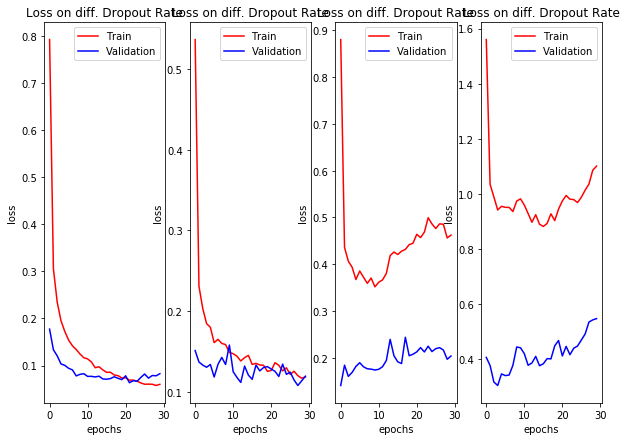

In [64]:
dp_rt=[0.3,0.4,0.5,0.6]
model_dp_rt_5=Sequential()
pt=1
plt.figure(figsize=(10,7))
for i in tqdm(dp_rt):
    model_dp_rt_5.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
    model_dp_rt_5.add(Dropout(0.3))
    model_dp_rt_5.add(BatchNormalization())

    #layer 2
    model_dp_rt_5.add(Dense(256,activation="relu"))
    model_dp_rt_5.add(Dropout(rate=i))
    model_dp_rt_5.add(BatchNormalization())
    #layer 3
    model_dp_rt_5.add(Dense(128,activation="relu"))
    model_dp_rt_5.add(Dropout(rate=i))
    model_dp_rt_5.add(BatchNormalization())

    #layer 4
    model_dp_rt_5.add(Dense(64,activation="relu"))
    model_dp_rt_5.add(Dropout(rate=i))
    model_dp_rt_5.add(BatchNormalization())

    #layer 5
    model_dp_rt_5.add(Dense(32,activation="relu"))
    model_dp_rt_5.add(Dropout(rate=i))
    model_dp_rt_5.add(BatchNormalization())

    #output with softmax
    model_dp_rt_5.add(Dense(output_dim, activation='softmax'))
    #compilation of the model
    model_dp_rt_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history= model_dp_rt_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    #evaluating the model
    score = model_dp_rt_5.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])
    #plotting the of the graph
    plt.subplot(1,4,pt)
    plt.plot(list(range(0,30)),history.history['loss'],color='red')
    plt.plot(list(range(0,30)),history.history['val_loss'],color='blue')
    plt.legend(['Train',"Validation"])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Loss on diff. Dropout Rate")
    pt=pt+1

In [65]:
#creating the model of 5 hidden layer
model_sig_5=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_sig_5.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))

#layer 2
model_sig_5.add(Dense(256,activation="sigmoid"))

#layer 3
model_sig_5.add(Dense(128,activation="sigmoid"))


#layer 4
model_sig_5.add(Dense(64,activation="sigmoid"))


#layer 5
model_sig_5.add(Dense(32,activation="sigmoid"))

#output with softmax
model_sig_5.add(Dense(output_dim, activation='softmax'))

model_sig_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_107 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_108 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_109 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_110 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_111 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_sig_5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
history= model_sig_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


26496/60000 [============>.................] - ETA: 1:28:40 - loss: 2.4947 - acc: 0.11 - ETA: 44:29 - loss: 2.5046 - acc: 0.1133 - ETA: 29:50 - loss: 2.5134 - acc: 0.10 - ETA: 22:30 - loss: 2.5099 - acc: 0.10 - ETA: 18:06 - loss: 2.5305 - acc: 0.10 - ETA: 15:10 - loss: 2.5067 - acc: 0.10 - ETA: 13:04 - loss: 2.4961 - acc: 0.09 - ETA: 11:29 - loss: 2.4949 - acc: 0.09 - ETA: 10:15 - loss: 2.4907 - acc: 0.10 - ETA: 9:16 - loss: 2.4815 - acc: 0.1023 - ETA: 8:28 - loss: 2.4751 - acc: 0.102 - ETA: 7:48 - loss: 2.4721 - acc: 0.102 - ETA: 7:14 - loss: 2.4706 - acc: 0.099 - ETA: 6:44 - loss: 2.4690 - acc: 0.099 - ETA: 6:19 - loss: 2.4641 - acc: 0.100 - ETA: 5:57 - loss: 2.4657 - acc: 0.101 - ETA: 5:37 - loss: 2.4657 - acc: 0.099 - ETA: 5:20 - loss: 2.4627 - acc: 0.098 - ETA: 5:04 - loss: 2.4624 - acc: 0.099 - ETA: 4:50 - loss: 2.4588 - acc: 0.097 - ETA: 4:37 - loss: 2.4532 - acc: 0.095 - ETA: 4:26 - loss: 2.4535 - acc: 0.094 - ETA: 4:16 - loss: 2.4539 - acc: 0.094 - ETA: 4:06 - loss: 2.4515 - a

27520/60000 [============>.................] - ETA: 36s - loss: 2.2941 - acc: 0.14 - ETA: 36s - loss: 2.2992 - acc: 0.09 - ETA: 37s - loss: 2.2999 - acc: 0.09 - ETA: 36s - loss: 2.3005 - acc: 0.09 - ETA: 36s - loss: 2.3019 - acc: 0.09 - ETA: 36s - loss: 2.3010 - acc: 0.09 - ETA: 36s - loss: 2.3006 - acc: 0.10 - ETA: 36s - loss: 2.3003 - acc: 0.10 - ETA: 35s - loss: 2.3006 - acc: 0.10 - ETA: 35s - loss: 2.3008 - acc: 0.10 - ETA: 35s - loss: 2.3004 - acc: 0.10 - ETA: 35s - loss: 2.3003 - acc: 0.10 - ETA: 36s - loss: 2.3002 - acc: 0.10 - ETA: 36s - loss: 2.2996 - acc: 0.10 - ETA: 36s - loss: 2.3001 - acc: 0.10 - ETA: 36s - loss: 2.3003 - acc: 0.10 - ETA: 36s - loss: 2.3007 - acc: 0.10 - ETA: 36s - loss: 2.3005 - acc: 0.10 - ETA: 36s - loss: 2.3004 - acc: 0.10 - ETA: 35s - loss: 2.3004 - acc: 0.10 - ETA: 35s - loss: 2.3006 - acc: 0.10 - ETA: 35s - loss: 2.3009 - acc: 0.10 - ETA: 35s - loss: 2.3008 - acc: 0.10 - ETA: 35s - loss: 2.3009 - acc: 0.10 - ETA: 35s - loss: 2.3007 - acc: 0.10 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 2.3013 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.112 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.111 - ETA: 2s - loss: 2.3014 - acc: 0.112 - ETA: 2s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3013 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3014 - acc: 0.112 - ETA: 1s - loss: 2.3013 - acc: 0.112 - ETA: 1s - loss: 2.3013 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 34s - loss: 2.2936 - acc: 0.17 - ETA: 37s - loss: 2.2998 - acc: 0.14 - ETA: 38s - loss: 2.3010 - acc: 0.13 - ETA: 38s - loss: 2.3003 - acc: 0.12 - ETA: 37s - loss: 2.2997 - acc: 0.12 - ETA: 37s - loss: 2.3004 - acc: 0.12 - ETA: 37s - loss: 2.3001 - acc: 0.12 - ETA: 37s - loss: 2.3001 - acc: 0.12 - ETA: 36s - loss: 2.3014 - acc: 0.12 - ETA: 36s - loss: 2.3012 - acc: 0.12 - ETA: 36s - loss: 2.3012 - acc: 0.12 - ETA: 36s - loss: 2.3008 - acc: 0.12 - ETA: 36s - loss: 2.3002 - acc: 0.12 - ETA: 35s - loss: 2.3000 - acc: 0.12 - ETA: 35s - loss: 2.2997 - acc: 0.12 - ETA: 35s - loss: 2.3000 - acc: 0.12 - ETA: 35s - loss: 2.3003 - acc: 0.12 - ETA: 35s - loss: 2.3002 - acc: 0.12 - ETA: 35s - loss: 2.3008 - acc: 0.12 - ETA: 35s - loss: 2.3006 - acc: 0.12 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA: 35s - loss: 2.3005 - acc: 0.11 - ETA: 35s - loss: 2.3001 - acc: 0.12 - ETA: 35s - loss: 2.3000 - acc: 0.12 - ETA: 35s - loss: 2.3000 - acc: 0.12 - ETA

27520/60000 [============>.................] - ETA: 31s - loss: 2.3006 - acc: 0.15 - ETA: 29s - loss: 2.2986 - acc: 0.13 - ETA: 33s - loss: 2.3014 - acc: 0.12 - ETA: 34s - loss: 2.3014 - acc: 0.11 - ETA: 36s - loss: 2.3021 - acc: 0.11 - ETA: 36s - loss: 2.3016 - acc: 0.11 - ETA: 36s - loss: 2.3013 - acc: 0.11 - ETA: 37s - loss: 2.3025 - acc: 0.11 - ETA: 37s - loss: 2.3021 - acc: 0.11 - ETA: 37s - loss: 2.3025 - acc: 0.11 - ETA: 37s - loss: 2.3012 - acc: 0.11 - ETA: 37s - loss: 2.3010 - acc: 0.11 - ETA: 37s - loss: 2.3007 - acc: 0.11 - ETA: 36s - loss: 2.3007 - acc: 0.11 - ETA: 36s - loss: 2.3007 - acc: 0.11 - ETA: 36s - loss: 2.3005 - acc: 0.11 - ETA: 36s - loss: 2.3001 - acc: 0.11 - ETA: 36s - loss: 2.3000 - acc: 0.11 - ETA: 36s - loss: 2.3005 - acc: 0.11 - ETA: 35s - loss: 2.3008 - acc: 0.10 - ETA: 35s - loss: 2.3005 - acc: 0.11 - ETA: 36s - loss: 2.2999 - acc: 0.11 - ETA: 36s - loss: 2.2999 - acc: 0.11 - ETA: 36s - loss: 2.3000 - acc: 0.11 - ETA: 36s - loss: 2.3003 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3013 - acc: 0.112 - ETA: 3s - loss: 2.3012 - acc: 0.112 - ETA: 2s - loss: 2.3012 - acc: 0.112 - ETA: 2s - loss: 2.3012 - acc: 0.112 - ETA: 2s - loss: 2.3012 - acc: 0.112 - ETA: 2s - loss: 2.3012 - acc: 0.112 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 2s - loss: 2.3012 - acc: 0.112 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 2s - loss: 2.3012 - acc: 0.113 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 2.2976 - acc: 0.14 - ETA: 36s - loss: 2.3056 - acc: 0.10 - ETA: 38s - loss: 2.3055 - acc: 0.11 - ETA: 38s - loss: 2.3045 - acc: 0.11 - ETA: 38s - loss: 2.3033 - acc: 0.11 - ETA: 37s - loss: 2.3025 - acc: 0.12 - ETA: 37s - loss: 2.3024 - acc: 0.11 - ETA: 37s - loss: 2.3030 - acc: 0.11 - ETA: 37s - loss: 2.3029 - acc: 0.11 - ETA: 36s - loss: 2.3034 - acc: 0.11 - ETA: 36s - loss: 2.3036 - acc: 0.11 - ETA: 36s - loss: 2.3042 - acc: 0.10 - ETA: 36s - loss: 2.3035 - acc: 0.11 - ETA: 36s - loss: 2.3037 - acc: 0.11 - ETA: 36s - loss: 2.3034 - acc: 0.11 - ETA: 36s - loss: 2.3035 - acc: 0.10 - ETA: 36s - loss: 2.3039 - acc: 0.10 - ETA: 36s - loss: 2.3036 - acc: 0.10 - ETA: 36s - loss: 2.3033 - acc: 0.10 - ETA: 35s - loss: 2.3029 - acc: 0.10 - ETA: 35s - loss: 2.3029 - acc: 0.10 - ETA: 35s - loss: 2.3029 - acc: 0.10 - ETA: 35s - loss: 2.3026 - acc: 0.11 - ETA: 35s - loss: 2.3025 - acc: 0.11 - ETA: 35s - loss: 2.3023 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 29s - loss: 2.2989 - acc: 0.11 - ETA: 31s - loss: 2.3010 - acc: 0.10 - ETA: 32s - loss: 2.3001 - acc: 0.10 - ETA: 32s - loss: 2.2999 - acc: 0.10 - ETA: 33s - loss: 2.3007 - acc: 0.10 - ETA: 33s - loss: 2.3010 - acc: 0.10 - ETA: 33s - loss: 2.3013 - acc: 0.10 - ETA: 34s - loss: 2.3015 - acc: 0.10 - ETA: 34s - loss: 2.3009 - acc: 0.11 - ETA: 35s - loss: 2.3008 - acc: 0.11 - ETA: 35s - loss: 2.3006 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.3007 - acc: 0.11 - ETA: 35s - loss: 2.3011 - acc: 0.10 - ETA: 35s - loss: 2.3009 - acc: 0.10 - ETA: 35s - loss: 2.3012 - acc: 0.10 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA: 35s - loss: 2.3012 - acc: 0.10 - ETA: 34s - loss: 2.3012 - acc: 0.10 - ETA: 34s - loss: 2.3011 - acc: 0.10 - ETA: 34s - loss: 2.3014 - acc: 0.10 - ETA: 34s - loss: 2.3015 - acc: 0.10 - ETA: 34s - loss: 2.3013 - acc: 0.10 - ETA: 34s - loss: 2.3012 - acc: 0.10 - ETA: 34s - loss: 2.3012 - acc: 0.10 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3012 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 29s - loss: 2.3057 - acc: 0.08 - ETA: 32s - loss: 2.3060 - acc: 0.07 - ETA: 35s - loss: 2.3046 - acc: 0.09 - ETA: 35s - loss: 2.3052 - acc: 0.09 - ETA: 35s - loss: 2.3055 - acc: 0.09 - ETA: 35s - loss: 2.3043 - acc: 0.09 - ETA: 35s - loss: 2.3040 - acc: 0.09 - ETA: 35s - loss: 2.3028 - acc: 0.10 - ETA: 35s - loss: 2.3022 - acc: 0.10 - ETA: 35s - loss: 2.3017 - acc: 0.10 - ETA: 35s - loss: 2.3022 - acc: 0.10 - ETA: 35s - loss: 2.3023 - acc: 0.10 - ETA: 35s - loss: 2.3024 - acc: 0.10 - ETA: 35s - loss: 2.3028 - acc: 0.10 - ETA: 35s - loss: 2.3025 - acc: 0.10 - ETA: 35s - loss: 2.3019 - acc: 0.10 - ETA: 35s - loss: 2.3015 - acc: 0.10 - ETA: 35s - loss: 2.3013 - acc: 0.10 - ETA: 35s - loss: 2.3014 - acc: 0.10 - ETA: 35s - loss: 2.3012 - acc: 0.10 - ETA: 35s - loss: 2.3012 - acc: 0.10 - ETA: 35s - loss: 2.3011 - acc: 0.10 - ETA: 35s - loss: 2.3012 - acc: 0.10 - ETA: 34s - loss: 2.3009 - acc: 0.11 - ETA: 34s - loss: 2.3009 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 29s - loss: 2.3083 - acc: 0.10 - ETA: 31s - loss: 2.3024 - acc: 0.12 - ETA: 33s - loss: 2.3005 - acc: 0.13 - ETA: 33s - loss: 2.2982 - acc: 0.13 - ETA: 34s - loss: 2.2985 - acc: 0.12 - ETA: 35s - loss: 2.2983 - acc: 0.13 - ETA: 36s - loss: 2.2985 - acc: 0.12 - ETA: 36s - loss: 2.2974 - acc: 0.13 - ETA: 36s - loss: 2.2980 - acc: 0.13 - ETA: 36s - loss: 2.2989 - acc: 0.12 - ETA: 36s - loss: 2.2979 - acc: 0.13 - ETA: 36s - loss: 2.2977 - acc: 0.13 - ETA: 36s - loss: 2.2980 - acc: 0.12 - ETA: 36s - loss: 2.2985 - acc: 0.12 - ETA: 35s - loss: 2.2979 - acc: 0.12 - ETA: 35s - loss: 2.2979 - acc: 0.12 - ETA: 35s - loss: 2.2982 - acc: 0.12 - ETA: 35s - loss: 2.2983 - acc: 0.12 - ETA: 35s - loss: 2.2986 - acc: 0.12 - ETA: 35s - loss: 2.2990 - acc: 0.12 - ETA: 35s - loss: 2.2992 - acc: 0.12 - ETA: 35s - loss: 2.2993 - acc: 0.12 - ETA: 35s - loss: 2.2994 - acc: 0.11 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2991 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.111 - ETA: 1s - loss: 2.3011 - acc: 0.111 - ETA: 1s - loss: 2.3011 - acc: 0.111 - ETA: 1s - loss: 2.3011 - acc: 0.111 - ETA: 1s - loss: 2.3011 - acc: 0.111 - ETA: 1s - loss: 2.3011 - acc: 0.111 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3011 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 36s - loss: 2.3080 - acc: 0.09 - ETA: 38s - loss: 2.3026 - acc: 0.11 - ETA: 39s - loss: 2.3019 - acc: 0.10 - ETA: 39s - loss: 2.3004 - acc: 0.10 - ETA: 38s - loss: 2.2992 - acc: 0.11 - ETA: 38s - loss: 2.2992 - acc: 0.11 - ETA: 38s - loss: 2.2997 - acc: 0.11 - ETA: 37s - loss: 2.3000 - acc: 0.11 - ETA: 37s - loss: 2.3001 - acc: 0.11 - ETA: 37s - loss: 2.3005 - acc: 0.10 - ETA: 36s - loss: 2.2999 - acc: 0.11 - ETA: 36s - loss: 2.3002 - acc: 0.11 - ETA: 36s - loss: 2.3003 - acc: 0.10 - ETA: 36s - loss: 2.3001 - acc: 0.11 - ETA: 35s - loss: 2.3000 - acc: 0.11 - ETA: 36s - loss: 2.3009 - acc: 0.10 - ETA: 36s - loss: 2.3007 - acc: 0.11 - ETA: 35s - loss: 2.3006 - acc: 0.11 - ETA: 35s - loss: 2.3006 - acc: 0.11 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA: 35s - loss: 2.3010 - acc: 0.11 - ETA: 35s - loss: 2.3012 - acc: 0.11 - ETA: 35s - loss: 2.3013 - acc: 0.10 - ETA: 35s - loss: 2.3014 - acc: 0.10 - ETA: 35s - loss: 2.3014 - acc: 0.10 - ETA

27520/60000 [============>.................] - ETA: 31s - loss: 2.3031 - acc: 0.13 - ETA: 32s - loss: 2.3016 - acc: 0.12 - ETA: 32s - loss: 2.3012 - acc: 0.11 - ETA: 32s - loss: 2.3003 - acc: 0.11 - ETA: 32s - loss: 2.3004 - acc: 0.10 - ETA: 33s - loss: 2.3014 - acc: 0.10 - ETA: 33s - loss: 2.3015 - acc: 0.10 - ETA: 33s - loss: 2.3021 - acc: 0.10 - ETA: 34s - loss: 2.3020 - acc: 0.10 - ETA: 34s - loss: 2.3018 - acc: 0.10 - ETA: 34s - loss: 2.3017 - acc: 0.10 - ETA: 34s - loss: 2.3023 - acc: 0.10 - ETA: 34s - loss: 2.3020 - acc: 0.10 - ETA: 35s - loss: 2.3020 - acc: 0.10 - ETA: 35s - loss: 2.3021 - acc: 0.10 - ETA: 34s - loss: 2.3022 - acc: 0.10 - ETA: 34s - loss: 2.3022 - acc: 0.10 - ETA: 34s - loss: 2.3021 - acc: 0.10 - ETA: 34s - loss: 2.3018 - acc: 0.10 - ETA: 34s - loss: 2.3019 - acc: 0.10 - ETA: 34s - loss: 2.3017 - acc: 0.11 - ETA: 34s - loss: 2.3016 - acc: 0.11 - ETA: 34s - loss: 2.3017 - acc: 0.11 - ETA: 34s - loss: 2.3019 - acc: 0.11 - ETA: 34s - loss: 2.3018 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3011 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 35s - loss: 2.3041 - acc: 0.11 - ETA: 37s - loss: 2.3088 - acc: 0.08 - ETA: 37s - loss: 2.3037 - acc: 0.09 - ETA: 37s - loss: 2.2999 - acc: 0.11 - ETA: 37s - loss: 2.3004 - acc: 0.11 - ETA: 36s - loss: 2.2998 - acc: 0.11 - ETA: 37s - loss: 2.2989 - acc: 0.11 - ETA: 36s - loss: 2.2992 - acc: 0.11 - ETA: 36s - loss: 2.2991 - acc: 0.11 - ETA: 36s - loss: 2.3001 - acc: 0.11 - ETA: 36s - loss: 2.3003 - acc: 0.11 - ETA: 36s - loss: 2.3000 - acc: 0.11 - ETA: 35s - loss: 2.3001 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.3002 - acc: 0.11 - ETA: 35s - loss: 2.3001 - acc: 0.11 - ETA: 35s - loss: 2.3005 - acc: 0.11 - ETA: 35s - loss: 2.3010 - acc: 0.11 - ETA: 35s - loss: 2.3007 - acc: 0.11 - ETA: 35s - loss: 2.3003 - acc: 0.11 - ETA: 35s - loss: 2.3005 - acc: 0.11 - ETA: 35s - loss: 2.3006 - acc: 0.11 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 2.3048 - acc: 0.07 - ETA: 34s - loss: 2.3006 - acc: 0.11 - ETA: 34s - loss: 2.2996 - acc: 0.11 - ETA: 34s - loss: 2.3005 - acc: 0.10 - ETA: 34s - loss: 2.3005 - acc: 0.11 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA: 35s - loss: 2.3010 - acc: 0.10 - ETA: 36s - loss: 2.3015 - acc: 0.10 - ETA: 36s - loss: 2.3015 - acc: 0.11 - ETA: 35s - loss: 2.3014 - acc: 0.11 - ETA: 35s - loss: 2.3014 - acc: 0.11 - ETA: 35s - loss: 2.3016 - acc: 0.11 - ETA: 35s - loss: 2.3018 - acc: 0.10 - ETA: 35s - loss: 2.3016 - acc: 0.10 - ETA: 35s - loss: 2.3016 - acc: 0.10 - ETA: 35s - loss: 2.3012 - acc: 0.10 - ETA: 35s - loss: 2.3015 - acc: 0.10 - ETA: 35s - loss: 2.3013 - acc: 0.10 - ETA: 34s - loss: 2.3015 - acc: 0.10 - ETA: 34s - loss: 2.3014 - acc: 0.10 - ETA: 34s - loss: 2.3012 - acc: 0.10 - ETA: 34s - loss: 2.3014 - acc: 0.10 - ETA: 34s - loss: 2.3013 - acc: 0.10 - ETA: 34s - loss: 2.3011 - acc: 0.10 - ETA: 34s - loss: 2.3011 - acc: 0.10 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3009 - acc: 0.112 - ETA: 2s - loss: 2.3009 - acc: 0.112 - ETA: 2s - loss: 2.3009 - acc: 0.112 - ETA: 2s - loss: 2.3009 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 2s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3010 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 2.3079 - acc: 0.13 - ETA: 35s - loss: 2.3059 - acc: 0.11 - ETA: 36s - loss: 2.3047 - acc: 0.11 - ETA: 35s - loss: 2.3040 - acc: 0.11 - ETA: 35s - loss: 2.3033 - acc: 0.11 - ETA: 35s - loss: 2.3027 - acc: 0.10 - ETA: 35s - loss: 2.3024 - acc: 0.11 - ETA: 35s - loss: 2.3013 - acc: 0.12 - ETA: 34s - loss: 2.3020 - acc: 0.11 - ETA: 34s - loss: 2.3024 - acc: 0.11 - ETA: 34s - loss: 2.3027 - acc: 0.11 - ETA: 34s - loss: 2.3032 - acc: 0.10 - ETA: 34s - loss: 2.3027 - acc: 0.11 - ETA: 35s - loss: 2.3022 - acc: 0.11 - ETA: 35s - loss: 2.3015 - acc: 0.11 - ETA: 35s - loss: 2.3010 - acc: 0.11 - ETA: 35s - loss: 2.3014 - acc: 0.11 - ETA: 35s - loss: 2.3013 - acc: 0.11 - ETA: 35s - loss: 2.3010 - acc: 0.11 - ETA: 35s - loss: 2.3011 - acc: 0.11 - ETA: 35s - loss: 2.3012 - acc: 0.11 - ETA: 34s - loss: 2.3008 - acc: 0.11 - ETA: 34s - loss: 2.3012 - acc: 0.11 - ETA: 34s - loss: 2.3015 - acc: 0.11 - ETA: 34s - loss: 2.3015 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 31s - loss: 2.3109 - acc: 0.10 - ETA: 32s - loss: 2.3072 - acc: 0.10 - ETA: 32s - loss: 2.3033 - acc: 0.11 - ETA: 33s - loss: 2.3022 - acc: 0.11 - ETA: 34s - loss: 2.3002 - acc: 0.10 - ETA: 35s - loss: 2.3013 - acc: 0.10 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA: 36s - loss: 2.3004 - acc: 0.11 - ETA: 36s - loss: 2.3014 - acc: 0.10 - ETA: 36s - loss: 2.3016 - acc: 0.10 - ETA: 36s - loss: 2.3018 - acc: 0.10 - ETA: 36s - loss: 2.3013 - acc: 0.10 - ETA: 36s - loss: 2.3008 - acc: 0.10 - ETA: 36s - loss: 2.3005 - acc: 0.10 - ETA: 36s - loss: 2.3001 - acc: 0.10 - ETA: 35s - loss: 2.3004 - acc: 0.10 - ETA: 35s - loss: 2.2998 - acc: 0.10 - ETA: 35s - loss: 2.2996 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.3002 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.3005 - acc: 0.11 - ETA: 35s - loss: 2.3004 - acc: 0.11 - ETA: 35s - loss: 2.3002 - acc: 0.11 - ETA: 35s - loss: 2.3004 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 2s - loss: 2.3008 - acc: 0.113 - ETA: 1s - loss: 2.3008 - acc: 0.113 - ETA: 1s - loss: 2.3008 - acc: 0.113 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3008 - acc: 0.113 - ETA: 1s - loss: 2.3008 - acc: 0.112 - ETA: 1s - loss: 2.3008 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3009 - acc: 0.112 - ETA: 1s - loss: 2.3008 - acc: 0.112 - ETA: 1s - loss: 2.3008 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 30s - loss: 2.3100 - acc: 0.08 - ETA: 34s - loss: 2.3030 - acc: 0.10 - ETA: 34s - loss: 2.3005 - acc: 0.13 - ETA: 34s - loss: 2.3000 - acc: 0.13 - ETA: 34s - loss: 2.3008 - acc: 0.11 - ETA: 34s - loss: 2.3007 - acc: 0.11 - ETA: 34s - loss: 2.3015 - acc: 0.11 - ETA: 34s - loss: 2.3010 - acc: 0.11 - ETA: 34s - loss: 2.3010 - acc: 0.11 - ETA: 35s - loss: 2.3003 - acc: 0.11 - ETA: 35s - loss: 2.3000 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2992 - acc: 0.11 - ETA: 35s - loss: 2.2996 - acc: 0.11 - ETA: 35s - loss: 2.3002 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2996 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 2.3058 - acc: 0.07 - ETA: 31s - loss: 2.3029 - acc: 0.08 - ETA: 33s - loss: 2.3000 - acc: 0.10 - ETA: 33s - loss: 2.2997 - acc: 0.11 - ETA: 33s - loss: 2.3000 - acc: 0.10 - ETA: 33s - loss: 2.3010 - acc: 0.10 - ETA: 33s - loss: 2.3021 - acc: 0.10 - ETA: 34s - loss: 2.3018 - acc: 0.10 - ETA: 34s - loss: 2.3024 - acc: 0.10 - ETA: 35s - loss: 2.3025 - acc: 0.10 - ETA: 35s - loss: 2.3024 - acc: 0.10 - ETA: 35s - loss: 2.3027 - acc: 0.10 - ETA: 35s - loss: 2.3022 - acc: 0.10 - ETA: 35s - loss: 2.3021 - acc: 0.10 - ETA: 35s - loss: 2.3023 - acc: 0.10 - ETA: 35s - loss: 2.3025 - acc: 0.10 - ETA: 35s - loss: 2.3027 - acc: 0.10 - ETA: 35s - loss: 2.3028 - acc: 0.10 - ETA: 35s - loss: 2.3029 - acc: 0.10 - ETA: 35s - loss: 2.3027 - acc: 0.10 - ETA: 35s - loss: 2.3029 - acc: 0.10 - ETA: 34s - loss: 2.3026 - acc: 0.10 - ETA: 34s - loss: 2.3024 - acc: 0.10 - ETA: 34s - loss: 2.3024 - acc: 0.10 - ETA: 34s - loss: 2.3021 - acc: 0.10 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 2s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA: 1s - loss: 2.3007 - acc: 0.112 - ETA

27776/60000 [============>.................] - ETA: 29s - loss: 2.2920 - acc: 0.15 - ETA: 24s - loss: 2.2972 - acc: 0.13 - ETA: 25s - loss: 2.2969 - acc: 0.13 - ETA: 26s - loss: 2.2980 - acc: 0.13 - ETA: 28s - loss: 2.2985 - acc: 0.12 - ETA: 28s - loss: 2.2982 - acc: 0.12 - ETA: 28s - loss: 2.2986 - acc: 0.12 - ETA: 29s - loss: 2.2989 - acc: 0.12 - ETA: 29s - loss: 2.2992 - acc: 0.11 - ETA: 29s - loss: 2.2994 - acc: 0.11 - ETA: 31s - loss: 2.2995 - acc: 0.11 - ETA: 31s - loss: 2.2996 - acc: 0.11 - ETA: 32s - loss: 2.2994 - acc: 0.11 - ETA: 33s - loss: 2.2991 - acc: 0.11 - ETA: 33s - loss: 2.2987 - acc: 0.11 - ETA: 34s - loss: 2.2987 - acc: 0.11 - ETA: 34s - loss: 2.2992 - acc: 0.11 - ETA: 34s - loss: 2.2993 - acc: 0.11 - ETA: 34s - loss: 2.2993 - acc: 0.11 - ETA: 35s - loss: 2.2993 - acc: 0.11 - ETA: 35s - loss: 2.2992 - acc: 0.11 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2989 - acc: 0.11 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2985 - acc: 0.11 - ETA

28032/60000 [=============>................] - ETA: 35s - loss: 2.2959 - acc: 0.13 - ETA: 34s - loss: 2.2988 - acc: 0.10 - ETA: 34s - loss: 2.2978 - acc: 0.11 - ETA: 34s - loss: 2.2984 - acc: 0.11 - ETA: 34s - loss: 2.2969 - acc: 0.12 - ETA: 35s - loss: 2.2981 - acc: 0.12 - ETA: 36s - loss: 2.2992 - acc: 0.12 - ETA: 37s - loss: 2.3009 - acc: 0.11 - ETA: 37s - loss: 2.3013 - acc: 0.11 - ETA: 37s - loss: 2.3014 - acc: 0.11 - ETA: 37s - loss: 2.3013 - acc: 0.11 - ETA: 36s - loss: 2.3009 - acc: 0.11 - ETA: 37s - loss: 2.3005 - acc: 0.11 - ETA: 37s - loss: 2.3004 - acc: 0.11 - ETA: 36s - loss: 2.3000 - acc: 0.11 - ETA: 36s - loss: 2.3005 - acc: 0.11 - ETA: 36s - loss: 2.3011 - acc: 0.11 - ETA: 36s - loss: 2.3013 - acc: 0.11 - ETA: 36s - loss: 2.3011 - acc: 0.11 - ETA: 35s - loss: 2.3009 - acc: 0.11 - ETA: 35s - loss: 2.3008 - acc: 0.11 - ETA: 35s - loss: 2.3007 - acc: 0.11 - ETA: 35s - loss: 2.3006 - acc: 0.11 - ETA: 34s - loss: 2.3005 - acc: 0.11 - ETA: 34s - loss: 2.3006 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 2.3006 - acc: 0.112 - ETA: 2s - loss: 2.3006 - acc: 0.112 - ETA: 2s - loss: 2.3006 - acc: 0.112 - ETA: 2s - loss: 2.3006 - acc: 0.112 - ETA: 2s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 1s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA: 0s - loss: 2.3006 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 25s - loss: 2.3053 - acc: 0.10 - ETA: 32s - loss: 2.3022 - acc: 0.10 - ETA: 35s - loss: 2.3022 - acc: 0.11 - ETA: 37s - loss: 2.3022 - acc: 0.11 - ETA: 37s - loss: 2.3006 - acc: 0.12 - ETA: 37s - loss: 2.3005 - acc: 0.11 - ETA: 37s - loss: 2.3006 - acc: 0.11 - ETA: 37s - loss: 2.3015 - acc: 0.10 - ETA: 37s - loss: 2.3012 - acc: 0.10 - ETA: 37s - loss: 2.3012 - acc: 0.11 - ETA: 37s - loss: 2.3020 - acc: 0.11 - ETA: 36s - loss: 2.3018 - acc: 0.11 - ETA: 37s - loss: 2.3017 - acc: 0.11 - ETA: 37s - loss: 2.3017 - acc: 0.11 - ETA: 37s - loss: 2.3022 - acc: 0.11 - ETA: 37s - loss: 2.3023 - acc: 0.10 - ETA: 37s - loss: 2.3019 - acc: 0.11 - ETA: 37s - loss: 2.3016 - acc: 0.11 - ETA: 37s - loss: 2.3017 - acc: 0.11 - ETA: 37s - loss: 2.3016 - acc: 0.11 - ETA: 36s - loss: 2.3013 - acc: 0.11 - ETA: 36s - loss: 2.3015 - acc: 0.11 - ETA: 36s - loss: 2.3014 - acc: 0.11 - ETA: 36s - loss: 2.3016 - acc: 0.11 - ETA: 36s - loss: 2.3018 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 22s - loss: 2.3017 - acc: 0.13 - ETA: 28s - loss: 2.2994 - acc: 0.12 - ETA: 29s - loss: 2.2995 - acc: 0.12 - ETA: 31s - loss: 2.2984 - acc: 0.12 - ETA: 31s - loss: 2.3003 - acc: 0.10 - ETA: 31s - loss: 2.3011 - acc: 0.10 - ETA: 30s - loss: 2.3007 - acc: 0.10 - ETA: 30s - loss: 2.2999 - acc: 0.11 - ETA: 31s - loss: 2.3015 - acc: 0.10 - ETA: 31s - loss: 2.3012 - acc: 0.11 - ETA: 31s - loss: 2.3009 - acc: 0.11 - ETA: 31s - loss: 2.3006 - acc: 0.11 - ETA: 30s - loss: 2.3006 - acc: 0.11 - ETA: 30s - loss: 2.3007 - acc: 0.11 - ETA: 30s - loss: 2.3000 - acc: 0.11 - ETA: 30s - loss: 2.2999 - acc: 0.11 - ETA: 29s - loss: 2.3003 - acc: 0.11 - ETA: 29s - loss: 2.3000 - acc: 0.11 - ETA: 29s - loss: 2.3003 - acc: 0.11 - ETA: 29s - loss: 2.2998 - acc: 0.11 - ETA: 29s - loss: 2.3000 - acc: 0.11 - ETA: 29s - loss: 2.3002 - acc: 0.11 - ETA: 29s - loss: 2.3004 - acc: 0.11 - ETA: 29s - loss: 2.3006 - acc: 0.11 - ETA: 29s - loss: 2.3002 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 2s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 1s - loss: 2.3005 - acc: 0.112 - ETA: 0s - loss: 2.3005 - acc: 0.112 - ETA

27776/60000 [============>.................] - ETA: 20s - loss: 2.3024 - acc: 0.10 - ETA: 25s - loss: 2.3006 - acc: 0.10 - ETA: 27s - loss: 2.3013 - acc: 0.10 - ETA: 29s - loss: 2.3021 - acc: 0.09 - ETA: 29s - loss: 2.3035 - acc: 0.09 - ETA: 29s - loss: 2.3029 - acc: 0.09 - ETA: 29s - loss: 2.3036 - acc: 0.10 - ETA: 29s - loss: 2.3036 - acc: 0.09 - ETA: 29s - loss: 2.3036 - acc: 0.10 - ETA: 29s - loss: 2.3038 - acc: 0.10 - ETA: 29s - loss: 2.3034 - acc: 0.10 - ETA: 29s - loss: 2.3031 - acc: 0.10 - ETA: 28s - loss: 2.3028 - acc: 0.10 - ETA: 27s - loss: 2.3015 - acc: 0.10 - ETA: 27s - loss: 2.3015 - acc: 0.10 - ETA: 27s - loss: 2.3015 - acc: 0.10 - ETA: 28s - loss: 2.3012 - acc: 0.10 - ETA: 28s - loss: 2.3014 - acc: 0.10 - ETA: 28s - loss: 2.3016 - acc: 0.10 - ETA: 28s - loss: 2.3017 - acc: 0.10 - ETA: 28s - loss: 2.3015 - acc: 0.10 - ETA: 28s - loss: 2.3015 - acc: 0.10 - ETA: 28s - loss: 2.3017 - acc: 0.10 - ETA: 28s - loss: 2.3018 - acc: 0.10 - ETA: 28s - loss: 2.3017 - acc: 0.10 - ETA

27520/60000 [============>.................] - ETA: 33s - loss: 2.3067 - acc: 0.06 - ETA: 35s - loss: 2.3044 - acc: 0.08 - ETA: 37s - loss: 2.3007 - acc: 0.10 - ETA: 38s - loss: 2.3010 - acc: 0.09 - ETA: 39s - loss: 2.3006 - acc: 0.10 - ETA: 40s - loss: 2.3013 - acc: 0.10 - ETA: 41s - loss: 2.2994 - acc: 0.10 - ETA: 42s - loss: 2.2998 - acc: 0.10 - ETA: 42s - loss: 2.3005 - acc: 0.10 - ETA: 43s - loss: 2.3006 - acc: 0.10 - ETA: 43s - loss: 2.3007 - acc: 0.10 - ETA: 43s - loss: 2.3012 - acc: 0.10 - ETA: 43s - loss: 2.3013 - acc: 0.10 - ETA: 42s - loss: 2.3010 - acc: 0.10 - ETA: 42s - loss: 2.3012 - acc: 0.10 - ETA: 42s - loss: 2.3014 - acc: 0.10 - ETA: 42s - loss: 2.3011 - acc: 0.10 - ETA: 42s - loss: 2.3014 - acc: 0.10 - ETA: 42s - loss: 2.3017 - acc: 0.10 - ETA: 42s - loss: 2.3019 - acc: 0.10 - ETA: 42s - loss: 2.3018 - acc: 0.10 - ETA: 42s - loss: 2.3016 - acc: 0.10 - ETA: 41s - loss: 2.3020 - acc: 0.10 - ETA: 41s - loss: 2.3020 - acc: 0.10 - ETA: 41s - loss: 2.3024 - acc: 0.10 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3004 - acc: 0.112 - ETA: 3s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA: 1s - loss: 2.3004 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 35s - loss: 2.2993 - acc: 0.10 - ETA: 35s - loss: 2.3018 - acc: 0.10 - ETA: 35s - loss: 2.3004 - acc: 0.11 - ETA: 36s - loss: 2.3004 - acc: 0.10 - ETA: 36s - loss: 2.3010 - acc: 0.10 - ETA: 36s - loss: 2.3021 - acc: 0.10 - ETA: 36s - loss: 2.3030 - acc: 0.10 - ETA: 36s - loss: 2.3029 - acc: 0.10 - ETA: 35s - loss: 2.3023 - acc: 0.11 - ETA: 35s - loss: 2.3026 - acc: 0.10 - ETA: 35s - loss: 2.3027 - acc: 0.10 - ETA: 35s - loss: 2.3021 - acc: 0.10 - ETA: 35s - loss: 2.3015 - acc: 0.10 - ETA: 35s - loss: 2.3016 - acc: 0.10 - ETA: 35s - loss: 2.3015 - acc: 0.10 - ETA: 35s - loss: 2.3017 - acc: 0.10 - ETA: 35s - loss: 2.3014 - acc: 0.10 - ETA: 35s - loss: 2.3016 - acc: 0.10 - ETA: 35s - loss: 2.3018 - acc: 0.10 - ETA: 35s - loss: 2.3018 - acc: 0.10 - ETA: 35s - loss: 2.3020 - acc: 0.10 - ETA: 35s - loss: 2.3019 - acc: 0.10 - ETA: 34s - loss: 2.3018 - acc: 0.10 - ETA: 34s - loss: 2.3018 - acc: 0.10 - ETA: 34s - loss: 2.3017 - acc: 0.10 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 2.3067 - acc: 0.10 - ETA: 33s - loss: 2.2994 - acc: 0.12 - ETA: 34s - loss: 2.2997 - acc: 0.11 - ETA: 34s - loss: 2.2999 - acc: 0.10 - ETA: 34s - loss: 2.2982 - acc: 0.11 - ETA: 34s - loss: 2.2995 - acc: 0.11 - ETA: 34s - loss: 2.3003 - acc: 0.10 - ETA: 34s - loss: 2.3008 - acc: 0.10 - ETA: 34s - loss: 2.3019 - acc: 0.09 - ETA: 35s - loss: 2.3013 - acc: 0.10 - ETA: 35s - loss: 2.3018 - acc: 0.10 - ETA: 35s - loss: 2.3016 - acc: 0.10 - ETA: 35s - loss: 2.3004 - acc: 0.10 - ETA: 35s - loss: 2.3000 - acc: 0.11 - ETA: 35s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2991 - acc: 0.11 - ETA: 35s - loss: 2.2996 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2993 - acc: 0.11 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2991 - acc: 0.11 - ETA: 35s - loss: 2.2992 - acc: 0.11 - ETA: 34s - loss: 2.2991 - acc: 0.11 - ETA: 34s - loss: 2.2988 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 2s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA: 1s - loss: 2.3003 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 30s - loss: 2.2972 - acc: 0.14 - ETA: 32s - loss: 2.2957 - acc: 0.14 - ETA: 33s - loss: 2.2959 - acc: 0.12 - ETA: 33s - loss: 2.2986 - acc: 0.11 - ETA: 34s - loss: 2.3002 - acc: 0.11 - ETA: 34s - loss: 2.3007 - acc: 0.11 - ETA: 35s - loss: 2.3007 - acc: 0.11 - ETA: 36s - loss: 2.2999 - acc: 0.11 - ETA: 36s - loss: 2.2996 - acc: 0.11 - ETA: 36s - loss: 2.2995 - acc: 0.12 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 36s - loss: 2.2994 - acc: 0.11 - ETA: 36s - loss: 2.2995 - acc: 0.11 - ETA: 36s - loss: 2.2999 - acc: 0.11 - ETA: 35s - loss: 2.2994 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2996 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.3000 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.10 - ETA: 35s - loss: 2.2998 - acc: 0.10 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA

27520/60000 [============>.................] - ETA: 27s - loss: 2.2961 - acc: 0.12 - ETA: 31s - loss: 2.2968 - acc: 0.10 - ETA: 32s - loss: 2.2978 - acc: 0.09 - ETA: 34s - loss: 2.2995 - acc: 0.10 - ETA: 35s - loss: 2.2993 - acc: 0.10 - ETA: 36s - loss: 2.2981 - acc: 0.10 - ETA: 36s - loss: 2.2989 - acc: 0.11 - ETA: 36s - loss: 2.2991 - acc: 0.10 - ETA: 36s - loss: 2.2999 - acc: 0.10 - ETA: 36s - loss: 2.3000 - acc: 0.10 - ETA: 36s - loss: 2.3003 - acc: 0.09 - ETA: 36s - loss: 2.3000 - acc: 0.10 - ETA: 36s - loss: 2.3005 - acc: 0.09 - ETA: 36s - loss: 2.3011 - acc: 0.09 - ETA: 36s - loss: 2.3007 - acc: 0.09 - ETA: 35s - loss: 2.3009 - acc: 0.09 - ETA: 35s - loss: 2.3009 - acc: 0.10 - ETA: 35s - loss: 2.3008 - acc: 0.10 - ETA: 35s - loss: 2.3015 - acc: 0.10 - ETA: 35s - loss: 2.3013 - acc: 0.10 - ETA: 35s - loss: 2.3014 - acc: 0.10 - ETA: 35s - loss: 2.3014 - acc: 0.09 - ETA: 35s - loss: 2.3016 - acc: 0.10 - ETA: 35s - loss: 2.3017 - acc: 0.10 - ETA: 35s - loss: 2.3018 - acc: 0.10 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3002 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3002 - acc: 0.112 - ETA: 1s - loss: 2.3002 - acc: 0.112 - ETA: 1s - loss: 2.3002 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3002 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3002 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3002 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 2.3006 - acc: 0.11 - ETA: 33s - loss: 2.3004 - acc: 0.12 - ETA: 34s - loss: 2.3002 - acc: 0.12 - ETA: 35s - loss: 2.2997 - acc: 0.12 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2991 - acc: 0.11 - ETA: 36s - loss: 2.2996 - acc: 0.11 - ETA: 37s - loss: 2.3003 - acc: 0.10 - ETA: 37s - loss: 2.3006 - acc: 0.10 - ETA: 37s - loss: 2.3011 - acc: 0.10 - ETA: 37s - loss: 2.3013 - acc: 0.11 - ETA: 37s - loss: 2.3003 - acc: 0.11 - ETA: 37s - loss: 2.3011 - acc: 0.10 - ETA: 38s - loss: 2.3010 - acc: 0.11 - ETA: 37s - loss: 2.3010 - acc: 0.10 - ETA: 37s - loss: 2.3009 - acc: 0.10 - ETA: 37s - loss: 2.3009 - acc: 0.10 - ETA: 37s - loss: 2.3008 - acc: 0.10 - ETA: 37s - loss: 2.3007 - acc: 0.10 - ETA: 37s - loss: 2.3004 - acc: 0.11 - ETA: 36s - loss: 2.3003 - acc: 0.11 - ETA: 36s - loss: 2.3005 - acc: 0.10 - ETA: 36s - loss: 2.3005 - acc: 0.10 - ETA: 36s - loss: 2.3003 - acc: 0.10 - ETA: 36s - loss: 2.3004 - acc: 0.10 - ETA

27520/60000 [============>.................] - ETA: 30s - loss: 2.3000 - acc: 0.10 - ETA: 34s - loss: 2.3016 - acc: 0.10 - ETA: 36s - loss: 2.3018 - acc: 0.10 - ETA: 37s - loss: 2.3003 - acc: 0.11 - ETA: 38s - loss: 2.2997 - acc: 0.12 - ETA: 37s - loss: 2.2995 - acc: 0.12 - ETA: 37s - loss: 2.2999 - acc: 0.12 - ETA: 37s - loss: 2.3001 - acc: 0.12 - ETA: 37s - loss: 2.3009 - acc: 0.11 - ETA: 37s - loss: 2.3010 - acc: 0.11 - ETA: 37s - loss: 2.3006 - acc: 0.11 - ETA: 36s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2994 - acc: 0.11 - ETA: 35s - loss: 2.2994 - acc: 0.11 - ETA: 35s - loss: 2.2993 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2992 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2998 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2997 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA: 35s - loss: 2.2995 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 2s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.111 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.111 - ETA: 1s - loss: 2.3001 - acc: 0.111 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.111 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.111 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA: 1s - loss: 2.3001 - acc: 0.112 - ETA

27520/60000 [============>.................] - ETA: 32s - loss: 2.2984 - acc: 0.12 - ETA: 33s - loss: 2.2986 - acc: 0.12 - ETA: 34s - loss: 2.2991 - acc: 0.12 - ETA: 35s - loss: 2.3006 - acc: 0.12 - ETA: 36s - loss: 2.3003 - acc: 0.12 - ETA: 36s - loss: 2.2997 - acc: 0.12 - ETA: 36s - loss: 2.3001 - acc: 0.12 - ETA: 37s - loss: 2.3003 - acc: 0.11 - ETA: 37s - loss: 2.3005 - acc: 0.11 - ETA: 37s - loss: 2.3008 - acc: 0.10 - ETA: 37s - loss: 2.3006 - acc: 0.11 - ETA: 37s - loss: 2.3004 - acc: 0.11 - ETA: 37s - loss: 2.3006 - acc: 0.11 - ETA: 37s - loss: 2.3009 - acc: 0.11 - ETA: 36s - loss: 2.3013 - acc: 0.10 - ETA: 36s - loss: 2.3009 - acc: 0.10 - ETA: 36s - loss: 2.3015 - acc: 0.10 - ETA: 36s - loss: 2.3017 - acc: 0.10 - ETA: 36s - loss: 2.3017 - acc: 0.10 - ETA: 36s - loss: 2.3010 - acc: 0.10 - ETA: 36s - loss: 2.3011 - acc: 0.10 - ETA: 36s - loss: 2.3012 - acc: 0.10 - ETA: 36s - loss: 2.3013 - acc: 0.10 - ETA: 36s - loss: 2.3014 - acc: 0.10 - ETA: 36s - loss: 2.3011 - acc: 0.10 - ETA

27520/60000 [============>.................] - ETA: 30s - loss: 2.2979 - acc: 0.13 - ETA: 32s - loss: 2.2981 - acc: 0.13 - ETA: 32s - loss: 2.2954 - acc: 0.13 - ETA: 33s - loss: 2.2955 - acc: 0.12 - ETA: 34s - loss: 2.2966 - acc: 0.12 - ETA: 35s - loss: 2.2975 - acc: 0.11 - ETA: 35s - loss: 2.2978 - acc: 0.11 - ETA: 35s - loss: 2.2988 - acc: 0.11 - ETA: 35s - loss: 2.2982 - acc: 0.11 - ETA: 35s - loss: 2.2985 - acc: 0.11 - ETA: 35s - loss: 2.2987 - acc: 0.11 - ETA: 36s - loss: 2.2990 - acc: 0.11 - ETA: 36s - loss: 2.2993 - acc: 0.11 - ETA: 36s - loss: 2.2991 - acc: 0.11 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2986 - acc: 0.11 - ETA: 35s - loss: 2.2985 - acc: 0.11 - ETA: 35s - loss: 2.2985 - acc: 0.11 - ETA: 35s - loss: 2.2985 - acc: 0.12 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA: 35s - loss: 2.2993 - acc: 0.11 - ETA: 35s - loss: 2.2992 - acc: 0.11 - ETA: 35s - loss: 2.2989 - acc: 0.12 - ETA: 35s - loss: 2.2988 - acc: 0.12 - ETA: 35s - loss: 2.2990 - acc: 0.11 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 2.3000 - acc: 0.112 - ETA: 3s - loss: 2.3000 - acc: 0.112 - ETA: 2s - loss: 2.3000 - acc: 0.112 - ETA: 2s - loss: 2.3000 - acc: 0.112 - ETA: 2s - loss: 2.3000 - acc: 0.112 - ETA: 2s - loss: 2.3000 - acc: 0.112 - ETA: 2s - loss: 2.3000 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 2s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA: 1s - loss: 2.2999 - acc: 0.112 - ETA

Test score: 2.2994944274902345
Test accuracy: 0.1135


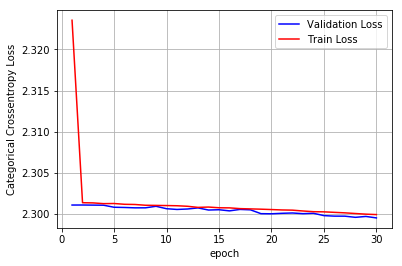

In [69]:
%matplotlib inline
score = model_sig_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [70]:
w_after=model_sig_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

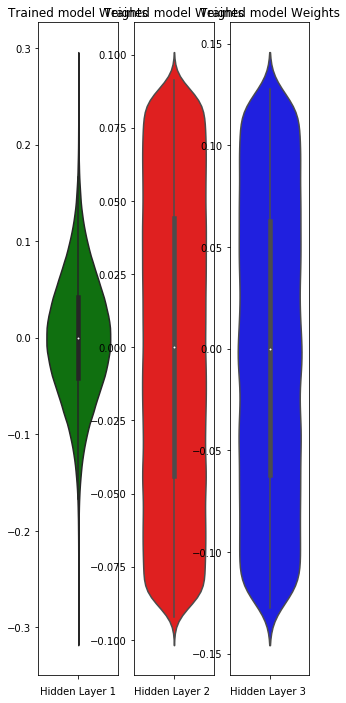

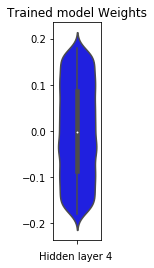

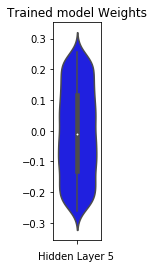

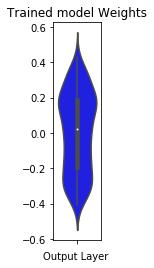

In [71]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 5 layer+sigmoid+BN+dropout+sgd+weight initialization

In [74]:
#creating the model of 5 hidden layer
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_relu_batch_dp.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2
model_relu_batch_dp.add(Dense(256,activation="sigmoid",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3
model_relu_batch_dp.add(Dense(128,activation="sigmoid"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 4
model_relu_batch_dp.add(Dense(64,activation="sigmoid",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 5
model_relu_batch_dp.add(Dense(32,activation="sigmoid"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#output with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

model_relu_batch_dp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_63 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_66 (Batc (None, 512)               2048      
_________________________________________________________________
dense_113 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_64 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_67 (Batc (None, 256)               1024      
_________________________________________________________________
dense_114 (Dense)            (None, 128)               32896     
__________

In [75]:
model_relu_batch_dp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


25984/60000 [===========>..................] - ETA: 1:46:52 - loss: 2.9147 - acc: 0.09 - ETA: 53:55 - loss: 2.9188 - acc: 0.0742 - ETA: 36:14 - loss: 2.9599 - acc: 0.07 - ETA: 27:25 - loss: 2.9655 - acc: 0.07 - ETA: 22:06 - loss: 2.9533 - acc: 0.07 - ETA: 18:33 - loss: 2.9138 - acc: 0.08 - ETA: 16:01 - loss: 2.9323 - acc: 0.08 - ETA: 14:07 - loss: 2.9454 - acc: 0.08 - ETA: 12:39 - loss: 2.9341 - acc: 0.08 - ETA: 11:28 - loss: 2.9230 - acc: 0.08 - ETA: 10:31 - loss: 2.9133 - acc: 0.09 - ETA: 9:42 - loss: 2.9049 - acc: 0.0944 - ETA: 9:01 - loss: 2.8906 - acc: 0.094 - ETA: 8:26 - loss: 2.8866 - acc: 0.092 - ETA: 7:56 - loss: 2.8895 - acc: 0.094 - ETA: 7:29 - loss: 2.8917 - acc: 0.094 - ETA: 7:05 - loss: 2.9034 - acc: 0.092 - ETA: 6:44 - loss: 2.9002 - acc: 0.093 - ETA: 6:26 - loss: 2.8939 - acc: 0.095 - ETA: 6:09 - loss: 2.8876 - acc: 0.096 - ETA: 5:53 - loss: 2.8839 - acc: 0.096 - ETA: 5:40 - loss: 2.8799 - acc: 0.095 - ETA: 5:27 - loss: 2.8728 - acc: 0.097 - ETA: 5:15 - loss: 2.8728 - a

27392/60000 [============>.................] - ETA: 1:10 - loss: 2.5926 - acc: 0.062 - ETA: 1:12 - loss: 2.5340 - acc: 0.105 - ETA: 1:08 - loss: 2.5426 - acc: 0.091 - ETA: 1:08 - loss: 2.5658 - acc: 0.089 - ETA: 1:07 - loss: 2.5663 - acc: 0.101 - ETA: 1:06 - loss: 2.5505 - acc: 0.101 - ETA: 1:06 - loss: 2.5357 - acc: 0.098 - ETA: 1:05 - loss: 2.5301 - acc: 0.101 - ETA: 1:04 - loss: 2.5261 - acc: 0.099 - ETA: 1:04 - loss: 2.5215 - acc: 0.097 - ETA: 1:04 - loss: 2.5115 - acc: 0.098 - ETA: 1:03 - loss: 2.5044 - acc: 0.098 - ETA: 1:03 - loss: 2.5017 - acc: 0.103 - ETA: 1:03 - loss: 2.4983 - acc: 0.103 - ETA: 1:02 - loss: 2.4968 - acc: 0.103 - ETA: 1:01 - loss: 2.4930 - acc: 0.104 - ETA: 1:01 - loss: 2.4850 - acc: 0.104 - ETA: 1:00 - loss: 2.4855 - acc: 0.104 - ETA: 1:00 - loss: 2.4860 - acc: 0.105 - ETA: 1:00 - loss: 2.4826 - acc: 0.107 - ETA: 1:00 - loss: 2.4800 - acc: 0.109 - ETA: 1:00 - loss: 2.4771 - acc: 0.111 - ETA: 1:00 - loss: 2.4756 - acc: 0.111 - ETA: 1:00 - loss: 2.4788 - acc: 0

60000/60000 [==============================] - ETA: 5s - loss: 2.4450 - acc: 0.103 - ETA: 5s - loss: 2.4447 - acc: 0.103 - ETA: 5s - loss: 2.4446 - acc: 0.103 - ETA: 4s - loss: 2.4446 - acc: 0.103 - ETA: 4s - loss: 2.4447 - acc: 0.103 - ETA: 4s - loss: 2.4447 - acc: 0.103 - ETA: 4s - loss: 2.4445 - acc: 0.103 - ETA: 4s - loss: 2.4444 - acc: 0.103 - ETA: 4s - loss: 2.4445 - acc: 0.103 - ETA: 4s - loss: 2.4443 - acc: 0.103 - ETA: 3s - loss: 2.4443 - acc: 0.103 - ETA: 3s - loss: 2.4443 - acc: 0.103 - ETA: 3s - loss: 2.4442 - acc: 0.103 - ETA: 3s - loss: 2.4441 - acc: 0.103 - ETA: 3s - loss: 2.4440 - acc: 0.103 - ETA: 3s - loss: 2.4440 - acc: 0.103 - ETA: 3s - loss: 2.4440 - acc: 0.103 - ETA: 3s - loss: 2.4440 - acc: 0.103 - ETA: 2s - loss: 2.4440 - acc: 0.103 - ETA: 2s - loss: 2.4438 - acc: 0.103 - ETA: 2s - loss: 2.4438 - acc: 0.103 - ETA: 2s - loss: 2.4436 - acc: 0.103 - ETA: 2s - loss: 2.4436 - acc: 0.103 - ETA: 2s - loss: 2.4433 - acc: 0.103 - ETA: 2s - loss: 2.4430 - acc: 0.103 - ETA

27392/60000 [============>.................] - ETA: 1:03 - loss: 2.4084 - acc: 0.117 - ETA: 1:02 - loss: 2.3637 - acc: 0.136 - ETA: 1:03 - loss: 2.3694 - acc: 0.138 - ETA: 1:03 - loss: 2.3560 - acc: 0.136 - ETA: 1:03 - loss: 2.3529 - acc: 0.132 - ETA: 1:03 - loss: 2.3573 - acc: 0.135 - ETA: 1:03 - loss: 2.3550 - acc: 0.133 - ETA: 1:03 - loss: 2.3523 - acc: 0.129 - ETA: 1:03 - loss: 2.3599 - acc: 0.125 - ETA: 1:02 - loss: 2.3589 - acc: 0.124 - ETA: 1:02 - loss: 2.3705 - acc: 0.118 - ETA: 1:01 - loss: 2.3702 - acc: 0.121 - ETA: 1:01 - loss: 2.3660 - acc: 0.122 - ETA: 1:00 - loss: 2.3678 - acc: 0.120 - ETA: 1:00 - loss: 2.3703 - acc: 0.118 - ETA: 1:00 - loss: 2.3685 - acc: 0.118 - ETA: 1:00 - loss: 2.3711 - acc: 0.114 - ETA: 1:00 - loss: 2.3707 - acc: 0.114 - ETA: 1:00 - loss: 2.3723 - acc: 0.114 - ETA: 1:00 - loss: 2.3736 - acc: 0.114 - ETA: 1:00 - loss: 2.3754 - acc: 0.112 - ETA: 1:00 - loss: 2.3733 - acc: 0.115 - ETA: 1:00 - loss: 2.3757 - acc: 0.114 - ETA: 1:00 - loss: 2.3742 - acc: 0

27392/60000 [============>.................] - ETA: 58s - loss: 2.3760 - acc: 0.08 - ETA: 1:01 - loss: 2.3628 - acc: 0.121 - ETA: 1:02 - loss: 2.3812 - acc: 0.099 - ETA: 1:03 - loss: 2.3679 - acc: 0.109 - ETA: 1:02 - loss: 2.3691 - acc: 0.107 - ETA: 1:01 - loss: 2.3588 - acc: 0.113 - ETA: 1:00 - loss: 2.3563 - acc: 0.113 - ETA: 1:00 - loss: 2.3547 - acc: 0.109 - ETA: 59s - loss: 2.3463 - acc: 0.112 - ETA: 59s - loss: 2.3493 - acc: 0.11 - ETA: 58s - loss: 2.3482 - acc: 0.11 - ETA: 59s - loss: 2.3487 - acc: 0.10 - ETA: 59s - loss: 2.3486 - acc: 0.10 - ETA: 59s - loss: 2.3482 - acc: 0.10 - ETA: 59s - loss: 2.3478 - acc: 0.10 - ETA: 59s - loss: 2.3474 - acc: 0.10 - ETA: 59s - loss: 2.3459 - acc: 0.11 - ETA: 59s - loss: 2.3479 - acc: 0.10 - ETA: 59s - loss: 2.3480 - acc: 0.10 - ETA: 59s - loss: 2.3483 - acc: 0.10 - ETA: 59s - loss: 2.3499 - acc: 0.10 - ETA: 59s - loss: 2.3521 - acc: 0.10 - ETA: 59s - loss: 2.3523 - acc: 0.10 - ETA: 59s - loss: 2.3551 - acc: 0.10 - ETA: 58s - loss: 2.3551 - 

60000/60000 [==============================] - ETA: 6s - loss: 2.3360 - acc: 0.107 - ETA: 6s - loss: 2.3360 - acc: 0.107 - ETA: 5s - loss: 2.3359 - acc: 0.107 - ETA: 5s - loss: 2.3358 - acc: 0.107 - ETA: 5s - loss: 2.3359 - acc: 0.107 - ETA: 5s - loss: 2.3358 - acc: 0.107 - ETA: 5s - loss: 2.3358 - acc: 0.107 - ETA: 5s - loss: 2.3357 - acc: 0.107 - ETA: 4s - loss: 2.3357 - acc: 0.107 - ETA: 4s - loss: 2.3357 - acc: 0.107 - ETA: 4s - loss: 2.3355 - acc: 0.107 - ETA: 4s - loss: 2.3355 - acc: 0.108 - ETA: 4s - loss: 2.3353 - acc: 0.108 - ETA: 4s - loss: 2.3353 - acc: 0.108 - ETA: 4s - loss: 2.3353 - acc: 0.108 - ETA: 3s - loss: 2.3353 - acc: 0.108 - ETA: 3s - loss: 2.3352 - acc: 0.108 - ETA: 3s - loss: 2.3352 - acc: 0.108 - ETA: 3s - loss: 2.3352 - acc: 0.108 - ETA: 3s - loss: 2.3352 - acc: 0.108 - ETA: 3s - loss: 2.3351 - acc: 0.108 - ETA: 2s - loss: 2.3351 - acc: 0.108 - ETA: 2s - loss: 2.3350 - acc: 0.108 - ETA: 2s - loss: 2.3350 - acc: 0.108 - ETA: 2s - loss: 2.3350 - acc: 0.108 - ETA

26624/60000 [============>.................] - ETA: 1:15 - loss: 2.2829 - acc: 0.117 - ETA: 1:15 - loss: 2.3019 - acc: 0.121 - ETA: 1:16 - loss: 2.3031 - acc: 0.138 - ETA: 1:15 - loss: 2.3196 - acc: 0.130 - ETA: 1:15 - loss: 2.3310 - acc: 0.117 - ETA: 1:15 - loss: 2.3319 - acc: 0.110 - ETA: 1:15 - loss: 2.3325 - acc: 0.110 - ETA: 1:15 - loss: 2.3362 - acc: 0.106 - ETA: 1:15 - loss: 2.3350 - acc: 0.111 - ETA: 1:15 - loss: 2.3354 - acc: 0.108 - ETA: 1:14 - loss: 2.3353 - acc: 0.110 - ETA: 1:14 - loss: 2.3342 - acc: 0.108 - ETA: 1:14 - loss: 2.3306 - acc: 0.108 - ETA: 1:14 - loss: 2.3288 - acc: 0.108 - ETA: 1:13 - loss: 2.3286 - acc: 0.106 - ETA: 1:13 - loss: 2.3264 - acc: 0.109 - ETA: 1:13 - loss: 2.3249 - acc: 0.112 - ETA: 1:13 - loss: 2.3268 - acc: 0.110 - ETA: 1:13 - loss: 2.3249 - acc: 0.109 - ETA: 1:13 - loss: 2.3249 - acc: 0.109 - ETA: 1:12 - loss: 2.3254 - acc: 0.110 - ETA: 1:12 - loss: 2.3254 - acc: 0.111 - ETA: 1:12 - loss: 2.3265 - acc: 0.110 - ETA: 1:12 - loss: 2.3276 - acc: 0

26752/60000 [============>.................] - ETA: 1:25 - loss: 2.3007 - acc: 0.101 - ETA: 1:21 - loss: 2.3044 - acc: 0.109 - ETA: 1:21 - loss: 2.2948 - acc: 0.109 - ETA: 1:22 - loss: 2.2973 - acc: 0.107 - ETA: 1:23 - loss: 2.2938 - acc: 0.112 - ETA: 1:22 - loss: 2.2986 - acc: 0.112 - ETA: 1:21 - loss: 2.2997 - acc: 0.111 - ETA: 1:20 - loss: 2.2993 - acc: 0.117 - ETA: 1:19 - loss: 2.3014 - acc: 0.112 - ETA: 1:19 - loss: 2.3017 - acc: 0.111 - ETA: 1:18 - loss: 2.3067 - acc: 0.110 - ETA: 1:17 - loss: 2.3072 - acc: 0.111 - ETA: 1:17 - loss: 2.3059 - acc: 0.117 - ETA: 1:16 - loss: 2.3058 - acc: 0.117 - ETA: 1:16 - loss: 2.3089 - acc: 0.115 - ETA: 1:15 - loss: 2.3099 - acc: 0.114 - ETA: 1:15 - loss: 2.3088 - acc: 0.116 - ETA: 1:14 - loss: 2.3088 - acc: 0.115 - ETA: 1:14 - loss: 2.3105 - acc: 0.113 - ETA: 1:14 - loss: 2.3101 - acc: 0.114 - ETA: 1:13 - loss: 2.3097 - acc: 0.114 - ETA: 1:13 - loss: 2.3090 - acc: 0.114 - ETA: 1:13 - loss: 2.3098 - acc: 0.114 - ETA: 1:12 - loss: 2.3079 - acc: 0

60000/60000 [==============================] - ETA: 7s - loss: 2.3057 - acc: 0.117 - ETA: 7s - loss: 2.3057 - acc: 0.116 - ETA: 7s - loss: 2.3057 - acc: 0.116 - ETA: 7s - loss: 2.3057 - acc: 0.117 - ETA: 6s - loss: 2.3057 - acc: 0.117 - ETA: 6s - loss: 2.3057 - acc: 0.117 - ETA: 6s - loss: 2.3056 - acc: 0.117 - ETA: 6s - loss: 2.3056 - acc: 0.117 - ETA: 6s - loss: 2.3056 - acc: 0.117 - ETA: 6s - loss: 2.3056 - acc: 0.117 - ETA: 5s - loss: 2.3056 - acc: 0.117 - ETA: 5s - loss: 2.3056 - acc: 0.117 - ETA: 5s - loss: 2.3056 - acc: 0.117 - ETA: 5s - loss: 2.3056 - acc: 0.117 - ETA: 5s - loss: 2.3056 - acc: 0.117 - ETA: 4s - loss: 2.3056 - acc: 0.117 - ETA: 4s - loss: 2.3056 - acc: 0.117 - ETA: 4s - loss: 2.3055 - acc: 0.117 - ETA: 4s - loss: 2.3055 - acc: 0.117 - ETA: 4s - loss: 2.3056 - acc: 0.117 - ETA: 4s - loss: 2.3056 - acc: 0.117 - ETA: 3s - loss: 2.3056 - acc: 0.117 - ETA: 3s - loss: 2.3056 - acc: 0.117 - ETA: 3s - loss: 2.3056 - acc: 0.117 - ETA: 3s - loss: 2.3056 - acc: 0.117 - ETA

26624/60000 [============>.................] - ETA: 1:20 - loss: 2.3044 - acc: 0.140 - ETA: 1:22 - loss: 2.3232 - acc: 0.125 - ETA: 1:22 - loss: 2.3133 - acc: 0.127 - ETA: 1:22 - loss: 2.3096 - acc: 0.125 - ETA: 1:22 - loss: 2.3075 - acc: 0.120 - ETA: 1:21 - loss: 2.3058 - acc: 0.130 - ETA: 1:21 - loss: 2.2991 - acc: 0.135 - ETA: 1:20 - loss: 2.3002 - acc: 0.136 - ETA: 1:20 - loss: 2.2977 - acc: 0.136 - ETA: 1:20 - loss: 2.2977 - acc: 0.133 - ETA: 1:20 - loss: 2.3000 - acc: 0.131 - ETA: 1:19 - loss: 2.2983 - acc: 0.132 - ETA: 1:19 - loss: 2.2968 - acc: 0.132 - ETA: 1:19 - loss: 2.2982 - acc: 0.131 - ETA: 1:19 - loss: 2.2990 - acc: 0.130 - ETA: 1:19 - loss: 2.2985 - acc: 0.132 - ETA: 1:18 - loss: 2.2978 - acc: 0.133 - ETA: 1:18 - loss: 2.2975 - acc: 0.132 - ETA: 1:17 - loss: 2.2998 - acc: 0.128 - ETA: 1:17 - loss: 2.3003 - acc: 0.127 - ETA: 1:17 - loss: 2.3006 - acc: 0.126 - ETA: 1:17 - loss: 2.3004 - acc: 0.127 - ETA: 1:17 - loss: 2.3016 - acc: 0.127 - ETA: 1:17 - loss: 2.3020 - acc: 0

27264/60000 [============>.................] - ETA: 1:03 - loss: 2.2897 - acc: 0.117 - ETA: 1:00 - loss: 2.2836 - acc: 0.125 - ETA: 1:02 - loss: 2.2843 - acc: 0.109 - ETA: 1:02 - loss: 2.2831 - acc: 0.132 - ETA: 1:02 - loss: 2.2787 - acc: 0.139 - ETA: 1:02 - loss: 2.2755 - acc: 0.145 - ETA: 1:02 - loss: 2.2748 - acc: 0.146 - ETA: 1:01 - loss: 2.2751 - acc: 0.144 - ETA: 1:01 - loss: 2.2777 - acc: 0.142 - ETA: 1:01 - loss: 2.2782 - acc: 0.144 - ETA: 1:01 - loss: 2.2783 - acc: 0.144 - ETA: 1:01 - loss: 2.2789 - acc: 0.145 - ETA: 1:01 - loss: 2.2800 - acc: 0.143 - ETA: 1:01 - loss: 2.2800 - acc: 0.145 - ETA: 1:01 - loss: 2.2812 - acc: 0.143 - ETA: 1:01 - loss: 2.2823 - acc: 0.142 - ETA: 1:00 - loss: 2.2830 - acc: 0.140 - ETA: 1:00 - loss: 2.2852 - acc: 0.137 - ETA: 1:01 - loss: 2.2852 - acc: 0.136 - ETA: 1:00 - loss: 2.2850 - acc: 0.135 - ETA: 1:00 - loss: 2.2846 - acc: 0.137 - ETA: 1:00 - loss: 2.2837 - acc: 0.139 - ETA: 1:00 - loss: 2.2828 - acc: 0.139 - ETA: 1:00 - loss: 2.2829 - acc: 0

60000/60000 [==============================] - ETA: 5s - loss: 2.2862 - acc: 0.134 - ETA: 5s - loss: 2.2862 - acc: 0.134 - ETA: 5s - loss: 2.2863 - acc: 0.134 - ETA: 5s - loss: 2.2863 - acc: 0.134 - ETA: 5s - loss: 2.2863 - acc: 0.133 - ETA: 4s - loss: 2.2863 - acc: 0.133 - ETA: 4s - loss: 2.2862 - acc: 0.134 - ETA: 4s - loss: 2.2862 - acc: 0.134 - ETA: 4s - loss: 2.2861 - acc: 0.134 - ETA: 4s - loss: 2.2862 - acc: 0.134 - ETA: 4s - loss: 2.2862 - acc: 0.134 - ETA: 4s - loss: 2.2861 - acc: 0.133 - ETA: 3s - loss: 2.2861 - acc: 0.133 - ETA: 3s - loss: 2.2860 - acc: 0.133 - ETA: 3s - loss: 2.2860 - acc: 0.133 - ETA: 3s - loss: 2.2860 - acc: 0.134 - ETA: 3s - loss: 2.2860 - acc: 0.134 - ETA: 3s - loss: 2.2860 - acc: 0.134 - ETA: 3s - loss: 2.2860 - acc: 0.133 - ETA: 2s - loss: 2.2860 - acc: 0.134 - ETA: 2s - loss: 2.2860 - acc: 0.134 - ETA: 2s - loss: 2.2859 - acc: 0.134 - ETA: 2s - loss: 2.2858 - acc: 0.134 - ETA: 2s - loss: 2.2858 - acc: 0.134 - ETA: 2s - loss: 2.2857 - acc: 0.134 - ETA

27392/60000 [============>.................] - ETA: 59s - loss: 2.2895 - acc: 0.14 - ETA: 57s - loss: 2.2956 - acc: 0.12 - ETA: 58s - loss: 2.2900 - acc: 0.12 - ETA: 59s - loss: 2.2793 - acc: 0.13 - ETA: 1:00 - loss: 2.2800 - acc: 0.148 - ETA: 1:01 - loss: 2.2821 - acc: 0.140 - ETA: 1:02 - loss: 2.2814 - acc: 0.142 - ETA: 1:02 - loss: 2.2812 - acc: 0.139 - ETA: 1:02 - loss: 2.2816 - acc: 0.139 - ETA: 1:01 - loss: 2.2795 - acc: 0.140 - ETA: 1:01 - loss: 2.2805 - acc: 0.140 - ETA: 1:01 - loss: 2.2812 - acc: 0.143 - ETA: 1:01 - loss: 2.2805 - acc: 0.145 - ETA: 1:01 - loss: 2.2818 - acc: 0.141 - ETA: 1:01 - loss: 2.2806 - acc: 0.144 - ETA: 1:01 - loss: 2.2815 - acc: 0.142 - ETA: 1:01 - loss: 2.2802 - acc: 0.143 - ETA: 1:01 - loss: 2.2794 - acc: 0.146 - ETA: 1:01 - loss: 2.2798 - acc: 0.146 - ETA: 1:00 - loss: 2.2816 - acc: 0.143 - ETA: 1:00 - loss: 2.2807 - acc: 0.144 - ETA: 1:00 - loss: 2.2806 - acc: 0.142 - ETA: 1:00 - loss: 2.2806 - acc: 0.142 - ETA: 1:00 - loss: 2.2806 - acc: 0.142 - E

27136/60000 [============>.................] - ETA: 48s - loss: 2.2379 - acc: 0.14 - ETA: 54s - loss: 2.2570 - acc: 0.10 - ETA: 58s - loss: 2.2576 - acc: 0.11 - ETA: 59s - loss: 2.2589 - acc: 0.12 - ETA: 1:01 - loss: 2.2594 - acc: 0.131 - ETA: 1:01 - loss: 2.2650 - acc: 0.131 - ETA: 1:01 - loss: 2.2607 - acc: 0.135 - ETA: 1:02 - loss: 2.2601 - acc: 0.138 - ETA: 1:02 - loss: 2.2569 - acc: 0.146 - ETA: 1:02 - loss: 2.2590 - acc: 0.144 - ETA: 1:02 - loss: 2.2599 - acc: 0.149 - ETA: 1:02 - loss: 2.2571 - acc: 0.153 - ETA: 1:03 - loss: 2.2541 - acc: 0.152 - ETA: 1:04 - loss: 2.2548 - acc: 0.156 - ETA: 1:03 - loss: 2.2562 - acc: 0.155 - ETA: 1:03 - loss: 2.2566 - acc: 0.154 - ETA: 1:03 - loss: 2.2558 - acc: 0.157 - ETA: 1:03 - loss: 2.2553 - acc: 0.160 - ETA: 1:03 - loss: 2.2546 - acc: 0.163 - ETA: 1:02 - loss: 2.2544 - acc: 0.162 - ETA: 1:02 - loss: 2.2540 - acc: 0.161 - ETA: 1:02 - loss: 2.2544 - acc: 0.161 - ETA: 1:03 - loss: 2.2559 - acc: 0.160 - ETA: 1:03 - loss: 2.2550 - acc: 0.162 - E

60000/60000 [==============================] - ETA: 5s - loss: 2.2258 - acc: 0.172 - ETA: 5s - loss: 2.2257 - acc: 0.172 - ETA: 5s - loss: 2.2257 - acc: 0.172 - ETA: 5s - loss: 2.2256 - acc: 0.172 - ETA: 5s - loss: 2.2254 - acc: 0.172 - ETA: 4s - loss: 2.2253 - acc: 0.172 - ETA: 4s - loss: 2.2252 - acc: 0.172 - ETA: 4s - loss: 2.2250 - acc: 0.173 - ETA: 4s - loss: 2.2250 - acc: 0.173 - ETA: 4s - loss: 2.2248 - acc: 0.173 - ETA: 4s - loss: 2.2246 - acc: 0.173 - ETA: 4s - loss: 2.2245 - acc: 0.173 - ETA: 3s - loss: 2.2245 - acc: 0.173 - ETA: 3s - loss: 2.2244 - acc: 0.173 - ETA: 3s - loss: 2.2243 - acc: 0.173 - ETA: 3s - loss: 2.2241 - acc: 0.173 - ETA: 3s - loss: 2.2240 - acc: 0.173 - ETA: 3s - loss: 2.2239 - acc: 0.173 - ETA: 3s - loss: 2.2237 - acc: 0.173 - ETA: 3s - loss: 2.2236 - acc: 0.173 - ETA: 2s - loss: 2.2237 - acc: 0.173 - ETA: 2s - loss: 2.2236 - acc: 0.173 - ETA: 2s - loss: 2.2235 - acc: 0.173 - ETA: 2s - loss: 2.2233 - acc: 0.174 - ETA: 2s - loss: 2.2232 - acc: 0.174 - ETA

27008/60000 [============>.................] - ETA: 1:07 - loss: 2.1997 - acc: 0.187 - ETA: 1:06 - loss: 2.1927 - acc: 0.168 - ETA: 1:06 - loss: 2.1954 - acc: 0.179 - ETA: 1:08 - loss: 2.1994 - acc: 0.185 - ETA: 1:07 - loss: 2.1869 - acc: 0.187 - ETA: 1:07 - loss: 2.1858 - acc: 0.191 - ETA: 1:06 - loss: 2.1802 - acc: 0.198 - ETA: 1:07 - loss: 2.1705 - acc: 0.207 - ETA: 1:08 - loss: 2.1762 - acc: 0.201 - ETA: 1:09 - loss: 2.1727 - acc: 0.208 - ETA: 1:09 - loss: 2.1722 - acc: 0.206 - ETA: 1:10 - loss: 2.1723 - acc: 0.207 - ETA: 1:09 - loss: 2.1700 - acc: 0.207 - ETA: 1:08 - loss: 2.1679 - acc: 0.207 - ETA: 1:08 - loss: 2.1692 - acc: 0.205 - ETA: 1:08 - loss: 2.1715 - acc: 0.204 - ETA: 1:07 - loss: 2.1732 - acc: 0.203 - ETA: 1:07 - loss: 2.1749 - acc: 0.204 - ETA: 1:07 - loss: 2.1757 - acc: 0.205 - ETA: 1:07 - loss: 2.1758 - acc: 0.204 - ETA: 1:07 - loss: 2.1766 - acc: 0.203 - ETA: 1:07 - loss: 2.1773 - acc: 0.203 - ETA: 1:07 - loss: 2.1753 - acc: 0.202 - ETA: 1:06 - loss: 2.1758 - acc: 0

27392/60000 [============>.................] - ETA: 54s - loss: 1.9976 - acc: 0.27 - ETA: 57s - loss: 2.0032 - acc: 0.26 - ETA: 57s - loss: 2.0369 - acc: 0.24 - ETA: 56s - loss: 2.0417 - acc: 0.25 - ETA: 57s - loss: 2.0516 - acc: 0.25 - ETA: 57s - loss: 2.0450 - acc: 0.26 - ETA: 59s - loss: 2.0480 - acc: 0.25 - ETA: 1:00 - loss: 2.0541 - acc: 0.252 - ETA: 59s - loss: 2.0504 - acc: 0.252 - ETA: 1:00 - loss: 2.0493 - acc: 0.252 - ETA: 1:00 - loss: 2.0511 - acc: 0.252 - ETA: 1:00 - loss: 2.0474 - acc: 0.251 - ETA: 1:00 - loss: 2.0500 - acc: 0.250 - ETA: 1:00 - loss: 2.0477 - acc: 0.248 - ETA: 1:00 - loss: 2.0500 - acc: 0.243 - ETA: 1:00 - loss: 2.0478 - acc: 0.245 - ETA: 1:00 - loss: 2.0479 - acc: 0.244 - ETA: 1:00 - loss: 2.0480 - acc: 0.245 - ETA: 1:00 - loss: 2.0472 - acc: 0.245 - ETA: 1:00 - loss: 2.0485 - acc: 0.244 - ETA: 1:00 - loss: 2.0474 - acc: 0.246 - ETA: 1:00 - loss: 2.0459 - acc: 0.246 - ETA: 1:00 - loss: 2.0440 - acc: 0.247 - ETA: 1:00 - loss: 2.0407 - acc: 0.249 - ETA: 1:0

60000/60000 [==============================] - ETA: 5s - loss: 1.9814 - acc: 0.266 - ETA: 5s - loss: 1.9812 - acc: 0.266 - ETA: 5s - loss: 1.9809 - acc: 0.266 - ETA: 4s - loss: 1.9806 - acc: 0.266 - ETA: 4s - loss: 1.9805 - acc: 0.266 - ETA: 4s - loss: 1.9803 - acc: 0.266 - ETA: 4s - loss: 1.9801 - acc: 0.266 - ETA: 4s - loss: 1.9800 - acc: 0.266 - ETA: 4s - loss: 1.9799 - acc: 0.266 - ETA: 4s - loss: 1.9799 - acc: 0.266 - ETA: 3s - loss: 1.9797 - acc: 0.267 - ETA: 3s - loss: 1.9797 - acc: 0.267 - ETA: 3s - loss: 1.9797 - acc: 0.266 - ETA: 3s - loss: 1.9797 - acc: 0.266 - ETA: 3s - loss: 1.9796 - acc: 0.266 - ETA: 3s - loss: 1.9794 - acc: 0.267 - ETA: 3s - loss: 1.9792 - acc: 0.267 - ETA: 2s - loss: 1.9792 - acc: 0.267 - ETA: 2s - loss: 1.9793 - acc: 0.266 - ETA: 2s - loss: 1.9791 - acc: 0.267 - ETA: 2s - loss: 1.9789 - acc: 0.267 - ETA: 2s - loss: 1.9787 - acc: 0.267 - ETA: 2s - loss: 1.9787 - acc: 0.267 - ETA: 2s - loss: 1.9786 - acc: 0.267 - ETA: 2s - loss: 1.9786 - acc: 0.267 - ETA

27264/60000 [============>.................] - ETA: 1:03 - loss: 1.9426 - acc: 0.273 - ETA: 1:04 - loss: 1.9286 - acc: 0.273 - ETA: 1:05 - loss: 1.9126 - acc: 0.286 - ETA: 1:06 - loss: 1.9080 - acc: 0.296 - ETA: 1:05 - loss: 1.8961 - acc: 0.295 - ETA: 1:05 - loss: 1.8938 - acc: 0.290 - ETA: 1:05 - loss: 1.8943 - acc: 0.295 - ETA: 1:05 - loss: 1.9004 - acc: 0.294 - ETA: 1:04 - loss: 1.8928 - acc: 0.300 - ETA: 1:04 - loss: 1.8921 - acc: 0.307 - ETA: 1:04 - loss: 1.9026 - acc: 0.305 - ETA: 1:04 - loss: 1.8961 - acc: 0.309 - ETA: 1:04 - loss: 1.8950 - acc: 0.310 - ETA: 1:04 - loss: 1.8965 - acc: 0.310 - ETA: 1:03 - loss: 1.8938 - acc: 0.309 - ETA: 1:03 - loss: 1.8930 - acc: 0.308 - ETA: 1:03 - loss: 1.8946 - acc: 0.308 - ETA: 1:02 - loss: 1.8974 - acc: 0.307 - ETA: 1:02 - loss: 1.8951 - acc: 0.308 - ETA: 1:02 - loss: 1.8965 - acc: 0.305 - ETA: 1:02 - loss: 1.8991 - acc: 0.306 - ETA: 1:02 - loss: 1.8989 - acc: 0.307 - ETA: 1:02 - loss: 1.8939 - acc: 0.310 - ETA: 1:02 - loss: 1.8923 - acc: 0

27264/60000 [============>.................] - ETA: 1:01 - loss: 1.7859 - acc: 0.375 - ETA: 1:03 - loss: 1.7922 - acc: 0.339 - ETA: 1:04 - loss: 1.8002 - acc: 0.341 - ETA: 1:04 - loss: 1.7696 - acc: 0.339 - ETA: 1:03 - loss: 1.7737 - acc: 0.323 - ETA: 1:04 - loss: 1.7578 - acc: 0.342 - ETA: 1:03 - loss: 1.7544 - acc: 0.358 - ETA: 1:03 - loss: 1.7634 - acc: 0.348 - ETA: 1:04 - loss: 1.7787 - acc: 0.341 - ETA: 1:03 - loss: 1.7745 - acc: 0.343 - ETA: 1:03 - loss: 1.7659 - acc: 0.347 - ETA: 1:03 - loss: 1.7748 - acc: 0.345 - ETA: 1:02 - loss: 1.7824 - acc: 0.346 - ETA: 1:02 - loss: 1.7794 - acc: 0.348 - ETA: 1:01 - loss: 1.7857 - acc: 0.344 - ETA: 1:01 - loss: 1.7888 - acc: 0.345 - ETA: 1:01 - loss: 1.7874 - acc: 0.343 - ETA: 1:01 - loss: 1.7852 - acc: 0.343 - ETA: 1:01 - loss: 1.7840 - acc: 0.342 - ETA: 1:01 - loss: 1.7807 - acc: 0.346 - ETA: 1:01 - loss: 1.7803 - acc: 0.345 - ETA: 1:01 - loss: 1.7786 - acc: 0.345 - ETA: 1:01 - loss: 1.7769 - acc: 0.346 - ETA: 1:00 - loss: 1.7800 - acc: 0

60000/60000 [==============================] - ETA: 5s - loss: 1.7545 - acc: 0.344 - ETA: 5s - loss: 1.7547 - acc: 0.344 - ETA: 5s - loss: 1.7545 - acc: 0.344 - ETA: 5s - loss: 1.7544 - acc: 0.344 - ETA: 4s - loss: 1.7542 - acc: 0.344 - ETA: 4s - loss: 1.7542 - acc: 0.344 - ETA: 4s - loss: 1.7540 - acc: 0.344 - ETA: 4s - loss: 1.7537 - acc: 0.345 - ETA: 4s - loss: 1.7538 - acc: 0.344 - ETA: 4s - loss: 1.7537 - acc: 0.344 - ETA: 4s - loss: 1.7536 - acc: 0.345 - ETA: 4s - loss: 1.7536 - acc: 0.345 - ETA: 3s - loss: 1.7536 - acc: 0.345 - ETA: 3s - loss: 1.7537 - acc: 0.345 - ETA: 3s - loss: 1.7538 - acc: 0.345 - ETA: 3s - loss: 1.7539 - acc: 0.344 - ETA: 3s - loss: 1.7539 - acc: 0.344 - ETA: 3s - loss: 1.7537 - acc: 0.344 - ETA: 3s - loss: 1.7538 - acc: 0.344 - ETA: 2s - loss: 1.7538 - acc: 0.344 - ETA: 2s - loss: 1.7538 - acc: 0.344 - ETA: 2s - loss: 1.7537 - acc: 0.344 - ETA: 2s - loss: 1.7539 - acc: 0.344 - ETA: 2s - loss: 1.7539 - acc: 0.344 - ETA: 2s - loss: 1.7537 - acc: 0.344 - ETA

27008/60000 [============>.................] - ETA: 1:01 - loss: 1.7558 - acc: 0.382 - ETA: 1:04 - loss: 1.7340 - acc: 0.390 - ETA: 1:08 - loss: 1.7235 - acc: 0.390 - ETA: 1:09 - loss: 1.7061 - acc: 0.392 - ETA: 1:09 - loss: 1.6858 - acc: 0.401 - ETA: 1:08 - loss: 1.7062 - acc: 0.398 - ETA: 1:07 - loss: 1.7030 - acc: 0.398 - ETA: 1:07 - loss: 1.6927 - acc: 0.405 - ETA: 1:06 - loss: 1.6999 - acc: 0.395 - ETA: 1:07 - loss: 1.7020 - acc: 0.391 - ETA: 1:07 - loss: 1.7156 - acc: 0.389 - ETA: 1:08 - loss: 1.7150 - acc: 0.386 - ETA: 1:07 - loss: 1.7093 - acc: 0.384 - ETA: 1:07 - loss: 1.7126 - acc: 0.382 - ETA: 1:06 - loss: 1.7160 - acc: 0.377 - ETA: 1:06 - loss: 1.7107 - acc: 0.375 - ETA: 1:06 - loss: 1.7165 - acc: 0.371 - ETA: 1:05 - loss: 1.7096 - acc: 0.374 - ETA: 1:05 - loss: 1.7135 - acc: 0.371 - ETA: 1:05 - loss: 1.7160 - acc: 0.371 - ETA: 1:05 - loss: 1.7138 - acc: 0.371 - ETA: 1:05 - loss: 1.7144 - acc: 0.370 - ETA: 1:05 - loss: 1.7162 - acc: 0.367 - ETA: 1:05 - loss: 1.7129 - acc: 0

27264/60000 [============>.................] - ETA: 55s - loss: 1.6604 - acc: 0.42 - ETA: 59s - loss: 1.6201 - acc: 0.41 - ETA: 58s - loss: 1.6267 - acc: 0.39 - ETA: 59s - loss: 1.6244 - acc: 0.38 - ETA: 1:00 - loss: 1.6115 - acc: 0.389 - ETA: 1:02 - loss: 1.6041 - acc: 0.388 - ETA: 1:03 - loss: 1.6104 - acc: 0.376 - ETA: 1:03 - loss: 1.6050 - acc: 0.381 - ETA: 1:02 - loss: 1.5906 - acc: 0.393 - ETA: 1:02 - loss: 1.5998 - acc: 0.392 - ETA: 1:02 - loss: 1.5985 - acc: 0.395 - ETA: 1:02 - loss: 1.5991 - acc: 0.405 - ETA: 1:01 - loss: 1.5991 - acc: 0.403 - ETA: 1:02 - loss: 1.6027 - acc: 0.404 - ETA: 1:02 - loss: 1.6000 - acc: 0.405 - ETA: 1:02 - loss: 1.5940 - acc: 0.405 - ETA: 1:02 - loss: 1.6002 - acc: 0.400 - ETA: 1:02 - loss: 1.6048 - acc: 0.398 - ETA: 1:02 - loss: 1.6103 - acc: 0.397 - ETA: 1:02 - loss: 1.6064 - acc: 0.398 - ETA: 1:02 - loss: 1.6067 - acc: 0.396 - ETA: 1:01 - loss: 1.6104 - acc: 0.396 - ETA: 1:01 - loss: 1.6106 - acc: 0.398 - ETA: 1:01 - loss: 1.6139 - acc: 0.400 - E

60000/60000 [==============================] - ETA: 5s - loss: 1.6251 - acc: 0.390 - ETA: 5s - loss: 1.6249 - acc: 0.390 - ETA: 5s - loss: 1.6250 - acc: 0.390 - ETA: 5s - loss: 1.6250 - acc: 0.390 - ETA: 4s - loss: 1.6251 - acc: 0.390 - ETA: 4s - loss: 1.6250 - acc: 0.390 - ETA: 4s - loss: 1.6249 - acc: 0.390 - ETA: 4s - loss: 1.6250 - acc: 0.390 - ETA: 4s - loss: 1.6250 - acc: 0.390 - ETA: 4s - loss: 1.6251 - acc: 0.390 - ETA: 4s - loss: 1.6249 - acc: 0.390 - ETA: 3s - loss: 1.6245 - acc: 0.390 - ETA: 3s - loss: 1.6244 - acc: 0.390 - ETA: 3s - loss: 1.6242 - acc: 0.390 - ETA: 3s - loss: 1.6241 - acc: 0.390 - ETA: 3s - loss: 1.6240 - acc: 0.390 - ETA: 3s - loss: 1.6238 - acc: 0.390 - ETA: 3s - loss: 1.6237 - acc: 0.390 - ETA: 3s - loss: 1.6237 - acc: 0.390 - ETA: 2s - loss: 1.6239 - acc: 0.390 - ETA: 2s - loss: 1.6237 - acc: 0.390 - ETA: 2s - loss: 1.6236 - acc: 0.390 - ETA: 2s - loss: 1.6234 - acc: 0.390 - ETA: 2s - loss: 1.6236 - acc: 0.390 - ETA: 2s - loss: 1.6234 - acc: 0.390 - ETA

27392/60000 [============>.................] - ETA: 57s - loss: 1.6758 - acc: 0.32 - ETA: 1:00 - loss: 1.6064 - acc: 0.386 - ETA: 59s - loss: 1.6472 - acc: 0.359 - ETA: 59s - loss: 1.6322 - acc: 0.37 - ETA: 59s - loss: 1.6371 - acc: 0.37 - ETA: 1:00 - loss: 1.6328 - acc: 0.376 - ETA: 1:00 - loss: 1.6108 - acc: 0.390 - ETA: 1:01 - loss: 1.6115 - acc: 0.390 - ETA: 1:01 - loss: 1.6154 - acc: 0.393 - ETA: 1:01 - loss: 1.6151 - acc: 0.395 - ETA: 1:00 - loss: 1.6030 - acc: 0.399 - ETA: 1:00 - loss: 1.6192 - acc: 0.388 - ETA: 1:00 - loss: 1.6237 - acc: 0.389 - ETA: 1:00 - loss: 1.6206 - acc: 0.390 - ETA: 1:00 - loss: 1.6170 - acc: 0.391 - ETA: 1:00 - loss: 1.6176 - acc: 0.386 - ETA: 1:00 - loss: 1.6164 - acc: 0.386 - ETA: 1:00 - loss: 1.6130 - acc: 0.388 - ETA: 1:00 - loss: 1.6093 - acc: 0.387 - ETA: 1:00 - loss: 1.6081 - acc: 0.389 - ETA: 1:00 - loss: 1.6083 - acc: 0.389 - ETA: 59s - loss: 1.6000 - acc: 0.396 - ETA: 59s - loss: 1.6029 - acc: 0.39 - ETA: 59s - loss: 1.6023 - acc: 0.39 - ETA: 

27392/60000 [============>.................] - ETA: 57s - loss: 1.5489 - acc: 0.39 - ETA: 58s - loss: 1.5658 - acc: 0.41 - ETA: 59s - loss: 1.6104 - acc: 0.38 - ETA: 59s - loss: 1.5718 - acc: 0.39 - ETA: 59s - loss: 1.5626 - acc: 0.40 - ETA: 1:00 - loss: 1.5691 - acc: 0.415 - ETA: 1:02 - loss: 1.5534 - acc: 0.427 - ETA: 1:03 - loss: 1.5707 - acc: 0.415 - ETA: 1:02 - loss: 1.5676 - acc: 0.414 - ETA: 1:02 - loss: 1.5530 - acc: 0.419 - ETA: 1:02 - loss: 1.5555 - acc: 0.419 - ETA: 1:02 - loss: 1.5584 - acc: 0.421 - ETA: 1:02 - loss: 1.5603 - acc: 0.415 - ETA: 1:02 - loss: 1.5655 - acc: 0.411 - ETA: 1:02 - loss: 1.5654 - acc: 0.407 - ETA: 1:02 - loss: 1.5719 - acc: 0.409 - ETA: 1:01 - loss: 1.5794 - acc: 0.408 - ETA: 1:01 - loss: 1.5760 - acc: 0.409 - ETA: 1:01 - loss: 1.5729 - acc: 0.412 - ETA: 1:01 - loss: 1.5693 - acc: 0.413 - ETA: 1:01 - loss: 1.5646 - acc: 0.414 - ETA: 1:00 - loss: 1.5679 - acc: 0.413 - ETA: 1:00 - loss: 1.5659 - acc: 0.414 - ETA: 1:00 - loss: 1.5653 - acc: 0.414 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 1.5580 - acc: 0.412 - ETA: 5s - loss: 1.5579 - acc: 0.412 - ETA: 5s - loss: 1.5578 - acc: 0.412 - ETA: 4s - loss: 1.5575 - acc: 0.412 - ETA: 4s - loss: 1.5575 - acc: 0.412 - ETA: 4s - loss: 1.5574 - acc: 0.412 - ETA: 4s - loss: 1.5573 - acc: 0.412 - ETA: 4s - loss: 1.5575 - acc: 0.412 - ETA: 4s - loss: 1.5575 - acc: 0.412 - ETA: 4s - loss: 1.5577 - acc: 0.412 - ETA: 3s - loss: 1.5578 - acc: 0.412 - ETA: 3s - loss: 1.5577 - acc: 0.412 - ETA: 3s - loss: 1.5575 - acc: 0.412 - ETA: 3s - loss: 1.5575 - acc: 0.412 - ETA: 3s - loss: 1.5578 - acc: 0.412 - ETA: 3s - loss: 1.5579 - acc: 0.412 - ETA: 3s - loss: 1.5580 - acc: 0.412 - ETA: 3s - loss: 1.5578 - acc: 0.412 - ETA: 2s - loss: 1.5577 - acc: 0.412 - ETA: 2s - loss: 1.5575 - acc: 0.412 - ETA: 2s - loss: 1.5575 - acc: 0.412 - ETA: 2s - loss: 1.5575 - acc: 0.412 - ETA: 2s - loss: 1.5572 - acc: 0.412 - ETA: 2s - loss: 1.5572 - acc: 0.412 - ETA: 2s - loss: 1.5573 - acc: 0.412 - ETA

27392/60000 [============>.................] - ETA: 55s - loss: 1.4984 - acc: 0.43 - ETA: 57s - loss: 1.5833 - acc: 0.44 - ETA: 55s - loss: 1.5849 - acc: 0.41 - ETA: 57s - loss: 1.5553 - acc: 0.42 - ETA: 59s - loss: 1.5306 - acc: 0.41 - ETA: 1:00 - loss: 1.5020 - acc: 0.419 - ETA: 1:00 - loss: 1.5138 - acc: 0.412 - ETA: 1:00 - loss: 1.5095 - acc: 0.414 - ETA: 1:00 - loss: 1.5174 - acc: 0.411 - ETA: 1:00 - loss: 1.5122 - acc: 0.411 - ETA: 1:01 - loss: 1.5039 - acc: 0.417 - ETA: 1:01 - loss: 1.5053 - acc: 0.424 - ETA: 1:00 - loss: 1.5043 - acc: 0.423 - ETA: 1:00 - loss: 1.5078 - acc: 0.418 - ETA: 1:00 - loss: 1.5086 - acc: 0.419 - ETA: 1:01 - loss: 1.5114 - acc: 0.422 - ETA: 1:01 - loss: 1.5092 - acc: 0.423 - ETA: 1:00 - loss: 1.5116 - acc: 0.423 - ETA: 1:00 - loss: 1.5082 - acc: 0.424 - ETA: 1:00 - loss: 1.5119 - acc: 0.421 - ETA: 59s - loss: 1.5065 - acc: 0.424 - ETA: 59s - loss: 1.5063 - acc: 0.42 - ETA: 59s - loss: 1.5092 - acc: 0.42 - ETA: 59s - loss: 1.5092 - acc: 0.42 - ETA: 59s -

27520/60000 [============>.................] - ETA: 57s - loss: 1.5626 - acc: 0.39 - ETA: 57s - loss: 1.5518 - acc: 0.38 - ETA: 56s - loss: 1.4857 - acc: 0.38 - ETA: 55s - loss: 1.4709 - acc: 0.40 - ETA: 54s - loss: 1.4776 - acc: 0.39 - ETA: 56s - loss: 1.4817 - acc: 0.39 - ETA: 57s - loss: 1.4890 - acc: 0.40 - ETA: 58s - loss: 1.5015 - acc: 0.39 - ETA: 58s - loss: 1.4912 - acc: 0.40 - ETA: 59s - loss: 1.4916 - acc: 0.40 - ETA: 59s - loss: 1.5019 - acc: 0.40 - ETA: 59s - loss: 1.5034 - acc: 0.40 - ETA: 59s - loss: 1.5013 - acc: 0.40 - ETA: 59s - loss: 1.5027 - acc: 0.40 - ETA: 59s - loss: 1.4959 - acc: 0.40 - ETA: 1:00 - loss: 1.5009 - acc: 0.410 - ETA: 59s - loss: 1.4955 - acc: 0.414 - ETA: 1:00 - loss: 1.4949 - acc: 0.415 - ETA: 1:00 - loss: 1.4945 - acc: 0.417 - ETA: 59s - loss: 1.5041 - acc: 0.412 - ETA: 59s - loss: 1.5006 - acc: 0.41 - ETA: 59s - loss: 1.4986 - acc: 0.41 - ETA: 58s - loss: 1.5004 - acc: 0.41 - ETA: 58s - loss: 1.5045 - acc: 0.41 - ETA: 58s - loss: 1.5106 - acc: 0.

60000/60000 [==============================] - ETA: 5s - loss: 1.5069 - acc: 0.431 - ETA: 5s - loss: 1.5069 - acc: 0.431 - ETA: 4s - loss: 1.5065 - acc: 0.431 - ETA: 4s - loss: 1.5069 - acc: 0.431 - ETA: 4s - loss: 1.5072 - acc: 0.431 - ETA: 4s - loss: 1.5072 - acc: 0.431 - ETA: 4s - loss: 1.5071 - acc: 0.431 - ETA: 4s - loss: 1.5071 - acc: 0.431 - ETA: 4s - loss: 1.5070 - acc: 0.431 - ETA: 4s - loss: 1.5068 - acc: 0.431 - ETA: 3s - loss: 1.5068 - acc: 0.431 - ETA: 3s - loss: 1.5068 - acc: 0.431 - ETA: 3s - loss: 1.5066 - acc: 0.432 - ETA: 3s - loss: 1.5063 - acc: 0.432 - ETA: 3s - loss: 1.5063 - acc: 0.431 - ETA: 3s - loss: 1.5061 - acc: 0.432 - ETA: 3s - loss: 1.5060 - acc: 0.432 - ETA: 2s - loss: 1.5058 - acc: 0.432 - ETA: 2s - loss: 1.5056 - acc: 0.432 - ETA: 2s - loss: 1.5058 - acc: 0.431 - ETA: 2s - loss: 1.5056 - acc: 0.432 - ETA: 2s - loss: 1.5054 - acc: 0.432 - ETA: 2s - loss: 1.5053 - acc: 0.432 - ETA: 2s - loss: 1.5055 - acc: 0.432 - ETA: 1s - loss: 1.5055 - acc: 0.432 - ETA

27264/60000 [============>.................] - ETA: 56s - loss: 1.4653 - acc: 0.46 - ETA: 1:02 - loss: 1.4495 - acc: 0.449 - ETA: 1:03 - loss: 1.4753 - acc: 0.429 - ETA: 1:04 - loss: 1.4862 - acc: 0.431 - ETA: 1:06 - loss: 1.4958 - acc: 0.434 - ETA: 1:06 - loss: 1.5035 - acc: 0.433 - ETA: 1:05 - loss: 1.5082 - acc: 0.430 - ETA: 1:06 - loss: 1.4955 - acc: 0.443 - ETA: 1:05 - loss: 1.4871 - acc: 0.449 - ETA: 1:05 - loss: 1.5062 - acc: 0.439 - ETA: 1:05 - loss: 1.4955 - acc: 0.442 - ETA: 1:05 - loss: 1.5018 - acc: 0.438 - ETA: 1:05 - loss: 1.5075 - acc: 0.441 - ETA: 1:05 - loss: 1.5025 - acc: 0.443 - ETA: 1:05 - loss: 1.5074 - acc: 0.442 - ETA: 1:05 - loss: 1.4977 - acc: 0.444 - ETA: 1:04 - loss: 1.5014 - acc: 0.440 - ETA: 1:04 - loss: 1.4983 - acc: 0.444 - ETA: 1:04 - loss: 1.5007 - acc: 0.442 - ETA: 1:04 - loss: 1.5030 - acc: 0.443 - ETA: 1:03 - loss: 1.5013 - acc: 0.443 - ETA: 1:03 - loss: 1.5045 - acc: 0.443 - ETA: 1:03 - loss: 1.5029 - acc: 0.444 - ETA: 1:03 - loss: 1.5000 - acc: 0.4

27264/60000 [============>.................] - ETA: 1:02 - loss: 1.4489 - acc: 0.421 - ETA: 1:01 - loss: 1.4422 - acc: 0.429 - ETA: 1:03 - loss: 1.4496 - acc: 0.450 - ETA: 1:03 - loss: 1.4363 - acc: 0.449 - ETA: 1:03 - loss: 1.4259 - acc: 0.453 - ETA: 1:03 - loss: 1.4292 - acc: 0.460 - ETA: 1:03 - loss: 1.4368 - acc: 0.450 - ETA: 1:03 - loss: 1.4460 - acc: 0.452 - ETA: 1:03 - loss: 1.4288 - acc: 0.456 - ETA: 1:03 - loss: 1.4180 - acc: 0.461 - ETA: 1:03 - loss: 1.4347 - acc: 0.457 - ETA: 1:03 - loss: 1.4402 - acc: 0.455 - ETA: 1:02 - loss: 1.4479 - acc: 0.454 - ETA: 1:02 - loss: 1.4501 - acc: 0.454 - ETA: 1:02 - loss: 1.4485 - acc: 0.459 - ETA: 1:02 - loss: 1.4464 - acc: 0.459 - ETA: 1:02 - loss: 1.4471 - acc: 0.453 - ETA: 1:02 - loss: 1.4480 - acc: 0.455 - ETA: 1:02 - loss: 1.4529 - acc: 0.456 - ETA: 1:02 - loss: 1.4558 - acc: 0.458 - ETA: 1:02 - loss: 1.4562 - acc: 0.454 - ETA: 1:02 - loss: 1.4557 - acc: 0.454 - ETA: 1:01 - loss: 1.4658 - acc: 0.451 - ETA: 1:01 - loss: 1.4607 - acc: 0

60000/60000 [==============================] - ETA: 5s - loss: 1.4700 - acc: 0.443 - ETA: 5s - loss: 1.4699 - acc: 0.443 - ETA: 5s - loss: 1.4701 - acc: 0.443 - ETA: 5s - loss: 1.4704 - acc: 0.443 - ETA: 4s - loss: 1.4704 - acc: 0.443 - ETA: 4s - loss: 1.4704 - acc: 0.443 - ETA: 4s - loss: 1.4705 - acc: 0.443 - ETA: 4s - loss: 1.4708 - acc: 0.443 - ETA: 4s - loss: 1.4710 - acc: 0.443 - ETA: 4s - loss: 1.4711 - acc: 0.443 - ETA: 4s - loss: 1.4708 - acc: 0.443 - ETA: 3s - loss: 1.4708 - acc: 0.443 - ETA: 3s - loss: 1.4710 - acc: 0.443 - ETA: 3s - loss: 1.4713 - acc: 0.443 - ETA: 3s - loss: 1.4711 - acc: 0.443 - ETA: 3s - loss: 1.4709 - acc: 0.443 - ETA: 3s - loss: 1.4708 - acc: 0.443 - ETA: 3s - loss: 1.4705 - acc: 0.443 - ETA: 2s - loss: 1.4707 - acc: 0.443 - ETA: 2s - loss: 1.4707 - acc: 0.443 - ETA: 2s - loss: 1.4710 - acc: 0.443 - ETA: 2s - loss: 1.4710 - acc: 0.443 - ETA: 2s - loss: 1.4710 - acc: 0.443 - ETA: 2s - loss: 1.4708 - acc: 0.443 - ETA: 2s - loss: 1.4711 - acc: 0.443 - ETA

27392/60000 [============>.................] - ETA: 1:04 - loss: 1.4135 - acc: 0.421 - ETA: 1:03 - loss: 1.3879 - acc: 0.445 - ETA: 1:04 - loss: 1.4061 - acc: 0.455 - ETA: 1:04 - loss: 1.4172 - acc: 0.451 - ETA: 1:02 - loss: 1.4541 - acc: 0.454 - ETA: 1:02 - loss: 1.4620 - acc: 0.451 - ETA: 1:02 - loss: 1.4626 - acc: 0.455 - ETA: 1:01 - loss: 1.4707 - acc: 0.450 - ETA: 1:01 - loss: 1.4565 - acc: 0.454 - ETA: 1:01 - loss: 1.4513 - acc: 0.454 - ETA: 1:00 - loss: 1.4471 - acc: 0.453 - ETA: 1:00 - loss: 1.4472 - acc: 0.454 - ETA: 1:00 - loss: 1.4616 - acc: 0.445 - ETA: 59s - loss: 1.4756 - acc: 0.438 - ETA: 59s - loss: 1.4782 - acc: 0.43 - ETA: 59s - loss: 1.4812 - acc: 0.43 - ETA: 59s - loss: 1.4822 - acc: 0.44 - ETA: 59s - loss: 1.4737 - acc: 0.44 - ETA: 59s - loss: 1.4704 - acc: 0.44 - ETA: 59s - loss: 1.4637 - acc: 0.45 - ETA: 59s - loss: 1.4635 - acc: 0.45 - ETA: 59s - loss: 1.4671 - acc: 0.45 - ETA: 58s - loss: 1.4701 - acc: 0.45 - ETA: 58s - loss: 1.4750 - acc: 0.44 - ETA: 58s - los

27264/60000 [============>.................] - ETA: 59s - loss: 1.4149 - acc: 0.50 - ETA: 1:01 - loss: 1.4371 - acc: 0.488 - ETA: 1:04 - loss: 1.4014 - acc: 0.510 - ETA: 1:05 - loss: 1.4142 - acc: 0.484 - ETA: 1:03 - loss: 1.4218 - acc: 0.484 - ETA: 1:02 - loss: 1.4143 - acc: 0.484 - ETA: 1:01 - loss: 1.4364 - acc: 0.475 - ETA: 1:01 - loss: 1.4219 - acc: 0.478 - ETA: 1:01 - loss: 1.4403 - acc: 0.475 - ETA: 1:02 - loss: 1.4344 - acc: 0.478 - ETA: 1:01 - loss: 1.4358 - acc: 0.471 - ETA: 1:02 - loss: 1.4350 - acc: 0.471 - ETA: 1:02 - loss: 1.4356 - acc: 0.467 - ETA: 1:02 - loss: 1.4344 - acc: 0.465 - ETA: 1:02 - loss: 1.4285 - acc: 0.467 - ETA: 1:02 - loss: 1.4409 - acc: 0.460 - ETA: 1:01 - loss: 1.4457 - acc: 0.457 - ETA: 1:01 - loss: 1.4419 - acc: 0.460 - ETA: 1:01 - loss: 1.4411 - acc: 0.458 - ETA: 1:00 - loss: 1.4434 - acc: 0.455 - ETA: 1:00 - loss: 1.4446 - acc: 0.453 - ETA: 1:00 - loss: 1.4452 - acc: 0.451 - ETA: 1:00 - loss: 1.4402 - acc: 0.455 - ETA: 1:00 - loss: 1.4389 - acc: 0.4

60000/60000 [==============================] - ETA: 5s - loss: 1.4403 - acc: 0.455 - ETA: 5s - loss: 1.4402 - acc: 0.455 - ETA: 5s - loss: 1.4401 - acc: 0.455 - ETA: 5s - loss: 1.4399 - acc: 0.455 - ETA: 5s - loss: 1.4402 - acc: 0.455 - ETA: 4s - loss: 1.4400 - acc: 0.455 - ETA: 4s - loss: 1.4401 - acc: 0.455 - ETA: 4s - loss: 1.4401 - acc: 0.455 - ETA: 4s - loss: 1.4404 - acc: 0.455 - ETA: 4s - loss: 1.4405 - acc: 0.455 - ETA: 4s - loss: 1.4404 - acc: 0.455 - ETA: 4s - loss: 1.4403 - acc: 0.455 - ETA: 3s - loss: 1.4401 - acc: 0.455 - ETA: 3s - loss: 1.4404 - acc: 0.455 - ETA: 3s - loss: 1.4404 - acc: 0.455 - ETA: 3s - loss: 1.4403 - acc: 0.455 - ETA: 3s - loss: 1.4403 - acc: 0.455 - ETA: 3s - loss: 1.4404 - acc: 0.455 - ETA: 3s - loss: 1.4405 - acc: 0.455 - ETA: 2s - loss: 1.4407 - acc: 0.455 - ETA: 2s - loss: 1.4408 - acc: 0.455 - ETA: 2s - loss: 1.4409 - acc: 0.455 - ETA: 2s - loss: 1.4408 - acc: 0.455 - ETA: 2s - loss: 1.4409 - acc: 0.455 - ETA: 2s - loss: 1.4410 - acc: 0.455 - ETA

27392/60000 [============>.................] - ETA: 54s - loss: 1.4389 - acc: 0.45 - ETA: 57s - loss: 1.3669 - acc: 0.48 - ETA: 59s - loss: 1.3707 - acc: 0.49 - ETA: 1:00 - loss: 1.3880 - acc: 0.470 - ETA: 1:00 - loss: 1.4036 - acc: 0.471 - ETA: 1:00 - loss: 1.4155 - acc: 0.481 - ETA: 1:00 - loss: 1.4241 - acc: 0.475 - ETA: 1:00 - loss: 1.4185 - acc: 0.473 - ETA: 1:00 - loss: 1.4186 - acc: 0.472 - ETA: 1:01 - loss: 1.4155 - acc: 0.471 - ETA: 1:00 - loss: 1.4173 - acc: 0.465 - ETA: 59s - loss: 1.4251 - acc: 0.464 - ETA: 59s - loss: 1.4212 - acc: 0.46 - ETA: 58s - loss: 1.4196 - acc: 0.46 - ETA: 59s - loss: 1.4148 - acc: 0.46 - ETA: 59s - loss: 1.4107 - acc: 0.46 - ETA: 59s - loss: 1.4101 - acc: 0.46 - ETA: 59s - loss: 1.4121 - acc: 0.46 - ETA: 59s - loss: 1.4040 - acc: 0.47 - ETA: 59s - loss: 1.4063 - acc: 0.46 - ETA: 58s - loss: 1.4060 - acc: 0.46 - ETA: 58s - loss: 1.4135 - acc: 0.46 - ETA: 58s - loss: 1.4089 - acc: 0.46 - ETA: 58s - loss: 1.4148 - acc: 0.46 - ETA: 58s - loss: 1.4144 

27520/60000 [============>.................] - ETA: 59s - loss: 1.3712 - acc: 0.49 - ETA: 1:00 - loss: 1.3577 - acc: 0.480 - ETA: 1:00 - loss: 1.3658 - acc: 0.481 - ETA: 58s - loss: 1.4062 - acc: 0.466 - ETA: 1:00 - loss: 1.4067 - acc: 0.467 - ETA: 1:00 - loss: 1.4022 - acc: 0.460 - ETA: 1:00 - loss: 1.4051 - acc: 0.465 - ETA: 1:00 - loss: 1.3927 - acc: 0.468 - ETA: 59s - loss: 1.4062 - acc: 0.463 - ETA: 59s - loss: 1.4068 - acc: 0.46 - ETA: 58s - loss: 1.4041 - acc: 0.46 - ETA: 57s - loss: 1.3943 - acc: 0.47 - ETA: 57s - loss: 1.3990 - acc: 0.47 - ETA: 57s - loss: 1.3980 - acc: 0.47 - ETA: 57s - loss: 1.4101 - acc: 0.46 - ETA: 57s - loss: 1.4097 - acc: 0.46 - ETA: 57s - loss: 1.4054 - acc: 0.46 - ETA: 57s - loss: 1.4071 - acc: 0.46 - ETA: 57s - loss: 1.4105 - acc: 0.46 - ETA: 57s - loss: 1.4108 - acc: 0.46 - ETA: 57s - loss: 1.4136 - acc: 0.47 - ETA: 57s - loss: 1.4109 - acc: 0.47 - ETA: 57s - loss: 1.4128 - acc: 0.47 - ETA: 57s - loss: 1.4123 - acc: 0.47 - ETA: 57s - loss: 1.4169 - a

60000/60000 [==============================] - ETA: 5s - loss: 1.4167 - acc: 0.468 - ETA: 5s - loss: 1.4165 - acc: 0.468 - ETA: 5s - loss: 1.4164 - acc: 0.468 - ETA: 4s - loss: 1.4162 - acc: 0.468 - ETA: 4s - loss: 1.4162 - acc: 0.467 - ETA: 4s - loss: 1.4165 - acc: 0.467 - ETA: 4s - loss: 1.4165 - acc: 0.467 - ETA: 4s - loss: 1.4166 - acc: 0.467 - ETA: 4s - loss: 1.4168 - acc: 0.467 - ETA: 4s - loss: 1.4168 - acc: 0.467 - ETA: 3s - loss: 1.4166 - acc: 0.467 - ETA: 3s - loss: 1.4164 - acc: 0.467 - ETA: 3s - loss: 1.4164 - acc: 0.467 - ETA: 3s - loss: 1.4167 - acc: 0.467 - ETA: 3s - loss: 1.4171 - acc: 0.467 - ETA: 3s - loss: 1.4169 - acc: 0.467 - ETA: 3s - loss: 1.4171 - acc: 0.467 - ETA: 2s - loss: 1.4170 - acc: 0.467 - ETA: 2s - loss: 1.4170 - acc: 0.467 - ETA: 2s - loss: 1.4171 - acc: 0.467 - ETA: 2s - loss: 1.4173 - acc: 0.467 - ETA: 2s - loss: 1.4171 - acc: 0.467 - ETA: 2s - loss: 1.4169 - acc: 0.467 - ETA: 2s - loss: 1.4171 - acc: 0.467 - ETA: 1s - loss: 1.4172 - acc: 0.467 - ETA

27392/60000 [============>.................] - ETA: 59s - loss: 1.3450 - acc: 0.52 - ETA: 57s - loss: 1.3530 - acc: 0.49 - ETA: 57s - loss: 1.3212 - acc: 0.51 - ETA: 57s - loss: 1.3166 - acc: 0.50 - ETA: 56s - loss: 1.3211 - acc: 0.49 - ETA: 56s - loss: 1.3210 - acc: 0.49 - ETA: 58s - loss: 1.3169 - acc: 0.50 - ETA: 58s - loss: 1.3512 - acc: 0.49 - ETA: 58s - loss: 1.3554 - acc: 0.49 - ETA: 59s - loss: 1.3542 - acc: 0.49 - ETA: 1:00 - loss: 1.3534 - acc: 0.489 - ETA: 1:00 - loss: 1.3576 - acc: 0.487 - ETA: 1:00 - loss: 1.3541 - acc: 0.485 - ETA: 1:00 - loss: 1.3713 - acc: 0.481 - ETA: 1:00 - loss: 1.3804 - acc: 0.476 - ETA: 1:00 - loss: 1.3735 - acc: 0.479 - ETA: 1:00 - loss: 1.3747 - acc: 0.478 - ETA: 1:00 - loss: 1.3819 - acc: 0.475 - ETA: 1:00 - loss: 1.3757 - acc: 0.477 - ETA: 1:00 - loss: 1.3729 - acc: 0.478 - ETA: 59s - loss: 1.3756 - acc: 0.481 - ETA: 59s - loss: 1.3868 - acc: 0.47 - ETA: 59s - loss: 1.3897 - acc: 0.47 - ETA: 59s - loss: 1.3883 - acc: 0.47 - ETA: 58s - loss: 1.3

27392/60000 [============>.................] - ETA: 1:04 - loss: 1.4276 - acc: 0.484 - ETA: 1:03 - loss: 1.4029 - acc: 0.496 - ETA: 1:05 - loss: 1.4155 - acc: 0.489 - ETA: 1:03 - loss: 1.4350 - acc: 0.484 - ETA: 1:03 - loss: 1.4510 - acc: 0.476 - ETA: 1:02 - loss: 1.4651 - acc: 0.466 - ETA: 1:03 - loss: 1.4459 - acc: 0.466 - ETA: 1:03 - loss: 1.4514 - acc: 0.462 - ETA: 1:02 - loss: 1.4474 - acc: 0.464 - ETA: 1:02 - loss: 1.4445 - acc: 0.464 - ETA: 1:02 - loss: 1.4486 - acc: 0.457 - ETA: 1:01 - loss: 1.4554 - acc: 0.458 - ETA: 1:02 - loss: 1.4452 - acc: 0.457 - ETA: 1:02 - loss: 1.4456 - acc: 0.457 - ETA: 1:03 - loss: 1.4507 - acc: 0.458 - ETA: 1:03 - loss: 1.4500 - acc: 0.460 - ETA: 1:02 - loss: 1.4524 - acc: 0.462 - ETA: 1:02 - loss: 1.4538 - acc: 0.464 - ETA: 1:02 - loss: 1.4495 - acc: 0.464 - ETA: 1:01 - loss: 1.4480 - acc: 0.464 - ETA: 1:01 - loss: 1.4457 - acc: 0.464 - ETA: 1:01 - loss: 1.4554 - acc: 0.464 - ETA: 1:00 - loss: 1.4549 - acc: 0.460 - ETA: 1:01 - loss: 1.4553 - acc: 0

60000/60000 [==============================] - ETA: 5s - loss: 1.3985 - acc: 0.474 - ETA: 5s - loss: 1.3986 - acc: 0.474 - ETA: 5s - loss: 1.3987 - acc: 0.474 - ETA: 4s - loss: 1.3987 - acc: 0.474 - ETA: 4s - loss: 1.3987 - acc: 0.474 - ETA: 4s - loss: 1.3989 - acc: 0.474 - ETA: 4s - loss: 1.3987 - acc: 0.474 - ETA: 4s - loss: 1.3988 - acc: 0.474 - ETA: 4s - loss: 1.3988 - acc: 0.474 - ETA: 4s - loss: 1.3989 - acc: 0.474 - ETA: 3s - loss: 1.3988 - acc: 0.474 - ETA: 3s - loss: 1.3986 - acc: 0.474 - ETA: 3s - loss: 1.3987 - acc: 0.474 - ETA: 3s - loss: 1.3986 - acc: 0.474 - ETA: 3s - loss: 1.3985 - acc: 0.474 - ETA: 3s - loss: 1.3984 - acc: 0.474 - ETA: 3s - loss: 1.3982 - acc: 0.475 - ETA: 3s - loss: 1.3987 - acc: 0.474 - ETA: 2s - loss: 1.3987 - acc: 0.474 - ETA: 2s - loss: 1.3986 - acc: 0.474 - ETA: 2s - loss: 1.3988 - acc: 0.474 - ETA: 2s - loss: 1.3990 - acc: 0.474 - ETA: 2s - loss: 1.3992 - acc: 0.474 - ETA: 2s - loss: 1.3992 - acc: 0.474 - ETA: 2s - loss: 1.3995 - acc: 0.474 - ETA

27136/60000 [============>.................] - ETA: 1:02 - loss: 1.2802 - acc: 0.539 - ETA: 1:02 - loss: 1.2917 - acc: 0.543 - ETA: 1:01 - loss: 1.3380 - acc: 0.510 - ETA: 1:02 - loss: 1.3365 - acc: 0.509 - ETA: 1:02 - loss: 1.3161 - acc: 0.515 - ETA: 1:02 - loss: 1.3276 - acc: 0.509 - ETA: 1:02 - loss: 1.3285 - acc: 0.503 - ETA: 1:02 - loss: 1.3326 - acc: 0.500 - ETA: 1:03 - loss: 1.3261 - acc: 0.501 - ETA: 1:03 - loss: 1.3180 - acc: 0.502 - ETA: 1:02 - loss: 1.3333 - acc: 0.495 - ETA: 1:03 - loss: 1.3376 - acc: 0.494 - ETA: 1:02 - loss: 1.3355 - acc: 0.495 - ETA: 1:03 - loss: 1.3519 - acc: 0.487 - ETA: 1:03 - loss: 1.3567 - acc: 0.488 - ETA: 1:04 - loss: 1.3573 - acc: 0.488 - ETA: 1:04 - loss: 1.3572 - acc: 0.491 - ETA: 1:05 - loss: 1.3573 - acc: 0.489 - ETA: 1:05 - loss: 1.3528 - acc: 0.490 - ETA: 1:05 - loss: 1.3520 - acc: 0.489 - ETA: 1:05 - loss: 1.3496 - acc: 0.487 - ETA: 1:05 - loss: 1.3511 - acc: 0.485 - ETA: 1:05 - loss: 1.3545 - acc: 0.484 - ETA: 1:05 - loss: 1.3517 - acc: 0

27264/60000 [============>.................] - ETA: 1:02 - loss: 1.3166 - acc: 0.539 - ETA: 1:05 - loss: 1.3695 - acc: 0.515 - ETA: 1:04 - loss: 1.3805 - acc: 0.513 - ETA: 1:04 - loss: 1.3691 - acc: 0.496 - ETA: 1:04 - loss: 1.3896 - acc: 0.489 - ETA: 1:04 - loss: 1.4078 - acc: 0.487 - ETA: 1:04 - loss: 1.4035 - acc: 0.491 - ETA: 1:05 - loss: 1.4170 - acc: 0.483 - ETA: 1:05 - loss: 1.4104 - acc: 0.482 - ETA: 1:05 - loss: 1.4037 - acc: 0.483 - ETA: 1:05 - loss: 1.4015 - acc: 0.487 - ETA: 1:04 - loss: 1.4081 - acc: 0.485 - ETA: 1:04 - loss: 1.4237 - acc: 0.480 - ETA: 1:04 - loss: 1.4144 - acc: 0.481 - ETA: 1:03 - loss: 1.4058 - acc: 0.480 - ETA: 1:03 - loss: 1.4052 - acc: 0.482 - ETA: 1:03 - loss: 1.4103 - acc: 0.474 - ETA: 1:03 - loss: 1.4049 - acc: 0.475 - ETA: 1:02 - loss: 1.4085 - acc: 0.475 - ETA: 1:02 - loss: 1.4106 - acc: 0.475 - ETA: 1:02 - loss: 1.4081 - acc: 0.476 - ETA: 1:02 - loss: 1.4062 - acc: 0.475 - ETA: 1:02 - loss: 1.4140 - acc: 0.474 - ETA: 1:01 - loss: 1.4078 - acc: 0

60000/60000 [==============================] - ETA: 5s - loss: 1.3856 - acc: 0.484 - ETA: 5s - loss: 1.3859 - acc: 0.484 - ETA: 5s - loss: 1.3860 - acc: 0.484 - ETA: 5s - loss: 1.3860 - acc: 0.484 - ETA: 5s - loss: 1.3859 - acc: 0.484 - ETA: 5s - loss: 1.3861 - acc: 0.484 - ETA: 4s - loss: 1.3859 - acc: 0.484 - ETA: 4s - loss: 1.3857 - acc: 0.484 - ETA: 4s - loss: 1.3858 - acc: 0.484 - ETA: 4s - loss: 1.3859 - acc: 0.484 - ETA: 4s - loss: 1.3857 - acc: 0.484 - ETA: 4s - loss: 1.3855 - acc: 0.484 - ETA: 4s - loss: 1.3855 - acc: 0.484 - ETA: 3s - loss: 1.3855 - acc: 0.484 - ETA: 3s - loss: 1.3857 - acc: 0.484 - ETA: 3s - loss: 1.3855 - acc: 0.484 - ETA: 3s - loss: 1.3853 - acc: 0.484 - ETA: 3s - loss: 1.3853 - acc: 0.484 - ETA: 3s - loss: 1.3851 - acc: 0.484 - ETA: 3s - loss: 1.3850 - acc: 0.484 - ETA: 2s - loss: 1.3851 - acc: 0.484 - ETA: 2s - loss: 1.3849 - acc: 0.484 - ETA: 2s - loss: 1.3847 - acc: 0.484 - ETA: 2s - loss: 1.3844 - acc: 0.484 - ETA: 2s - loss: 1.3847 - acc: 0.484 - ETA

Test score: 1.18816494846344
Test accuracy: 0.5626


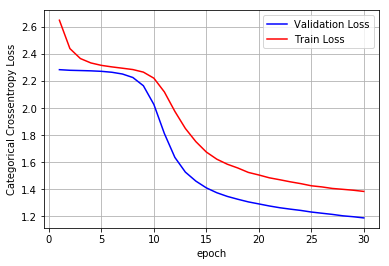

In [78]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Here you can see bith the train and validation loss is decreasing.
- The test accuracy is very low.

In [79]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

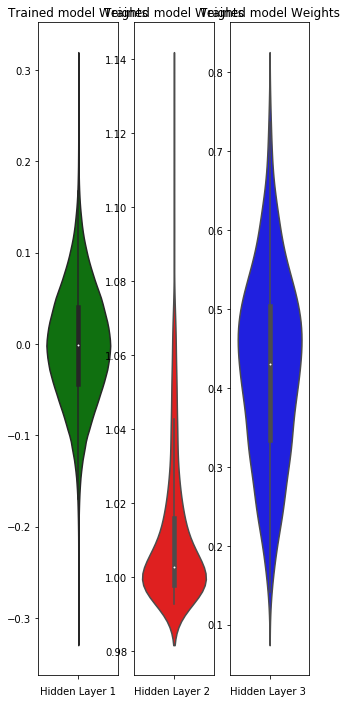

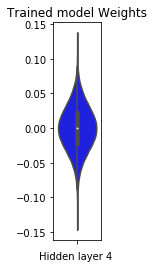

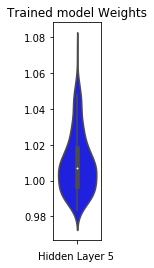

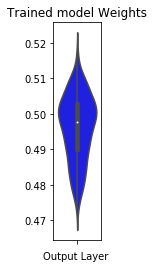

In [80]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 3 layer+relu+Adagrad(without Dropout and BN)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
#creating the model of 3 hidden layer
model_3=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons`
#second with 128 neurons
#3rd with 32 neurons
#layer 1
model_3.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
#layer 2
model_3.add(Dense(128,activation="relu"))
#layer 3
model_3.add(Dense(32,activation="relu"))
#output layer
model_3.add(Dense(output_dim, activation='softmax'))

model_sig.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_3.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history= model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0912 23:52:25.803849 13496 deprecation.py:323] From C:\Users\Swastik Nayak\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.2529 - acc: 0.9234 - val_loss: 0.1143 - val_acc: 0.9654
Epoch 2/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0893 - acc: 0.9735 - val_loss: 0.0891 - val_acc: 0.9723
Epoch 3/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0612 - acc: 0.9815 - val_loss: 0.0784 - val_acc: 0.9766
Epoch 4/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0447 - acc: 0.9873 - val_loss: 0.0675 - val_acc: 0.9801
Epoch 5/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0345 - acc: 0.9909 - val_loss: 0.0661 - val_acc: 0.9806
Epoch 6/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0267 - acc: 0.9929 - val_loss: 0.0648 - val_acc: 0.9817
Epoch 7/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0206 - acc: 0.9953 - val_loss: 0.0649 - val_acc

Test score: 0.07025932948703194
Test accuracy: 0.984


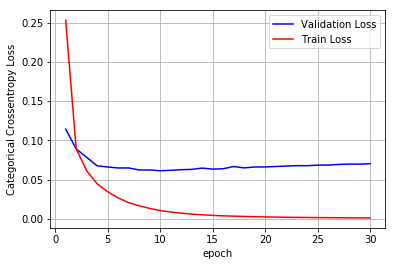

In [26]:
%matplotlib inline
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Here we can see after the 5 epochs validation loss is not decreasing,where as train loss is decreasing drastically.m

In [30]:
w_after=model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

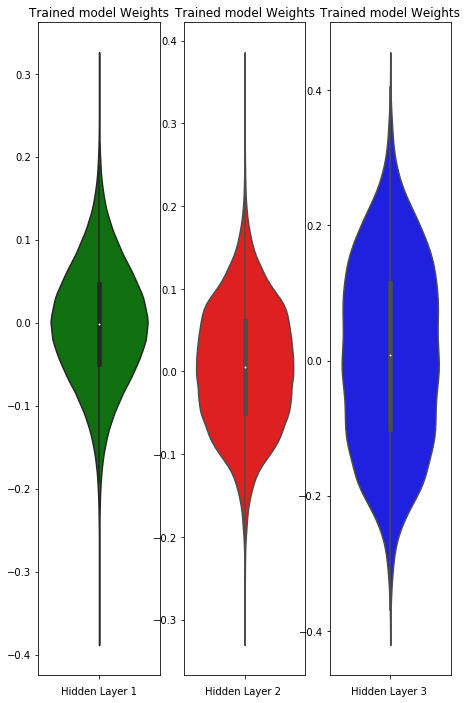

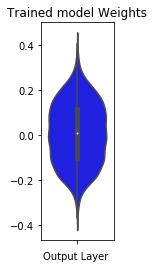

In [31]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 3 layer+ Adagrad+BN+Dropout+relu

In [33]:
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#output layer with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

In [35]:
model_relu_batch_dp.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 76us/step - loss: 0.4337 - acc: 0.8853 - val_loss: 0.1362 - val_acc: 0.9598
Epoch 2/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.2252 - acc: 0.9415 - val_loss: 0.1013 - val_acc: 0.9691
Epoch 3/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1793 - acc: 0.9547 - val_loss: 0.0887 - val_acc: 0.9729
Epoch 4/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1551 - acc: 0.9595 - val_loss: 0.0830 - val_acc: 0.9765
Epoch 5/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1362 - acc: 0.9645 - val_loss: 0.0752 - val_acc: 0.9783
Epoch 6/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1206 - acc: 0.9685 - val_loss: 0.0693 - val_acc: 0.9800
Epoch 7/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.1096 - acc: 0.9712 - val_loss: 0.0685 - val_acc

Test score: 0.06178433379009948
Test accuracy: 0.985


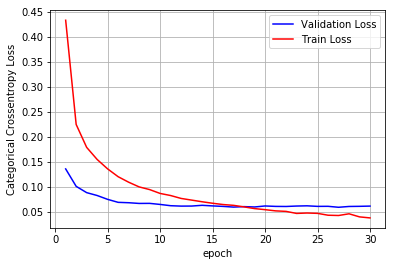

In [37]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [38]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

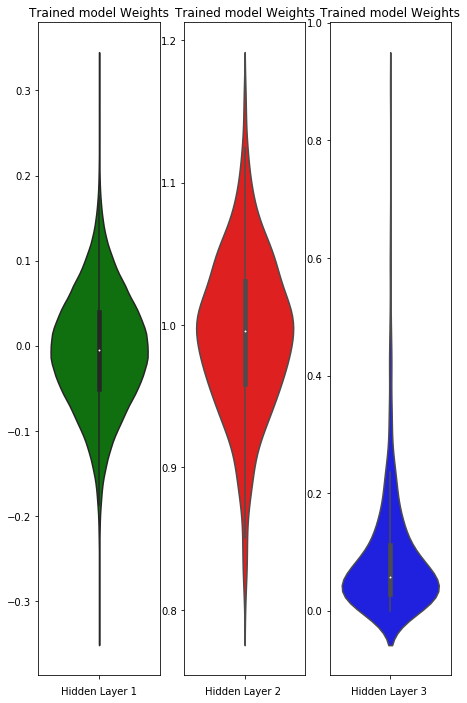

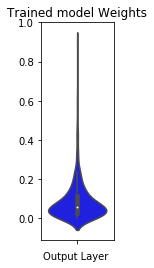

In [39]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 3 layer+ Adadelta+BN+Dropout+relu

In [40]:
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#output layer with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

In [41]:
model_relu_batch_dp.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.5431 - acc: 0.8482 - val_loss: 0.1398 - val_acc: 0.9567
Epoch 2/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.2235 - acc: 0.9397 - val_loss: 0.1048 - val_acc: 0.9682
Epoch 3/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.1627 - acc: 0.9566 - val_loss: 0.0876 - val_acc: 0.9754
Epoch 4/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.1381 - acc: 0.9637 - val_loss: 0.0797 - val_acc: 0.9753
Epoch 5/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.1219 - acc: 0.9668 - val_loss: 0.0758 - val_acc: 0.9781
Epoch 6/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.1061 - acc: 0.9717 - val_loss: 0.0701 - val_acc: 0.9787
Epoch 7/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0947 - acc: 0.9757 - val_loss: 0.0723 - val_ac

Test score: 0.0715116489044296
Test accuracy: 0.9849


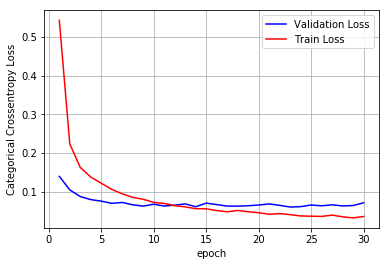

In [43]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [44]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

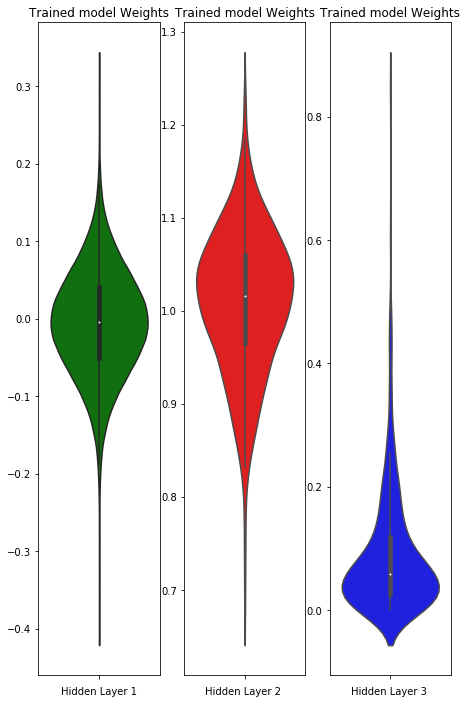

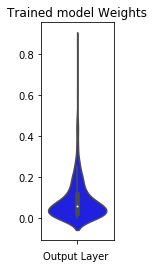

In [45]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 3 Layer+relu+Rmsprop+BN+Dropout

In [46]:
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#output layer with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

In [47]:
model_relu_batch_dp.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.4777 - acc: 0.8686 - val_loss: 0.1270 - val_acc: 0.9623
Epoch 2/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.1969 - acc: 0.9485 - val_loss: 0.0993 - val_acc: 0.9697
Epoch 3/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.1462 - acc: 0.9614 - val_loss: 0.0867 - val_acc: 0.9744
Epoch 4/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.1231 - acc: 0.9678 - val_loss: 0.0823 - val_acc: 0.9777
Epoch 5/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.1107 - acc: 0.9722 - val_loss: 0.0816 - val_acc: 0.9779
Epoch 6/30
60000/60000 [==============================] - 5s 75us/step - loss: 0.1022 - acc: 0.9735 - val_loss: 0.0717 - val_acc: 0.9796
Epoch 7/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.0938 - acc: 0.9754 - val_loss: 0.0704 - val_acc

Test score: 0.06601953120384606
Test accuracy: 0.9845


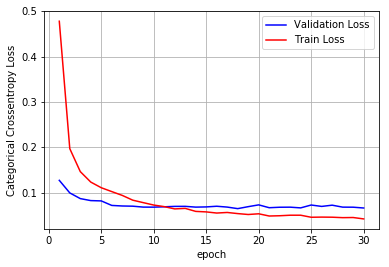

In [49]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [50]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

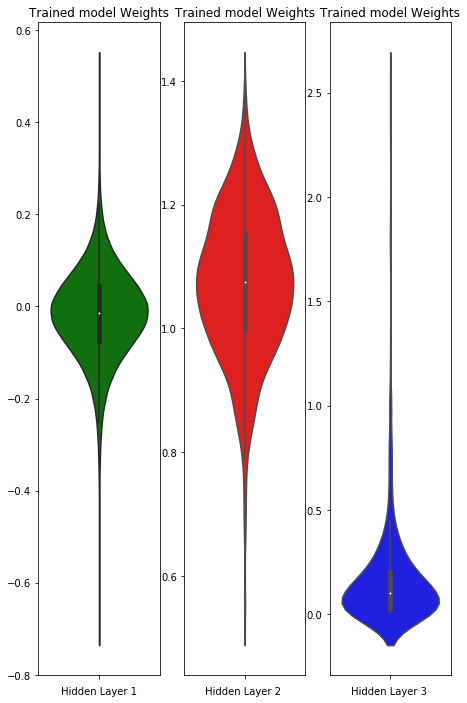

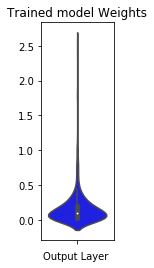

In [51]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

In [52]:
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#output layer with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

In [53]:
model_relu_batch_dp.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.6087 - acc: 0.8279 - val_loss: 0.1726 - val_acc: 0.9500
Epoch 2/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.2746 - acc: 0.9270 - val_loss: 0.1168 - val_acc: 0.9642
Epoch 3/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.2012 - acc: 0.9462 - val_loss: 0.1008 - val_acc: 0.9680
Epoch 4/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.1675 - acc: 0.9543 - val_loss: 0.0886 - val_acc: 0.9739
Epoch 5/30
60000/60000 [==============================] - 5s 76us/step - loss: 0.1415 - acc: 0.9622 - val_loss: 0.0846 - val_acc: 0.9741
Epoch 6/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.1219 - acc: 0.9679 - val_loss: 0.0784 - val_acc: 0.9774
Epoch 7/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.1108 - acc: 0.9703 - val_loss: 0.0727 - val_acc

Test score: 0.07732077501222993
Test accuracy: 0.983


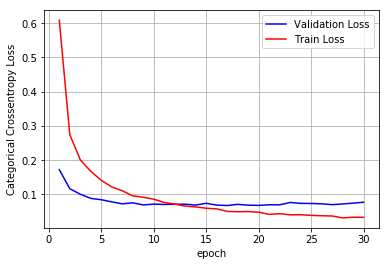

In [55]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [56]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

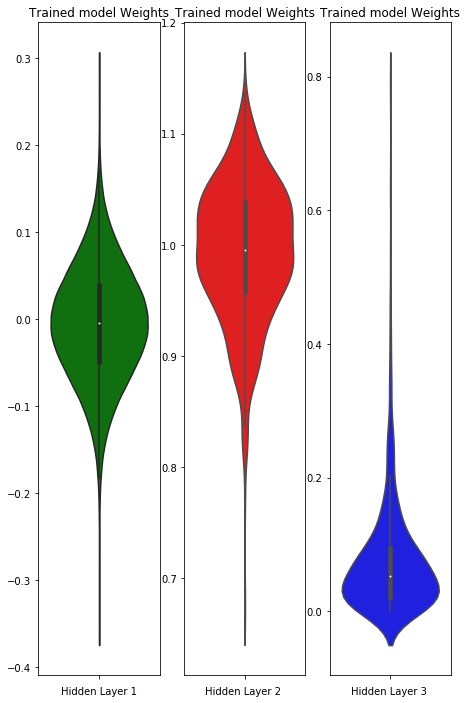

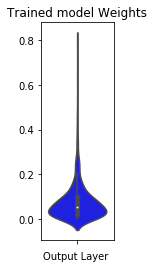

In [58]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

In [59]:
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 512 neurons
#second with 128 neurons
#3rd with 32 neurons
#layer 1 with batch normalization and dropout
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2 with batch normalization and dropout
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3 with batch normalization and dropout
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#output layer with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

In [60]:
model_relu_batch_dp.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.4387 - acc: 0.8771 - val_loss: 0.1351 - val_acc: 0.9611
Epoch 2/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.2002 - acc: 0.9463 - val_loss: 0.1037 - val_acc: 0.9697
Epoch 3/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.1639 - acc: 0.9543 - val_loss: 0.0899 - val_acc: 0.9735
Epoch 4/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.1407 - acc: 0.9617 - val_loss: 0.0907 - val_acc: 0.9720
Epoch 5/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.1262 - acc: 0.9656 - val_loss: 0.0794 - val_acc: 0.9760
Epoch 6/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.1133 - acc: 0.9698 - val_loss: 0.0739 - val_acc: 0.9782
Epoch 7/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.1056 - acc: 0.9717 - val_loss: 0.0720 - val_ac

Test score: 0.06346973061298923
Test accuracy: 0.984


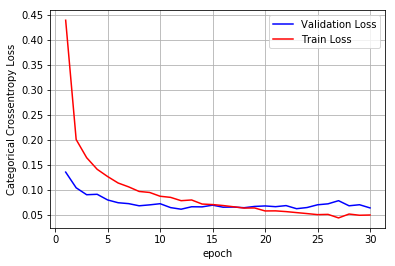

In [62]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [63]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

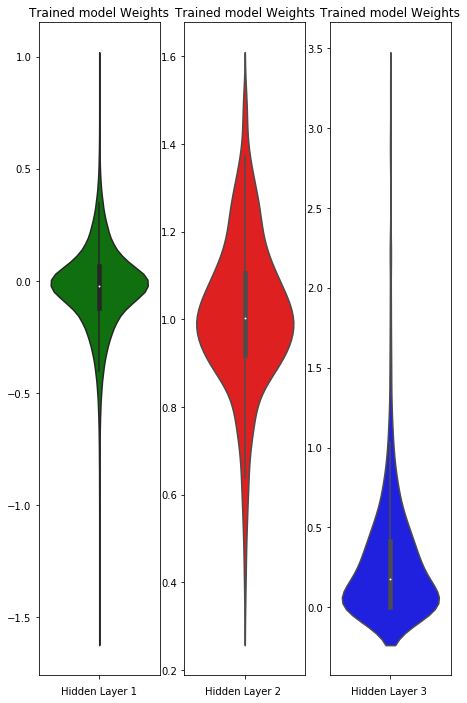

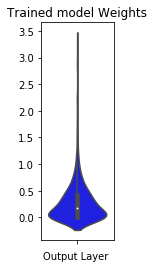

In [64]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Output Layer ')
plt.show()

## MLP 5 layer+ Nadam+relu+BN+dropout rate

In [65]:
#creating the model of 5 hidden layer
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2
model_relu_batch_dp.add(Dense(256,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 4
model_relu_batch_dp.add(Dense(64,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 5
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#output with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

model_relu_batch_dp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
__________

In [66]:
model_relu_batch_dp.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.5756 - acc: 0.8406 - val_loss: 0.1731 - val_acc: 0.9559
Epoch 2/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.2654 - acc: 0.9349 - val_loss: 0.1432 - val_acc: 0.9638
Epoch 3/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.2155 - acc: 0.9489 - val_loss: 0.1317 - val_acc: 0.9640
Epoch 4/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.1855 - acc: 0.9561 - val_loss: 0.1038 - val_acc: 0.9740
Epoch 5/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.1678 - acc: 0.9607 - val_loss: 0.0876 - val_acc: 0.9760
Epoch 6/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.1575 - acc: 0.9618 - val_loss: 0.0868 - val_acc: 0.9771
Epoch 7/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.1479 - acc: 0.9653 - val_loss: 0.0883 - 

Test score: 0.07350807493569154
Test accuracy: 0.9828


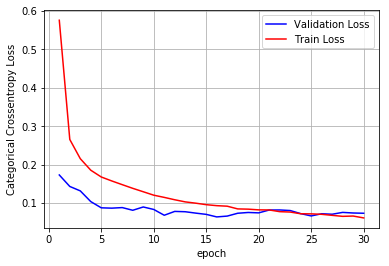

In [68]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- Validation rate is decreasing but as the number of epochs increases it started overfitting.

In [69]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

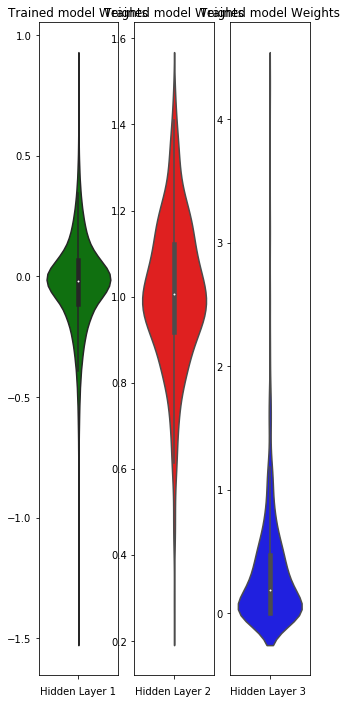

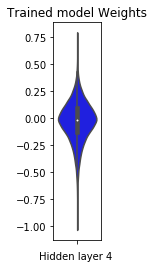

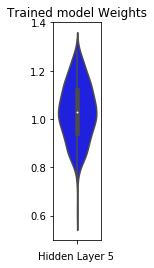

In [70]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

## MLP 5 Layer+Adamax+relu+BN+dropout

In [71]:
#creating the model of 5 hidden layer
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2
model_relu_batch_dp.add(Dense(256,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 4
model_relu_batch_dp.add(Dense(64,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 5
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#output with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

model_relu_batch_dp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
__________

In [72]:
model_relu_batch_dp.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 146us/step - loss: 0.8504 - acc: 0.7457 - val_loss: 0.2030 - val_acc: 0.9445
Epoch 2/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.3628 - acc: 0.9082 - val_loss: 0.1395 - val_acc: 0.9624
Epoch 3/30
60000/60000 [==============================] - 7s 110us/step - loss: 0.2573 - acc: 0.9380 - val_loss: 0.1169 - val_acc: 0.9693
Epoch 4/30
60000/60000 [==============================] - 7s 111us/step - loss: 0.2128 - acc: 0.9480 - val_loss: 0.1046 - val_acc: 0.9713
Epoch 5/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.1819 - acc: 0.9561 - val_loss: 0.0947 - val_acc: 0.9743
Epoch 6/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.1565 - acc: 0.9632 - val_loss: 0.0896 - val_acc: 0.9767
Epoch 7/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.1433 - acc: 0.9656 - val_loss: 0.0830 - 

Test score: 0.07157244882977101
Test accuracy: 0.9852


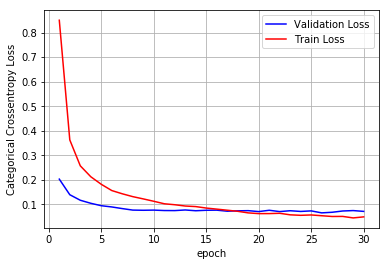

In [74]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

- After 20 epochs the validation loss started increasing where as train loss is decreasing.

In [75]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

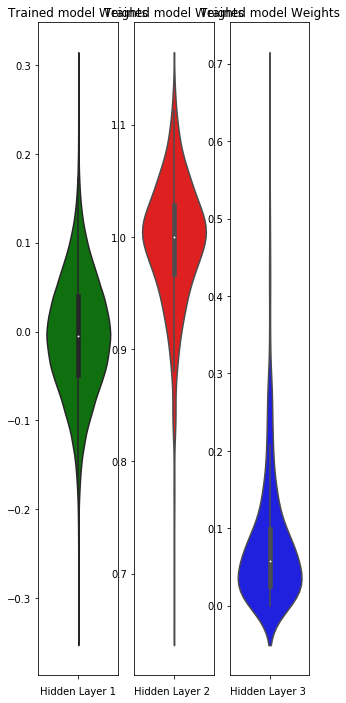

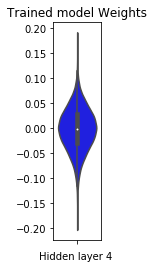

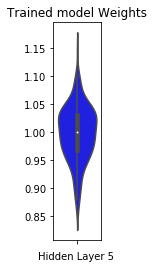

In [76]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

## MLP 5 layer + Adadelta+relu+BN+Dropout

In [77]:
#creating the model of 5 hidden layer
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2
model_relu_batch_dp.add(Dense(256,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 4
model_relu_batch_dp.add(Dense(64,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 5
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#output with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

model_relu_batch_dp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 512)               2048      
_________________________________________________________________
dense_54 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 256)               1024      
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
__________

In [78]:
model_relu_batch_dp.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 168us/step - loss: 0.6755 - acc: 0.8070 - val_loss: 0.1655 - val_acc: 0.9544
Epoch 2/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.2726 - acc: 0.9348 - val_loss: 0.1276 - val_acc: 0.9661
Epoch 3/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.2107 - acc: 0.9501 - val_loss: 0.1051 - val_acc: 0.9728
Epoch 4/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.1698 - acc: 0.9603 - val_loss: 0.1020 - val_acc: 0.9741
Epoch 5/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.1568 - acc: 0.9632 - val_loss: 0.0876 - val_acc: 0.9788
Epoch 6/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.1396 - acc: 0.9673 - val_loss: 0.0914 - val_acc: 0.9782
Epoch 7/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.1289 - acc: 0.9691 - val_loss: 0.0839 -

Test score: 0.07008348676180176
Test accuracy: 0.9858


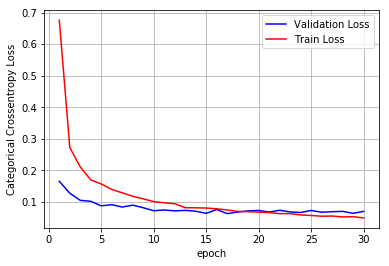

In [80]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [81]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

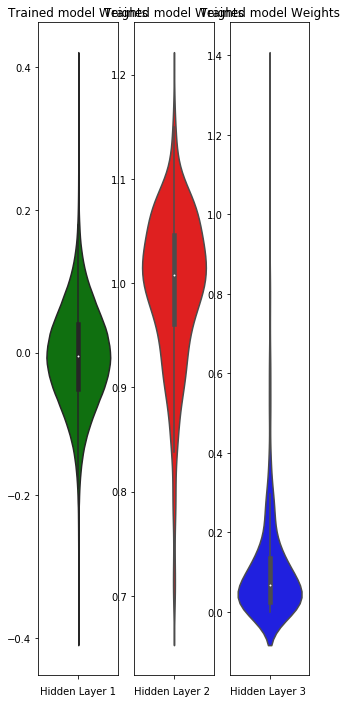

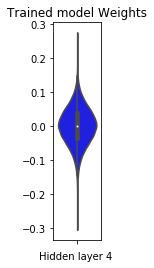

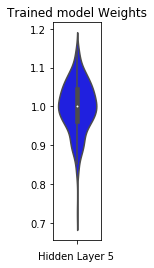

In [82]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

## MLP 5 layer+RMSprop+relu+BN+dropout

In [84]:
#creating the model of 5 hidden layer
model_relu_batch_dp=Sequential()
#here we are creating 3 hidden layers
#first with 256 neurons
#second with 128 neurons
#3rd with 128 neurons
#4th with 64 neurons
#5th with 64 neurons
#layeer 1
model_relu_batch_dp.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 2
model_relu_batch_dp.add(Dense(256,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())
#layer 3
model_relu_batch_dp.add(Dense(128,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 4
model_relu_batch_dp.add(Dense(64,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.031,seed=None)))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#layer 5
model_relu_batch_dp.add(Dense(32,activation="relu"))
model_relu_batch_dp.add(Dropout(0.3))
model_relu_batch_dp.add(BatchNormalization())

#output with softmax
model_relu_batch_dp.add(Dense(output_dim, activation='softmax'))

model_relu_batch_dp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
dense_60 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 256)               1024      
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
__________

In [85]:
model_relu_batch_dp.compile(optimizer='Rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
history= model_relu_batch_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.5955 - acc: 0.8344 - val_loss: 0.1584 - val_acc: 0.9600
Epoch 2/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.2544 - acc: 0.9386 - val_loss: 0.1186 - val_acc: 0.9698
Epoch 3/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.1945 - acc: 0.9548 - val_loss: 0.0979 - val_acc: 0.9746
Epoch 4/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.1680 - acc: 0.9620 - val_loss: 0.0822 - val_acc: 0.9778
Epoch 5/30
60000/60000 [==============================] - 6s 107us/step - loss: 0.1505 - acc: 0.9659 - val_loss: 0.0863 - val_acc: 0.9784
Epoch 6/30
60000/60000 [==============================] - 6s 106us/step - loss: 0.1279 - acc: 0.9703 - val_loss: 0.0847 - val_acc: 0.9795
Epoch 7/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.1263 - acc: 0.9714 - val_loss: 0.0890 -

Test score: 0.0797083675733622
Test accuracy: 0.9851


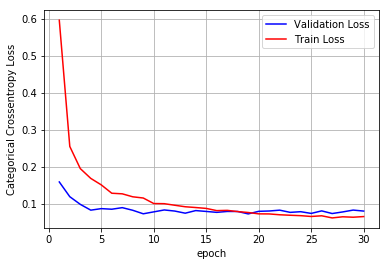

In [87]:
%matplotlib inline
score = model_relu_batch_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [88]:
w_after=model_relu_batch_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

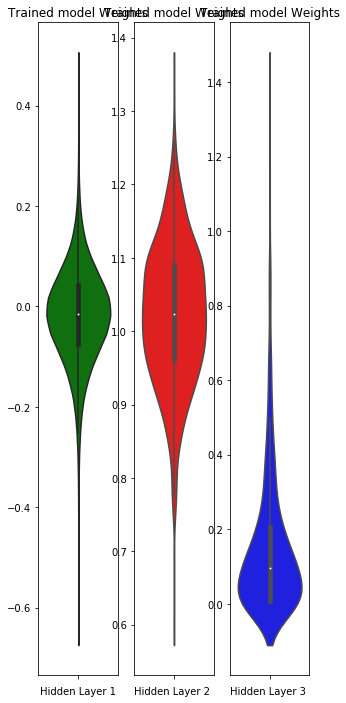

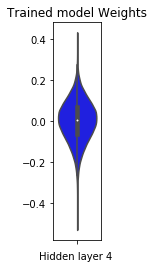

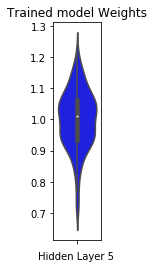

In [89]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='g')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')
plt.show()

In [90]:
from prettytable import PrettyTable
x=PrettyTable()

In [91]:
x.field_names=["Hidden Layer","Accuracy","Loss","Optimizer"]
x.add_row(["3 without dropout and BatchNormalization","98.34","0.0044","ADAM"])
x.add_row(["3 with BatchNormalization","98.14","0.0063","ADAM"])
x.add_row(["3 with dropout and BatchNormalization","97.74","0.1576","ADAM"])
x.add_row(["5 without dropout and BatchNormalization","97.14","0.0107","ADAM"])
x.add_row(["5 with BatchNormalization","98.11","0.0058","ADAM"])
x.add_row(["5 with dropout and BatchNormalization","98.11","0.0895","ADAM"])
x.add_row(["3 with dropout and BatchNormalization","98.28","0.0614","NADAM"])
x.add_row(["3 with dropout and BatchNormalization","98.45","0.0419","RMSProp"])
x.add_row(["5 with dropout and BatchNormalization","98.50","0.03","NADAM"])
x.add_row(["5 with dropout and BatchNormalization","98.52","0.0492","ADAMAX"])

print(x)

+------------------------------------------+----------+--------+-----------+
|               Hidden Layer               | Accuracy |  Loss  | Optimizer |
+------------------------------------------+----------+--------+-----------+
| 3 without dropout and BatchNormalization |  98.34   | 0.0044 |    ADAM   |
|        3 with BatchNormalization         |  98.14   | 0.0063 |    ADAM   |
|  3 with dropout and BatchNormalization   |  97.74   | 0.1576 |    ADAM   |
| 5 without dropout and BatchNormalization |  97.14   | 0.0107 |    ADAM   |
|        5 with BatchNormalization         |  98.11   | 0.0058 |    ADAM   |
|  5 with dropout and BatchNormalization   |  98.11   | 0.0895 |    ADAM   |
|  3 with dropout and BatchNormalization   |  98.28   | 0.0614 |   NADAM   |
|  3 with dropout and BatchNormalization   |  98.45   | 0.0419 |  RMSProp  |
|  5 with dropout and BatchNormalization   |  98.50   |  0.03  |   NADAM   |
|  5 with dropout and BatchNormalization   |  98.52   | 0.0492 |   ADAMAX  |

- Here we are working with MNIST data for digit classification.
- Here we have tried 2 types of MLP one with 3 hidden layer and 5 hidden layer.
- We are getting overfitted model when we are not applying dropout and BatchNormalization.
- In hidden layer 3 withdropout and BatchNormalization we got an accuracy of 97.74%.
- In hidden layer 5 withdropout and BatchNormalization we got and accuracy of 98.11%.
-  We have plot the distribution of weights of different layers using violinplots.
